# **Finding Lane Lines on the Road** 
***
In this project, you will use the tools you learned about in the lesson to identify lane lines on the road.  You can develop your pipeline on a series of individual images, and later apply the result to a video stream (really just a series of images). Check out the video clip "raw-lines-example.mp4" (also contained in this repository) to see what the output should look like after using the helper functions below. 

Once you have a result that looks roughly like "raw-lines-example.mp4", you'll need to get creative and try to average and/or extrapolate the line segments you've detected to map out the full extent of the lane lines.  You can see an example of the result you're going for in the video "P1_example.mp4".  Ultimately, you would like to draw just one line for the left side of the lane, and one for the right.

---
Let's have a look at our first image called 'test_images/solidWhiteRight.jpg'.  Run the 2 cells below (hit Shift-Enter or the "play" button above) to display the image.

**Note: If, at any point, you encounter frozen display windows or other confounding issues, you can always start again with a clean slate by going to the "Kernel" menu above and selecting "Restart & Clear Output".**

---

**The tools you have are color selection, region of interest selection, grayscaling, Gaussian smoothing, Canny Edge Detection and Hough Tranform line detection.  You  are also free to explore and try other techniques that were not presented in the lesson.  Your goal is piece together a pipeline to detect the line segments in the image, then average/extrapolate them and draw them onto the image for display (as below).  Once you have a working pipeline, try it out on the video stream below.**

---

<figure>
 <img src="line-segments-example.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above) after detecting line segments using the helper functions below </p> 
 </figcaption>
</figure>
 <p></p> 
<figure>
 <img src="laneLines_thirdPass.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your goal is to connect/average/extrapolate line segments to get output like this</p> 
 </figcaption>
</figure>

**Run the cell below to import some packages.  If you get an `import error` for a package you've already installed, try changing your kernel (select the Kernel menu above --> Change Kernel).  Still have problems?  Try relaunching Jupyter Notebook from the terminal prompt.  Also, see [this forum post](https://carnd-forums.udacity.com/cq/viewquestion.action?spaceKey=CAR&id=29496372&questionTitle=finding-lanes---import-cv2-fails-even-though-python-in-the-terminal-window-has-no-problem-with-import-cv2) for more troubleshooting tips.**  

In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)


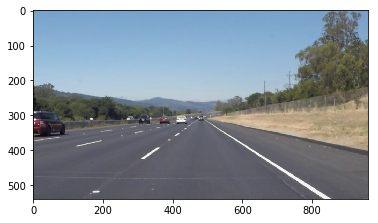

In [2]:
#reading in an image
image = mpimg.imread('test_images/solidWhiteRight.jpg')
#printing out some stats and plotting
print('This image is:', type(image), 'with dimesions:', image.shape)
plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')

**Some OpenCV functions (beyond those introduced in the lesson) that might be useful for this project are:**

`cv2.inRange()` for color selection  
`cv2.fillPoly()` for regions selection  
`cv2.line()` to draw lines on an image given endpoints  
`cv2.addWeighted()` to coadd / overlay two images
`cv2.cvtColor()` to grayscale or change color
`cv2.imwrite()` to output images to file  
`cv2.bitwise_and()` to apply a mask to an image

**Check out the OpenCV documentation to learn about these and discover even more awesome functionality!**

Below are some helper functions to help get you started. They should look familiar from the lesson!

In [3]:
import math

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def draw_lines(img, lines, color=[255, 0, 0], thickness=2):
    lane_thickness = 1#2#8
    lane_color = [255, 0, 0]
    lane_color_alt = [0, 255, 0]
    canney_color = [0, 0, 255]
    canney_thickness = 2
    """
    NOTE: this is the function you might want to use as a starting point once you want to 
    average/extrapolate the line segments you detect to map out the full
    extent of the lane (going from the result shown in raw-lines-example.mp4
    to that shown in P1_example.mp4).  
    
    Think about things like separating line segments by their 
    slope ((y2-y1)/(x2-x1)) to decide which segments are part of the left
    line vs. the right line.  Then, you can average the position of each of 
    the lines and extrapolate to the top and bottom of the lane.
    
    This function draws `lines` with `color` and `thickness`.    
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() function below
    """
          
    """ """
    # Draws Canny Lines.. (orig draw_lines code)
    for line in lines:
        for x1,y1,x2,y2 in line:
            #cv2.line(img, (x1, y1), (x2, y2), color, thickness)
            cv2.line(img, (x1, y1), (x2, y2), canney_color, canney_thickness)
    """ """ 
 

    ## Plan:
    # segregate parallel lines from same line
    
    # left-hand lanes:
    # find smallest x-coordinate,y-coordinate that would fit on this line
    # and largest x-coord, y-coord that would fit in our mask..
    
    # right-hand lanes: 
    # largest x-coord, y-coord is bottom right
    # smalles x-coord, y-coord is "tOp" of lane, near center.
    
    # anything that has a near horizonal slope is not a lane. 
    # ignore/delete them
    
    # any lines with similar slopes to the lane, but different endpoints:
    #   also ignore/delete these. They are not true lane markings
    #   (well for double lanes--they would be.. so maybe look at number/length)
    #   of such segments. 

    # look at our data..
    #print(lines)
    
    # first group all line segments that have same/similar slope together
    #    might want to set a tolerance, see if two slopes are within tolerance..
    slopesL = []
    slopesR = []
    midptsL = []
    midptsR = []
    coordsR = []
    coordsL = []
    # ignore slope of nearly horizontal lines
    slope_minimum = .25
    slopesRejected = []
    coordsRejected = []
    
    i = 0
    yMask = 99999999 #hack (can't use infinity)
    for line in lines:
        for x1,y1,x2,y2 in line:
            # want coordinate pairs stored with bottom coordinate first, top second
            if y1 >= y2:
                xbot, ybot, xtop, ytop = x1, y1, x2, y2
            else:
                xtop, ytop, xbot, ybot = x1, y1, x2, y2
            m = (ytop-ybot) / (xtop-xbot)
            
            # Left lane (negative slope; origin is top left) (x2 > x1, x2 is top point)
            if   (m <= -slope_minimum):
                slopesL.append(m)
                midptsL.append([int(round( xbot + (xtop-xbot)/2 )), int(round( ytop + (ybot-ytop)/2 ))] )
                coordsL.append([xbot, ybot, xtop, ytop])

            # Right Lane(postive slope) (x2 < x1, where x2 is top point)
            elif (m >= slope_minimum):
                slopesR.append(m)
                midptsR.append([int(round( xtop + (xbot-xtop)/2 )), int(round( ytop + (ybot-ytop)/2 ))] )
                coordsR.append([xbot, ybot, xtop, ytop])
            
            # neither (dismiss these segments)
            else:
                # for troubleshooting inspections
                slopesRejected.append(m)
                coordsRejected.append([xbot,ybot,xtop,ytop])
            
        #finding top of "mask" by looking for highest(smallest) y-coordinate in the set of all canney lines
        if (ytop < yMask):
            yMask = ytop
        i += 1
        
    #TODO look at range of slopes; handle or re-classify outliers before averaging
    #print("slopesL\n", slopesL, "\n")
    #print("slopesR\n", slopesR, "\n")
    #print("slopes rejected\n", slopesRejected, "\n")
    #print("\n")
    
    # find average slope for left segments and right segments
    #  might want to average slopes that are in a certain tolerance
    #  then average slopes for pieces that are in a different tolerance
    #  as there could be more than one lane line
    #  also, for curves, the slope will be changing.. how to handle that ?
    #  todo: improved slope calculation
    
    ave_slopeL = sum(slopesL)/len(slopesL)
    maxS = max(slopesL)
    minS = min(slopesL)
    diff = maxS-minS
    percentage = diff/ave_slopeL
    
    #if ((diff > .4) or (percentage>.2)):
        #print("-- is this slope tolerence ok for a L line? \n, ave, diff, percent diff, min, max")
        #print(ave_slopeL, diff, percentage, minS, maxS, "\n")
    #print("slopesL\n", slopesL, "\n")
    #print("ave_slopeL: ", ave_slopeL)
    
    ave_slopeR = sum(slopesR)/len(slopesR)
    maxS = max(slopesR)
    minS = min(slopesR)
    diff = maxS-minS
    percentage = diff/ave_slopeR
    
    #if ((diff > .4) or (percentage>.2)):
        #print("-- is this slope tolerence ok for a R line? \n, ave, diff, percent diff, min, max")
        #print(ave_slopeR, diff, percentage, minS, maxS, "\n")
    #print("slopesR\n", slopesR, "\n")
    #print("ave_slopeR: ", ave_slopeR)

    ## Now: how do I determine coordinates to use for each lane/slope ?
    #  also: will need to do something better for curved lines, and parallel lines

    # Find minimum y-coordinate from canny lines
    # Since I no longer have access to mask, I will use minimum y-coordinate 
    #   and extrapolate the line segments, from their midpoints,  
    #   to max x and y coordinates found in the canney line coordinates
    
    # let's presume that our mask has a parallel top: ie yminL == yminR 
    # yMask is the smallest/topmost y-value coordinate that should be printed
    yTop = yMask
    # yMax is the largest/bottomost y-value ..
    # let's presume that y-max = bottom of image
    yBot = image.shape[0]
    print("yTop:", yTop, "yBot", yBot) 
  
    ## for each slope in slopesL, slopesR. Find the x-coordinates that would
        #pass through yTop, and yBot    
    
    print("coordsL:\n", coordsL)
    
    # warn: this routine presumes that the largest y-value in canney lines should NOT be masked out
    #Left: anchor point that our extrapolated line shall pass through
    #    Nieve: find bottom-most y-coordinate from our canny lines
    #    rem coordsL: (xbot,ybot,xtop,ytop)
    ymaxL  = 0
    iymaxL = 0
    xmaxL = 0
    ixmaxL = 0
    for i in range(len(coordsL)):
        if (coordsL[i][1]) > ymaxL:
            iymaxL = i
            ymaxL = coordsL[iymaxL][1]
        # warn: presumes there is not, for example, a deep L-had curve ..assumes:
        # largest x-coordinate in canneyL line is at TOP, ie 2nd set of coords
        if (coordsL[i][2]) > xmaxL:
            ixmaxL = i
            xmaxL = coordsL[ixmaxL][2]
    # top-most left-lane canney coordinates
    xcL = coordsL[iymaxL][0]
    ycL = coordsL[iymaxL][1]
    
    # canney coords with  largest x-value, presumably top of left lane (depending on curves). Coordinates may be outside the mask
    xtL = coordsL[ixmaxL][2]
    ytL = coordsL[ixmaxL][3]
    print("\nlargest-x coordinate", xtL, ytL)

    
    #Left
    m = ave_slopeL
    
    #lane line based on min y coord in canney set of coords, average slope of canney segments, and overall ytop/ybot allowed from mask
    xtopL = int(round( (yTop - ycL)/m + xcL ))
    xbotL = int(round( (yBot - ycL)/m + xcL ))
    laneL_ymin = [xbotL, yBot, xtopL, yTop]
    print("L: lane:", laneL_ymin, "\nslope:{0:+.2f}".format(m), "anchor:", xcL, ycL, "\n")

    # extrapolate to find x-coordinate at yTop, based on slope for current coordinate set
    if ytL > yTop:
        print("ytL>yTop:", ytL, yTop)
        m = (ytL-yBot)/(xtL-xbotL)
        xtL = int(round( xtL + (yTop - ytL)/m ))
        ytL = yTop
        print("xtL, ytL:", xtL, ytL)
         
    
    # lane line based on largest x-value and largest y-value of canney coordinates,
    # min y, and max x
    # uses xtopL, xbotL from section above (based on min canney y-coord), xt,yt from largest canney x-coordinate    
    # if ya < ymin, this point falls outside our mask, calculate the xa coordinate on this line that lies at the top of the mask
    #if ytL < yTop:
    if ytL < yTop:
        print("ytL<yTop:", ytL, yTop)
        m = (ytL-yBot)/(xtL-xbotL)
        xtL = int(round( xtL + (yTop - ytL)/m ))
        ytL = yTop
        print("xtL, ytL:", xtL, ytL)
        
    # now, if newly calculated xt > largest x-canney coordinate found, let's limit this value also
    # won't work if top of lane marking is missing - assumes top of lane markings always converge to visibility
    # this also changes the slope, as we are simply replacing the x-coordinate, without re-caclulating the equivalent y-coordinate
    #   figure this altered slope will be just fine
    if xtL > xmaxL:
        print("xtL", xtL, " --> ", xmaxL, m)
        #xtL = xmaxL

    laneL_alt = [xbotL, yBot, xtL, ytL]
    #laneL_alt = [xbotL, yBot, xtL, ytL]
    #laneR_alt = [xbotR, yBot, xtR, ytR]
    #laneR     = [xbotR, yBot, xtopR, yTop]
    print("L:  alt:", laneL_alt, "\nslope:{0:+.2f}".format(m),"\n")
    
    
    print("\ncoordsR:\n", coordsR)

    
    #   warn: could return coordinates that are higher than ymin for the mask
    #   warn: this routine presumes that the largest y-value in canney lines should NOT be masked out
    # Right: find ancor point coordinates. rem coordsR: (xbot,ybot,xtop,ytop) 
    #   nieve: use bottom-most y-coord from canney lines
    ymaxR  = 0
    iymaxR = 0
    xminR  = image.shape[1]
    ixminR = 0
    for i in range(len(coordsR)):
        if coordsR[i][1] > ymaxR:
            iymaxR = i
            ymaxR = coordsR[iymaxR][1]
            
        # warn: could return coordinates that are higher than ymin for the mask
        # warn: presumes there is not a deep R-had curve (for example)..assumes:
        # smallest x-coordinate in canney line is at TOP, ie 2nd set of coords
        if coordsR[i][2] < xminR:
            ixminR = i
            xminR  = coordsR[ixminR][2]
    xcR = coordsR[iymaxR][0]
    ycR = coordsR[iymaxR][1]
    
    # left most coordinates found in the canny coordinate set for right lane
    xtR = coordsR[ixminR][2]
    ytR = coordsR[ixminR][3]
    
    #Right
    m = ave_slopeR
    xtopR = int(round( (yTop - ycR)/m + xcR ))
    # extrapolated xtopR might be way smaller than smallest coordinate in our canney set. 
    xbotR = int(round( (yBot - ycR)/m + xcR ))
    laneR = [xbotR, yBot, xtopR, yTop]
    print("R: lane:", laneR, "\nslope:{0:+.2f}".format(m), "anchor:", xcR, ycR, xtR, ytR, "\n")
    
    # extrapolate to find x-coordinate at yTop, based on slope for current coordinate set
    if ytR > yTop:
        print("ytr>yTop", ytR, yTop)
        m = (ytR-yBot)/(xtR-xbotR)
        xtR = int(round( (yTop - ytR)/m + xtR ))
        ytR = yTop
        print("xtR, ytR", xtR, ytR)
        
    # if ya < ymin, this point falls outside our mask, calculate the xa coordinate on this line that lies at the top of the mask
    if ytR < yTop:
        print("ytr<yTop", ytR, yTop)
        m = (ytR-yBot)/(xtR-xbotR)
        xtR = int(round( (yTop - ytR)/m + xtR ))
        ytR = yTop
        print("xtR, ytR", xtR, ytR)
        
    # now, if newly calculated xa < smallest x-canney coordinate found, let's limit this value also
    # won't work if top of lane marking is missing - assumes top of lane markings always converge to visibility
    if xtR < xminR:
        xtR = xminR
        print("xtR<xminR", xtR, xminR)
    laneR_alt = [xbotR, yBot, xtR, ytR]
    print("R:  alt:", laneR_alt,  "\nslope:{0:+.2f}".format((ytR-yBot)/(xtR-xbotR)), "coords:", xbotR, yBot, xtR, ytR, "\n")


    #TODO: don't let lines cross. compart xmax_L and xmin_R. adjust endpoint, if necessary
   
    # Lane Lines 
    lanes = [laneL_ymin, laneR]
    #lanes = [laneL_xmin, laneR]
    lanes_alt = [laneL_alt, laneR_alt]
    
    # draw extrapolated lines
    #Red - lanes based on slope alone
    #for lane in lanes:
    #    for x1,y1,x2,y2 in lanes:
    #        cv2.line(img, (x1, y1), (x2, y2), lane_color, lane_thickness)
            
    #Green - lanes from calcualted endpoints, where a coordinate is partially based on slope
    for lane in lanes_alt:
        for x1,y1,x2,y2 in lanes_alt:
            #print(x1,y1,x2,y2, lane, lanes)            
            cv2.line(img, (x1, y1), (x2, y2), lane_color_alt, canney_thickness)


def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

# Python 3 has support for cool math symbols.

def weighted_img(img, initial_img, a=0.8, ß=1., λ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * a + img * ß + λ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, a, img, ß, λ)

## Test on Images

Now you should build your pipeline to work on the images in the directory "test_images"  
**You should make sure your pipeline works well on these images before you try the videos.**

In [4]:
import os
files = os.listdir("test_images/")

run your solution on all test_images and make copies into the test_images directory).


 solidWhiteCurve.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[290, 452, 345, 410], [304, 452, 353, 412], [428, 349, 481, 313], [428, 347, 465, 321], [290, 463, 327, 434], [450, 335, 481, 314], [299, 446, 346, 410]]

largest-x coordinate 481 313
L: lane: [186, 540, 492, 313] 
slope:-0.74 anchor: 290 463 

L:  alt: [186, 540, 481, 313] 
slope:-0.74 


coordsR:
 [[899, 539, 531, 335], [878, 539, 722, 449], [620, 389, 511, 328], [747, 462, 635, 399], [757, 468, 717, 446], [886, 532, 831, 502], [583, 365, 506, 321], [563, 356, 527, 336], [695, 432, 638, 400], [834, 513, 776, 480]]
R: lane: [901, 540, 496, 313] 
slope:+0.56 anchor: 899 539 506 321 

ytr>yTop 321 313
xtR, ytR 492 313
xtR<xminR 506 506
R:  alt: [901, 540, 506, 313] 
slope:+0.57 coords: 901 540 506 313 


 solidWhiteRight.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[310, 423, 357, 392], [417, 351, 467, 314], [331, 417, 363, 392], [434, 340, 470, 315], [419, 351, 475, 31

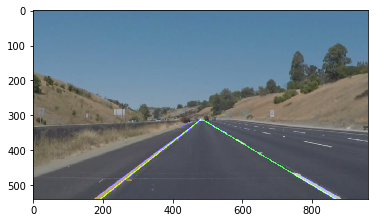

In [5]:
# TODO: Build your pipeline that will draw lane lines on the test_images
# then save them to the test_images directory.
for f in files:
    print("\n",f, "\n----------------------------\n")
    #read in an image
    image = mpimg.imread('test_images/'+f)

    #print('This image is:', type(image), 'with dimesions:', image.shape)
    print(image.shape[1], image.shape[0])
    plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')   
    

    # lane lines will be drawn on this copy of the image
    color_select = np.copy(image)
    
    ## Mask. region of interest.
    
    #   Consider a triangle, apex in center of image. Base is bottom of image
    #   Now turn it into 4sided polygon, by cutting off a small triangle at the apex.
    #   the width at the top-side of the 4sides == base of the cut-off triangle 
    #   set width (dX) to, say around 5%-10% of the image width. try: ~125px on 960width

    # Grab the x and y size and make a copy of the image
    ysize = image.shape[0]
    xsize = image.shape[1]
        
    # convenience variables to scale, based on image resolutionyxratio = imshape[0]/imshape[1]
    # SH width of trapezoid top: keep same slope as if used triangle apex
    yxratio = ysize/xsize  
    dX = ysize//18
    dx = dX/2
    dy = yxratio * dx
    
    # default apex in center of image
    xapex = xsize//2
    yapex = ysize//2
    # x-offset from corners
    xs=0
    
    # calibrate for camera angle relative to car and zoom.
    #   manual adjustment for off square and off center camera position/angle 
    xapex += 0
    yapex += 35  # horizon is lower than center
    # lanes won't actually goto the corners of the image (if camera is rasonably adjusted)
    #dx/2
    
    # Define verticies: 4-sided polygon that lanes must fall within
    vertices = np.array([[(xs,ysize),(-dx+xapex, dy+yapex), (dx+xapex, dy+yapex), (-xs+xsize,ysize)]], dtype=np.int32)
    
    # save masked image for testing purposes
    # todo: delete or comment out when finished
    #masked_image = np.copy(region_of_interest(color_select, vertices))
    
    #mpimg.imsave('test_images/1mask_'+f, masked_image)
    #plt.imshow(masked_image)
    
    ## Edge Detection
    
    # grayscale copy of the image
    # question: am I getting a copy of the image returned, or need I make a copy first
    gray = grayscale(image)
    
    #show image
    #plt.imshow(gray, cmap='gray')
    
    # Define a kernel size for Gaussian smoothing and apply
    kernel_size = 5
    blur_gray = gaussian_blur(gray, kernel_size)
    
    #show image
    #plt.imshow(blur_gray, cmap='gray')
    #mpimg.imsave('test_images/2blur_'+f, blur_gray)

    
    # Define our parameters for Canny and apply
    low_threshold = 50
    high_threshold = 150
    edges = canny(gray, low_threshold, high_threshold)
    
    #plt.imshow(edges, cmap='gray')
    #mpimg.imsave('test_images/3edges_'+f, edges)
    
    # apply mask to canny edges image
    masked_edges = region_of_interest(edges, vertices)
    
    #mpimg.imsave('test_images/4masked_'+f, masked_edges)
    #plt.imshow(masked_edges)
    
       
    ## Houghes
    
    # Define the Hough transform parameters
    rho = 2              # resolution in pixels of the Hough grid
    theta = np.pi/180 *1 # angular resolution in radians of the Hough grid
    threshold    = 14    # minimum number of votes (intersections in Hough grid cell)
    min_line_len = 30    # minimum number of pixels making up a line
    max_line_gap = 8     # maximum gap in pixels between connectable line segments
    
    # Run Hough on masked_edge (masked-canney) image
    lines_img = hough_lines(masked_edges, rho, theta, threshold, min_line_len, max_line_gap)
    #mpimg.imsave('test_images/5lines_'+f, lines_img)
    plt.imshow(lines_img)
    
    
    ## Draw Lines
    # draw_lines is called from INSIDE hough_lines !
    
    # overlay lane lines (houghes_img) onto orig (color_select) image
    result = weighted_img(lines_img, color_select, a=0.8, ß=1., λ=0.)
    plt.imshow(result)
   

    # save final image with line lanes drawn on it
    # todo: change naming of copied file (prefer: base_lanes.ext)
    mpimg.imsave('test_images/9lanes_'+f, result)


## Test on Videos

You know what's cooler than drawing lanes over images? Drawing lanes over video!

We can test our solution on two provided videos:

`solidWhiteRight.mp4`

`solidYellowLeft.mp4`

**Note: if you get an `import error` when you run the next cell, try changing your kernel (select the Kernel menu above --> Change Kernel).  Still have problems?  Try relaunching Jupyter Notebook from the terminal prompt. Also, check out [this forum post](https://carnd-forums.udacity.com/questions/22677062/answers/22677109) for more troubleshooting tips.**

**If you get an error that looks like this:**
```
NeedDownloadError: Need ffmpeg exe. 
You can download it by calling: 
imageio.plugins.ffmpeg.download()
```
**Follow the instructions in the error message and check out [this forum post](https://carnd-forums.udacity.com/display/CAR/questions/26218840/import-videofileclip-error) for more troubleshooting tips across operating systems.**

In [6]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [7]:
def process_image(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image with lines are drawn on lanes)

    
    # TODO: Build your pipeline that will draw lane lines on the test_images
# then save them to the test_images directory.
#for f in files:
    print("\n",f, "\n----------------------------\n")
    #read in an image
    #image = mpimg.imread('test_images/'+f)

    #print('This image is:', type(image), 'with dimesions:', image.shape)
    print(image.shape[1], image.shape[0])
    #plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')   
    

    # lane lines will be drawn on this copy of the image
    color_select = np.copy(image)
    
    ## Mask. region of interest.
    
    #   Consider a triangle, apex in center of image. Base is bottom of image
    #   Now turn it into 4sided polygon, by cutting off a small triangle at the apex.
    #   the width at the top-side of the 4sides == base of the cut-off triangle 
    #   set width (dX) to, say around 5%-10% of the image width. try: ~125px on 960width

    # Grab the x and y size and make a copy of the image
    ysize = image.shape[0]
    xsize = image.shape[1]
        
    # convenience variables to scale, based on image resolutionyxratio = imshape[0]/imshape[1]
    # SH width of trapezoid top: keep same slope as if used triangle apex
    yxratio = ysize/xsize  
    dX = ysize//18
    dx = dX/2
    dy = yxratio * dx
    
    # default apex in center of image
    xapex = xsize//2
    yapex = ysize//2
    # x-offset from corners
    xs=0
    
    # calibrate for camera angle relative to car and zoom.
    #   manual adjustment for off square and off center camera position/angle 
    xapex += 0
    yapex += 35  # horizon is lower than center
    # lanes won't actually goto the corners of the image (if camera is rasonably adjusted)
    #dx/2
    
    # Define verticies: 4-sided polygon that lanes must fall within
    vertices = np.array([[(xs,ysize),(-dx+xapex, dy+yapex), (dx+xapex, dy+yapex), (-xs+xsize,ysize)]], dtype=np.int32)
    
    # save masked image for testing purposes
    # todo: delete or comment out when finished
    #masked_image = np.copy(region_of_interest(color_select, vertices))
    
    #mpimg.imsave('test_images/1mask_'+f, masked_image)
    #plt.imshow(masked_image)
    
    ## Edge Detection
    
    # grayscale copy of the image
    # question: am I getting a copy of the image returned, or need I make a copy first
    gray = grayscale(image)
    
    #show image
    #plt.imshow(gray, cmap='gray')
    
    # Define a kernel size for Gaussian smoothing and apply
    kernel_size = 5
    blur_gray = gaussian_blur(gray, kernel_size)
    
    #show image
    #plt.imshow(blur_gray, cmap='gray')
    #mpimg.imsave('test_images/2blur_'+f, blur_gray)

    
    # Define our parameters for Canny and apply
    low_threshold = 50
    high_threshold = 150
    edges = canny(gray, low_threshold, high_threshold)
    
    #plt.imshow(edges, cmap='gray')
    #mpimg.imsave('test_images/3edges_'+f, edges)
    
    # apply mask to canny edges image
    masked_edges = region_of_interest(edges, vertices)
    
    #mpimg.imsave('test_images/4masked_'+f, masked_edges)
    #plt.imshow(masked_edges)
    
       
    ## Houghes
    
    # Define the Hough transform parameters
    rho = 2              # resolution in pixels of the Hough grid
    theta = np.pi/180 *1 # angular resolution in radians of the Hough grid
    threshold    = 14    # minimum number of votes (intersections in Hough grid cell)
    min_line_len = 30    # minimum number of pixels making up a line
    max_line_gap = 8     # maximum gap in pixels between connectable line segments
    
    # Run Hough on masked_edge (masked-canney) image
    lines_img = hough_lines(masked_edges, rho, theta, threshold, min_line_len, max_line_gap)
    #mpimg.imsave('test_images/5lines_'+f, lines_img)
    #plt.imshow(lines_img)
    
    
    ## Draw Lines
    # draw_lines is called from INSIDE hough_lines !
    
    # overlay lane lines (houghes_img) onto orig (color_select) image
    result = weighted_img(lines_img, color_select, a=0.8, ß=1., λ=0.)
    #plt.imshow(result)
   

    # save final image with line lanes drawn on it
    # todo: change naming of copied file (prefer: base_lanes.ext)
    #mpimg.imsave('test_images/9lanes_'+f, result)

    
    
    return result

Let's try the one with the solid white lane on the right first ...

In [8]:
white_output = 'white.mp4'
clip1 = VideoFileClip("solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[203, 514, 311, 432], [187, 514, 302, 430], [256, 462, 301, 430], [419, 349, 469, 313], [416, 349, 464, 313], [187, 513, 235, 477], [417, 349, 465, 313], [429, 343, 470, 313], [256, 473, 296, 443]]

largest-x coordinate 470 313
L: lane: [168, 540, 475, 313] 
slope:-0.74 anchor: 203 514 

L:  alt: [168, 540, 470, 313] 
slope:-0.74 


coordsR:
 [[870, 538, 495, 313], [849, 539, 704, 448], [626, 396, 529, 337], [702, 445, 645, 410], [870, 539, 824, 512], [647, 410, 580, 369], [528, 336, 497, 316], [819, 508, 777, 484], [631, 393, 565, 356], [864, 535, 804, 500]]
R: lane: [851, 540, 473, 313] 
slope:+0.60 anchor: 849 539 495 313 

R:  alt: [851, 540, 495, 313] 
slope:+0.64 coords: 851 540 495 313 

[MoviePy] >>>> Building video white.mp4
[MoviePy] Writing video white.mp4


  0%|                                                          | 0/222 [00:00<?, ?it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[203, 514, 311, 432], [187, 514, 302, 430], [256, 462, 301, 430], [419, 349, 469, 313], [416, 349, 464, 313], [187, 513, 235, 477], [417, 349, 465, 313], [429, 343, 470, 313], [256, 473, 296, 443]]

largest-x coordinate 470 313
L: lane: [168, 540, 475, 313] 
slope:-0.74 anchor: 203 514 

L:  alt: [168, 540, 470, 313] 
slope:-0.74 


coordsR:
 [[870, 538, 495, 313], [849, 539, 704, 448], [626, 396, 529, 337], [702, 445, 645, 410], [870, 539, 824, 512], [647, 410, 580, 369], [528, 336, 497, 316], [819, 508, 777, 484], [631, 393, 565, 356], [864, 535, 804, 500]]
R: lane: [851, 540, 473, 313] 
slope:+0.60 anchor: 849 539 495 313 

R:  alt: [851, 540, 495, 313] 
slope:+0.64 coords: 851 540 495 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[168, 539, 289, 448], [150, 538, 232, 480], [233, 478, 280, 446], [226, 497, 287, 450], [425, 344, 466, 313]

  1%|▍                                                 | 2/222 [00:00<00:18, 12.12it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[168, 539, 265, 466], [149, 539, 231, 481], [413, 354, 467, 315], [422, 344, 466, 313], [212, 493, 250, 467], [150, 539, 188, 512], [411, 352, 444, 331], [180, 531, 231, 493], [169, 524, 199, 503], [429, 340, 461, 317]]

largest-x coordinate 467 315
L: lane: [167, 540, 487, 313] 
slope:-0.71 anchor: 168 539 

ytL>yTop: 315 313
xtL, ytL: 470 313
xtL 470  -->  467 -0.75
L:  alt: [167, 540, 470, 313] 
slope:-0.75 


coordsR:
 [[775, 492, 653, 415], [869, 539, 774, 482], [626, 397, 549, 350], [689, 429, 576, 363], [573, 364, 538, 343], [552, 347, 491, 313], [847, 539, 802, 511], [646, 409, 608, 387], [849, 539, 788, 502], [657, 409, 599, 376], [801, 497, 768, 478], [707, 440, 666, 416], [613, 383, 573, 361], [861, 534, 802, 498]]
R: lane: [871, 540, 487, 313] 
slope:+0.59 anchor: 869 539 491 313 

R:  alt: [871, 540, 491, 313] 
slope:+0.60 coords: 871 540 491 313 


 whiteCarLaneSwitch.jpg 
------

  2%|▉                                                 | 4/222 [00:00<00:18, 11.59it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[417, 348, 465, 313], [418, 349, 470, 313], [421, 349, 451, 328], [440, 335, 471, 313]]

largest-x coordinate 471 313
L: lane: [148, 540, 469, 313] 
slope:-0.71 anchor: 418 349 

L:  alt: [148, 540, 471, 313] 
slope:-0.71 


coordsR:
 [[724, 459, 491, 313], [610, 383, 550, 347], [805, 500, 693, 431], [669, 418, 635, 396], [755, 479, 708, 450], [867, 537, 787, 488], [850, 539, 812, 516], [546, 343, 497, 314], [819, 519, 785, 499], [771, 489, 739, 470], [564, 354, 522, 330], [657, 411, 623, 389], [758, 472, 720, 448], [679, 431, 622, 396], [564, 358, 492, 313], [848, 525, 816, 505]]
R: lane: [852, 540, 481, 313] 
slope:+0.61 anchor: 850 539 491 313 

R:  alt: [852, 540, 491, 313] 
slope:+0.63 coords: 852 540 491 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[416, 350, 461, 315], [418, 350, 471, 313], [430, 340, 460, 319]]

largest-x coordinat

  3%|█▎                                                | 6/222 [00:00<00:18, 11.94it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[415, 352, 456, 321], [416, 352, 470, 313], [411, 352, 466, 313], [339, 402, 372, 378], [430, 338, 464, 313], [418, 350, 465, 316], [339, 403, 371, 379]]

largest-x coordinate 470 313
L: lane: [152, 540, 462, 313] 
slope:-0.73 anchor: 339 403 

L:  alt: [152, 540, 470, 313] 
slope:-0.73 


coordsR:
 [[851, 539, 774, 491], [872, 539, 496, 313], [648, 412, 525, 333], [770, 487, 678, 431], [533, 339, 498, 316], [796, 504, 719, 457], [871, 539, 839, 520], [778, 481, 746, 464], [849, 539, 803, 510], [569, 358, 534, 335]]
R: lane: [853, 540, 484, 313] 
slope:+0.62 anchor: 851 539 496 313 

R:  alt: [853, 540, 496, 313] 
slope:+0.64 coords: 853 540 496 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[421, 346, 470, 313], [408, 354, 466, 313], [326, 412, 366, 383], [333, 413, 370, 384], [326, 410, 363, 384], [434, 335, 464, 313]]

largest-x coordinat

  4%|█▊                                                | 8/222 [00:00<00:17, 12.14it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[309, 423, 356, 390], [418, 348, 465, 313], [315, 425, 361, 392], [321, 423, 362, 392], [406, 354, 445, 332], [433, 338, 466, 315], [425, 342, 457, 318]]

largest-x coordinate 466 315
L: lane: [152, 540, 474, 313] 
slope:-0.70 anchor: 315 425 

ytL>yTop: 315 313
xtL, ytL: 469 313
xtL 469  -->  466 -0.716560509554
L:  alt: [152, 540, 469, 313] 
slope:-0.72 


coordsR:
 [[531, 335, 498, 314], [851, 539, 582, 371], [746, 463, 612, 385], [618, 387, 559, 352], [549, 348, 492, 313], [862, 534, 771, 478], [849, 539, 729, 464], [777, 483, 742, 461], [631, 401, 594, 378], [684, 426, 637, 399], [830, 515, 800, 497], [760, 473, 711, 443]]
R: lane: [853, 540, 481, 313] 
slope:+0.61 anchor: 851 539 492 313 

R:  alt: [853, 540, 492, 313] 
slope:+0.63 coords: 853 540 492 313 



  4%|██                                                | 9/222 [00:00<00:18, 11.37it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[289, 439, 346, 399], [306, 436, 351, 402], [415, 352, 469, 313], [424, 344, 468, 313], [426, 346, 472, 314], [291, 437, 344, 400], [425, 346, 457, 323]]

largest-x coordinate 472 314
L: lane: [148, 540, 466, 313] 
slope:-0.71 anchor: 289 439 

ytL>yTop: 314 313
xtL, ytL: 473 313
xtL 473  -->  472 -0.697530864198
L:  alt: [148, 540, 473, 313] 
slope:-0.70 


coordsR:
 [[866, 539, 565, 358], [846, 539, 600, 385], [561, 354, 521, 331], [598, 382, 488, 313], [610, 390, 573, 367], [536, 339, 499, 317], [867, 539, 803, 500], [845, 539, 706, 452], [780, 486, 740, 463], [757, 472, 720, 450], [649, 408, 602, 380]]
R: lane: [868, 540, 492, 313] 
slope:+0.60 anchor: 866 539 488 313 

R:  alt: [868, 540, 488, 313] 
slope:+0.60 coords: 868 540 488 313 



  5%|██▏                                              | 10/222 [00:00<00:19, 10.92it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[284, 454, 340, 410], [263, 458, 332, 410], [412, 356, 472, 313], [423, 350, 477, 313], [263, 459, 295, 437], [287, 451, 319, 426], [296, 436, 330, 412], [441, 336, 474, 314]]

largest-x coordinate 477 313
L: lane: [150, 540, 467, 313] 
slope:-0.72 anchor: 263 459 

L:  alt: [150, 540, 477, 313] 
slope:-0.72 


coordsR:
 [[723, 466, 490, 315], [693, 439, 490, 313], [804, 505, 713, 449], [798, 512, 731, 471], [702, 444, 538, 342], [860, 539, 810, 507], [827, 519, 795, 498], [532, 340, 499, 319], [781, 502, 692, 445], [530, 342, 492, 317]]
R: lane: [862, 540, 504, 313] 
slope:+0.63 anchor: 860 539 490 315 

ytr>yTop 315 313
xtR, ytR 487 313
xtR<xminR 490 490
R:  alt: [862, 540, 490, 313] 
slope:+0.61 coords: 862 540 490 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[241, 485, 301, 441], [419, 352, 478, 313], [229, 483, 317, 421], [419, 351, 4

  5%|██▋                                              | 12/222 [00:01<00:18, 11.09it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[183, 514, 300, 432], [208, 507, 307, 435], [417, 352, 470, 316], [183, 513, 297, 433], [199, 515, 244, 482], [416, 351, 469, 313], [418, 353, 476, 313], [426, 345, 470, 313], [201, 513, 251, 476], [264, 467, 307, 433]]

largest-x coordinate 476 313
L: lane: [164, 540, 479, 313] 
slope:-0.72 anchor: 199 515 

L:  alt: [164, 540, 476, 313] 
slope:-0.72 


coordsR:
 [[792, 501, 490, 313], [814, 527, 614, 397], [856, 539, 806, 508], [607, 391, 525, 339], [521, 335, 487, 313], [848, 535, 801, 505], [810, 512, 776, 490], [566, 364, 487, 314], [634, 409, 602, 389], [836, 539, 785, 508], [629, 401, 595, 379]]
R: lane: [858, 540, 499, 313] 
slope:+0.63 anchor: 856 539 487 313 

R:  alt: [858, 540, 487, 313] 
slope:+0.61 coords: 858 540 487 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[161, 539, 285, 449], [144, 538, 274, 447], [416, 353, 473, 313]

  6%|███                                              | 14/222 [00:01<00:18, 11.54it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[161, 539, 258, 466], [411, 350, 465, 313], [157, 527, 230, 477], [424, 345, 470, 313], [141, 538, 199, 499], [205, 493, 248, 465], [423, 343, 469, 313], [412, 353, 448, 325], [159, 539, 221, 493], [219, 496, 257, 467]]

largest-x coordinate 470 313
L: lane: [160, 540, 480, 313] 
slope:-0.71 anchor: 161 539 

L:  alt: [160, 540, 470, 313] 
slope:-0.71 


coordsR:
 [[759, 490, 562, 358], [857, 539, 502, 317], [543, 347, 492, 313], [823, 530, 749, 483], [542, 346, 508, 323], [838, 539, 802, 518], [578, 370, 547, 348], [656, 413, 528, 333], [858, 539, 825, 518]]
R: lane: [859, 540, 508, 313] 
slope:+0.65 anchor: 857 539 492 313 

R:  alt: [859, 540, 492, 313] 
slope:+0.62 coords: 859 540 492 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[137, 539, 207, 490], [155, 539, 232, 483], [419, 344, 458, 317], [408, 353, 443, 330], [407, 353, 467, 313]

  7%|███▌                                             | 16/222 [00:01<00:17, 11.48it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[418, 346, 465, 313], [418, 344, 456, 317], [406, 355, 442, 331], [417, 346, 455, 318]]

largest-x coordinate 465 313
L: lane: [143, 540, 466, 313] 
slope:-0.70 anchor: 406 355 

L:  alt: [143, 540, 465, 313] 
slope:-0.70 


coordsR:
 [[738, 474, 549, 347], [860, 539, 516, 324], [706, 442, 514, 322], [816, 524, 758, 487], [594, 378, 504, 318], [840, 539, 794, 511], [730, 467, 700, 448], [715, 457, 654, 417]]
R: lane: [862, 540, 507, 313] 
slope:+0.64 anchor: 860 539 504 318 

ytr>yTop 318 313
xtR, ytR 496 313
xtR<xminR 504 504
R:  alt: [862, 540, 504, 313] 
slope:+0.63 coords: 862 540 504 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[415, 347, 453, 321], [350, 391, 381, 371], [416, 349, 465, 314], [433, 338, 467, 313]]

largest-x coordinate 467 313
L: lane: [136, 540, 462, 313] 
slope:-0.69 anchor: 350 391 

L:  alt: [136, 540, 467, 313] 


  8%|███▉                                             | 18/222 [00:01<00:17, 11.61it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[340, 400, 373, 378], [412, 352, 464, 313], [414, 352, 470, 313], [429, 341, 463, 315]]

largest-x coordinate 470 313
L: lane: [145, 540, 461, 313] 
slope:-0.72 anchor: 340 400 

L:  alt: [145, 540, 470, 313] 
slope:-0.72 


coordsR:
 [[856, 538, 502, 317], [738, 474, 513, 327], [759, 488, 707, 455], [836, 539, 790, 510], [757, 518, 716, 487], [629, 402, 493, 313], [530, 334, 498, 314]]
R: lane: [838, 540, 490, 313] 
slope:+0.65 anchor: 836 539 493 313 

R:  alt: [838, 540, 493, 313] 
slope:+0.66 coords: 838 540 493 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[337, 411, 371, 387], [326, 412, 364, 385], [332, 413, 371, 386], [409, 354, 471, 314], [427, 341, 461, 318], [430, 342, 466, 313]]

largest-x coordinate 471 314
L: lane: [152, 540, 474, 313] 
slope:-0.71 anchor: 332 413 

ytL>yTop: 314 313
xtL, ytL: 472 313
xtL 472  -->  471 -0.7084

  9%|████▍                                            | 20/222 [00:01<00:17, 11.34it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[406, 359, 465, 315], [418, 351, 468, 314], [322, 414, 357, 392], [320, 425, 363, 394], [408, 359, 439, 338], [318, 425, 360, 395], [419, 351, 470, 315]]

largest-x coordinate 470 315
L: lane: [157, 540, 479, 313] 
slope:-0.70 anchor: 320 425 

ytL>yTop: 315 313
xtL, ytL: 473 313
xtL 473  -->  470 -0.718849840256
L:  alt: [157, 540, 473, 313] 
slope:-0.72 


coordsR:
 [[854, 539, 502, 319], [835, 539, 603, 388], [617, 396, 551, 353], [554, 356, 490, 313], [834, 539, 791, 512], [527, 334, 493, 313], [662, 426, 499, 320], [853, 538, 812, 512], [800, 517, 750, 485]]
R: lane: [856, 540, 501, 313] 
slope:+0.64 anchor: 854 539 490 313 

R:  alt: [856, 540, 490, 313] 
slope:+0.62 coords: 856 540 490 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[290, 437, 347, 399], [301, 439, 352, 401], [424, 345, 468, 313], [406, 362, 466, 315], [311, 422, 344, 

 10%|████▊                                            | 22/222 [00:01<00:17, 11.29it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[275, 457, 341, 409], [290, 436, 335, 407], [264, 455, 336, 407], [422, 347, 467, 314], [425, 348, 474, 313], [424, 346, 465, 316], [267, 452, 298, 432]]

largest-x coordinate 474 313
L: lane: [156, 540, 482, 313] 
slope:-0.69 anchor: 275 457 

L:  alt: [156, 540, 474, 313] 
slope:-0.69 


coordsR:
 [[855, 539, 497, 315], [789, 509, 504, 323], [835, 539, 770, 498], [631, 400, 530, 337], [788, 498, 647, 410], [781, 504, 747, 483], [761, 491, 729, 471], [726, 469, 670, 432], [637, 409, 595, 382], [610, 391, 552, 354]]
R: lane: [857, 540, 499, 313] 
slope:+0.63 anchor: 855 539 497 315 

ytr>yTop 315 313
xtR, ytR 494 313
xtR<xminR 497 497
R:  alt: [857, 540, 497, 313] 
slope:+0.63 coords: 857 540 497 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[232, 476, 320, 417], [244, 479, 327, 419], [397, 367, 456, 320], [424, 349, 471, 314], [420, 348, 4

 11%|█████▎                                           | 24/222 [00:02<00:17, 11.10it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[186, 507, 290, 437], [200, 510, 310, 430], [426, 342, 471, 313], [201, 510, 310, 431], [263, 454, 301, 429], [427, 341, 466, 313], [250, 463, 302, 429]]

largest-x coordinate 471 313
L: lane: [156, 540, 487, 313] 
slope:-0.69 anchor: 200 510 

L:  alt: [156, 540, 471, 313] 
slope:-0.69 


coordsR:
 [[748, 483, 578, 369], [855, 538, 501, 317], [591, 379, 492, 313], [799, 515, 741, 478], [767, 483, 575, 363], [837, 539, 800, 517], [699, 449, 500, 319]]
R: lane: [839, 540, 483, 313] 
slope:+0.64 anchor: 837 539 492 313 

R:  alt: [839, 540, 492, 313] 
slope:+0.65 coords: 839 540 492 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[414, 352, 466, 313], [162, 539, 289, 447], [146, 536, 272, 448], [416, 352, 466, 316], [161, 539, 289, 446], [227, 480, 266, 453], [415, 352, 456, 322]]

largest-x coordinate 466 313
L: lane: [161, 540, 476, 313] 
slo

 12%|█████▋                                           | 26/222 [00:02<00:17, 11.43it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[423, 344, 468, 313], [163, 539, 262, 467], [147, 536, 191, 506], [412, 354, 473, 313], [193, 503, 237, 474], [178, 514, 234, 477], [423, 345, 464, 316]]

largest-x coordinate 473 313
L: lane: [162, 540, 493, 313] 
slope:-0.69 anchor: 163 539 

L:  alt: [162, 540, 473, 313] 
slope:-0.69 


coordsR:
 [[719, 462, 491, 313], [856, 539, 504, 319], [835, 539, 688, 443], [855, 538, 594, 375], [572, 363, 533, 338], [708, 455, 650, 418], [778, 501, 736, 474], [731, 470, 699, 450], [536, 342, 498, 317]]
R: lane: [858, 540, 503, 313] 
slope:+0.64 anchor: 856 539 491 313 

R:  alt: [858, 540, 491, 313] 
slope:+0.62 coords: 858 540 491 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[166, 538, 226, 493], [141, 539, 211, 492], [423, 348, 470, 314], [421, 347, 459, 318], [410, 357, 468, 313], [143, 538, 189, 508], [163, 539, 226, 492]]

largest-x coordinat

 13%|██████▏                                          | 28/222 [00:02<00:17, 11.18it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[418, 349, 472, 313], [437, 334, 467, 313], [441, 335, 471, 314], [432, 339, 468, 313]]

largest-x coordinate 472 313
L: lane: [144, 540, 470, 313] 
slope:-0.70 anchor: 418 349 

L:  alt: [144, 540, 472, 313] 
slope:-0.70 


coordsR:
 [[856, 539, 504, 319], [790, 509, 528, 338], [856, 538, 623, 393], [835, 539, 712, 459], [533, 340, 491, 313]]
R: lane: [858, 540, 502, 313] 
slope:+0.64 anchor: 856 539 491 313 

R:  alt: [858, 540, 491, 313] 
slope:+0.62 coords: 858 540 491 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[352, 394, 382, 374], [416, 350, 454, 321], [417, 351, 463, 318], [418, 351, 469, 314]]

largest-x coordinate 469 314
L: lane: [149, 540, 465, 313] 
slope:-0.72 anchor: 352 394 

ytL>yTop: 314 313
xtL, ytL: 470 313
xtL 470  -->  469 -0.70625
L:  alt: [149, 540, 470, 313] 
slope:-0.71 


coordsR:
 [[837, 539, 536, 343], [855, 5

 14%|██████▌                                          | 30/222 [00:02<00:17, 11.12it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[413, 351, 468, 314], [349, 402, 379, 380], [413, 350, 457, 318], [436, 336, 471, 313], [341, 400, 375, 378], [347, 403, 379, 379], [429, 339, 459, 317]]

largest-x coordinate 471 313
L: lane: [152, 540, 475, 313] 
slope:-0.70 anchor: 347 403 

L:  alt: [152, 540, 471, 313] 
slope:-0.70 


coordsR:
 [[838, 539, 553, 354], [858, 539, 509, 321], [722, 463, 500, 318], [857, 538, 808, 507], [832, 536, 793, 511], [698, 440, 541, 342]]
R: lane: [840, 540, 483, 313] 
slope:+0.64 anchor: 838 539 500 318 

ytr>yTop 318 313
xtR, ytR 492 313
xtR<xminR 500 500
R:  alt: [840, 540, 500, 313] 
slope:+0.67 coords: 840 540 500 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[335, 412, 371, 386], [410, 353, 468, 314], [328, 409, 367, 383], [426, 340, 466, 313], [421, 347, 464, 317], [410, 352, 446, 325]]

largest-x coordinate 468 314
L: lane: [151, 540, 477, 3

 14%|███████                                          | 32/222 [00:02<00:17, 10.64it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[407, 354, 466, 313], [319, 423, 363, 391], [418, 348, 471, 313], [311, 422, 355, 390], [425, 341, 464, 313], [322, 422, 360, 394]]

largest-x coordinate 471 313
L: lane: [154, 540, 474, 313] 
slope:-0.71 anchor: 319 423 

L:  alt: [154, 540, 471, 313] 
slope:-0.71 


coordsR:
 [[859, 539, 502, 316], [774, 487, 534, 337], [839, 539, 548, 350], [736, 472, 526, 335], [836, 538, 798, 514], [851, 534, 788, 494]]
R: lane: [861, 540, 504, 313] 
slope:+0.64 anchor: 859 539 502 316 

ytr>yTop 316 313
xtR, ytR 497 313
xtR<xminR 502 502
R:  alt: [861, 540, 502, 313] 
slope:+0.63 coords: 861 540 502 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[292, 435, 347, 397], [417, 350, 464, 313], [300, 437, 351, 400], [304, 436, 353, 399], [426, 344, 465, 313], [403, 358, 451, 322], [302, 427, 348, 397], [301, 437, 342, 407]]

largest-x coordinate 465 313
L: l

 15%|███████▌                                         | 34/222 [00:03<00:17, 10.78it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[267, 452, 335, 406], [282, 453, 342, 408], [278, 455, 342, 407], [267, 454, 336, 406], [402, 363, 466, 313], [422, 344, 474, 313], [279, 455, 340, 409]]

largest-x coordinate 474 313
L: lane: [159, 540, 477, 313] 
slope:-0.71 anchor: 278 455 

L:  alt: [159, 540, 474, 313] 
slope:-0.71 


coordsR:
 [[577, 365, 503, 318], [837, 539, 546, 350], [790, 497, 640, 406], [835, 539, 586, 377], [841, 530, 778, 490], [660, 417, 613, 389], [617, 390, 570, 362], [849, 535, 808, 508], [580, 367, 547, 347], [545, 344, 496, 313], [709, 447, 655, 415], [794, 501, 763, 481]]
R: lane: [839, 540, 476, 313] 
slope:+0.63 anchor: 837 539 496 313 

R:  alt: [839, 540, 496, 313] 
slope:+0.66 coords: 839 540 496 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[246, 478, 328, 419], [420, 349, 473, 313], [235, 476, 318, 418], [410, 356, 467, 314], [249, 467, 321, 417]

 16%|███████▉                                         | 36/222 [00:03<00:17, 10.89it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[418, 351, 468, 313], [204, 510, 242, 482], [239, 473, 302, 430], [197, 502, 238, 475], [271, 462, 312, 430], [247, 480, 299, 440], [416, 350, 464, 315], [192, 506, 230, 481], [428, 344, 473, 313], [416, 351, 457, 321]]

largest-x coordinate 473 313
L: lane: [162, 540, 478, 313] 
slope:-0.72 anchor: 204 510 

L:  alt: [162, 540, 473, 313] 
slope:-0.72 


coordsR:
 [[833, 539, 638, 412], [856, 539, 754, 476], [820, 518, 548, 348], [640, 412, 535, 343], [535, 338, 505, 320], [658, 424, 621, 401], [643, 414, 585, 377], [772, 498, 706, 456], [678, 437, 646, 417], [582, 375, 540, 345], [834, 539, 775, 500]]
R: lane: [835, 540, 480, 313] 
slope:+0.64 anchor: 833 539 505 320 

ytr>yTop 320 313
xtR, ytR 494 313
xtR<xminR 505 505
R:  alt: [835, 540, 505, 313] 
slope:+0.69 coords: 835 540 505 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[169, 537, 2

 17%|████████▍                                        | 38/222 [00:03<00:16, 10.87it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[412, 352, 468, 313], [165, 539, 264, 467], [197, 503, 250, 465], [143, 539, 186, 511], [424, 346, 459, 321], [422, 344, 464, 314], [178, 515, 209, 494], [216, 500, 248, 478], [219, 488, 253, 464], [434, 336, 466, 313], [175, 531, 234, 488]]

largest-x coordinate 468 313
L: lane: [164, 540, 486, 313] 
slope:-0.70 anchor: 165 539 

L:  alt: [164, 540, 468, 313] 
slope:-0.70 


coordsR:
 [[855, 539, 542, 343], [834, 539, 622, 401], [590, 378, 502, 320], [541, 341, 504, 318], [558, 356, 524, 334], [658, 423, 600, 386], [626, 402, 576, 370], [844, 531, 787, 496]]
R: lane: [857, 540, 500, 313] 
slope:+0.64 anchor: 855 539 502 320 

ytr>yTop 320 313
xtR, ytR 491 313
xtR<xminR 502 502
R:  alt: [857, 540, 502, 313] 
slope:+0.64 coords: 857 540 502 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[420, 345, 466, 313], [142, 538, 215, 489], [163, 539, 2

 18%|████████▊                                        | 40/222 [00:03<00:16, 11.01it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[408, 354, 468, 314], [417, 346, 466, 313]]

largest-x coordinate 468 314
L: lane: [130, 540, 469, 313] 
slope:-0.67 anchor: 408 354 

ytL>yTop: 314 313
xtL, ytL: 469 313
xtL 469  -->  468 -0.668639053254
L:  alt: [130, 540, 469, 313] 
slope:-0.67 


coordsR:
 [[856, 539, 567, 358], [721, 465, 495, 313], [551, 346, 506, 318], [799, 515, 733, 473], [837, 539, 806, 521], [586, 369, 547, 345], [566, 356, 504, 317], [805, 519, 769, 497], [654, 421, 565, 361], [705, 453, 672, 433]]
R: lane: [858, 540, 496, 313] 
slope:+0.63 anchor: 856 539 495 313 

R:  alt: [858, 540, 495, 313] 
slope:+0.63 coords: 858 540 495 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[415, 349, 469, 313], [414, 348, 455, 319], [421, 346, 451, 326]]

largest-x coordinate 469 313
L: lane: [134, 540, 468, 313] 
slope:-0.68 anchor: 415 349 

L:  alt: [134, 540, 469, 313] 
slop

 19%|█████████▎                                       | 42/222 [00:03<00:15, 11.26it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[414, 351, 467, 314], [413, 351, 454, 319], [343, 399, 375, 376], [430, 339, 464, 313]]

largest-x coordinate 467 314
L: lane: [153, 540, 459, 313] 
slope:-0.74 anchor: 343 399 

ytL>yTop: 314 313
xtL, ytL: 468 313
xtL 468  -->  467 -0.71974522293
L:  alt: [153, 540, 468, 313] 
slope:-0.72 


coordsR:
 [[585, 368, 525, 329], [537, 340, 495, 313], [695, 438, 623, 394], [818, 515, 721, 456], [656, 421, 580, 371], [834, 539, 705, 455], [829, 522, 780, 493], [630, 397, 600, 379], [616, 394, 569, 363], [692, 445, 654, 421], [845, 532, 814, 514], [733, 462, 702, 444], [710, 457, 678, 437], [560, 352, 522, 328], [660, 416, 612, 387], [688, 434, 653, 413], [749, 472, 718, 454], [816, 527, 775, 500]]
R: lane: [836, 540, 470, 313] 
slope:+0.62 anchor: 834 539 495 313 

R:  alt: [836, 540, 495, 313] 
slope:+0.67 coords: 836 540 495 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTo

 20%|█████████▋                                       | 44/222 [00:03<00:16, 10.63it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[404, 355, 460, 315], [314, 418, 360, 387], [324, 420, 364, 390], [417, 347, 459, 318], [320, 421, 364, 389], [427, 341, 465, 315]]

largest-x coordinate 465 315
L: lane: [152, 540, 473, 313] 
slope:-0.71 anchor: 320 421 

ytL>yTop: 315 313
xtL, ytL: 468 313
xtL 468  -->  465 -0.718849840256
L:  alt: [152, 540, 468, 313] 
slope:-0.72 


coordsR:
 [[792, 513, 495, 313], [683, 432, 508, 319], [854, 539, 776, 489], [810, 512, 769, 485], [623, 394, 504, 317], [688, 444, 583, 373]]
R: lane: [856, 540, 510, 313] 
slope:+0.66 anchor: 854 539 495 313 

R:  alt: [856, 540, 495, 313] 
slope:+0.63 coords: 856 540 495 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[425, 343, 457, 319], [304, 434, 354, 395], [422, 343, 464, 313], [295, 431, 350, 394], [313, 418, 349, 394], [400, 358, 431, 334]]

largest-x coordinate 464 313
L: lane: [158, 540, 471, 313] 

 21%|██████████▏                                      | 46/222 [00:04<00:16, 10.68it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[270, 448, 334, 403], [281, 450, 343, 404], [411, 351, 462, 314], [423, 344, 466, 314], [410, 350, 458, 316], [270, 449, 320, 413], [285, 448, 326, 417], [422, 344, 464, 313]]

largest-x coordinate 466 314
L: lane: [157, 540, 470, 313] 
slope:-0.72 anchor: 281 450 

ytL>yTop: 314 313
xtL, ytL: 467 313
xtL 467  -->  466 -0.731391585761
L:  alt: [157, 540, 467, 313] 
slope:-0.73 


coordsR:
 [[810, 524, 518, 328], [597, 375, 504, 317], [789, 498, 683, 430], [695, 439, 642, 404], [657, 415, 619, 389], [855, 539, 793, 499], [828, 536, 780, 503], [617, 388, 565, 356], [641, 411, 600, 384]]
R: lane: [857, 540, 510, 313] 
slope:+0.65 anchor: 855 539 504 317 

ytr>yTop 317 313
xtR, ytR 498 313
xtR<xminR 504 504
R:  alt: [857, 540, 504, 313] 
slope:+0.64 coords: 857 540 504 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[262, 453, 323, 412], [252, 47

 22%|██████████▌                                      | 48/222 [00:04<00:16, 10.45it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[215, 500, 313, 426], [197, 499, 303, 425], [417, 346, 470, 313], [414, 346, 465, 313], [415, 348, 445, 330], [226, 479, 280, 442], [211, 502, 255, 468], [202, 496, 233, 475], [280, 450, 311, 427], [226, 491, 268, 459]]

largest-x coordinate 470 313
L: lane: [156, 540, 482, 313] 
slope:-0.70 anchor: 211 502 

L:  alt: [156, 540, 470, 313] 
slope:-0.70 


coordsR:
 [[828, 537, 526, 334], [854, 539, 656, 415], [682, 430, 507, 320], [742, 480, 494, 313], [821, 532, 791, 511], [536, 337, 502, 316], [734, 463, 677, 428]]
R: lane: [856, 540, 505, 313] 
slope:+0.65 anchor: 854 539 494 313 

R:  alt: [856, 540, 494, 313] 
slope:+0.63 coords: 856 540 494 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[202, 494, 283, 439], [202, 507, 292, 441], [157, 526, 239, 470], [160, 539, 273, 456], [412, 350, 470, 313], [423, 340, 465, 313], [141, 537, 182, 510]

 23%|███████████                                      | 50/222 [00:04<00:16, 10.73it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[139, 539, 255, 458], [424, 344, 462, 317], [179, 525, 266, 460], [409, 351, 465, 313], [139, 538, 254, 458], [159, 539, 234, 483], [412, 350, 443, 330]]

largest-x coordinate 465 313
L: lane: [138, 540, 460, 313] 
slope:-0.70 anchor: 139 539 

L:  alt: [138, 540, 465, 313] 
slope:-0.70 


coordsR:
 [[720, 454, 508, 321], [618, 395, 492, 313], [834, 539, 706, 456], [743, 479, 638, 410], [854, 539, 816, 516], [761, 480, 699, 442], [799, 504, 759, 480], [627, 401, 577, 369], [853, 538, 789, 499], [560, 352, 498, 314], [832, 539, 757, 490], [775, 489, 740, 468], [651, 410, 523, 330], [746, 481, 702, 453]]
R: lane: [836, 540, 474, 313] 
slope:+0.63 anchor: 834 539 492 313 

R:  alt: [836, 540, 492, 313] 
slope:+0.66 coords: 836 540 492 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[138, 537, 219, 482], [161, 535, 235, 481], [407, 353, 460, 317]

 23%|███████████▍                                     | 52/222 [00:04<00:15, 10.96it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[155, 539, 185, 517], [135, 538, 169, 515], [418, 347, 460, 318], [416, 345, 460, 315], [415, 347, 465, 313], [434, 337, 469, 313], [135, 539, 170, 515], [416, 347, 450, 324]]

largest-x coordinate 469 313
L: lane: [154, 540, 483, 313] 
slope:-0.69 anchor: 155 539 

L:  alt: [154, 540, 469, 313] 
slope:-0.69 


coordsR:
 [[854, 539, 729, 461], [832, 539, 598, 382], [700, 441, 498, 314], [530, 338, 492, 313], [687, 433, 630, 398], [725, 457, 673, 425], [758, 478, 696, 440], [602, 386, 538, 342], [608, 390, 563, 358], [853, 538, 815, 514]]
R: lane: [856, 540, 504, 313] 
slope:+0.65 anchor: 854 539 492 313 

R:  alt: [856, 540, 492, 313] 
slope:+0.62 coords: 856 540 492 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[416, 349, 465, 313], [413, 347, 445, 325], [414, 349, 450, 322], [418, 348, 470, 313], [429, 338, 464, 313]]

largest-x coordinat

 24%|███████████▉                                     | 54/222 [00:04<00:15, 10.95it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[342, 401, 374, 378], [433, 333, 464, 313], [409, 349, 469, 313], [337, 398, 371, 377], [410, 349, 463, 318]]

largest-x coordinate 469 313
L: lane: [123, 540, 481, 313] 
slope:-0.63 anchor: 342 401 

L:  alt: [123, 540, 469, 313] 
slope:-0.63 


coordsR:
 [[831, 539, 602, 385], [680, 438, 523, 333], [850, 536, 512, 324], [738, 465, 496, 313], [535, 342, 499, 317], [851, 538, 813, 513], [805, 509, 773, 488]]
R: lane: [833, 540, 487, 313] 
slope:+0.66 anchor: 831 539 496 313 

R:  alt: [833, 540, 496, 313] 
slope:+0.67 coords: 833 540 496 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[329, 411, 366, 384], [322, 409, 361, 383], [410, 354, 471, 313], [409, 354, 465, 313], [330, 411, 360, 389], [326, 406, 360, 383]]

largest-x coordinate 471 313
L: lane: [145, 540, 469, 313] 
slope:-0.70 anchor: 329 411 

L:  alt: [145, 540, 471, 313] 
slope:-0

 25%|████████████▎                                    | 56/222 [00:05<00:15, 10.96it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[313, 423, 358, 392], [423, 342, 465, 314], [416, 349, 472, 313], [314, 415, 354, 390], [424, 342, 465, 315], [319, 420, 357, 393], [427, 343, 468, 315], [423, 344, 456, 322]]

largest-x coordinate 472 313
L: lane: [138, 540, 478, 313] 
slope:-0.67 anchor: 313 423 

L:  alt: [138, 540, 472, 313] 
slope:-0.67 


coordsR:
 [[695, 450, 534, 342], [852, 539, 623, 396], [616, 390, 493, 313], [832, 539, 703, 455], [630, 399, 563, 358], [851, 538, 792, 500], [530, 341, 490, 314], [721, 457, 649, 411], [750, 475, 710, 449], [717, 463, 685, 443], [572, 368, 541, 347], [782, 506, 748, 484]]
R: lane: [854, 540, 502, 313] 
slope:+0.65 anchor: 852 539 490 314 

ytr>yTop 314 313
xtR, ytR 488 313
xtR<xminR 490 490
R:  alt: [854, 540, 490, 313] 
slope:+0.62 coords: 854 540 490 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[303, 423, 342, 398], [421, 345, 4

 26%|████████████▊                                    | 58/222 [00:05<00:15, 10.74it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[282, 447, 335, 407], [263, 450, 330, 406], [419, 346, 465, 313], [419, 347, 473, 313], [293, 429, 329, 406]]

largest-x coordinate 473 313
L: lane: [131, 540, 465, 313] 
slope:-0.68 anchor: 263 450 

L:  alt: [131, 540, 473, 313] 
slope:-0.68 


coordsR:
 [[850, 539, 619, 394], [815, 531, 559, 359], [621, 394, 579, 369], [581, 375, 489, 313], [575, 365, 500, 320], [732, 476, 528, 339], [828, 539, 790, 513], [612, 388, 563, 358], [848, 538, 672, 428], [593, 377, 531, 339]]
R: lane: [852, 540, 495, 313] 
slope:+0.64 anchor: 850 539 489 313 

R:  alt: [852, 540, 489, 313] 
slope:+0.63 coords: 852 540 489 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[240, 476, 321, 417], [226, 474, 312, 416], [418, 349, 468, 313], [417, 348, 464, 315], [226, 475, 274, 443], [252, 467, 283, 444], [283, 436, 315, 416], [425, 342, 465, 314]]

largest-x coordinat

 27%|█████████████▏                                   | 60/222 [00:05<00:14, 10.81it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[414, 350, 466, 313], [416, 351, 459, 321], [192, 497, 285, 436], [253, 467, 303, 430], [197, 507, 237, 477], [414, 348, 468, 313], [261, 451, 296, 429], [194, 496, 233, 471], [428, 343, 471, 314], [182, 504, 214, 484], [257, 463, 289, 441]]

largest-x coordinate 471 314
L: lane: [148, 540, 483, 313] 
slope:-0.68 anchor: 197 507 

ytL>yTop: 314 313
xtL, ytL: 472 313
xtL 472  -->  471 -0.699690402477
L:  alt: [148, 540, 472, 313] 
slope:-0.70 


coordsR:
 [[824, 539, 490, 314], [845, 539, 667, 424], [761, 486, 555, 353], [559, 357, 493, 313], [553, 357, 490, 315], [604, 385, 564, 359], [846, 539, 806, 513], [644, 417, 614, 396]]
R: lane: [826, 540, 483, 313] 
slope:+0.66 anchor: 824 539 490 314 

ytr>yTop 314 313
xtR, ytR 489 313
xtR<xminR 490 490
R:  alt: [826, 540, 490, 313] 
slope:+0.68 coords: 826 540 490 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 5

 28%|█████████████▋                                   | 62/222 [00:05<00:15, 10.20it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[131, 539, 248, 460], [161, 532, 252, 466], [419, 345, 468, 313], [408, 354, 471, 315], [151, 539, 217, 491], [412, 352, 451, 328]]

largest-x coordinate 471 315
L: lane: [130, 540, 469, 313] 
slope:-0.67 anchor: 131 539 

ytL>yTop: 315 313
xtL, ytL: 474 313
xtL 474  -->  471 -0.659824046921
L:  alt: [130, 540, 474, 313] 
slope:-0.66 


coordsR:
 [[667, 424, 508, 324], [743, 473, 520, 333], [824, 539, 488, 313], [836, 534, 771, 491], [552, 357, 486, 313], [753, 481, 722, 460], [844, 539, 802, 511]]
R: lane: [826, 540, 480, 313] 
slope:+0.66 anchor: 824 539 486 313 

R:  alt: [826, 540, 486, 313] 
slope:+0.67 coords: 826 540 486 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[149, 539, 215, 491], [417, 346, 467, 313], [130, 539, 189, 500], [405, 356, 470, 313], [420, 348, 471, 314], [417, 347, 468, 313], [163, 530, 193, 508]]

largest-x coord

 29%|██████████████▏                                  | 64/222 [00:05<00:16,  9.78it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[414, 349, 470, 313], [414, 348, 466, 313], [417, 350, 459, 321], [438, 336, 471, 314], [415, 348, 464, 315]]

largest-x coordinate 471 314
L: lane: [133, 540, 472, 313] 
slope:-0.67 anchor: 417 350 

ytL>yTop: 314 313
xtL, ytL: 472 313
xtL 472  -->  471 -0.668639053254
L:  alt: [133, 540, 472, 313] 
slope:-0.67 


coordsR:
 [[819, 524, 610, 389], [823, 539, 487, 313], [554, 355, 491, 313], [843, 539, 667, 425], [647, 414, 590, 376], [540, 345, 492, 313], [822, 539, 718, 469]]
R: lane: [825, 540, 482, 313] 
slope:+0.66 anchor: 823 539 487 313 

R:  alt: [825, 540, 487, 313] 
slope:+0.67 coords: 825 540 487 313 



 29%|██████████████▎                                  | 65/222 [00:05<00:16,  9.73it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[411, 351, 441, 329], [416, 351, 468, 315], [412, 351, 466, 313], [421, 345, 458, 321]]

largest-x coordinate 468 315
L: lane: [139, 540, 466, 313] 
slope:-0.69 anchor: 411 351 

ytL>yTop: 315 313
xtL, ytL: 471 313
xtL 471  -->  468 -0.683890577508
L:  alt: [139, 540, 471, 313] 
slope:-0.68 


coordsR:
 [[543, 350, 509, 328], [695, 444, 566, 361], [642, 418, 558, 360], [843, 539, 673, 429], [745, 487, 667, 433], [822, 539, 790, 518], [562, 360, 492, 313], [674, 439, 637, 413], [778, 508, 744, 486], [565, 366, 491, 315], [741, 483, 663, 432]]
R: lane: [844, 540, 504, 313] 
slope:+0.67 anchor: 843 539 491 315 

ytr>yTop 315 313
xtR, ytR 488 313
xtR<xminR 491 491
R:  alt: [844, 540, 491, 313] 
slope:+0.64 coords: 844 540 491 313 



 30%|██████████████▌                                  | 66/222 [00:06<00:16,  9.29it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[411, 352, 454, 322], [335, 398, 368, 377], [435, 336, 466, 315], [419, 345, 465, 313], [416, 349, 448, 328]]

largest-x coordinate 466 315
L: lane: [124, 540, 461, 313] 
slope:-0.67 anchor: 335 398 

ytL>yTop: 315 313
xtL, ytL: 469 313
xtL 469  -->  466 -0.657894736842
L:  alt: [124, 540, 469, 313] 
slope:-0.66 


coordsR:
 [[651, 414, 521, 332], [825, 539, 490, 313], [845, 539, 695, 442], [579, 368, 511, 325], [845, 538, 754, 479], [665, 423, 630, 402], [824, 539, 791, 517], [750, 478, 715, 455]]
R: lane: [827, 540, 474, 313] 
slope:+0.64 anchor: 825 539 490 313 

R:  alt: [827, 540, 490, 313] 
slope:+0.67 coords: 827 540 490 313 



 30%|██████████████▊                                  | 67/222 [00:06<00:16,  9.39it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[408, 354, 469, 313], [405, 353, 464, 313], [322, 408, 356, 384], [407, 354, 465, 313]]

largest-x coordinate 469 313
L: lane: [131, 540, 460, 313] 
slope:-0.69 anchor: 322 408 

L:  alt: [131, 540, 469, 313] 
slope:-0.69 


coordsR:
 [[590, 381, 511, 328], [819, 520, 609, 388], [709, 462, 595, 383], [593, 378, 531, 337], [589, 379, 550, 354], [828, 539, 708, 461], [847, 538, 646, 412], [520, 330, 489, 313], [608, 386, 541, 345], [787, 512, 691, 449], [656, 426, 622, 402]]
R: lane: [830, 540, 478, 313] 
slope:+0.64 anchor: 828 539 489 313 

R:  alt: [830, 540, 489, 313] 
slope:+0.67 coords: 830 540 489 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[313, 420, 357, 390], [403, 354, 464, 313], [306, 418, 339, 397], [316, 411, 354, 388], [315, 420, 353, 393], [432, 338, 470, 313], [415, 348, 459, 319]]

largest-x coordinate 470 313
L: lane: [13

 31%|███████████████▏                                 | 69/222 [00:06<00:15,  9.80it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[286, 432, 341, 396], [295, 433, 347, 397], [398, 358, 463, 314], [420, 345, 452, 324], [423, 345, 466, 315], [298, 432, 336, 405]]

largest-x coordinate 466 315
L: lane: [138, 540, 470, 314] 
slope:-0.68 anchor: 295 433 

ytL>yTop: 315 314
xtL, ytL: 467 314
xtL 467  -->  466 -0.685975609756
L:  alt: [138, 540, 467, 314] 
slope:-0.69 


coordsR:
 [[609, 389, 512, 326], [823, 539, 509, 327], [841, 537, 621, 395], [662, 423, 630, 401], [547, 348, 514, 327], [608, 388, 558, 355], [804, 527, 659, 429], [843, 538, 808, 515], [715, 457, 650, 414], [555, 357, 508, 326]]
R: lane: [825, 540, 483, 314] 
slope:+0.66 anchor: 823 539 508 326 

ytr>yTop 326 314
xtR, ytR 490 314
xtR<xminR 508 508
R:  alt: [825, 540, 508, 314] 
slope:+0.71 coords: 825 540 508 314 



 32%|███████████████▍                                 | 70/222 [00:06<00:16,  9.44it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[272, 449, 335, 405], [409, 352, 468, 314], [261, 449, 327, 404], [261, 447, 322, 407], [417, 345, 453, 320], [432, 335, 463, 314], [421, 345, 471, 313], [408, 352, 461, 316]]

largest-x coordinate 471 313
L: lane: [136, 540, 475, 313] 
slope:-0.67 anchor: 272 449 

L:  alt: [136, 540, 471, 313] 
slope:-0.67 


coordsR:
 [[776, 496, 494, 313], [823, 539, 648, 421], [844, 539, 618, 393], [564, 363, 510, 327], [640, 414, 590, 382], [703, 457, 632, 410], [533, 340, 503, 318], [665, 431, 619, 401], [845, 539, 813, 518], [568, 367, 523, 337], [776, 507, 722, 470]]
R: lane: [825, 540, 484, 313] 
slope:+0.67 anchor: 823 539 494 313 

R:  alt: [825, 540, 494, 313] 
slope:+0.69 coords: 825 540 494 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[246, 467, 321, 415], [415, 345, 464, 313], [229, 469, 287, 429], [419, 347, 469, 313], [272, 440, 317, 412]

 32%|███████████████▉                                 | 72/222 [00:06<00:15,  9.78it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[202, 498, 304, 427], [211, 480, 294, 426], [199, 499, 304, 426], [187, 496, 231, 468], [414, 349, 463, 314], [415, 349, 469, 313], [229, 469, 285, 432], [416, 349, 469, 314], [426, 339, 462, 315]]

largest-x coordinate 469 313
L: lane: [138, 540, 476, 313] 
slope:-0.67 anchor: 199 499 

L:  alt: [138, 540, 469, 313] 
slope:-0.67 


coordsR:
 [[823, 539, 516, 332], [799, 511, 539, 343], [844, 539, 647, 412], [624, 399, 522, 333], [773, 505, 510, 327]]
R: lane: [825, 540, 479, 313] 
slope:+0.66 anchor: 823 539 510 327 

ytr>yTop 327 313
xtR, ytR 489 313
xtR<xminR 510 510
R:  alt: [825, 540, 510, 313] 
slope:+0.72 coords: 825 540 510 313 



 33%|████████████████                                 | 73/222 [00:06<00:15,  9.82it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[174, 518, 283, 442], [187, 496, 271, 441], [410, 351, 470, 313], [409, 350, 464, 314], [127, 536, 215, 479], [145, 538, 192, 504], [218, 487, 283, 440], [410, 352, 470, 314], [202, 487, 261, 448], [194, 503, 255, 460], [163, 512, 196, 491]]

largest-x coordinate 470 313
L: lane: [142, 540, 481, 313] 
slope:-0.67 anchor: 145 538 

L:  alt: [142, 540, 470, 313] 
slope:-0.67 


coordsR:
 [[822, 539, 514, 331], [842, 539, 652, 416], [637, 408, 520, 332], [843, 539, 706, 450], [768, 502, 513, 330], [653, 418, 591, 377], [688, 440, 656, 419]]
R: lane: [824, 540, 479, 313] 
slope:+0.66 anchor: 822 539 513 330 

ytr>yTop 330 313
xtR, ytR 488 313
xtR<xminR 513 513
R:  alt: [824, 540, 513, 313] 
slope:+0.73 coords: 824 540 513 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[407, 353, 463, 314], [170, 520, 233, 475], [426, 341, 466, 315], [122, 539, 2

 34%|████████████████▌                                | 75/222 [00:06<00:14,  9.87it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[140, 526, 209, 482], [403, 354, 469, 313], [415, 345, 464, 313], [137, 539, 221, 483], [403, 355, 441, 332], [120, 539, 175, 502], [165, 509, 207, 482], [139, 539, 173, 516]]

largest-x coordinate 469 313
L: lane: [135, 540, 486, 313] 
slope:-0.65 anchor: 137 539 

L:  alt: [135, 540, 469, 313] 
slope:-0.65 


coordsR:
 [[820, 539, 768, 504], [754, 483, 517, 329], [766, 501, 670, 438], [668, 435, 519, 334], [793, 508, 722, 461], [822, 539, 779, 511], [842, 539, 798, 510], [691, 443, 534, 341], [770, 504, 731, 479], [723, 472, 689, 450], [598, 387, 563, 363]]
R: lane: [822, 540, 477, 313] 
slope:+0.66 anchor: 820 539 517 329 

ytr>yTop 329 313
xtR, ytR 494 313
xtR<xminR 517 517
R:  alt: [822, 540, 517, 313] 
slope:+0.74 coords: 822 540 517 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[118, 538, 156, 514], [137, 539, 172, 515], [399, 356, 4

 35%|████████████████▉                                | 77/222 [00:07<00:14,  9.93it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[411, 350, 462, 314], [419, 343, 451, 320], [428, 339, 469, 313]]

largest-x coordinate 469 313
L: lane: [134, 540, 465, 313] 
slope:-0.69 anchor: 411 350 

L:  alt: [134, 540, 469, 313] 
slope:-0.69 


coordsR:
 [[811, 521, 531, 339], [621, 397, 513, 326], [725, 475, 585, 380], [535, 344, 489, 313], [818, 539, 669, 438], [570, 368, 519, 334], [827, 531, 793, 508], [616, 400, 568, 368], [527, 335, 494, 313], [810, 520, 528, 337], [645, 420, 605, 393], [583, 377, 536, 346]]
R: lane: [820, 540, 479, 313] 
slope:+0.67 anchor: 818 539 489 313 

R:  alt: [820, 540, 489, 313] 
slope:+0.69 coords: 820 540 489 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[417, 345, 460, 315], [333, 397, 369, 376], [407, 352, 468, 313], [410, 352, 469, 313], [406, 352, 453, 319], [422, 342, 453, 321]]

largest-x coordinate 469 313
L: lane: [116, 540, 460, 313] 
slo

 36%|█████████████████▍                               | 79/222 [00:07<00:13, 10.33it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[319, 406, 358, 382], [328, 408, 364, 383], [406, 354, 458, 319], [403, 353, 456, 317], [409, 349, 462, 314], [325, 409, 356, 388]]

largest-x coordinate 462 314
L: lane: [128, 540, 468, 314] 
slope:-0.67 anchor: 325 409 

L:  alt: [128, 540, 462, 314] 
slope:-0.67 


coordsR:
 [[794, 511, 529, 338], [715, 471, 515, 331], [814, 539, 675, 442], [531, 338, 495, 314], [776, 500, 740, 476], [579, 370, 543, 347], [766, 494, 686, 441], [592, 384, 531, 342], [777, 514, 732, 482]]
R: lane: [815, 540, 481, 314] 
slope:+0.68 anchor: 814 539 495 314 

R:  alt: [815, 540, 495, 314] 
slope:+0.71 coords: 815 540 495 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[413, 348, 469, 313], [302, 417, 352, 387], [311, 419, 355, 389], [420, 342, 450, 323], [428, 336, 458, 316]]

largest-x coordinate 469 313
L: lane: [122, 540, 476, 313] 
slope:-0.64 anchor: 311 4

 36%|█████████████████▉                               | 81/222 [00:07<00:13, 10.44it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[298, 429, 344, 396], [283, 429, 338, 395], [418, 343, 458, 316], [420, 342, 468, 313], [303, 417, 341, 394], [421, 344, 469, 313]]

largest-x coordinate 469 313
L: lane: [126, 540, 478, 313] 
slope:-0.64 anchor: 298 429 

L:  alt: [126, 540, 469, 313] 
slope:-0.64 


coordsR:
 [[799, 530, 519, 334], [700, 450, 532, 340], [780, 504, 736, 474], [835, 539, 796, 513], [532, 342, 489, 313], [559, 361, 528, 340], [769, 496, 737, 475], [775, 513, 732, 482], [591, 378, 551, 352]]
R: lane: [836, 540, 501, 313] 
slope:+0.68 anchor: 835 539 489 313 

R:  alt: [836, 540, 489, 313] 
slope:+0.65 coords: 836 540 489 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[419, 343, 468, 313], [257, 447, 327, 402], [268, 448, 333, 404], [416, 344, 458, 316], [417, 346, 467, 314], [426, 338, 462, 314], [272, 436, 328, 402]]

largest-x coordinate 468 313
L: lane: [12

 37%|██████████████████▎                              | 83/222 [00:07<00:12, 10.72it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[226, 466, 312, 412], [238, 468, 283, 437], [240, 468, 319, 413], [415, 347, 468, 313], [413, 347, 462, 314], [225, 467, 278, 434], [280, 431, 313, 412], [239, 468, 301, 425], [424, 340, 461, 317]]

largest-x coordinate 468 313
L: lane: [127, 540, 477, 313] 
slope:-0.65 anchor: 238 468 

L:  alt: [127, 540, 468, 313] 
slope:-0.65 


coordsR:
 [[812, 539, 521, 335], [673, 432, 534, 341], [760, 491, 706, 454], [829, 537, 774, 499], [539, 343, 489, 313], [701, 452, 657, 422], [686, 441, 642, 413], [813, 539, 540, 348]]
R: lane: [813, 540, 474, 313] 
slope:+0.67 anchor: 812 539 489 313 

R:  alt: [813, 540, 489, 313] 
slope:+0.70 coords: 813 540 489 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[196, 497, 302, 426], [182, 495, 271, 439], [241, 457, 294, 424], [414, 349, 470, 313], [411, 348, 462, 314], [413, 349, 455, 321], [411, 349, 464, 313]

 38%|██████████████████▊                              | 85/222 [00:07<00:12, 10.62it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[140, 536, 281, 441], [146, 518, 274, 438], [424, 344, 459, 316], [420, 343, 453, 322], [218, 482, 279, 442], [122, 534, 219, 473], [409, 351, 467, 314], [420, 342, 464, 313], [185, 504, 218, 483], [231, 463, 261, 445]]

largest-x coordinate 467 314
L: lane: [134, 540, 480, 313] 
slope:-0.66 anchor: 140 536 

ytL>yTop: 314 313
xtL, ytL: 468 313
xtL 468  -->  467 -0.678678678679
L:  alt: [134, 540, 468, 313] 
slope:-0.68 


coordsR:
 [[705, 455, 579, 371], [809, 538, 551, 357], [803, 520, 633, 406], [606, 390, 495, 313], [557, 360, 525, 338], [829, 537, 781, 504], [545, 351, 492, 314], [577, 374, 543, 351], [813, 539, 751, 497], [734, 484, 674, 443], [738, 476, 707, 455], [641, 419, 604, 394]]
R: lane: [814, 540, 482, 313] 
slope:+0.68 anchor: 813 539 492 314 

ytr>yTop 314 313
xtR, ytR 491 313
xtR<xminR 492 492
R:  alt: [814, 540, 492, 313] 
slope:+0.70 coords: 814 540 492 313 


 whiteCarLane

 39%|███████████████████▏                             | 87/222 [00:08<00:13, 10.08it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[117, 539, 206, 482], [136, 539, 209, 491], [416, 346, 465, 313], [416, 348, 471, 313], [172, 514, 210, 490], [416, 347, 469, 314], [135, 527, 175, 501], [137, 539, 168, 517]]

largest-x coordinate 471 313
L: lane: [115, 540, 463, 313] 
slope:-0.65 anchor: 117 539 

L:  alt: [115, 540, 471, 313] 
slope:-0.65 


coordsR:
 [[811, 539, 537, 347], [610, 393, 496, 314], [812, 525, 613, 395], [747, 495, 570, 371], [553, 357, 520, 334], [535, 344, 493, 315], [679, 437, 632, 407], [801, 519, 738, 477]]
R: lane: [812, 540, 479, 313] 
slope:+0.68 anchor: 811 539 493 315 

ytr>yTop 315 313
xtR, ytR 490 313
xtR<xminR 493 493
R:  alt: [812, 540, 493, 313] 
slope:+0.71 coords: 812 540 493 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[118, 538, 155, 514], [417, 349, 471, 313], [137, 539, 171, 516], [400, 358, 465, 313], [138, 538, 171, 514], [415, 349, 4

 40%|███████████████████▋                             | 89/222 [00:08<00:13, 10.04it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[427, 338, 465, 313], [422, 344, 457, 321], [413, 351, 472, 313], [345, 391, 375, 373], [421, 344, 465, 314], [438, 334, 469, 314]]

largest-x coordinate 472 313
L: lane: [115, 540, 465, 313] 
slope:-0.65 anchor: 345 391 

L:  alt: [115, 540, 472, 313] 
slope:-0.65 


coordsR:
 [[685, 452, 498, 317], [831, 539, 695, 448], [596, 384, 504, 318], [790, 526, 687, 452], [711, 460, 657, 423], [806, 537, 768, 509], [652, 421, 621, 399], [592, 381, 554, 353], [732, 474, 687, 443], [777, 516, 731, 483], [572, 372, 506, 323], [663, 436, 608, 396]]
R: lane: [832, 540, 515, 313] 
slope:+0.71 anchor: 831 539 498 317 

ytr>yTop 317 313
xtR, ytR 492 313
xtR<xminR 498 498
R:  alt: [832, 540, 498, 313] 
slope:+0.68 coords: 832 540 498 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[334, 401, 369, 378], [410, 354, 472, 314], [420, 346, 467, 313], [340, 401, 3

 41%|████████████████████                             | 91/222 [00:08<00:13,  9.95it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[406, 354, 472, 313], [330, 402, 360, 384], [426, 340, 467, 314], [326, 410, 365, 385], [329, 409, 365, 386], [426, 343, 472, 314], [418, 348, 455, 324]]

largest-x coordinate 472 313
L: lane: [120, 540, 480, 313] 
slope:-0.63 anchor: 326 410 

L:  alt: [120, 540, 472, 313] 
slope:-0.63 


coordsR:
 [[807, 524, 641, 413], [809, 539, 763, 506], [728, 483, 670, 440], [647, 418, 496, 313], [711, 471, 493, 313], [707, 468, 630, 412], [791, 513, 757, 490], [572, 367, 527, 335], [747, 485, 703, 455], [618, 405, 572, 371], [564, 366, 517, 331]]
R: lane: [810, 540, 491, 313] 
slope:+0.71 anchor: 809 539 493 313 

R:  alt: [810, 540, 493, 313] 
slope:+0.72 coords: 810 540 493 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[403, 357, 465, 314], [426, 344, 471, 314], [324, 414, 356, 390], [305, 419, 347, 391], [405, 358, 467, 313], [318, 411, 349, 390]

 42%|████████████████████▌                            | 93/222 [00:08<00:12, 10.03it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[286, 431, 340, 396], [295, 433, 344, 399], [421, 344, 473, 313], [422, 345, 455, 325], [305, 427, 346, 398], [287, 431, 326, 406]]

largest-x coordinate 473 313
L: lane: [130, 540, 480, 313] 
slope:-0.65 anchor: 295 433 

L:  alt: [130, 540, 473, 313] 
slope:-0.65 


coordsR:
 [[829, 539, 546, 348], [708, 468, 502, 319], [828, 538, 693, 447], [800, 532, 739, 490], [540, 342, 496, 313], [751, 497, 700, 462], [555, 353, 506, 323], [661, 435, 541, 348], [593, 379, 548, 349]]
R: lane: [830, 540, 496, 313] 
slope:+0.68 anchor: 829 539 496 313 

R:  alt: [830, 540, 496, 313] 
slope:+0.68 coords: 830 540 496 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[420, 345, 472, 313], [297, 432, 335, 405], [261, 446, 313, 414], [423, 343, 467, 313], [270, 449, 336, 403], [261, 447, 293, 427], [434, 335, 466, 313], [403, 356, 436, 337]]

largest-x coordinat

 43%|████████████████████▉                            | 95/222 [00:08<00:12, 10.19it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[231, 466, 314, 412], [261, 456, 322, 414], [243, 468, 322, 413], [419, 347, 472, 313], [418, 346, 467, 313], [418, 347, 469, 314], [418, 345, 465, 313], [269, 442, 303, 420]]

largest-x coordinate 472 313
L: lane: [135, 540, 476, 313] 
slope:-0.67 anchor: 243 468 

L:  alt: [135, 540, 472, 313] 
slope:-0.67 


coordsR:
 [[815, 528, 591, 377], [737, 487, 502, 317], [628, 401, 530, 334], [781, 516, 742, 490], [830, 538, 772, 498], [543, 342, 509, 320], [758, 500, 692, 454], [589, 375, 555, 352], [718, 474, 539, 344]]
R: lane: [833, 540, 503, 313] 
slope:+0.69 anchor: 830 538 502 317 

ytr>yTop 317 313
xtR, ytR 496 313
xtR<xminR 502 502
R:  alt: [833, 540, 502, 313] 
slope:+0.69 coords: 833 540 502 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[214, 488, 305, 425], [189, 494, 298, 423], [416, 347, 470, 314], [425, 339, 471, 313], [212, 489, 2

 44%|█████████████████████▍                           | 97/222 [00:09<00:12, 10.35it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[144, 522, 277, 436], [146, 532, 215, 487], [161, 522, 285, 439], [414, 349, 470, 313], [424, 340, 456, 319], [416, 349, 472, 313], [132, 530, 196, 487]]

largest-x coordinate 472 313
L: lane: [134, 540, 481, 313] 
slope:-0.65 anchor: 146 532 

L:  alt: [134, 540, 472, 313] 
slope:-0.65 


coordsR:
 [[710, 467, 542, 345], [549, 349, 496, 313], [723, 466, 589, 373], [784, 508, 666, 426], [813, 539, 757, 501], [677, 443, 611, 394], [590, 375, 520, 325], [719, 472, 680, 445], [776, 502, 728, 468], [644, 419, 593, 381], [572, 363, 521, 326]]
R: lane: [814, 540, 494, 313] 
slope:+0.71 anchor: 813 539 496 313 

R:  alt: [814, 540, 496, 313] 
slope:+0.71 coords: 814 540 496 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[134, 539, 259, 455], [116, 539, 247, 454], [412, 351, 466, 313], [165, 520, 258, 457], [425, 343, 471, 313], [422, 342, 465, 313]

 45%|█████████████████████▊                           | 99/222 [00:09<00:11, 10.60it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[164, 520, 233, 473], [420, 342, 465, 313], [115, 539, 212, 476], [408, 352, 471, 313], [136, 539, 181, 507], [116, 539, 213, 476]]

largest-x coordinate 471 313
L: lane: [113, 540, 458, 313] 
slope:-0.66 anchor: 115 539 

L:  alt: [113, 540, 471, 313] 
slope:-0.66 


coordsR:
 [[834, 539, 687, 440], [797, 528, 518, 326], [615, 391, 520, 325], [630, 401, 585, 369]]
R: lane: [835, 540, 512, 313] 
slope:+0.70 anchor: 834 539 518 326 

ytr>yTop 326 313
xtR, ytR 499 313
xtR<xminR 518 518
R:  alt: [835, 540, 518, 313] 
slope:+0.72 coords: 835 540 518 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[135, 539, 179, 509], [418, 345, 467, 313], [420, 346, 469, 315], [116, 538, 166, 507], [427, 341, 471, 313], [434, 334, 465, 313]]

largest-x coordinate 471 313
L: lane: [133, 540, 483, 313] 
slope:-0.65 anchor: 135 539 

L:  alt: [133, 540, 471, 313] 


 45%|█████████████████████▊                          | 101/222 [00:09<00:11, 10.40it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[415, 347, 452, 323], [419, 349, 473, 313], [425, 342, 468, 313], [416, 349, 453, 327], [424, 345, 463, 317]]

largest-x coordinate 473 313
L: lane: [130, 540, 474, 313] 
slope:-0.66 anchor: 419 349 

L:  alt: [130, 540, 473, 313] 
slope:-0.66 


coordsR:
 [[832, 538, 561, 355], [672, 439, 514, 325], [734, 482, 700, 459], [814, 539, 768, 508], [712, 466, 664, 433], [787, 520, 753, 497], [596, 378, 563, 356], [617, 400, 566, 363], [657, 428, 619, 400]]
R: lane: [815, 540, 488, 313] 
slope:+0.69 anchor: 814 539 514 325 

ytr>yTop 325 313
xtR, ytR 497 313
xtR<xminR 514 514
R:  alt: [815, 540, 514, 313] 
slope:+0.75 coords: 815 540 514 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[423, 344, 469, 313], [339, 399, 374, 377], [433, 341, 475, 313], [343, 401, 376, 381], [415, 352, 469, 316], [414, 352, 467, 315], [340, 398, 370, 378]]

largest-x c

 46%|██████████████████████▎                         | 103/222 [00:09<00:11, 10.40it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[326, 409, 363, 384], [335, 410, 370, 386], [410, 355, 475, 313], [428, 342, 460, 322], [326, 410, 362, 385], [435, 337, 469, 313]]

largest-x coordinate 475 313
L: lane: [142, 540, 479, 313] 
slope:-0.67 anchor: 335 410 

L:  alt: [142, 540, 475, 313] 
slope:-0.67 


coordsR:
 [[676, 434, 581, 370], [699, 459, 530, 337], [592, 376, 506, 318], [744, 489, 687, 450], [751, 484, 687, 440], [830, 537, 756, 486], [799, 528, 766, 506], [768, 506, 732, 482], [648, 423, 522, 332], [679, 436, 645, 412], [528, 337, 496, 313], [833, 539, 798, 514], [657, 421, 548, 347], [754, 496, 719, 473]]
R: lane: [834, 540, 507, 313] 
slope:+0.69 anchor: 833 539 496 313 

R:  alt: [834, 540, 496, 313] 
slope:+0.67 coords: 834 540 496 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[311, 419, 357, 389], [419, 348, 454, 323], [320, 420, 362, 391], [409, 356, 460, 322]

 47%|██████████████████████▋                         | 105/222 [00:09<00:11, 10.34it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[405, 358, 475, 313], [293, 429, 335, 403], [439, 335, 469, 313], [320, 420, 353, 395], [417, 349, 468, 313], [437, 338, 472, 315]]

largest-x coordinate 475 313
L: lane: [131, 540, 462, 313] 
slope:-0.69 anchor: 293 429 

L:  alt: [131, 540, 475, 313] 
slope:-0.69 


coordsR:
 [[836, 539, 512, 321], [644, 417, 500, 316], [816, 539, 613, 396], [837, 539, 712, 455], [575, 367, 534, 338], [544, 341, 514, 323], [674, 438, 626, 405], [669, 428, 639, 407]]
R: lane: [837, 540, 504, 313] 
slope:+0.68 anchor: 836 539 500 316 

ytr>yTop 316 313
xtR, ytR 495 313
xtR<xminR 500 500
R:  alt: [837, 540, 500, 313] 
slope:+0.67 coords: 837 540 500 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[268, 447, 337, 402], [285, 444, 341, 404], [425, 345, 473, 313], [414, 350, 467, 313], [279, 439, 335, 402], [424, 345, 465, 316], [286, 443, 322, 417]]

largest-x c

 48%|███████████████████████▏                        | 107/222 [00:10<00:11, 10.14it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[238, 467, 319, 412], [271, 454, 305, 429], [422, 346, 468, 313], [440, 334, 475, 313], [292, 440, 328, 413], [288, 434, 320, 412], [424, 344, 454, 322], [247, 460, 278, 439]]

largest-x coordinate 475 313
L: lane: [133, 540, 459, 313] 
slope:-0.70 anchor: 238 467 

L:  alt: [133, 540, 475, 313] 
slope:-0.70 


coordsR:
 [[568, 361, 494, 313], [837, 538, 529, 331], [785, 504, 516, 323], [797, 523, 696, 454], [701, 456, 641, 415], [660, 427, 602, 387], [820, 539, 772, 507], [836, 537, 798, 511], [629, 405, 509, 321], [674, 437, 624, 403]]
R: lane: [821, 540, 487, 313] 
slope:+0.68 anchor: 820 539 494 313 

R:  alt: [821, 540, 494, 313] 
slope:+0.69 coords: 821 540 494 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[198, 493, 300, 425], [214, 494, 312, 425], [418, 348, 469, 313], [210, 496, 240, 475], [421, 348, 474, 313], [269, 447, 299, 426]

 49%|███████████████████████▌                        | 109/222 [00:10<00:11, 10.26it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[429, 343, 475, 313], [158, 521, 282, 438], [155, 534, 269, 457], [426, 341, 461, 319], [248, 470, 292, 440], [418, 350, 472, 314], [142, 531, 174, 509], [419, 349, 469, 313], [155, 523, 205, 488], [237, 478, 269, 456], [231, 473, 268, 448]]

largest-x coordinate 475 313
L: lane: [146, 540, 482, 313] 
slope:-0.68 anchor: 155 534 

L:  alt: [146, 540, 475, 313] 
slope:-0.68 


coordsR:
 [[818, 539, 631, 408], [839, 539, 773, 495], [791, 508, 514, 322], [586, 374, 506, 320], [541, 344, 494, 313], [650, 420, 602, 387], [701, 456, 634, 410], [835, 537, 539, 338], [581, 372, 546, 346], [622, 400, 584, 373], [775, 508, 740, 484]]
R: lane: [819, 540, 489, 313] 
slope:+0.69 anchor: 818 539 494 313 

R:  alt: [819, 540, 494, 313] 
slope:+0.70 coords: 819 540 494 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[225, 488, 266, 459], [131, 538, 257, 456]

 50%|████████████████████████                        | 111/222 [00:10<00:10, 10.60it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[174, 524, 242, 475], [422, 345, 469, 313], [155, 524, 209, 487], [423, 347, 470, 316], [132, 539, 162, 518], [153, 539, 191, 511], [411, 355, 469, 314], [202, 505, 233, 482]]

largest-x coordinate 470 316
L: lane: [131, 540, 453, 313] 
slope:-0.70 anchor: 132 539 

ytL>yTop: 316 313
xtL, ytL: 475 313
xtL 475  -->  470 -0.660766961652
L:  alt: [131, 540, 475, 313] 
slope:-0.66 


coordsR:
 [[820, 539, 526, 334], [839, 539, 703, 448], [716, 458, 618, 392], [600, 378, 496, 313], [523, 332, 493, 313], [616, 389, 582, 368], [740, 474, 682, 434], [635, 409, 545, 346], [604, 381, 556, 351], [552, 347, 513, 323], [678, 432, 648, 411]]
R: lane: [822, 540, 477, 313] 
slope:+0.66 anchor: 820 539 493 313 

R:  alt: [822, 540, 493, 313] 
slope:+0.69 coords: 822 540 493 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[133, 538, 174, 511], [419, 348, 469, 

 51%|████████████████████████▍                       | 113/222 [00:10<00:10, 10.44it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[417, 350, 467, 315], [443, 333, 475, 314]]

largest-x coordinate 475 314
L: lane: [123, 540, 473, 314] 
slope:-0.65 anchor: 417 350 

L:  alt: [123, 540, 475, 314] 
slope:-0.65 


coordsR:
 [[821, 539, 537, 341], [733, 468, 557, 350], [842, 539, 779, 497], [548, 346, 506, 318], [765, 489, 704, 447], [595, 376, 561, 353], [575, 363, 544, 342], [643, 406, 612, 386], [641, 412, 597, 382]]
R: lane: [822, 540, 487, 314] 
slope:+0.67 anchor: 821 539 506 318 

ytr>yTop 318 314
xtR, ytR 500 314
xtR<xminR 506 506
R:  alt: [822, 540, 506, 314] 
slope:+0.72 coords: 822 540 506 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[416, 351, 470, 315], [413, 349, 468, 313], [417, 351, 475, 313], [342, 398, 374, 375]]

largest-x coordinate 475 313
L: lane: [131, 540, 468, 313] 
slope:-0.67 anchor: 342 398 

L:  alt: [131, 540, 475, 313] 
slope:-0.67 


coordsR

 52%|████████████████████████▊                       | 115/222 [00:10<00:10, 10.31it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[423, 345, 467, 314], [335, 406, 371, 382], [332, 403, 368, 379], [411, 352, 448, 326], [430, 341, 475, 313], [329, 404, 364, 380], [422, 345, 467, 313]]

largest-x coordinate 475 313
L: lane: [138, 540, 472, 313] 
slope:-0.68 anchor: 335 406 

L:  alt: [138, 540, 475, 313] 
slope:-0.68 


coordsR:
 [[725, 459, 516, 323], [845, 538, 684, 433], [658, 422, 508, 321], [767, 498, 654, 421], [810, 528, 765, 498], [606, 386, 551, 349], [787, 512, 743, 483], [679, 428, 562, 352], [542, 341, 508, 319]]
R: lane: [848, 540, 505, 313] 
slope:+0.66 anchor: 845 538 508 321 

ytr>yTop 321 313
xtR, ytR 496 313
xtR<xminR 508 508
R:  alt: [848, 540, 508, 313] 
slope:+0.67 coords: 848 540 508 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[323, 416, 363, 388], [326, 406, 358, 385], [410, 355, 471, 314], [407, 355, 448, 326], [429, 340, 469, 313], [328, 405, 3

 53%|█████████████████████████▎                      | 117/222 [00:11<00:10,  9.94it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[312, 415, 350, 391], [417, 349, 469, 313], [305, 428, 343, 401], [426, 342, 468, 313], [318, 420, 352, 395]]

largest-x coordinate 469 313
L: lane: [143, 540, 471, 313] 
slope:-0.69 anchor: 305 428 

L:  alt: [143, 540, 469, 313] 
slope:-0.69 


coordsR:
 [[845, 537, 514, 322], [735, 475, 595, 380], [828, 539, 702, 454], [597, 380, 499, 316], [735, 464, 647, 407], [551, 347, 510, 320], [840, 534, 777, 494], [705, 455, 671, 432], [603, 384, 553, 352], [812, 529, 782, 509]]
R: lane: [830, 540, 485, 313] 
slope:+0.66 anchor: 828 539 499 316 

ytr>yTop 316 313
xtR, ytR 495 313
xtR<xminR 499 499
R:  alt: [830, 540, 499, 313] 
slope:+0.69 coords: 830 540 499 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[415, 351, 475, 314], [423, 344, 464, 317], [283, 444, 343, 401], [307, 418, 339, 399], [281, 444, 335, 406], [424, 345, 470, 315]]

largest-x c

 54%|█████████████████████████▋                      | 119/222 [00:11<00:10, 10.06it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[423, 348, 475, 313], [254, 464, 330, 411], [422, 347, 474, 313], [422, 346, 469, 314], [245, 462, 282, 437], [421, 346, 470, 313]]

largest-x coordinate 475 313
L: lane: [142, 540, 477, 313] 
slope:-0.68 anchor: 254 464 

L:  alt: [142, 540, 475, 313] 
slope:-0.68 


coordsR:
 [[829, 539, 616, 395], [757, 478, 611, 386], [845, 535, 750, 475], [646, 407, 497, 314], [614, 392, 493, 313], [618, 395, 568, 363], [774, 489, 732, 463], [630, 403, 597, 382], [828, 539, 794, 517], [843, 534, 809, 513], [821, 534, 768, 499], [715, 461, 661, 425], [534, 336, 502, 316]]
R: lane: [831, 540, 476, 313] 
slope:+0.64 anchor: 829 539 493 313 

R:  alt: [831, 540, 493, 313] 
slope:+0.67 coords: 831 540 493 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[205, 489, 306, 421], [217, 492, 314, 424], [418, 350, 471, 313], [422, 350, 475, 314], [440, 335, 472, 313]

 55%|██████████████████████████▏                     | 121/222 [00:11<00:09, 10.13it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[166, 528, 295, 438], [152, 525, 286, 435], [416, 351, 478, 313], [427, 344, 470, 314], [152, 526, 182, 506], [416, 352, 447, 334], [160, 520, 202, 492], [236, 478, 294, 438], [438, 337, 473, 313], [439, 338, 470, 317], [228, 473, 278, 441]]

largest-x coordinate 478 313
L: lane: [148, 540, 491, 313] 
slope:-0.66 anchor: 166 528 

L:  alt: [148, 540, 478, 313] 
slope:-0.66 


coordsR:
 [[829, 539, 514, 327], [698, 441, 493, 313], [852, 539, 787, 497], [773, 490, 726, 459], [524, 335, 493, 314], [830, 539, 763, 494], [647, 408, 497, 314], [605, 387, 574, 368], [561, 359, 527, 337], [848, 537, 817, 517]]
R: lane: [831, 540, 480, 313] 
slope:+0.65 anchor: 829 539 493 313 

R:  alt: [831, 540, 493, 313] 
slope:+0.67 coords: 831 540 493 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[416, 354, 459, 324], [194, 509, 271, 453], [425, 344, 470, 314]

 55%|██████████████████████████▌                     | 123/222 [00:11<00:09, 10.22it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[412, 356, 475, 315], [150, 526, 228, 474], [423, 346, 468, 315], [152, 538, 187, 512], [172, 524, 205, 499], [130, 539, 172, 510], [185, 515, 239, 476], [423, 347, 473, 313], [131, 539, 165, 515], [199, 504, 239, 475], [423, 348, 462, 322]]

largest-x coordinate 475 315
L: lane: [129, 540, 453, 313] 
slope:-0.70 anchor: 130 539 

ytL>yTop: 315 313
xtL, ytL: 478 313
xtL 478  -->  475 -0.650289017341
L:  alt: [129, 540, 478, 313] 
slope:-0.65 


coordsR:
 [[831, 539, 578, 369], [852, 538, 666, 421], [567, 359, 497, 314], [593, 380, 503, 320], [692, 436, 504, 318], [703, 443, 641, 405], [582, 372, 544, 348], [663, 418, 594, 376], [853, 539, 754, 477]]
R: lane: [833, 540, 475, 313] 
slope:+0.64 anchor: 831 539 497 314 

ytr>yTop 314 313
xtR, ytR 496 313
xtR<xminR 497 497
R:  alt: [833, 540, 497, 313] 
slope:+0.68 coords: 833 540 497 313 


 whiteCarLaneSwitch.jpg 
----------------------------

96

 56%|███████████████████████████                     | 125/222 [00:11<00:09, 10.20it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[418, 349, 472, 313], [419, 351, 462, 323], [433, 341, 475, 314], [439, 334, 471, 313]]

largest-x coordinate 475 314
L: lane: [130, 540, 477, 313] 
slope:-0.65 anchor: 419 351 

ytL>yTop: 314 313
xtL, ytL: 477 313
xtL 477  -->  475 -0.655072463768
L:  alt: [130, 540, 477, 313] 
slope:-0.66 


coordsR:
 [[856, 538, 528, 333], [785, 505, 634, 406], [674, 431, 493, 313], [837, 539, 798, 515], [547, 344, 498, 314], [663, 424, 597, 382], [777, 500, 735, 473]]
R: lane: [839, 540, 481, 313] 
slope:+0.63 anchor: 837 539 493 313 

R:  alt: [839, 540, 493, 313] 
slope:+0.66 coords: 839 540 493 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[353, 399, 383, 378], [346, 397, 376, 377], [426, 345, 472, 313], [420, 352, 474, 313], [346, 399, 379, 376]]

largest-x coordinate 474 313
L: lane: [151, 540, 477, 313] 
slope:-0.70 anchor: 353 399 

L:  alt: [151

 57%|███████████████████████████▍                    | 127/222 [00:12<00:09, 10.25it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[424, 347, 475, 314], [414, 353, 472, 313], [334, 408, 369, 382], [335, 405, 372, 382]]

largest-x coordinate 475 314
L: lane: [139, 540, 475, 313] 
slope:-0.68 anchor: 334 408 

ytL>yTop: 314 313
xtL, ytL: 476 313
xtL 476  -->  475 -0.672619047619
L:  alt: [139, 540, 476, 313] 
slope:-0.67 


coordsR:
 [[857, 538, 496, 313], [804, 516, 525, 334], [839, 539, 614, 393], [547, 347, 499, 317], [851, 534, 785, 492], [758, 475, 686, 431], [557, 354, 495, 315], [549, 345, 502, 316]]
R: lane: [841, 540, 480, 313] 
slope:+0.63 anchor: 839 539 495 315 

ytr>yTop 315 313
xtR, ytR 492 313
xtR<xminR 495 495
R:  alt: [841, 540, 495, 313] 
slope:+0.66 coords: 841 540 495 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[410, 355, 473, 313], [412, 357, 457, 325], [327, 418, 369, 389], [320, 418, 361, 388], [329, 418, 369, 390]]

largest-x coordinate 473 313


 58%|███████████████████████████▉                    | 129/222 [00:12<00:09,  9.94it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[313, 430, 360, 396], [316, 421, 354, 395], [428, 344, 459, 323], [302, 430, 351, 396], [429, 344, 475, 315], [310, 431, 351, 402], [321, 416, 352, 395]]

largest-x coordinate 475 315
L: lane: [151, 540, 481, 314] 
slope:-0.68 anchor: 310 431 

ytL>yTop: 315 314
xtL, ytL: 476 314
xtL 476  -->  475 -0.694444444444
L:  alt: [151, 540, 476, 314] 
slope:-0.69 


coordsR:
 [[859, 539, 670, 421], [637, 407, 494, 314], [587, 371, 522, 328], [839, 539, 556, 355], [661, 417, 614, 386], [694, 437, 633, 398], [615, 387, 538, 340], [742, 467, 673, 423], [526, 331, 496, 314], [804, 516, 526, 335], [836, 538, 805, 518]]
R: lane: [861, 540, 505, 314] 
slope:+0.64 anchor: 859 539 494 314 

R:  alt: [861, 540, 494, 314] 
slope:+0.62 coords: 861 540 494 314 



 59%|████████████████████████████                    | 130/222 [00:12<00:09,  9.84it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[293, 446, 348, 405], [280, 445, 340, 404], [403, 362, 437, 337], [426, 348, 471, 314], [281, 445, 329, 413]]

largest-x coordinate 471 314
L: lane: [162, 540, 477, 314] 
slope:-0.72 anchor: 293 446 

L:  alt: [162, 540, 471, 314] 
slope:-0.72 


coordsR:
 [[847, 531, 607, 382], [555, 351, 513, 323], [838, 539, 551, 352], [840, 539, 499, 318], [680, 429, 605, 381], [637, 402, 560, 354], [861, 539, 777, 487], [688, 434, 658, 414], [597, 376, 550, 347]]
R: lane: [840, 540, 486, 314] 
slope:+0.64 anchor: 838 539 499 318 

ytr>yTop 318 314
xtR, ytR 493 314
xtR<xminR 499 499
R:  alt: [840, 540, 499, 314] 
slope:+0.66 coords: 840 540 499 314 



 59%|████████████████████████████▎                   | 131/222 [00:12<00:09,  9.72it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[264, 467, 300, 440], [266, 466, 336, 415], [252, 465, 331, 412], [424, 350, 479, 313], [423, 349, 478, 313], [425, 347, 470, 315], [287, 450, 327, 421], [252, 466, 308, 428]]

largest-x coordinate 479 313
L: lane: [160, 540, 484, 313] 
slope:-0.70 anchor: 264 467 

L:  alt: [160, 540, 479, 313] 
slope:-0.70 


coordsR:
 [[839, 539, 495, 316], [859, 539, 727, 457], [736, 464, 542, 343], [541, 341, 495, 314], [759, 478, 701, 441], [535, 340, 490, 314], [707, 454, 660, 424], [809, 520, 743, 478], [829, 533, 797, 513], [642, 405, 606, 382], [838, 539, 807, 520], [716, 451, 685, 431]]
R: lane: [841, 540, 477, 313] 
slope:+0.62 anchor: 839 539 490 314 

ytr>yTop 314 313
xtR, ytR 488 313
xtR<xminR 490 490
R:  alt: [841, 540, 490, 313] 
slope:+0.65 coords: 841 540 490 313 



 59%|████████████████████████████▌                   | 132/222 [00:12<00:09,  9.74it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[215, 490, 313, 424], [229, 493, 322, 426], [420, 350, 473, 313], [215, 491, 316, 423], [423, 351, 475, 314], [431, 342, 467, 316], [228, 493, 321, 425]]

largest-x coordinate 475 314
L: lane: [162, 540, 485, 313] 
slope:-0.70 anchor: 229 493 

ytL>yTop: 314 313
xtL, ytL: 476 313
xtL 476  -->  475 -0.722044728435
L:  alt: [162, 540, 476, 313] 
slope:-0.72 


coordsR:
 [[860, 539, 768, 482], [540, 343, 495, 316], [557, 352, 507, 319], [838, 539, 658, 422], [660, 422, 578, 370], [764, 481, 678, 426], [632, 399, 520, 327], [670, 421, 628, 396], [573, 365, 508, 324], [837, 538, 806, 517], [792, 498, 729, 458], [860, 538, 819, 513], [684, 438, 647, 415], [595, 376, 529, 333], [655, 419, 618, 396]]
R: lane: [862, 540, 503, 313] 
slope:+0.63 anchor: 860 539 495 316 

ytr>yTop 316 313
xtR, ytR 490 313
xtR<xminR 495 495
R:  alt: [862, 540, 495, 313] 
slope:+0.62 coords: 862 540 495 313 



 60%|████████████████████████████▊                   | 133/222 [00:12<00:09,  9.25it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[178, 528, 303, 437], [164, 527, 294, 436], [418, 350, 463, 320], [164, 526, 264, 456], [418, 351, 475, 314], [428, 345, 459, 325], [267, 465, 297, 442], [202, 512, 242, 482], [180, 527, 211, 505]]

largest-x coordinate 475 314
L: lane: [161, 540, 483, 314] 
slope:-0.70 anchor: 178 528 

L:  alt: [161, 540, 475, 314] 
slope:-0.70 


coordsR:
 [[859, 538, 504, 317], [748, 479, 535, 340], [839, 539, 690, 442], [567, 360, 495, 315], [627, 394, 565, 356], [543, 344, 513, 325], [666, 419, 635, 399], [861, 538, 826, 517]]
R: lane: [841, 540, 482, 314] 
slope:+0.63 anchor: 839 539 495 315 

ytr>yTop 315 314
xtR, ytR 493 314
xtR<xminR 495 495
R:  alt: [841, 540, 495, 314] 
slope:+0.65 coords: 841 540 495 314 



 60%|████████████████████████████▉                   | 134/222 [00:12<00:09,  9.35it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[162, 539, 280, 454], [167, 521, 271, 451], [161, 539, 280, 453], [417, 352, 472, 314], [417, 350, 468, 313], [194, 503, 242, 471], [426, 344, 470, 313], [157, 528, 213, 491]]

largest-x coordinate 472 314
L: lane: [161, 540, 487, 313] 
slope:-0.70 anchor: 162 539 

ytL>yTop: 314 313
xtL, ytL: 473 313
xtL 473  -->  472 -0.726688102894
L:  alt: [161, 540, 473, 313] 
slope:-0.73 


coordsR:
 [[839, 539, 697, 444], [861, 539, 512, 321], [682, 434, 595, 379], [593, 376, 543, 344], [718, 450, 550, 345], [814, 521, 764, 488], [683, 436, 611, 388], [548, 347, 509, 321], [832, 533, 701, 448]]
R: lane: [841, 540, 490, 313] 
slope:+0.65 anchor: 839 539 509 321 

ytr>yTop 321 313
xtR, ytR 497 313
xtR<xminR 509 509
R:  alt: [841, 540, 509, 313] 
slope:+0.68 coords: 841 540 509 313 



 61%|█████████████████████████████▏                  | 135/222 [00:12<00:09,  9.15it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[159, 539, 249, 474], [140, 539, 239, 472], [414, 354, 455, 323], [413, 353, 467, 313], [141, 539, 210, 492], [162, 538, 215, 500]]

largest-x coordinate 467 313
L: lane: [158, 540, 475, 313] 
slope:-0.72 anchor: 159 539 

L:  alt: [158, 540, 467, 313] 
slope:-0.72 


coordsR:
 [[775, 494, 498, 314], [864, 539, 522, 326], [843, 539, 597, 379], [574, 362, 517, 325], [863, 538, 703, 438], [645, 404, 608, 380]]
R: lane: [866, 540, 511, 313] 
slope:+0.64 anchor: 864 539 498 314 

ytr>yTop 314 313
xtR, ytR 496 313
xtR<xminR 498 498
R:  alt: [866, 540, 498, 313] 
slope:+0.62 coords: 866 540 498 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[141, 538, 196, 501], [159, 539, 209, 503], [142, 538, 198, 500], [422, 345, 465, 314], [424, 346, 472, 313], [162, 538, 208, 504], [414, 353, 467, 313]]

largest-x coordinate 472 313
L: lane: [158, 540, 477, 3

 62%|█████████████████████████████▌                  | 137/222 [00:13<00:08,  9.48it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[419, 348, 474, 313], [419, 347, 467, 313], [438, 337, 470, 314]]

largest-x coordinate 474 313
L: lane: [140, 540, 470, 313] 
slope:-0.69 anchor: 419 348 

L:  alt: [140, 540, 474, 313] 
slope:-0.69 


coordsR:
 [[622, 394, 502, 316], [596, 373, 534, 332], [829, 528, 723, 461], [844, 526, 778, 484], [764, 486, 656, 418], [702, 439, 647, 404], [787, 491, 732, 456], [648, 406, 592, 369], [715, 447, 683, 426], [579, 365, 522, 328], [866, 539, 820, 510], [680, 432, 633, 403], [660, 419, 624, 397], [575, 360, 524, 327]]
R: lane: [868, 540, 513, 313] 
slope:+0.64 anchor: 866 539 502 316 

ytr>yTop 316 313
xtR, ytR 497 313
xtR<xminR 502 502
R:  alt: [868, 540, 502, 313] 
slope:+0.62 coords: 868 540 502 313 



 62%|█████████████████████████████▊                  | 138/222 [00:13<00:08,  9.44it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[417, 350, 457, 323], [350, 396, 380, 375], [427, 345, 469, 316], [417, 349, 470, 313], [419, 352, 471, 315]]

largest-x coordinate 471 315
L: lane: [142, 540, 470, 313] 
slope:-0.69 anchor: 350 396 

ytL>yTop: 315 313
xtL, ytL: 474 313
xtL 474  -->  471 -0.683890577508
L:  alt: [142, 540, 474, 313] 
slope:-0.68 


coordsR:
 [[845, 526, 645, 405], [845, 539, 753, 480], [749, 479, 629, 401], [619, 387, 570, 358], [544, 343, 493, 313], [788, 504, 714, 455], [599, 381, 545, 344], [603, 377, 547, 343], [858, 534, 785, 491], [646, 411, 602, 383], [864, 538, 833, 520], [694, 434, 662, 415], [842, 538, 810, 518]]
R: lane: [847, 540, 480, 313] 
slope:+0.62 anchor: 845 539 493 313 

R:  alt: [847, 540, 493, 313] 
slope:+0.64 coords: 847 540 493 313 



 63%|██████████████████████████████                  | 139/222 [00:13<00:08,  9.52it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[442, 337, 475, 313], [339, 404, 370, 382], [344, 407, 377, 382], [347, 406, 377, 383], [415, 355, 467, 315], [338, 406, 373, 381], [444, 334, 474, 313], [434, 342, 468, 318], [433, 340, 465, 317]]

largest-x coordinate 475 313
L: lane: [162, 540, 473, 313] 
slope:-0.73 anchor: 344 407 

L:  alt: [162, 540, 475, 313] 
slope:-0.73 


coordsR:
 [[648, 413, 494, 313], [742, 466, 561, 353], [560, 351, 523, 328], [844, 539, 713, 457], [859, 536, 793, 497], [746, 477, 656, 420], [747, 469, 692, 434], [778, 488, 741, 464], [841, 538, 792, 508], [640, 401, 558, 351], [550, 345, 497, 314], [784, 490, 746, 468], [862, 538, 824, 516], [805, 503, 766, 481]]
R: lane: [846, 540, 474, 313] 
slope:+0.61 anchor: 844 539 494 313 

R:  alt: [846, 540, 494, 313] 
slope:+0.64 coords: 846 540 494 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[423, 349, 477, 313]

 64%|██████████████████████████████▍                 | 141/222 [00:13<00:08, 10.05it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[428, 344, 468, 316], [307, 428, 356, 395], [432, 346, 478, 313], [409, 361, 474, 314], [420, 352, 453, 327], [431, 346, 475, 314]]

largest-x coordinate 478 313
L: lane: [151, 540, 468, 313] 
slope:-0.72 anchor: 307 428 

L:  alt: [151, 540, 478, 313] 
slope:-0.72 


coordsR:
 [[838, 539, 678, 435], [606, 386, 564, 360], [859, 539, 496, 313], [560, 356, 504, 321], [653, 417, 582, 372], [767, 483, 671, 423], [659, 421, 625, 400], [860, 539, 830, 520], [677, 433, 640, 410], [575, 366, 494, 315], [695, 445, 661, 424], [829, 533, 781, 501], [526, 332, 495, 313]]
R: lane: [840, 540, 479, 313] 
slope:+0.63 anchor: 838 539 494 315 

ytr>yTop 315 313
xtR, ytR 491 313
xtR<xminR 494 494
R:  alt: [840, 540, 494, 313] 
slope:+0.66 coords: 840 540 494 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[286, 445, 346, 403], [438, 342, 478, 313], [296, 446, 3

 64%|██████████████████████████████▉                 | 143/222 [00:13<00:07, 10.25it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[270, 465, 339, 413], [259, 463, 334, 411], [424, 348, 468, 316], [426, 349, 472, 314], [428, 349, 475, 314], [263, 461, 299, 436], [424, 349, 459, 323], [275, 461, 308, 436]]

largest-x coordinate 475 314
L: lane: [168, 540, 476, 314] 
slope:-0.73 anchor: 270 465 

L:  alt: [168, 540, 475, 314] 
slope:-0.73 


coordsR:
 [[768, 492, 495, 314], [856, 537, 505, 318], [841, 539, 761, 489], [769, 493, 737, 473], [835, 536, 793, 510], [834, 523, 782, 490], [561, 356, 528, 335], [720, 461, 684, 438]]
R: lane: [843, 540, 485, 314] 
slope:+0.63 anchor: 841 539 495 314 

R:  alt: [843, 540, 495, 314] 
slope:+0.65 coords: 843 540 495 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[224, 488, 319, 422], [425, 351, 478, 313], [241, 488, 325, 425], [239, 489, 304, 439], [422, 349, 467, 317], [413, 358, 463, 322], [425, 348, 457, 325], [424, 351, 475, 314]

 65%|███████████████████████████████▎                | 145/222 [00:13<00:07, 10.46it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[420, 351, 475, 313], [249, 480, 307, 437], [226, 486, 277, 451], [190, 524, 275, 462], [422, 351, 475, 314], [262, 460, 300, 435], [192, 510, 228, 486], [420, 350, 468, 315], [175, 523, 210, 499], [212, 496, 256, 466], [199, 517, 245, 483], [432, 342, 470, 314]]

largest-x coordinate 475 313
L: lane: [167, 540, 490, 313] 
slope:-0.70 anchor: 190 524 

L:  alt: [167, 540, 475, 313] 
slope:-0.70 


coordsR:
 [[861, 538, 530, 332], [602, 382, 533, 337], [843, 539, 557, 353], [662, 415, 561, 352], [533, 338, 499, 315], [858, 536, 823, 513], [834, 521, 784, 489]]
R: lane: [845, 540, 493, 313] 
slope:+0.65 anchor: 843 539 499 315 

ytr>yTop 315 313
xtR, ytR 496 313
xtR<xminR 499 499
R:  alt: [845, 540, 499, 313] 
slope:+0.66 coords: 845 540 499 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[417, 352, 468, 314], [203, 513, 285, 453], [152, 539, 2

 66%|███████████████████████████████▊                | 147/222 [00:14<00:07, 10.33it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[415, 354, 470, 313], [170, 539, 231, 492], [152, 539, 243, 473], [417, 354, 468, 317], [151, 539, 234, 479], [192, 523, 226, 496], [169, 539, 199, 516], [427, 346, 470, 314]]

largest-x coordinate 470 313
L: lane: [169, 540, 472, 313] 
slope:-0.75 anchor: 170 539 

L:  alt: [169, 540, 470, 313] 
slope:-0.75 


coordsR:
 [[868, 538, 716, 446], [599, 378, 539, 339], [570, 356, 536, 334], [771, 489, 649, 412], [728, 452, 688, 429], [700, 443, 603, 382], [653, 408, 555, 345], [668, 417, 637, 397], [849, 539, 750, 477], [534, 333, 492, 314], [782, 496, 747, 475], [542, 342, 511, 322], [757, 470, 713, 444], [846, 538, 812, 517], [856, 531, 822, 511], [627, 392, 548, 341], [726, 460, 637, 404]]
R: lane: [851, 540, 480, 313] 
slope:+0.61 anchor: 849 539 492 314 

ytr>yTop 314 313
xtR, ytR 490 313
xtR<xminR 492 492
R:  alt: [851, 540, 492, 313] 
slope:+0.63 coords: 851 540 492 313 


 whiteCarLaneSwit

 67%|████████████████████████████████▏               | 149/222 [00:14<00:07, 10.06it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[436, 339, 472, 313], [422, 348, 461, 320], [423, 349, 475, 314], [437, 339, 473, 313], [422, 347, 468, 314]]

largest-x coordinate 475 314
L: lane: [154, 540, 474, 313] 
slope:-0.71 anchor: 423 349 

ytL>yTop: 314 313
xtL, ytL: 476 313
xtL 476  -->  475 -0.704049844237
L:  alt: [154, 540, 476, 313] 
slope:-0.70 


coordsR:
 [[665, 413, 514, 322], [782, 494, 612, 387], [853, 539, 680, 431], [708, 439, 635, 396], [795, 491, 684, 426], [587, 369, 494, 313], [872, 539, 831, 513], [611, 385, 574, 362], [845, 523, 810, 500], [607, 377, 522, 326], [651, 411, 609, 385]]
R: lane: [855, 540, 486, 313] 
slope:+0.62 anchor: 853 539 494 313 

R:  alt: [855, 540, 494, 313] 
slope:+0.63 coords: 855 540 494 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[423, 352, 475, 313], [420, 350, 468, 315], [420, 351, 467, 316], [421, 352, 454, 328]]

largest-x coord

 68%|████████████████████████████████▋               | 151/222 [00:14<00:07,  9.92it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[349, 408, 381, 384], [341, 407, 377, 382], [419, 354, 475, 314], [417, 354, 469, 315], [341, 406, 376, 382], [428, 346, 459, 323]]

largest-x coordinate 475 314
L: lane: [166, 540, 480, 313] 
slope:-0.72 anchor: 349 408 

ytL>yTop: 314 313
xtL, ytL: 476 313
xtL 476  -->  475 -0.731391585761
L:  alt: [166, 540, 476, 313] 
slope:-0.73 


coordsR:
 [[870, 538, 629, 393], [789, 502, 537, 339], [840, 534, 725, 460], [625, 389, 571, 357], [530, 335, 490, 313], [588, 366, 528, 332], [560, 349, 522, 328], [849, 539, 817, 518], [794, 494, 762, 474], [652, 406, 621, 388], [570, 359, 539, 341], [867, 537, 830, 515]]
R: lane: [851, 540, 472, 313] 
slope:+0.60 anchor: 849 539 490 313 

R:  alt: [851, 540, 490, 313] 
slope:+0.63 coords: 851 540 490 313 



 68%|████████████████████████████████▊               | 152/222 [00:14<00:07,  9.80it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[334, 418, 374, 388], [414, 355, 460, 323], [335, 410, 370, 387], [414, 356, 475, 313], [329, 415, 368, 387], [337, 417, 374, 389]]

largest-x coordinate 475 313
L: lane: [163, 540, 481, 313] 
slope:-0.71 anchor: 334 418 

L:  alt: [163, 540, 475, 313] 
slope:-0.71 


coordsR:
 [[598, 377, 494, 314], [823, 512, 567, 353], [775, 483, 550, 343], [850, 539, 681, 433], [671, 425, 634, 402], [868, 539, 832, 516], [702, 445, 660, 419], [556, 347, 502, 318], [848, 539, 757, 482], [622, 394, 578, 364], [605, 383, 561, 353], [631, 400, 601, 379]]
R: lane: [852, 540, 492, 313] 
slope:+0.63 anchor: 850 539 494 314 

ytr>yTop 314 313
xtR, ytR 492 313
xtR<xminR 494 494
R:  alt: [852, 540, 494, 313] 
slope:+0.63 coords: 852 540 494 313 



 69%|█████████████████████████████████               | 153/222 [00:14<00:06,  9.86it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[412, 357, 467, 314], [310, 427, 360, 393], [318, 429, 365, 395], [424, 349, 475, 313], [439, 338, 469, 314], [320, 429, 355, 403]]

largest-x coordinate 475 313
L: lane: [168, 540, 475, 313] 
slope:-0.74 anchor: 318 429 

L:  alt: [168, 540, 475, 313] 
slope:-0.74 


coordsR:
 [[752, 468, 544, 339], [848, 539, 547, 344], [783, 487, 717, 445], [869, 539, 748, 464], [550, 347, 500, 315], [725, 451, 656, 407], [799, 508, 599, 378], [606, 376, 576, 358], [868, 538, 830, 514], [640, 398, 609, 378]]
R: lane: [850, 540, 491, 313] 
slope:+0.63 anchor: 848 539 500 315 

ytr>yTop 315 313
xtR, ytR 497 313
xtR<xminR 500 500
R:  alt: [850, 540, 500, 313] 
slope:+0.65 coords: 850 540 500 313 



 69%|█████████████████████████████████▎              | 154/222 [00:14<00:06,  9.73it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[298, 445, 355, 402], [407, 360, 469, 317], [289, 442, 327, 416], [409, 358, 471, 313], [318, 421, 349, 400], [422, 351, 476, 313], [297, 445, 331, 420]]

largest-x coordinate 476 313
L: lane: [164, 540, 484, 313] 
slope:-0.71 anchor: 298 445 

L:  alt: [164, 540, 476, 313] 
slope:-0.71 


coordsR:
 [[605, 380, 494, 313], [797, 495, 565, 351], [871, 539, 824, 510], [681, 431, 598, 376], [799, 506, 701, 444], [835, 529, 778, 494], [828, 514, 773, 479], [561, 350, 518, 324], [838, 520, 806, 499], [849, 538, 817, 519], [666, 420, 610, 385], [733, 455, 678, 420], [810, 513, 775, 492], [794, 493, 763, 473]]
R: lane: [873, 540, 509, 313] 
slope:+0.62 anchor: 871 539 494 313 

R:  alt: [873, 540, 494, 313] 
slope:+0.60 coords: 873 540 494 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[262, 462, 335, 409], [408, 362, 468, 317], [274, 463, 343, 409]

 70%|█████████████████████████████████▋              | 156/222 [00:14<00:06, 10.10it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[256, 465, 321, 419], [267, 469, 329, 421], [424, 347, 475, 314], [241, 488, 303, 440], [228, 486, 261, 463], [405, 365, 467, 313], [425, 345, 470, 313], [266, 469, 327, 423]]

largest-x coordinate 475 314
L: lane: [171, 540, 478, 313] 
slope:-0.74 anchor: 241 488 

ytL>yTop: 314 313
xtL, ytL: 476 313
xtL 476  -->  475 -0.743421052632
L:  alt: [171, 540, 476, 313] 
slope:-0.74 


coordsR:
 [[872, 539, 706, 436], [851, 539, 565, 354], [642, 397, 531, 332], [528, 332, 496, 313], [751, 465, 688, 425], [595, 368, 526, 329], [651, 404, 618, 382], [717, 444, 683, 422], [560, 351, 494, 313], [850, 538, 803, 507], [873, 539, 835, 515], [623, 392, 583, 366]]
R: lane: [874, 540, 509, 313] 
slope:+0.62 anchor: 872 539 494 313 

R:  alt: [874, 540, 494, 313] 
slope:+0.60 coords: 874 540 494 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[235, 494, 311, 

 71%|██████████████████████████████████▏             | 158/222 [00:15<00:06, 10.04it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[435, 343, 471, 316], [197, 523, 289, 451], [156, 539, 280, 449], [175, 539, 247, 483], [421, 349, 470, 313], [156, 538, 277, 450], [421, 350, 476, 313]]

largest-x coordinate 476 313
L: lane: [155, 540, 462, 313] 
slope:-0.74 anchor: 156 539 

L:  alt: [155, 540, 476, 313] 
slope:-0.74 


coordsR:
 [[727, 456, 543, 341], [600, 372, 522, 326], [686, 424, 587, 363], [792, 488, 672, 414], [796, 500, 739, 465], [848, 533, 781, 492], [877, 539, 778, 478], [722, 453, 687, 432], [556, 350, 510, 321], [858, 539, 827, 521], [675, 417, 623, 384], [789, 486, 740, 455], [630, 394, 577, 361]]
R: lane: [879, 540, 509, 313] 
slope:+0.61 anchor: 877 539 510 321 

ytr>yTop 321 313
xtR, ytR 497 313
xtR<xminR 510 510
R:  alt: [879, 540, 510, 313] 
slope:+0.62 coords: 879 540 510 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[178, 523, 249, 473], [215, 509, 2

 72%|██████████████████████████████████▌             | 160/222 [00:15<00:06, 10.18it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[159, 538, 207, 504], [429, 348, 476, 313], [178, 539, 222, 505], [442, 338, 473, 313], [427, 346, 459, 321], [186, 534, 222, 506], [428, 346, 471, 313], [179, 539, 221, 506]]

largest-x coordinate 476 313
L: lane: [177, 540, 472, 313] 
slope:-0.77 anchor: 178 539 

L:  alt: [177, 540, 476, 313] 
slope:-0.77 


coordsR:
 [[882, 539, 630, 388], [568, 354, 522, 326], [807, 506, 729, 456], [696, 435, 495, 314], [635, 392, 595, 368], [549, 343, 510, 320], [718, 449, 683, 428], [862, 539, 815, 511], [619, 383, 583, 361], [634, 396, 549, 345], [827, 517, 792, 496], [563, 354, 512, 323]]
R: lane: [884, 540, 508, 313] 
slope:+0.60 anchor: 882 539 495 314 

ytr>yTop 314 313
xtR, ytR 493 313
xtR<xminR 495 495
R:  alt: [884, 540, 495, 313] 
slope:+0.58 coords: 884 540 495 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[425, 348, 473, 314], [425, 350, 4

 73%|███████████████████████████████████             | 162/222 [00:15<00:05, 10.46it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[423, 350, 471, 313], [423, 352, 475, 314], [425, 352, 476, 314], [364, 398, 394, 378], [438, 339, 472, 314], [424, 350, 459, 324]]

largest-x coordinate 476 314
L: lane: [170, 540, 480, 313] 
slope:-0.73 anchor: 364 398 

ytL>yTop: 314 313
xtL, ytL: 477 313
xtL 477  -->  476 -0.738562091503
L:  alt: [170, 540, 477, 313] 
slope:-0.74 


coordsR:
 [[770, 470, 510, 320], [886, 539, 771, 472], [796, 496, 689, 431], [651, 406, 538, 340], [711, 443, 652, 408], [866, 539, 816, 510], [779, 486, 739, 462], [780, 476, 744, 456], [540, 341, 502, 316], [794, 495, 763, 477], [797, 486, 761, 466], [642, 401, 602, 378], [618, 386, 562, 353], [595, 368, 557, 348], [877, 533, 830, 506], [723, 442, 619, 382]]
R: lane: [888, 540, 498, 313] 
slope:+0.58 anchor: 886 539 502 316 

ytr>yTop 316 313
xtR, ytR 497 313
xtR<xminR 502 502
R:  alt: [888, 540, 502, 313] 
slope:+0.59 coords: 888 540 502 313 


 whiteCarLane

 74%|███████████████████████████████████▍            | 164/222 [00:15<00:05, 10.07it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[420, 357, 475, 314], [418, 355, 472, 314], [343, 416, 381, 389], [337, 416, 373, 387], [418, 356, 464, 322], [434, 342, 471, 314]]

largest-x coordinate 475 314
L: lane: [180, 540, 479, 313] 
slope:-0.76 anchor: 343 416 

ytL>yTop: 314 313
xtL, ytL: 476 313
xtL 476  -->  475 -0.766101694915
L:  alt: [180, 540, 476, 313] 
slope:-0.77 


coordsR:
 [[872, 529, 593, 368], [789, 491, 494, 313], [867, 539, 736, 460], [566, 354, 503, 317], [656, 405, 598, 371], [887, 539, 849, 516], [587, 366, 510, 320], [863, 525, 830, 506], [847, 515, 796, 486], [733, 458, 673, 420]]
R: lane: [869, 540, 486, 313] 
slope:+0.59 anchor: 867 539 494 313 

R:  alt: [869, 540, 494, 313] 
slope:+0.61 coords: 869 540 494 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[328, 429, 372, 395], [425, 351, 473, 315], [320, 428, 365, 394], [439, 339, 472, 315], [320, 429, 363, 

 75%|███████████████████████████████████▉            | 166/222 [00:15<00:05, 10.22it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[300, 443, 345, 411], [433, 348, 476, 313], [325, 434, 363, 403], [309, 445, 342, 419], [431, 347, 472, 315], [438, 342, 478, 314], [431, 345, 464, 320]]

largest-x coordinate 478 314
L: lane: [185, 540, 481, 313] 
slope:-0.77 anchor: 309 445 

ytL>yTop: 314 313
xtL, ytL: 479 313
xtL 479  -->  478 -0.77133105802
L:  alt: [185, 540, 479, 313] 
slope:-0.77 


coordsR:
 [[625, 389, 540, 340], [866, 539, 532, 338], [775, 475, 692, 426], [721, 444, 633, 392], [886, 539, 800, 488], [530, 332, 491, 313], [555, 348, 522, 332], [861, 525, 823, 502], [646, 401, 606, 377], [578, 365, 529, 336], [864, 539, 816, 510], [803, 502, 753, 470]]
R: lane: [868, 540, 477, 313] 
slope:+0.58 anchor: 866 539 491 313 

R:  alt: [868, 540, 491, 313] 
slope:+0.60 coords: 868 540 491 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[419, 355, 471, 313], [298, 455, 351, 4

 76%|████████████████████████████████████▎           | 168/222 [00:16<00:05, 10.26it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[427, 350, 472, 313], [435, 344, 467, 321], [282, 466, 338, 423], [242, 487, 300, 444], [251, 489, 298, 455], [292, 449, 330, 422], [436, 344, 466, 322], [441, 339, 471, 315], [260, 473, 305, 439]]

largest-x coordinate 472 313
L: lane: [183, 540, 485, 313] 
slope:-0.75 anchor: 251 489 

L:  alt: [183, 540, 472, 313] 
slope:-0.75 


coordsR:
 [[552, 346, 499, 315], [865, 539, 557, 354], [579, 366, 541, 344], [787, 483, 694, 428], [537, 340, 489, 313], [876, 534, 828, 505], [714, 441, 663, 410], [666, 413, 626, 389], [601, 375, 569, 358], [796, 488, 753, 462], [870, 529, 835, 510], [753, 471, 701, 440], [602, 380, 559, 355], [751, 461, 676, 419]]
R: lane: [867, 540, 477, 313] 
slope:+0.58 anchor: 865 539 489 313 

R:  alt: [867, 540, 489, 313] 
slope:+0.60 coords: 867 540 489 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[424, 352, 471, 314]

 77%|████████████████████████████████████▊           | 170/222 [00:16<00:04, 10.50it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[193, 539, 300, 452], [422, 352, 471, 315], [246, 484, 290, 452], [177, 536, 268, 469], [422, 354, 455, 328], [230, 510, 300, 453], [437, 343, 472, 315], [421, 352, 471, 313], [436, 344, 477, 313], [228, 498, 277, 462]]

largest-x coordinate 477 313
L: lane: [192, 540, 486, 313] 
slope:-0.77 anchor: 193 539 

L:  alt: [192, 540, 477, 313] 
slope:-0.77 


coordsR:
 [[885, 539, 495, 314], [864, 539, 567, 360], [669, 415, 558, 351], [564, 358, 515, 327], [715, 448, 642, 405], [597, 378, 531, 336], [615, 388, 563, 357]]
R: lane: [887, 540, 509, 313] 
slope:+0.60 anchor: 885 539 495 314 

ytr>yTop 314 313
xtR, ytR 493 313
xtR<xminR 495 495
R:  alt: [887, 540, 495, 313] 
slope:+0.58 coords: 887 540 495 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[419, 356, 476, 313], [213, 524, 273, 474], [178, 536, 247, 485], [429, 346, 468, 317], [420, 356, 4

 77%|█████████████████████████████████████▏          | 172/222 [00:16<00:04, 10.49it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[175, 539, 224, 502], [175, 538, 221, 503], [418, 358, 468, 314], [195, 538, 241, 499], [204, 531, 237, 504], [416, 357, 457, 323], [429, 349, 461, 324], [193, 539, 225, 512]]

largest-x coordinate 468 314
L: lane: [174, 540, 452, 313] 
slope:-0.81 anchor: 175 539 

ytL>yTop: 314 313
xtL, ytL: 469 313
xtL 469  -->  468 -0.768707482993
L:  alt: [174, 540, 469, 313] 
slope:-0.77 


coordsR:
 [[865, 539, 576, 365], [886, 539, 542, 340], [575, 363, 543, 344], [541, 338, 503, 321], [527, 330, 483, 313], [864, 539, 784, 491], [534, 334, 497, 314], [561, 354, 524, 332], [662, 416, 603, 381]]
R: lane: [867, 540, 453, 313] 
slope:+0.55 anchor: 865 539 483 313 

R:  alt: [867, 540, 483, 313] 
slope:+0.59 coords: 867 540 483 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[425, 348, 465, 318], [428, 350, 472, 314], [425, 349, 473, 314], [429, 350, 474, 

 78%|█████████████████████████████████████▌          | 174/222 [00:16<00:04, 10.31it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[426, 352, 474, 314], [423, 351, 472, 314], [424, 352, 462, 323], [437, 339, 470, 314], [423, 352, 473, 314]]

largest-x coordinate 474 314
L: lane: [180, 540, 477, 313] 
slope:-0.77 anchor: 426 352 

ytL>yTop: 314 313
xtL, ytL: 475 313
xtL 475  -->  474 -0.768707482993
L:  alt: [180, 540, 475, 313] 
slope:-0.77 


coordsR:
 [[866, 539, 575, 364], [830, 507, 575, 360], [885, 538, 827, 504], [585, 369, 553, 350], [551, 344, 495, 313], [574, 358, 522, 331], [846, 516, 806, 492], [811, 496, 738, 453], [519, 328, 489, 313], [700, 433, 655, 407]]
R: lane: [868, 540, 469, 313] 
slope:+0.57 anchor: 866 539 489 313 

R:  alt: [868, 540, 489, 313] 
slope:+0.60 coords: 868 540 489 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[353, 404, 384, 381], [423, 354, 473, 314], [422, 354, 458, 323], [407, 366, 442, 335], [424, 354, 478, 313], [431, 347, 470, 

 79%|██████████████████████████████████████          | 176/222 [00:16<00:04, 10.47it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[418, 355, 471, 315], [343, 412, 378, 387], [419, 357, 464, 323], [348, 416, 382, 390], [417, 355, 462, 321], [435, 344, 473, 315]]

largest-x coordinate 473 315
L: lane: [183, 540, 485, 313] 
slope:-0.75 anchor: 348 416 

ytL>yTop: 315 313
xtL, ytL: 476 313
xtL 476  -->  473 -0.775862068966
L:  alt: [183, 540, 476, 313] 
slope:-0.78 


coordsR:
 [[885, 539, 555, 348], [864, 539, 597, 378], [781, 480, 601, 376], [564, 356, 500, 317], [562, 351, 494, 313], [604, 381, 572, 362], [593, 374, 556, 352], [551, 344, 516, 324], [709, 445, 662, 417]]
R: lane: [887, 540, 500, 313] 
slope:+0.59 anchor: 885 539 494 313 

R:  alt: [887, 540, 494, 313] 
slope:+0.58 coords: 887 540 494 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[325, 427, 369, 393], [333, 428, 374, 396], [415, 358, 458, 323], [426, 352, 477, 313], [325, 428, 370, 393], [417, 359, 470, 

 80%|██████████████████████████████████████▍         | 178/222 [00:17<00:04, 10.31it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[306, 441, 360, 400], [321, 440, 366, 401], [423, 352, 475, 315], [306, 442, 345, 412]]

largest-x coordinate 475 315
L: lane: [180, 540, 472, 313] 
slope:-0.78 anchor: 306 442 

ytL>yTop: 315 313
xtL, ytL: 478 313
xtL 478  -->  475 -0.762711864407
L:  alt: [180, 540, 478, 313] 
slope:-0.76 


coordsR:
 [[854, 521, 622, 387], [866, 539, 615, 388], [629, 390, 580, 362], [622, 391, 555, 350], [563, 350, 523, 327], [534, 336, 500, 318], [887, 539, 834, 508], [526, 332, 491, 314], [569, 354, 495, 313], [721, 444, 681, 420], [692, 433, 612, 386], [818, 500, 778, 476]]
R: lane: [868, 540, 473, 313] 
slope:+0.58 anchor: 866 539 491 314 

ytr>yTop 314 313
xtR, ytR 489 313
xtR<xminR 491 491
R:  alt: [868, 540, 491, 313] 
slope:+0.60 coords: 868 540 491 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[433, 344, 475, 313], [429, 345, 461, 320], [283, 45

 81%|██████████████████████████████████████▉         | 180/222 [00:17<00:04, 10.09it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[267, 484, 342, 421], [427, 346, 470, 313], [251, 483, 334, 420], [418, 355, 472, 313], [250, 485, 302, 445], [269, 482, 310, 447], [429, 348, 473, 316], [436, 342, 475, 313], [300, 456, 331, 430]]

largest-x coordinate 475 313
L: lane: [180, 540, 469, 313] 
slope:-0.79 anchor: 250 485 

L:  alt: [180, 540, 475, 313] 
slope:-0.79 


coordsR:
 [[641, 401, 501, 316], [891, 539, 744, 455], [864, 537, 757, 471], [628, 389, 520, 325], [761, 466, 693, 426], [677, 418, 597, 369], [715, 446, 642, 403], [697, 451, 658, 424], [713, 445, 664, 417], [600, 371, 530, 330], [889, 539, 843, 513], [832, 517, 800, 497], [847, 515, 814, 496], [553, 347, 510, 320]]
R: lane: [893, 540, 515, 313] 
slope:+0.60 anchor: 891 539 501 316 

ytr>yTop 316 313
xtR, ytR 496 313
xtR<xminR 501 501
R:  alt: [893, 540, 501, 313] 
slope:+0.58 coords: 893 540 501 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 54

 82%|███████████████████████████████████████▎        | 182/222 [00:17<00:04,  9.74it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 317 yBot 540
coordsL:
 [[180, 539, 294, 449], [246, 501, 306, 451], [227, 515, 305, 451], [423, 349, 461, 320], [423, 351, 463, 322], [200, 539, 242, 503], [193, 529, 249, 486]]

largest-x coordinate 463 322
L: lane: [179, 540, 460, 317] 
slope:-0.79 anchor: 180 539 

ytL>yTop: 322 317
xtL, ytL: 470 317
xtL 470  -->  463 -0.767605633803
L:  alt: [179, 540, 470, 317] 
slope:-0.77 


coordsR:
 [[876, 531, 585, 363], [741, 463, 538, 337], [756, 489, 713, 462], [838, 519, 778, 485], [624, 391, 525, 330], [893, 539, 843, 511], [594, 367, 504, 317], [872, 539, 807, 502], [784, 487, 748, 467], [773, 501, 717, 465], [859, 521, 801, 487], [743, 464, 697, 435], [642, 395, 580, 360], [775, 499, 742, 478], [870, 539, 839, 521], [806, 500, 766, 478]]
R: lane: [895, 540, 517, 317] 
slope:+0.59 anchor: 893 539 504 317 

R:  alt: [895, 540, 504, 317] 
slope:+0.57 coords: 895 540 504 317 



 82%|███████████████████████████████████████▌        | 183/222 [00:17<00:04,  9.53it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[420, 354, 458, 322], [180, 539, 235, 497], [199, 539, 280, 473], [438, 340, 470, 315], [421, 354, 475, 314], [180, 538, 241, 491], [213, 527, 280, 471], [420, 352, 452, 326]]

largest-x coordinate 475 314
L: lane: [179, 540, 463, 314] 
slope:-0.80 anchor: 180 539 

L:  alt: [179, 540, 475, 314] 
slope:-0.80 


coordsR:
 [[707, 441, 585, 367], [890, 539, 577, 358], [682, 425, 501, 316], [825, 535, 758, 492], [654, 402, 524, 327], [856, 530, 792, 494], [783, 487, 703, 440], [825, 532, 778, 503], [871, 539, 830, 516], [590, 369, 550, 345], [848, 514, 810, 494], [578, 361, 525, 330]]
R: lane: [892, 540, 507, 314] 
slope:+0.59 anchor: 890 539 501 316 

ytr>yTop 316 314
xtR, ytR 498 314
xtR<xminR 501 501
R:  alt: [892, 540, 501, 314] 
slope:+0.58 coords: 892 540 501 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[440, 337, 471, 313], [430, 347, 4

 83%|████████████████████████████████████████        | 185/222 [00:17<00:03,  9.81it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[426, 348, 460, 323], [433, 342, 471, 313], [435, 342, 469, 318]]

largest-x coordinate 471 313
L: lane: [165, 540, 474, 313] 
slope:-0.73 anchor: 426 348 

L:  alt: [165, 540, 471, 313] 
slope:-0.73 


coordsR:
 [[813, 495, 589, 365], [714, 446, 543, 340], [851, 530, 635, 396], [588, 363, 514, 322], [880, 535, 837, 509], [549, 345, 498, 314], [850, 518, 818, 498], [856, 533, 820, 510], [541, 339, 502, 319], [888, 539, 858, 521]]
R: lane: [890, 540, 509, 313] 
slope:+0.60 anchor: 888 539 498 314 

ytr>yTop 314 313
xtR, ytR 496 313
xtR<xminR 498 498
R:  alt: [890, 540, 498, 313] 
slope:+0.58 coords: 890 540 498 313 



 84%|████████████████████████████████████████▏       | 186/222 [00:17<00:03,  9.84it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[425, 351, 471, 313], [412, 361, 456, 323], [430, 348, 461, 323]]

largest-x coordinate 471 313
L: lane: [197, 540, 470, 313] 
slope:-0.83 anchor: 412 361 

L:  alt: [197, 540, 471, 313] 
slope:-0.83 


coordsR:
 [[888, 539, 674, 415], [534, 337, 500, 317], [799, 498, 644, 402], [559, 350, 516, 326], [867, 539, 749, 466], [628, 394, 562, 352], [584, 361, 501, 316], [655, 404, 596, 368], [558, 346, 518, 325], [771, 470, 700, 430], [664, 408, 620, 384], [864, 538, 823, 513], [778, 474, 740, 453], [535, 333, 503, 317]]
R: lane: [890, 540, 495, 313] 
slope:+0.57 anchor: 888 539 500 317 

ytr>yTop 317 313
xtR, ytR 493 313
xtR<xminR 500 500
R:  alt: [890, 540, 500, 313] 
slope:+0.58 coords: 890 540 500 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[420, 350, 476, 313], [422, 352, 469, 313]]

largest-x coordinate 476 313
L: lane: [170, 540, 474, 3

 85%|████████████████████████████████████████▋       | 188/222 [00:18<00:03, 10.08it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[418, 353, 454, 322], [348, 412, 382, 383], [340, 410, 377, 383], [429, 345, 461, 321], [350, 411, 382, 385], [433, 338, 468, 313]]

largest-x coordinate 468 313
L: lane: [185, 540, 474, 313] 
slope:-0.79 anchor: 348 412 

L:  alt: [185, 540, 468, 313] 
slope:-0.79 


coordsR:
 [[600, 372, 500, 316], [869, 523, 547, 338], [776, 478, 670, 416], [838, 515, 780, 482], [698, 431, 640, 398], [871, 524, 813, 490], [898, 539, 868, 521], [862, 529, 824, 508], [646, 401, 568, 353], [755, 466, 722, 447], [701, 427, 552, 341]]
R: lane: [900, 540, 507, 313] 
slope:+0.58 anchor: 898 539 500 316 

ytr>yTop 316 313
xtR, ytR 495 313
xtR<xminR 500 500
R:  alt: [900, 540, 500, 313] 
slope:+0.57 coords: 900 540 500 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[417, 353, 465, 313], [325, 421, 356, 395], [343, 415, 373, 389], [416, 350, 450, 322], [426, 345, 4

 86%|█████████████████████████████████████████       | 190/222 [00:18<00:03,  9.97it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[305, 436, 359, 396], [315, 438, 365, 398], [424, 348, 467, 316], [410, 357, 464, 315], [424, 347, 468, 313], [316, 438, 358, 404]]

largest-x coordinate 468 313
L: lane: [183, 540, 476, 313] 
slope:-0.77 anchor: 315 438 

L:  alt: [183, 540, 468, 313] 
slope:-0.77 


coordsR:
 [[907, 539, 680, 413], [755, 463, 574, 355], [709, 428, 549, 339], [561, 349, 523, 327], [832, 507, 779, 477], [886, 539, 843, 515], [854, 520, 814, 498], [579, 359, 544, 338], [906, 538, 649, 395], [813, 497, 757, 463], [550, 342, 520, 326], [617, 376, 579, 355], [730, 449, 560, 347]]
R: lane: [909, 540, 511, 313] 
slope:+0.57 anchor: 907 539 520 326 

ytr>yTop 326 313
xtR, ytR 496 313
xtR<xminR 520 520
R:  alt: [909, 540, 520, 313] 
slope:+0.58 coords: 909 540 520 313 



 86%|█████████████████████████████████████████▎      | 191/222 [00:18<00:03,  9.74it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[292, 459, 354, 409], [281, 456, 338, 414], [409, 362, 472, 314], [310, 434, 350, 406], [407, 360, 457, 324], [436, 337, 470, 313], [294, 458, 331, 428]]

largest-x coordinate 472 314
L: lane: [184, 540, 487, 313] 
slope:-0.75 anchor: 292 459 

ytL>yTop: 314 313
xtL, ytL: 473 313
xtL 473  -->  472 -0.784722222222
L:  alt: [184, 540, 473, 313] 
slope:-0.78 


coordsR:
 [[705, 427, 530, 330], [884, 539, 697, 431], [603, 373, 513, 323], [848, 506, 729, 442], [670, 413, 634, 393], [732, 450, 676, 418], [906, 539, 849, 508], [742, 448, 706, 429], [613, 379, 583, 363], [662, 402, 539, 334], [688, 424, 651, 403], [814, 488, 774, 467], [601, 372, 562, 351], [815, 498, 746, 459], [834, 509, 798, 489]]
R: lane: [886, 540, 474, 313] 
slope:+0.55 anchor: 884 539 513 323 

ytr>yTop 323 313
xtR, ytR 496 313
xtR<xminR 513 513
R:  alt: [886, 540, 513, 313] 
slope:+0.61 coords: 886 540 513 313 



 86%|█████████████████████████████████████████▌      | 192/222 [00:18<00:03,  9.40it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[250, 483, 333, 420], [263, 486, 342, 420], [403, 366, 474, 314], [250, 484, 308, 440], [302, 455, 338, 424], [262, 486, 296, 458]]

largest-x coordinate 474 314
L: lane: [195, 540, 481, 313] 
slope:-0.80 anchor: 263 486 

ytL>yTop: 314 313
xtL, ytL: 475 313
xtL 475  -->  474 -0.810035842294
L:  alt: [195, 540, 475, 313] 
slope:-0.81 


coordsR:
 [[827, 510, 596, 372], [534, 335, 494, 313], [567, 353, 534, 334], [813, 492, 602, 371], [878, 539, 800, 493], [899, 539, 850, 511], [536, 338, 505, 323], [829, 501, 781, 473], [847, 511, 817, 493], [752, 458, 623, 384], [853, 525, 759, 469], [668, 416, 609, 380]]
R: lane: [880, 540, 485, 313] 
slope:+0.58 anchor: 878 539 494 313 

R:  alt: [880, 540, 494, 313] 
slope:+0.59 coords: 880 540 494 313 



 87%|█████████████████████████████████████████▋      | 193/222 [00:18<00:03,  9.55it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 317 yBot 540
coordsL:
 [[426, 352, 461, 325], [250, 483, 318, 433], [220, 521, 325, 436], [205, 519, 249, 484], [425, 350, 456, 326], [280, 460, 317, 433], [227, 502, 290, 454], [219, 521, 318, 441]]

largest-x coordinate 461 325
L: lane: [195, 540, 484, 317] 
slope:-0.77 anchor: 220 521 

ytL>yTop: 325 317
xtL, ytL: 471 317
xtL 471  -->  461 -0.808270676692
L:  alt: [195, 540, 471, 317] 
slope:-0.81 


coordsR:
 [[851, 516, 569, 354], [619, 388, 536, 339], [572, 357, 534, 335], [871, 538, 812, 504], [894, 539, 848, 513], [749, 465, 669, 418], [837, 517, 770, 479], [688, 428, 639, 400], [543, 344, 502, 320], [784, 486, 753, 469], [891, 538, 616, 380], [631, 395, 599, 375], [857, 529, 821, 509], [723, 449, 675, 421]]
R: lane: [896, 540, 510, 317] 
slope:+0.58 anchor: 894 539 502 320 

ytr>yTop 320 317
xtR, ytR 497 317
xtR<xminR 502 502
R:  alt: [896, 540, 502, 317] 
slope:+0.57 coords: 896 540 502 317 



 87%|█████████████████████████████████████████▉      | 194/222 [00:18<00:03,  9.17it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[197, 539, 304, 452], [424, 353, 458, 327], [190, 528, 263, 474], [243, 488, 276, 464], [177, 538, 241, 491], [265, 471, 297, 449], [422, 353, 471, 314], [198, 539, 263, 486]]

largest-x coordinate 471 314
L: lane: [196, 540, 493, 314] 
slope:-0.76 anchor: 197 539 

L:  alt: [196, 540, 471, 314] 
slope:-0.76 


coordsR:
 [[871, 539, 564, 355], [891, 539, 583, 362], [564, 353, 521, 328], [545, 344, 505, 324], [572, 356, 537, 341], [747, 464, 619, 387], [643, 397, 600, 372], [870, 539, 814, 506], [890, 538, 853, 517], [627, 393, 587, 369]]
R: lane: [873, 540, 471, 314] 
slope:+0.56 anchor: 871 539 505 324 

ytr>yTop 324 314
xtR, ytR 488 314
xtR<xminR 505 505
R:  alt: [873, 540, 505, 314] 
slope:+0.61 coords: 873 540 505 314 



 88%|██████████████████████████████████████████▏     | 195/222 [00:18<00:02,  9.27it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[200, 538, 277, 474], [419, 355, 473, 315], [177, 539, 266, 472], [419, 356, 480, 315], [198, 539, 232, 510], [443, 340, 477, 313], [196, 524, 232, 497]]

largest-x coordinate 480 315
L: lane: [176, 540, 470, 313] 
slope:-0.77 anchor: 177 539 

ytL>yTop: 315 313
xtL, ytL: 483 313
xtL 483  -->  480 -0.740131578947
L:  alt: [176, 540, 483, 313] 
slope:-0.74 


coordsR:
 [[888, 539, 810, 495], [735, 450, 558, 351], [868, 539, 544, 345], [575, 359, 527, 334], [767, 470, 724, 444], [540, 344, 502, 320], [804, 490, 769, 471], [557, 349, 514, 326], [840, 511, 791, 484], [591, 368, 560, 352], [822, 511, 677, 424], [605, 376, 569, 357], [759, 464, 729, 448], [865, 538, 818, 510]]
R: lane: [890, 540, 487, 313] 
slope:+0.56 anchor: 888 539 502 320 

ytr>yTop 320 313
xtR, ytR 490 313
xtR<xminR 502 502
R:  alt: [890, 540, 502, 313] 
slope:+0.59 coords: 890 540 502 313 



 88%|██████████████████████████████████████████▍     | 196/222 [00:18<00:02,  9.17it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[415, 357, 472, 314], [178, 538, 229, 500], [199, 538, 241, 503], [430, 348, 472, 315], [417, 355, 459, 323], [193, 526, 225, 502], [201, 536, 241, 502], [196, 539, 228, 512]]

largest-x coordinate 472 314
L: lane: [195, 540, 482, 313] 
slope:-0.79 anchor: 196 539 

ytL>yTop: 314 313
xtL, ytL: 473 313
xtL 473  -->  472 -0.815884476534
L:  alt: [195, 540, 473, 313] 
slope:-0.82 


coordsR:
 [[887, 538, 546, 342], [870, 539, 544, 344], [536, 337, 506, 325], [540, 343, 496, 313], [889, 539, 811, 493], [564, 357, 520, 331], [625, 388, 538, 338], [792, 483, 709, 434], [721, 442, 663, 408], [598, 377, 557, 352]]
R: lane: [872, 540, 480, 313] 
slope:+0.58 anchor: 870 539 496 313 

R:  alt: [872, 540, 496, 313] 
slope:+0.60 coords: 872 540 496 313 



 89%|██████████████████████████████████████████▌     | 197/222 [00:19<00:02,  9.40it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[426, 350, 479, 313], [424, 348, 459, 322], [433, 344, 474, 314]]

largest-x coordinate 479 313
L: lane: [164, 540, 477, 313] 
slope:-0.72 anchor: 426 350 

L:  alt: [164, 540, 479, 313] 
slope:-0.72 


coordsR:
 [[872, 539, 628, 393], [586, 368, 487, 313], [767, 467, 617, 383], [653, 409, 621, 389], [556, 347, 517, 326], [867, 526, 779, 474], [890, 539, 852, 516], [870, 539, 819, 509], [558, 349, 501, 318], [610, 378, 577, 359], [805, 490, 765, 466], [829, 514, 756, 471], [682, 426, 641, 401]]
R: lane: [874, 540, 484, 313] 
slope:+0.58 anchor: 872 539 487 313 

R:  alt: [874, 540, 487, 313] 
slope:+0.59 coords: 874 540 487 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 319 yBot 540
coordsL:
 [[422, 350, 457, 323], [424, 351, 461, 320]]

largest-x coordinate 461 320
L: lane: [189, 540, 464, 319] 
slope:-0.80 anchor: 424 351 

ytL>yTop: 320 319
xtL, ytL: 462 319
xtL

 90%|███████████████████████████████████████████     | 199/222 [00:19<00:02,  9.77it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[359, 406, 389, 382], [421, 354, 475, 314], [352, 405, 383, 381], [419, 351, 468, 317], [420, 351, 477, 314]]

largest-x coordinate 477 314
L: lane: [176, 540, 485, 314] 
slope:-0.73 anchor: 359 406 

L:  alt: [176, 540, 477, 314] 
slope:-0.73 


coordsR:
 [[870, 539, 553, 349], [795, 483, 618, 384], [638, 394, 596, 371], [576, 363, 531, 338], [553, 346, 502, 319], [864, 524, 791, 481], [543, 341, 502, 320], [822, 500, 764, 466], [790, 490, 731, 455], [643, 397, 611, 380], [752, 467, 691, 431]]
R: lane: [872, 540, 470, 314] 
slope:+0.56 anchor: 870 539 502 319 

ytr>yTop 319 314
xtR, ytR 494 314
xtR<xminR 502 502
R:  alt: [872, 540, 502, 314] 
slope:+0.61 coords: 872 540 502 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[348, 415, 383, 386], [418, 355, 474, 313], [339, 414, 379, 385], [416, 353, 468, 316], [340, 412, 371, 390], [436, 342, 4

 91%|███████████████████████████████████████████▍    | 201/222 [00:19<00:02, 10.02it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[425, 348, 466, 316], [324, 424, 369, 391], [416, 357, 471, 314], [415, 357, 470, 314]]

largest-x coordinate 471 314
L: lane: [173, 540, 467, 314] 
slope:-0.77 anchor: 324 424 

L:  alt: [173, 540, 471, 314] 
slope:-0.77 


coordsR:
 [[875, 539, 736, 456], [581, 364, 503, 320], [790, 478, 716, 438], [877, 539, 769, 475], [765, 474, 714, 443], [685, 419, 502, 317], [897, 539, 858, 518], [722, 440, 686, 421], [655, 408, 618, 387], [804, 486, 766, 466], [843, 508, 805, 488], [690, 422, 658, 405], [642, 400, 608, 381], [898, 539, 851, 514], [827, 499, 791, 480], [884, 531, 823, 498]]
R: lane: [877, 540, 468, 314] 
slope:+0.55 anchor: 875 539 502 317 

ytr>yTop 317 314
xtR, ytR 497 314
xtR<xminR 502 502
R:  alt: [877, 540, 502, 314] 
slope:+0.60 coords: 877 540 502 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 316 yBot 540
coordsL:
 [[415, 359, 467, 316], [320, 439, 3

 91%|███████████████████████████████████████████▉    | 203/222 [00:19<00:01, 10.09it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[280, 460, 346, 408], [293, 460, 355, 410], [306, 440, 349, 407], [407, 359, 476, 313], [410, 362, 467, 316], [294, 460, 330, 431]]

largest-x coordinate 476 313
L: lane: [177, 540, 470, 313] 
slope:-0.77 anchor: 280 460 

L:  alt: [177, 540, 476, 313] 
slope:-0.77 


coordsR:
 [[751, 455, 503, 317], [617, 384, 506, 322], [882, 528, 793, 480], [639, 397, 599, 375], [772, 476, 705, 438], [881, 539, 788, 487], [684, 417, 506, 318], [792, 478, 752, 457], [709, 439, 677, 421], [880, 539, 848, 522], [622, 387, 582, 365], [552, 347, 503, 318]]
R: lane: [883, 540, 473, 313] 
slope:+0.55 anchor: 881 539 503 317 

ytr>yTop 317 313
xtR, ytR 496 313
xtR<xminR 503 503
R:  alt: [883, 540, 503, 313] 
slope:+0.60 coords: 883 540 503 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[261, 485, 343, 419], [248, 484, 332, 418], [403, 363, 472, 313], [418, 353, 4

 92%|████████████████████████████████████████████▎   | 205/222 [00:19<00:01, 10.23it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 315 yBot 540
coordsL:
 [[221, 519, 327, 433], [204, 518, 315, 431], [427, 348, 468, 315], [204, 517, 264, 470], [399, 366, 464, 317], [277, 472, 326, 433]]

largest-x coordinate 468 315
L: lane: [194, 540, 480, 315] 
slope:-0.79 anchor: 221 519 

L:  alt: [194, 540, 468, 315] 
slope:-0.79 


coordsR:
 [[829, 510, 588, 366], [764, 461, 508, 319], [833, 500, 533, 333], [684, 424, 567, 354], [552, 347, 504, 317], [882, 539, 826, 508], [901, 539, 858, 514], [845, 508, 802, 483], [881, 528, 849, 509], [859, 526, 821, 505], [582, 364, 544, 341], [803, 493, 761, 469]]
R: lane: [884, 540, 496, 315] 
slope:+0.58 anchor: 882 539 504 317 

ytr>yTop 317 315
xtR, ytR 501 315
xtR<xminR 504 504
R:  alt: [884, 540, 504, 315] 
slope:+0.59 coords: 884 540 504 315 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[175, 539, 283, 457], [175, 538, 295, 447], [195, 539, 307, 448], [422, 349, 4

 93%|████████████████████████████████████████████▊   | 207/222 [00:20<00:01, 10.30it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[213, 526, 280, 470], [175, 539, 258, 476], [175, 538, 268, 468], [418, 351, 466, 315], [421, 351, 473, 313], [198, 538, 237, 505]]

largest-x coordinate 473 313
L: lane: [174, 540, 465, 313] 
slope:-0.78 anchor: 175 539 

L:  alt: [174, 540, 473, 313] 
slope:-0.78 


coordsR:
 [[905, 539, 510, 320], [884, 539, 722, 445], [632, 391, 507, 321], [704, 433, 626, 389], [600, 372, 506, 319], [753, 462, 717, 442], [634, 387, 560, 347], [716, 440, 681, 421], [883, 539, 839, 514], [593, 364, 524, 327], [738, 445, 708, 429], [776, 466, 744, 449]]
R: lane: [907, 540, 496, 313] 
slope:+0.55 anchor: 905 539 506 319 

ytr>yTop 319 313
xtR, ytR 495 313
xtR<xminR 506 506
R:  alt: [907, 540, 506, 313] 
slope:+0.57 coords: 907 540 506 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[177, 538, 229, 498], [199, 539, 245, 500], [415, 354, 475, 313], [426, 345, 4

 94%|█████████████████████████████████████████████▏  | 209/222 [00:20<00:01, 10.47it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[413, 355, 467, 316], [428, 348, 472, 314], [425, 348, 474, 314]]

largest-x coordinate 474 314
L: lane: [159, 540, 471, 313] 
slope:-0.73 anchor: 413 355 

ytL>yTop: 314 313
xtL, ytL: 475 313
xtL 475  -->  474 -0.71746031746
L:  alt: [159, 540, 475, 313] 
slope:-0.72 


coordsR:
 [[907, 539, 531, 331], [887, 539, 527, 332], [585, 362, 523, 327], [564, 354, 523, 330], [609, 375, 556, 345], [885, 539, 834, 510], [706, 429, 673, 410]]
R: lane: [909, 540, 510, 313] 
slope:+0.57 anchor: 907 539 523 327 

ytr>yTop 327 313
xtR, ytR 498 313
xtR<xminR 523 523
R:  alt: [909, 540, 523, 313] 
slope:+0.59 coords: 909 540 523 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[424, 351, 478, 313], [422, 349, 466, 317], [431, 344, 468, 317], [411, 360, 472, 316]]

largest-x coordinate 478 313
L: lane: [161, 540, 476, 313] 
slope:-0.72 anchor: 411 360 

L:  al

 95%|█████████████████████████████████████████████▌  | 211/222 [00:20<00:01, 10.09it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 319 yBot 540
coordsL:
 [[422, 353, 458, 326], [419, 352, 462, 320], [420, 353, 464, 321]]

largest-x coordinate 464 321
L: lane: [169, 540, 468, 319] 
slope:-0.74 anchor: 422 353 

ytL>yTop: 321 319
xtL, ytL: 467 319
xtL 467  -->  464 -0.742372881356
L:  alt: [169, 540, 467, 319] 
slope:-0.74 


coordsR:
 [[882, 538, 522, 331], [815, 490, 505, 319], [906, 539, 786, 473], [885, 539, 761, 468], [575, 358, 539, 338], [585, 366, 551, 348], [894, 533, 689, 420], [638, 391, 577, 358]]
R: lane: [908, 540, 508, 319] 
slope:+0.55 anchor: 906 539 505 319 

R:  alt: [908, 540, 505, 319] 
slope:+0.55 coords: 908 540 505 319 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[340, 412, 376, 385], [419, 356, 467, 318], [443, 339, 473, 316], [350, 414, 382, 385]]

largest-x coordinate 473 316
L: lane: [193, 540, 476, 313] 
slope:-0.80 anchor: 350 414 

ytL>yTop: 316 313
xtL, ytL: 477 313

 96%|██████████████████████████████████████████████  | 213/222 [00:20<00:00, 10.08it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[325, 425, 369, 392], [335, 427, 374, 394], [413, 358, 447, 333], [435, 345, 478, 313], [425, 352, 464, 321]]

largest-x coordinate 478 313
L: lane: [189, 540, 482, 313] 
slope:-0.77 anchor: 335 427 

L:  alt: [189, 540, 478, 313] 
slope:-0.77 


coordsR:
 [[895, 535, 791, 479], [881, 539, 527, 335], [879, 539, 691, 430], [627, 388, 537, 337], [795, 481, 679, 415], [527, 336, 489, 313], [662, 407, 624, 385], [748, 455, 710, 433], [590, 368, 540, 340], [803, 485, 731, 444], [718, 438, 675, 413], [696, 426, 648, 398], [816, 492, 765, 463]]
R: lane: [883, 540, 487, 313] 
slope:+0.57 anchor: 881 539 489 313 

R:  alt: [883, 540, 489, 313] 
slope:+0.58 coords: 883 540 489 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 318 yBot 540
coordsL:
 [[413, 362, 466, 319], [318, 441, 365, 400], [305, 440, 358, 400], [410, 359, 447, 334], [433, 347, 463, 324], [422, 353, 461, 322]

 97%|██████████████████████████████████████████████▍ | 215/222 [00:20<00:00, 10.07it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[302, 443, 348, 409], [291, 463, 353, 411], [313, 434, 346, 410], [428, 349, 459, 329], [430, 347, 460, 323], [431, 349, 473, 317], [295, 461, 345, 418]]

largest-x coordinate 473 317
L: lane: [191, 540, 486, 313] 
slope:-0.77 anchor: 291 463 

ytL>yTop: 317 313
xtL, ytL: 478 313
xtL 478  -->  473 -0.790780141844
L:  alt: [191, 540, 478, 313] 
slope:-0.79 


coordsR:
 [[878, 539, 508, 325], [898, 539, 490, 313], [900, 539, 631, 390], [805, 496, 533, 339]]
R: lane: [880, 540, 479, 313] 
slope:+0.57 anchor: 878 539 490 313 

R:  alt: [880, 540, 490, 313] 
slope:+0.58 coords: 880 540 490 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[404, 369, 465, 320], [264, 486, 339, 421], [248, 486, 325, 424], [425, 349, 482, 313], [295, 449, 329, 421], [293, 462, 335, 426], [248, 485, 288, 453]]

largest-x coordinate 482 313
L: lane: [196, 540, 481, 313] 

 98%|██████████████████████████████████████████████▉ | 217/222 [00:20<00:00, 10.11it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[218, 522, 311, 446], [203, 519, 312, 434], [426, 352, 461, 323], [203, 520, 246, 487], [427, 352, 467, 320], [285, 466, 323, 436], [219, 522, 269, 481], [440, 341, 479, 315], [280, 460, 313, 434], [266, 470, 296, 447]]

largest-x coordinate 479 315
L: lane: [195, 540, 485, 313] 
slope:-0.78 anchor: 218 522 

ytL>yTop: 315 313
xtL, ytL: 482 313
xtL 482  -->  479 -0.792253521127
L:  alt: [195, 540, 482, 313] 
slope:-0.79 


coordsR:
 [[898, 539, 489, 313], [876, 539, 726, 452], [720, 447, 617, 389], [611, 384, 513, 329], [756, 468, 714, 445], [570, 360, 508, 325], [840, 517, 780, 483], [580, 362, 523, 331], [642, 402, 612, 386], [855, 515, 812, 491], [799, 493, 766, 475]]
R: lane: [900, 540, 492, 313] 
slope:+0.56 anchor: 898 539 489 313 

R:  alt: [900, 540, 489, 313] 
slope:+0.55 coords: 900 540 489 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 316 yBot 540
coord

 99%|███████████████████████████████████████████████▎| 219/222 [00:21<00:00, 10.42it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 316 yBot 540
coordsL:
 [[175, 538, 264, 471], [194, 539, 276, 473], [428, 345, 465, 319], [419, 355, 473, 316], [421, 355, 471, 318], [417, 354, 470, 316], [198, 521, 243, 487], [221, 518, 264, 481], [207, 513, 239, 489]]

largest-x coordinate 473 316
L: lane: [193, 540, 489, 316] 
slope:-0.76 anchor: 194 539 

L:  alt: [193, 540, 473, 316] 
slope:-0.76 


coordsR:
 [[821, 506, 512, 327], [897, 539, 616, 383], [571, 356, 508, 323], [878, 539, 796, 493], [553, 349, 511, 326], [826, 509, 750, 466], [674, 414, 638, 395], [552, 345, 496, 317], [885, 532, 809, 489], [775, 471, 742, 452], [740, 451, 683, 420], [743, 462, 711, 443], [634, 397, 589, 371]]
R: lane: [899, 540, 495, 316] 
slope:+0.56 anchor: 897 539 496 317 

ytr>yTop 317 316
xtR, ytR 494 316
xtR<xminR 496 496
R:  alt: [899, 540, 496, 316] 
slope:+0.56 coords: 899 540 496 316 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 315 yBot 540
c

100%|███████████████████████████████████████████████▊| 221/222 [00:21<00:00, 10.01it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: white.mp4 

Wall time: 21.8 s


Play the video inline, or if you prefer find the video in your filesystem (should be in the same directory) and play it in your video player of choice.

In [10]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

**At this point, if you were successful you probably have the Hough line segments drawn onto the road, but what about identifying the full extent of the lane and marking it clearly as in the example video (P1_example.mp4)?  Think about defining a line to run the full length of the visible lane based on the line segments you identified with the Hough Transform.  Modify your draw_lines function accordingly and try re-running your pipeline.**

Now for the one with the solid yellow lane on the left. This one's more tricky!

In [11]:
yellow_output = 'yellow.mp4'
clip2 = VideoFileClip('solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 323 yBot 540
coordsL:
 [[143, 514, 438, 336], [103, 539, 136, 520], [414, 354, 450, 331], [122, 539, 293, 432], [297, 428, 349, 396], [330, 407, 412, 357], [102, 539, 142, 516], [289, 433, 321, 414], [419, 347, 458, 323], [125, 525, 157, 507], [353, 392, 390, 370], [295, 423, 349, 391], [367, 380, 418, 349], [252, 449, 292, 425]]

largest-x coordinate 458 323
L: lane: [101, 540, 463, 323] 
slope:-0.60 anchor: 103 539 

L:  alt: [101, 540, 458, 323] 
slope:-0.60 


coordsR:
 [[739, 472, 667, 425], [757, 497, 657, 427], [775, 497, 741, 475], [554, 349, 518, 324], [755, 495, 692, 450], [553, 350, 523, 331], [775, 495, 740, 474], [720, 461, 666, 425], [702, 458, 672, 436], [759, 497, 724, 472]]
R: lane: [821, 540, 499, 323] 
slope:+0.68 anchor: 757 497 518 324 

ytr>yTop 324 323
xtR, ytR 517 323
xtR<xminR 518 518
R:  alt: [821, 540, 518, 323] 
slope:+0.72 coords: 821 540 518 323 

[MoviePy] >>>> Building video yellow.mp4

  0%|                                                          | 0/682 [00:00<?, ?it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 323 yBot 540
coordsL:
 [[143, 514, 438, 336], [103, 539, 136, 520], [414, 354, 450, 331], [122, 539, 293, 432], [297, 428, 349, 396], [330, 407, 412, 357], [102, 539, 142, 516], [289, 433, 321, 414], [419, 347, 458, 323], [125, 525, 157, 507], [353, 392, 390, 370], [295, 423, 349, 391], [367, 380, 418, 349], [252, 449, 292, 425]]

largest-x coordinate 458 323
L: lane: [101, 540, 463, 323] 
slope:-0.60 anchor: 103 539 

L:  alt: [101, 540, 458, 323] 
slope:-0.60 


coordsR:
 [[739, 472, 667, 425], [757, 497, 657, 427], [775, 497, 741, 475], [554, 349, 518, 324], [755, 495, 692, 450], [553, 350, 523, 331], [775, 495, 740, 474], [720, 461, 666, 425], [702, 458, 672, 436], [759, 497, 724, 472]]
R: lane: [821, 540, 499, 323] 
slope:+0.68 anchor: 757 497 518 324 

ytr>yTop 324 323
xtR, ytR 517 323
xtR<xminR 518 518
R:  alt: [821, 540, 518, 323] 
slope:+0.72 coords: 821 540 518 323 


 whiteCarLaneSwitch.jpg 
--------------

  0%|▏                                                 | 2/682 [00:00<00:59, 11.43it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 317 yBot 540
coordsL:
 [[143, 529, 352, 394], [149, 512, 419, 349], [364, 388, 441, 338], [417, 350, 464, 317], [106, 538, 176, 497], [331, 409, 381, 376], [293, 426, 325, 405], [377, 379, 427, 347]]

largest-x coordinate 464 317
L: lane: [103, 540, 450, 317] 
slope:-0.64 anchor: 106 538 

L:  alt: [103, 540, 464, 317] 
slope:-0.64 


coordsR:
 [[820, 539, 764, 500], [840, 539, 713, 457], [756, 496, 702, 457], [547, 345, 516, 325], [764, 488, 718, 459], [560, 354, 524, 332], [778, 511, 748, 489], [798, 525, 765, 501], [548, 345, 516, 323], [810, 533, 771, 505]]
R: lane: [821, 540, 494, 317] 
slope:+0.68 anchor: 820 539 516 325 

ytr>yTop 325 317
xtR, ytR 505 317
xtR<xminR 516 516
R:  alt: [821, 540, 516, 317] 
slope:+0.73 coords: 821 540 516 317 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 321 yBot 540
coordsL:
 [[138, 521, 338, 400], [133, 538, 447, 334], [348, 394, 459, 322], [130, 539, 3

  1%|▎                                                 | 4/682 [00:00<01:00, 11.12it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 323 yBot 540
coordsL:
 [[133, 539, 441, 339], [114, 539, 347, 394], [361, 387, 441, 335], [114, 538, 186, 493], [338, 401, 446, 331], [364, 390, 410, 360]]

largest-x coordinate 446 331
L: lane: [131, 540, 470, 323] 
slope:-0.64 anchor: 133 539 

ytL>yTop: 331 323
xtL, ytL: 458 323
xtL 458  -->  446 -0.663492063492
L:  alt: [131, 540, 458, 323] 
slope:-0.66 


coordsR:
 [[553, 350, 522, 330], [820, 538, 781, 510], [553, 349, 514, 323], [552, 347, 518, 324]]
R: lane: [823, 540, 502, 323] 
slope:+0.68 anchor: 820 538 514 323 

R:  alt: [823, 540, 514, 323] 
slope:+0.70 coords: 823 540 514 323 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 321 yBot 540
coordsL:
 [[136, 539, 408, 362], [116, 539, 438, 338], [381, 379, 417, 356], [267, 453, 370, 386], [124, 535, 396, 366]]

largest-x coordinate 438 338
L: lane: [134, 540, 478, 321] 
slope:-0.64 anchor: 136 539 

ytL>yTop: 338 321
xtL, ytL: 464 321

  1%|▍                                                 | 6/682 [00:00<01:02, 10.88it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[119, 539, 399, 364], [380, 380, 439, 341], [205, 496, 341, 405], [411, 356, 467, 314], [353, 397, 391, 375], [168, 519, 200, 499], [120, 538, 165, 509], [173, 504, 205, 485], [284, 435, 326, 409], [227, 481, 278, 446], [290, 440, 321, 419]]

largest-x coordinate 467 314
L: lane: [117, 540, 466, 314] 
slope:-0.65 anchor: 119 539 

L:  alt: [117, 540, 467, 314] 
slope:-0.65 


coordsR:
 [[560, 353, 513, 322], [630, 398, 598, 378]]
R: lane: [851, 540, 499, 314] 
slope:+0.64 anchor: 630 398 513 322 

ytr>yTop 322 314
xtR, ytR 501 314
xtR<xminR 513 513
R:  alt: [851, 540, 513, 314] 
slope:+0.67 coords: 851 540 513 314 



  1%|▌                                                 | 7/682 [00:00<01:03, 10.57it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 323 yBot 540
coordsL:
 [[119, 538, 410, 356], [204, 495, 400, 367], [400, 361, 439, 336], [138, 539, 307, 429], [381, 378, 436, 342], [192, 492, 227, 470], [133, 530, 163, 512]]

largest-x coordinate 439 336
L: lane: [136, 540, 478, 323] 
slope:-0.64 anchor: 138 539 

ytL>yTop: 336 323
xtL, ytL: 458 323
xtL 458  -->  439 -0.673267326733
L:  alt: [136, 540, 458, 323] 
slope:-0.67 


coordsR:
 [[563, 354, 516, 323], [560, 355, 525, 331], [638, 408, 601, 384], [563, 355, 519, 326]]
R: lane: [837, 540, 510, 323] 
slope:+0.66 anchor: 638 408 516 323 

R:  alt: [837, 540, 516, 323] 
slope:+0.68 coords: 837 540 516 323 



  1%|▌                                                 | 8/682 [00:00<01:05, 10.36it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 323 yBot 540
coordsL:
 [[119, 539, 389, 370], [233, 478, 445, 335], [137, 539, 199, 500], [365, 384, 420, 349], [203, 496, 240, 473], [243, 471, 297, 434], [137, 527, 189, 494], [299, 426, 362, 386]]

largest-x coordinate 445 335
L: lane: [117, 540, 455, 323] 
slope:-0.64 anchor: 119 539 

ytL>yTop: 335 323
xtL, ytL: 464 323
xtL 464  -->  445 -0.625
L:  alt: [117, 540, 464, 323] 
slope:-0.62 


coordsR:
 [[649, 416, 609, 389], [658, 415, 614, 387], [560, 352, 524, 327], [553, 348, 516, 323], [643, 411, 610, 389], [659, 415, 616, 387], [651, 417, 609, 387]]
R: lane: [834, 540, 511, 323] 
slope:+0.67 anchor: 651 417 516 323 

R:  alt: [834, 540, 516, 323] 
slope:+0.68 coords: 834 540 516 323 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 327 yBot 540
coordsL:
 [[404, 362, 438, 340], [220, 487, 278, 447], [264, 449, 452, 327], [142, 524, 239, 465], [119, 539, 172, 507], [247, 469, 425, 349], [17

  1%|▋                                                | 10/682 [00:00<01:04, 10.44it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 339 yBot 540
coordsL:
 [[140, 539, 254, 465], [229, 472, 434, 339], [292, 440, 366, 389], [356, 398, 439, 339], [158, 517, 220, 476], [122, 539, 184, 499], [231, 479, 278, 449], [142, 539, 200, 501], [246, 470, 280, 446], [210, 484, 244, 461], [328, 416, 362, 392], [368, 383, 409, 356], [271, 444, 333, 406]]

largest-x coordinate 439 339
L: lane: [138, 540, 440, 339] 
slope:-0.67 anchor: 140 539 

L:  alt: [138, 540, 439, 339] 
slope:-0.67 


coordsR:
 [[701, 441, 635, 400], [687, 441, 630, 401], [689, 442, 646, 412], [674, 423, 644, 405]]
R: lane: [839, 540, 532, 339] 
slope:+0.66 anchor: 689 442 630 401 

ytr>yTop 401 339
xtR, ytR 537 339
xtR<xminR 630 630
R:  alt: [839, 540, 630, 339] 
slope:+0.96 coords: 839 540 630 339 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[232, 480, 290, 440], [188, 498, 317, 415], [253, 457, 416, 351], [276, 451, 407, 360], [428, 343, 4

  2%|▊                                                | 12/682 [00:01<01:03, 10.50it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 324 yBot 540
coordsL:
 [[332, 412, 425, 349], [146, 526, 428, 343], [200, 501, 299, 436], [304, 431, 334, 413], [144, 539, 231, 482], [377, 381, 430, 345], [189, 498, 224, 475], [292, 433, 351, 394], [255, 464, 294, 439], [183, 512, 220, 489], [319, 416, 391, 368]]

largest-x coordinate 430 345
L: lane: [142, 540, 474, 324] 
slope:-0.65 anchor: 144 539 

ytL>yTop: 345 324
xtL, ytL: 461 324
xtL 461  -->  430 -0.677083333333
L:  alt: [142, 540, 461, 324] 
slope:-0.68 


coordsR:
 [[767, 481, 667, 419], [754, 484, 659, 420], [555, 348, 522, 327], [551, 348, 518, 324], [690, 442, 659, 421], [723, 453, 670, 420], [753, 473, 711, 447]]
R: lane: [840, 540, 509, 324] 
slope:+0.65 anchor: 754 484 518 324 

R:  alt: [840, 540, 518, 324] 
slope:+0.67 coords: 840 540 518 324 



  2%|▉                                                | 13/682 [00:01<01:04, 10.31it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 318 yBot 540
coordsL:
 [[162, 517, 413, 354], [182, 516, 267, 457], [411, 355, 460, 318], [132, 536, 191, 497], [265, 460, 442, 336], [127, 539, 158, 518], [405, 359, 451, 323], [144, 539, 190, 510], [387, 376, 443, 335], [243, 475, 273, 453], [169, 523, 215, 494], [208, 487, 255, 456]]

largest-x coordinate 460 318
L: lane: [126, 540, 446, 318] 
slope:-0.69 anchor: 127 539 

L:  alt: [126, 540, 460, 318] 
slope:-0.69 


coordsR:
 [[801, 516, 679, 434], [819, 514, 687, 432], [780, 501, 748, 479], [556, 351, 524, 330], [723, 453, 693, 435], [819, 515, 787, 495]]
R: lane: [838, 540, 493, 318] 
slope:+0.64 anchor: 801 516 524 330 

ytr>yTop 330 318
xtR, ytR 506 318
xtR<xminR 524 524
R:  alt: [838, 540, 524, 318] 
slope:+0.71 coords: 838 540 524 318 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 323 yBot 540
coordsL:
 [[129, 539, 387, 371], [234, 482, 439, 338], [167, 526, 226, 487], [391, 367, 4

  2%|█                                                | 15/682 [00:01<01:04, 10.30it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[216, 495, 437, 340], [169, 515, 240, 468], [242, 468, 432, 340], [153, 538, 242, 476], [133, 538, 220, 480], [228, 477, 273, 446], [434, 342, 464, 313], [217, 484, 256, 457], [334, 414, 371, 386]]

largest-x coordinate 464 313
L: lane: [150, 540, 464, 313] 
slope:-0.72 anchor: 153 538 

L:  alt: [150, 540, 464, 313] 
slope:-0.72 


coordsR:
 [[842, 539, 734, 469], [862, 539, 763, 479], [790, 494, 749, 469], [549, 345, 516, 323], [805, 503, 775, 486], [839, 538, 790, 507]]
R: lane: [844, 540, 478, 313] 
slope:+0.62 anchor: 842 539 516 323 

ytr>yTop 323 313
xtR, ytR 501 313
xtR<xminR 516 516
R:  alt: [844, 540, 516, 313] 
slope:+0.69 coords: 844 540 516 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 328 yBot 540
coordsL:
 [[180, 520, 433, 343], [218, 484, 433, 339], [151, 539, 193, 510], [165, 518, 267, 450], [132, 539, 174, 511], [342, 400, 372, 380], [306, 434, 3

  2%|█▏                                               | 17/682 [00:01<01:04, 10.38it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 327 yBot 540
coordsL:
 [[154, 539, 428, 347], [160, 523, 430, 341], [134, 539, 197, 497], [210, 501, 330, 417], [135, 539, 229, 476], [363, 388, 424, 346], [314, 421, 344, 400], [158, 537, 196, 511]]

largest-x coordinate 430 341
L: lane: [153, 540, 463, 327] 
slope:-0.69 anchor: 154 539 

ytL>yTop: 341 327
xtL, ytL: 449 327
xtL 449  -->  430 -0.718411552347
L:  alt: [153, 540, 449, 327] 
slope:-0.72 


coordsR:
 [[554, 348, 524, 327]]
R: lane: [828, 540, 524, 327] 
slope:+0.70 anchor: 554 348 524 327 

R:  alt: [828, 540, 524, 327] 
slope:+0.70 coords: 828 540 524 327 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 324 yBot 540
coordsL:
 [[154, 539, 426, 348], [213, 488, 419, 349], [140, 536, 429, 341], [310, 429, 429, 345], [167, 531, 304, 435], [135, 539, 167, 517]]

largest-x coordinate 429 341
L: lane: [153, 540, 465, 324] 
slope:-0.69 anchor: 154 539 

ytL>yTop: 341 324
xtL, ytL: 453 324

  3%|█▎                                               | 19/682 [00:01<01:04, 10.34it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 316 yBot 540
coordsL:
 [[154, 539, 419, 353], [134, 539, 203, 493], [317, 416, 413, 353], [207, 492, 298, 429], [301, 435, 427, 346], [428, 345, 458, 316], [306, 425, 336, 404], [321, 415, 362, 387], [383, 372, 422, 346], [218, 484, 255, 458], [159, 536, 206, 504]]

largest-x coordinate 458 316
L: lane: [153, 540, 468, 316] 
slope:-0.71 anchor: 154 539 

L:  alt: [153, 540, 458, 316] 
slope:-0.71 


coordsR:
 [[635, 404, 600, 381], [643, 403, 607, 380], [560, 351, 529, 330], [558, 353, 517, 324], [643, 404, 604, 380]]
R: lane: [841, 540, 502, 316] 
slope:+0.66 anchor: 635 404 517 324 

ytr>yTop 324 316
xtR, ytR 505 316
xtR<xminR 517 517
R:  alt: [841, 540, 517, 316] 
slope:+0.69 coords: 841 540 517 316 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 324 yBot 540
coordsL:
 [[145, 532, 415, 350], [152, 539, 416, 354], [134, 539, 195, 497], [188, 502, 302, 425], [340, 406, 385, 375], [173, 525, 2

  3%|█▌                                               | 21/682 [00:02<01:03, 10.33it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 317 yBot 540
coordsL:
 [[239, 468, 417, 348], [168, 527, 421, 349], [132, 539, 286, 435], [427, 347, 456, 317], [151, 539, 213, 497], [233, 472, 297, 428], [207, 500, 258, 465], [217, 483, 251, 459], [292, 432, 333, 404]]

largest-x coordinate 456 317
L: lane: [131, 540, 438, 317] 
slope:-0.73 anchor: 132 539 

L:  alt: [131, 540, 456, 317] 
slope:-0.73 


coordsR:
 [[675, 422, 624, 390], [664, 422, 617, 390], [564, 353, 524, 327], [554, 347, 520, 325]]
R: lane: [856, 540, 514, 317] 
slope:+0.65 anchor: 675 422 520 325 

ytr>yTop 325 317
xtR, ytR 507 317
xtR<xminR 520 520
R:  alt: [856, 540, 520, 317] 
slope:+0.66 coords: 856 540 520 317 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 329 yBot 540
coordsL:
 [[157, 521, 293, 432], [151, 539, 415, 354], [345, 396, 409, 354], [274, 443, 340, 401], [318, 414, 350, 394], [136, 535, 186, 503], [154, 538, 208, 500], [220, 479, 262, 452]]

largest-x c

  3%|█▋                                               | 23/682 [00:02<01:03, 10.36it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 348 yBot 540
coordsL:
 [[233, 472, 417, 348], [151, 539, 411, 357], [132, 539, 276, 442], [264, 461, 385, 376], [201, 493, 235, 470]]

largest-x coordinate 417 348
L: lane: [150, 540, 430, 348] 
slope:-0.69 anchor: 151 539 

L:  alt: [150, 540, 417, 348] 
slope:-0.69 


coordsR:
 [[685, 436, 642, 407], [725, 453, 647, 405], [692, 431, 650, 406], [708, 451, 642, 406], [688, 429, 653, 408]]
R: lane: [862, 540, 559, 348] 
slope:+0.63 anchor: 725 453 642 407 

ytr>yTop 407 348
xtR, ytR 544 348
xtR<xminR 642 642
R:  alt: [862, 540, 642, 348] 
slope:+0.87 coords: 862 540 642 348 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 316 yBot 540
coordsL:
 [[199, 496, 418, 348], [154, 539, 399, 367], [362, 392, 418, 352], [137, 537, 171, 513], [422, 349, 458, 316], [249, 463, 405, 358], [181, 508, 242, 466], [320, 422, 356, 397], [152, 539, 208, 500]]

largest-x coordinate 458 316
L: lane: [153, 540, 464, 3

  4%|█▊                                               | 25/682 [00:02<01:02, 10.52it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 316 yBot 540
coordsL:
 [[156, 539, 398, 369], [146, 533, 413, 353], [136, 539, 218, 484], [417, 354, 459, 316], [417, 350, 449, 322], [329, 416, 385, 378], [420, 347, 450, 320], [418, 355, 458, 318]]

largest-x coordinate 459 316
L: lane: [155, 540, 438, 316] 
slope:-0.79 anchor: 156 539 

L:  alt: [155, 540, 459, 316] 
slope:-0.79 


coordsR:
 [[775, 495, 697, 443], [786, 491, 684, 428], [555, 349, 522, 328], [721, 460, 686, 436], [789, 503, 745, 474], [778, 485, 719, 449]]
R: lane: [846, 540, 500, 316] 
slope:+0.65 anchor: 789 503 522 328 

ytr>yTop 328 316
xtR, ytR 504 316
xtR<xminR 522 522
R:  alt: [846, 540, 522, 316] 
slope:+0.69 coords: 846 540 522 316 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 325 yBot 540
coordsL:
 [[138, 539, 405, 358], [187, 519, 317, 425], [331, 417, 433, 340], [138, 538, 218, 484], [359, 397, 420, 351], [403, 359, 445, 325], [357, 392, 413, 352], [235, 485, 3

  4%|█▉                                               | 27/682 [00:02<01:01, 10.69it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 327 yBot 540
coordsL:
 [[138, 539, 391, 368], [189, 518, 419, 351], [236, 485, 404, 363], [194, 514, 228, 489], [272, 448, 306, 425]]

largest-x coordinate 419 351
L: lane: [137, 540, 437, 327] 
slope:-0.71 anchor: 138 539 

ytL>yTop: 351 327
xtL, ytL: 455 327
xtL 455  -->  419 -0.670212765957
L:  alt: [137, 540, 455, 327] 
slope:-0.67 


coordsR:
 [[844, 522, 751, 466], [830, 526, 728, 460], [561, 351, 523, 327], [853, 539, 778, 491], [834, 515, 768, 476], [850, 538, 794, 502]]
R: lane: [855, 540, 514, 327] 
slope:+0.63 anchor: 853 539 523 327 

R:  alt: [855, 540, 523, 327] 
slope:+0.64 coords: 855 540 523 327 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 332 yBot 540
coordsL:
 [[351, 396, 436, 332], [163, 537, 415, 354], [139, 539, 345, 400], [282, 452, 388, 375], [160, 539, 199, 510], [371, 382, 402, 359], [266, 453, 297, 431], [273, 458, 394, 370], [143, 536, 274, 447]]

largest-x coord

  4%|██                                               | 29/682 [00:02<01:00, 10.71it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 323 yBot 540
coordsL:
 [[209, 491, 386, 371], [161, 539, 411, 357], [178, 514, 227, 479], [366, 384, 402, 359], [157, 528, 187, 506], [141, 539, 171, 517], [393, 365, 445, 323], [333, 415, 363, 393], [323, 423, 357, 398], [368, 390, 402, 362], [233, 476, 267, 452], [338, 405, 368, 384], [253, 473, 312, 430], [166, 536, 201, 509]]

largest-x coordinate 445 323
L: lane: [160, 540, 455, 323] 
slope:-0.73 anchor: 161 539 

L:  alt: [160, 540, 445, 323] 
slope:-0.73 


coordsR:
 [[878, 538, 832, 511], [857, 539, 816, 513], [875, 537, 830, 511], [859, 539, 816, 512]]
R: lane: [859, 540, 501, 323] 
slope:+0.61 anchor: 857 539 816 513 

ytr>yTop 513 323
xtR, ytR 513 323
xtR<xminR 816 816
R:  alt: [859, 540, 816, 323] 
slope:+5.05 coords: 859 540 816 323 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 321 yBot 540
coordsL:
 [[140, 538, 358, 391], [163, 538, 214, 500], [368, 384, 441, 327], [326, 421, 4

  5%|██▏                                              | 31/682 [00:02<01:01, 10.65it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 317 yBot 540
coordsL:
 [[164, 538, 380, 381], [145, 537, 239, 472], [310, 425, 416, 348], [161, 539, 228, 491], [244, 470, 296, 433], [142, 538, 186, 508], [413, 355, 456, 317], [307, 427, 345, 399], [417, 352, 448, 325], [178, 515, 212, 491]]

largest-x coordinate 456 317
L: lane: [160, 540, 459, 317] 
slope:-0.75 anchor: 161 539 

L:  alt: [160, 540, 456, 317] 
slope:-0.75 


coordsR:
 [[640, 396, 604, 375], [632, 397, 599, 377], [634, 398, 599, 375], [637, 394, 607, 376]]
R: lane: [866, 540, 502, 317] 
slope:+0.61 anchor: 634 398 599 377 

ytr>yTop 377 317
xtR, ytR 501 317
xtR<xminR 599 599
R:  alt: [866, 540, 599, 317] 
slope:+0.84 coords: 866 540 599 317 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 321 yBot 540
coordsL:
 [[319, 417, 409, 353], [163, 539, 369, 389], [142, 538, 324, 415], [402, 363, 452, 321], [283, 442, 337, 406], [205, 495, 297, 433], [161, 539, 217, 499]]

largest-x c

  5%|██▎                                              | 33/682 [00:03<01:00, 10.70it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 318 yBot 540
coordsL:
 [[164, 539, 356, 399], [143, 539, 276, 449], [293, 437, 339, 403], [369, 389, 454, 318], [250, 465, 284, 443], [361, 387, 397, 362], [166, 538, 330, 419], [338, 404, 377, 377]]

largest-x coordinate 454 318
L: lane: [163, 540, 472, 318] 
slope:-0.72 anchor: 164 539 

L:  alt: [163, 540, 454, 318] 
slope:-0.72 


coordsR:
 [[661, 415, 616, 386], [670, 413, 622, 385], [669, 413, 620, 385]]
R: lane: [869, 540, 499, 318] 
slope:+0.60 anchor: 661 415 616 386 

ytr>yTop 386 318
xtR, ytR 504 318
xtR<xminR 616 616
R:  alt: [869, 540, 616, 318] 
slope:+0.88 coords: 869 540 616 318 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 319 yBot 540
coordsL:
 [[198, 516, 250, 476], [148, 537, 389, 368], [296, 444, 433, 337], [239, 486, 286, 450], [331, 418, 413, 354], [163, 539, 200, 514], [386, 370, 443, 324], [414, 353, 452, 319], [272, 452, 332, 409], [187, 522, 250, 477], [387, 369, 4

  5%|██▌                                              | 35/682 [00:03<01:00, 10.70it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 318 yBot 540
coordsL:
 [[183, 527, 410, 356], [145, 539, 264, 456], [246, 470, 415, 347], [379, 379, 423, 345], [421, 341, 454, 318], [165, 539, 215, 502], [321, 424, 351, 402], [169, 523, 269, 453], [387, 369, 440, 326], [260, 470, 299, 442], [168, 538, 249, 477]]

largest-x coordinate 454 318
L: lane: [144, 540, 445, 318] 
slope:-0.74 anchor: 145 539 

L:  alt: [144, 540, 454, 318] 
slope:-0.74 


coordsR:
 [[714, 441, 647, 399], [702, 441, 638, 400], [575, 356, 539, 334], [714, 440, 664, 409]]
R: lane: [872, 540, 517, 318] 
slope:+0.62 anchor: 714 441 539 334 

ytr>yTop 334 318
xtR, ytR 513 318
xtR<xminR 539 539
R:  alt: [872, 540, 539, 318] 
slope:+0.67 coords: 872 540 539 318 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 320 yBot 540
coordsL:
 [[213, 505, 396, 367], [217, 490, 421, 342], [145, 539, 176, 517], [291, 438, 401, 358], [166, 539, 233, 489], [162, 528, 193, 505], [419, 348, 4

  5%|██▋                                              | 37/682 [00:03<01:00, 10.63it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 345 yBot 540
coordsL:
 [[223, 486, 417, 345], [167, 539, 404, 360], [146, 539, 205, 497], [307, 426, 395, 362], [209, 496, 256, 461], [225, 497, 290, 447], [261, 470, 306, 435], [165, 539, 222, 499]]

largest-x coordinate 417 345
L: lane: [166, 540, 429, 345] 
slope:-0.74 anchor: 167 539 

L:  alt: [166, 540, 417, 345] 
slope:-0.74 


coordsR:
 [[738, 453, 677, 418], [717, 449, 668, 419], [771, 484, 738, 462], [786, 481, 732, 451], [738, 454, 689, 425]]
R: lane: [864, 540, 539, 345] 
slope:+0.60 anchor: 771 484 668 419 

ytr>yTop 419 345
xtR, ytR 548 345
xtR<xminR 668 668
R:  alt: [864, 540, 668, 345] 
slope:+0.99 coords: 864 540 668 345 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 320 yBot 540
coordsL:
 [[323, 422, 373, 382], [243, 471, 411, 349], [361, 393, 414, 349], [148, 538, 262, 456], [266, 464, 324, 421], [419, 347, 450, 320], [164, 539, 228, 494], [216, 501, 272, 461], [416, 349, 4

  6%|██▊                                              | 39/682 [00:03<01:01, 10.51it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 340 yBot 540
coordsL:
 [[165, 539, 393, 367], [202, 499, 421, 340], [149, 536, 195, 502], [381, 375, 421, 344], [279, 444, 407, 351], [186, 510, 232, 476], [144, 539, 174, 517], [344, 398, 394, 361], [210, 493, 253, 461]]

largest-x coordinate 421 340
L: lane: [164, 540, 433, 340] 
slope:-0.74 anchor: 165 539 

L:  alt: [164, 540, 421, 340] 
slope:-0.74 


coordsR:
 [[864, 539, 714, 446], [879, 535, 724, 445], [884, 538, 829, 507], [782, 478, 725, 445], [863, 538, 810, 505], [772, 483, 723, 452]]
R: lane: [866, 540, 532, 340] 
slope:+0.60 anchor: 864 539 714 446 

ytr>yTop 446 340
xtR, ytR 543 340
xtR<xminR 714 714
R:  alt: [866, 540, 714, 340] 
slope:+1.32 coords: 866 540 714 340 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 338 yBot 540
coordsL:
 [[164, 539, 405, 357], [369, 378, 423, 338], [146, 538, 187, 509], [273, 448, 412, 347], [221, 485, 268, 450], [144, 539, 237, 472], [263, 466, 3

  6%|██▉                                              | 41/682 [00:03<01:00, 10.52it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 323 yBot 540
coordsL:
 [[166, 538, 394, 366], [144, 538, 377, 374], [164, 539, 278, 453], [349, 393, 382, 370], [408, 355, 445, 323], [145, 538, 347, 396]]

largest-x coordinate 445 323
L: lane: [163, 540, 453, 323] 
slope:-0.75 anchor: 164 539 

L:  alt: [163, 540, 445, 323] 
slope:-0.75 


coordsR:
 [[862, 539, 790, 494], [885, 539, 805, 493], [883, 539, 823, 504], [861, 537, 812, 507]]
R: lane: [864, 540, 501, 323] 
slope:+0.60 anchor: 862 539 790 494 

ytr>yTop 494 323
xtR, ytR 515 323
xtR<xminR 790 790
R:  alt: [864, 540, 790, 323] 
slope:+2.93 coords: 864 540 790 323 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 323 yBot 540
coordsL:
 [[200, 499, 288, 436], [179, 528, 390, 369], [147, 536, 225, 480], [262, 456, 409, 349], [397, 361, 447, 323], [162, 539, 233, 486], [382, 368, 413, 346], [165, 538, 315, 425], [296, 431, 326, 409]]

largest-x coordinate 447 323
L: lane: [161, 540, 456, 3

  6%|███                                              | 43/682 [00:04<01:01, 10.36it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 326 yBot 540
coordsL:
 [[143, 539, 355, 390], [186, 523, 385, 373], [142, 538, 183, 510], [370, 379, 438, 326], [382, 374, 426, 340], [293, 433, 373, 376], [411, 351, 442, 327], [214, 501, 255, 472], [145, 537, 363, 384]]

largest-x coordinate 442 327
L: lane: [142, 540, 434, 326] 
slope:-0.73 anchor: 143 539 

ytL>yTop: 327 326
xtL, ytL: 443 326
xtL 443  -->  442 -0.71
L:  alt: [142, 540, 443, 326] 
slope:-0.71 


coordsR:
 [[631, 390, 596, 370]]
R: lane: [894, 540, 519, 326] 
slope:+0.57 anchor: 631 390 596 370 

ytr>yTop 370 326
xtR, ytR 519 326
xtR<xminR 596 596
R:  alt: [894, 540, 596, 326] 
slope:+0.72 coords: 894 540 596 326 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 324 yBot 540
coordsL:
 [[145, 538, 359, 388], [347, 402, 428, 341], [207, 507, 327, 419], [343, 398, 403, 355], [265, 464, 345, 405], [407, 355, 447, 324], [202, 511, 247, 479], [169, 522, 211, 493], [330, 415, 366, 38

  7%|███▏                                             | 45/682 [00:04<01:02, 10.12it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 326 yBot 540
coordsL:
 [[235, 476, 425, 338], [187, 523, 394, 367], [198, 502, 287, 438], [392, 367, 444, 327], [150, 535, 184, 510], [352, 398, 399, 363], [252, 475, 358, 395], [328, 410, 360, 385], [209, 506, 247, 477]]

largest-x coordinate 444 327
L: lane: [143, 540, 429, 326] 
slope:-0.75 anchor: 150 535 

ytL>yTop: 327 326
xtL, ytL: 445 326
xtL 445  -->  444 -0.707641196013
L:  alt: [143, 540, 445, 326] 
slope:-0.71 


coordsR:
 [[660, 409, 616, 382], [652, 411, 609, 384], [660, 410, 612, 381], [562, 351, 532, 331], [560, 352, 522, 326], [638, 403, 608, 384], [654, 411, 623, 392]]
R: lane: [855, 540, 518, 326] 
slope:+0.63 anchor: 652 411 522 326 

R:  alt: [855, 540, 522, 326] 
slope:+0.64 coords: 855 540 522 326 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 318 yBot 540
coordsL:
 [[144, 539, 342, 400], [167, 538, 403, 360], [333, 405, 406, 353], [412, 353, 454, 318], [228, 493, 358, 

  7%|███▍                                             | 47/682 [00:04<01:02, 10.09it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 347 yBot 540
coordsL:
 [[145, 539, 331, 408], [166, 539, 403, 360], [325, 411, 367, 382], [344, 397, 414, 347], [204, 511, 350, 401], [150, 536, 281, 444], [344, 404, 383, 375], [337, 402, 382, 371]]

largest-x coordinate 414 347
L: lane: [144, 540, 412, 347] 
slope:-0.72 anchor: 145 539 

L:  alt: [144, 540, 414, 347] 
slope:-0.72 


coordsR:
 [[688, 435, 626, 395], [699, 433, 635, 395], [698, 433, 632, 395]]
R: lane: [862, 540, 543, 347] 
slope:+0.60 anchor: 688 435 626 395 

ytr>yTop 395 347
xtR, ytR 548 347
xtR<xminR 626 626
R:  alt: [862, 540, 626, 347] 
slope:+0.82 coords: 862 540 626 347 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 328 yBot 540
coordsL:
 [[180, 528, 391, 369], [143, 539, 361, 386], [364, 382, 420, 342], [334, 411, 443, 328], [387, 365, 433, 332], [258, 458, 384, 369], [144, 539, 204, 498], [397, 364, 427, 339]]

largest-x coordinate 443 328
L: lane: [142, 540, 430, 3

  7%|███▌                                             | 49/682 [00:04<01:02, 10.15it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 319 yBot 540
coordsL:
 [[291, 445, 452, 319], [175, 518, 330, 406], [335, 404, 442, 324], [163, 539, 240, 483], [246, 477, 289, 446], [149, 536, 191, 505], [356, 389, 441, 325], [332, 406, 365, 381], [274, 456, 307, 432], [350, 400, 441, 329]]

largest-x coordinate 452 319
L: lane: [162, 540, 458, 319] 
slope:-0.75 anchor: 163 539 

L:  alt: [162, 540, 452, 319] 
slope:-0.75 


coordsR:
 [[762, 470, 663, 411], [750, 471, 654, 412], [688, 434, 656, 414], [704, 436, 662, 411], [761, 469, 712, 439], [748, 471, 673, 424]]
R: lane: [863, 540, 501, 319] 
slope:+0.61 anchor: 750 471 654 412 

ytr>yTop 412 319
xtR, ytR 502 319
xtR<xminR 654 654
R:  alt: [863, 540, 654, 319] 
slope:+1.06 coords: 863 540 654 319 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 325 yBot 540
coordsL:
 [[214, 490, 441, 325], [164, 539, 416, 349], [262, 456, 434, 331], [163, 539, 252, 472], [147, 537, 189, 506], [244, 468, 2

  7%|███▋                                             | 51/682 [00:04<01:02, 10.17it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 323 yBot 540
coordsL:
 [[238, 473, 439, 327], [166, 538, 406, 357], [377, 378, 449, 323], [173, 519, 219, 485], [153, 533, 186, 508], [221, 485, 254, 460], [293, 434, 428, 336], [164, 539, 437, 333], [167, 523, 199, 499]]

largest-x coordinate 449 323
L: lane: [163, 540, 453, 323] 
slope:-0.75 anchor: 164 539 

L:  alt: [163, 540, 449, 323] 
slope:-0.75 


coordsR:
 [[873, 534, 704, 437], [856, 537, 772, 485], [854, 537, 694, 437], [552, 347, 520, 325], [834, 513, 788, 486], [743, 458, 706, 437]]
R: lane: [861, 540, 505, 323] 
slope:+0.61 anchor: 856 537 520 325 

ytr>yTop 325 323
xtR, ytR 517 323
xtR<xminR 520 520
R:  alt: [861, 540, 520, 323] 
slope:+0.64 coords: 861 540 520 323 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 321 yBot 540
coordsL:
 [[142, 538, 407, 352], [221, 495, 344, 405], [144, 538, 345, 397], [373, 381, 431, 338], [409, 349, 451, 321], [162, 539, 244, 479], [330, 414, 3

  8%|███▊                                             | 53/682 [00:05<01:02, 10.12it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 324 yBot 540
coordsL:
 [[247, 477, 437, 334], [143, 538, 405, 354], [342, 405, 447, 325], [161, 539, 202, 510], [395, 360, 425, 339], [203, 508, 252, 473], [256, 470, 308, 430], [230, 478, 337, 403], [360, 385, 409, 351]]

largest-x coordinate 447 325
L: lane: [160, 540, 459, 324] 
slope:-0.72 anchor: 161 539 

ytL>yTop: 325 324
xtL, ytL: 448 324
xtL 448  -->  447 -0.749128919861
L:  alt: [160, 540, 448, 324] 
slope:-0.75 


coordsR:
 [[824, 508, 773, 478], [822, 518, 760, 478], [878, 539, 777, 479], [548, 342, 518, 324], [858, 539, 790, 497], [794, 501, 759, 478], [815, 502, 775, 478]]
R: lane: [880, 540, 528, 324] 
slope:+0.61 anchor: 878 539 518 324 

R:  alt: [880, 540, 518, 324] 
slope:+0.60 coords: 880 540 518 324 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 317 yBot 540
coordsL:
 [[182, 525, 446, 326], [142, 539, 397, 360], [405, 354, 444, 323], [247, 477, 315, 427], [419, 348, 456, 

  8%|███▉                                             | 55/682 [00:05<01:01, 10.16it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 316 yBot 540
coordsL:
 [[161, 539, 298, 439], [141, 539, 424, 340], [193, 503, 350, 393], [305, 432, 403, 360], [254, 470, 307, 432], [412, 353, 458, 316], [304, 434, 352, 397], [193, 515, 243, 478]]

largest-x coordinate 458 316
L: lane: [160, 540, 463, 316] 
slope:-0.74 anchor: 161 539 

L:  alt: [160, 540, 458, 316] 
slope:-0.74 


coordsR:
 [[617, 390, 587, 371], [622, 388, 592, 371], [622, 390, 591, 371]]
R: lane: [865, 540, 495, 316] 
slope:+0.60 anchor: 617 390 587 371 

ytr>yTop 371 316
xtR, ytR 497 316
xtR<xminR 587 587
R:  alt: [865, 540, 587, 316] 
slope:+0.81 coords: 865 540 587 316 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 322 yBot 540
coordsL:
 [[274, 445, 430, 335], [200, 511, 447, 325], [224, 482, 270, 448], [159, 539, 197, 513], [160, 526, 194, 501], [394, 360, 435, 331], [186, 508, 216, 486], [326, 409, 381, 371], [412, 353, 443, 327]]

largest-x coordinate 447 325
L: l

  8%|████                                             | 57/682 [00:05<01:03,  9.91it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 320 yBot 540
coordsL:
 [[141, 539, 426, 339], [235, 484, 377, 380], [305, 432, 418, 349], [159, 539, 202, 510], [152, 532, 389, 366], [205, 506, 264, 464], [395, 360, 427, 338]]

largest-x coordinate 427 338
L: lane: [140, 540, 451, 320] 
slope:-0.71 anchor: 141 539 

ytL>yTop: 338 320
xtL, ytL: 453 320
xtL 453  -->  427 -0.703832752613
L:  alt: [140, 540, 453, 320] 
slope:-0.70 


coordsR:
 [[559, 352, 517, 324], [640, 406, 602, 382], [637, 405, 601, 382], [645, 402, 604, 380], [556, 352, 510, 320]]
R: lane: [851, 540, 504, 320] 
slope:+0.63 anchor: 640 406 510 320 

R:  alt: [851, 540, 510, 320] 
slope:+0.65 coords: 851 540 510 320 



  9%|████▏                                            | 58/682 [00:05<01:03,  9.76it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 321 yBot 540
coordsL:
 [[193, 516, 452, 321], [140, 539, 429, 336], [322, 420, 440, 331], [173, 529, 206, 506], [390, 363, 439, 328], [214, 500, 265, 461], [189, 506, 219, 484]]

largest-x coordinate 452 321
L: lane: [139, 540, 438, 321] 
slope:-0.73 anchor: 140 539 

L:  alt: [139, 540, 452, 321] 
slope:-0.73 


coordsR:
 [[547, 345, 515, 324], [662, 413, 616, 385], [548, 345, 514, 323], [654, 415, 620, 393]]
R: lane: [849, 540, 507, 321] 
slope:+0.64 anchor: 654 415 514 323 

ytr>yTop 323 321
xtR, ytR 511 321
xtR<xminR 514 514
R:  alt: [849, 540, 514, 321] 
slope:+0.65 coords: 849 540 514 321 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 316 yBot 540
coordsL:
 [[139, 539, 433, 333], [195, 512, 385, 373], [159, 539, 251, 472], [408, 356, 458, 316], [140, 538, 300, 426], [344, 402, 397, 364], [414, 351, 449, 322], [378, 373, 416, 346]]

largest-x coordinate 458 316
L: lane: [138, 540, 441, 3

  9%|████▎                                            | 60/682 [00:05<01:02,  9.91it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 319 yBot 540
coordsL:
 [[213, 488, 423, 341], [174, 529, 317, 422], [311, 428, 449, 324], [139, 539, 187, 505], [237, 471, 300, 426], [217, 485, 251, 460], [162, 538, 276, 452], [273, 456, 324, 417], [406, 358, 451, 322]]

largest-x coordinate 451 322
L: lane: [138, 540, 435, 319] 
slope:-0.74 anchor: 139 539 

ytL>yTop: 322 319
xtL, ytL: 455 319
xtL 455  -->  451 -0.696485623003
L:  alt: [138, 540, 455, 319] 
slope:-0.70 


coordsR:
 [[569, 359, 508, 319], [693, 441, 655, 416], [704, 441, 637, 399], [683, 435, 631, 401], [544, 342, 510, 320]]
R: lane: [846, 540, 505, 319] 
slope:+0.65 anchor: 693 441 508 319 

R:  alt: [846, 540, 508, 319] 
slope:+0.65 coords: 846 540 508 319 



  9%|████▍                                            | 61/682 [00:05<01:02,  9.93it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 321 yBot 540
coordsL:
 [[314, 425, 452, 321], [137, 539, 290, 432], [219, 494, 309, 427], [313, 418, 394, 360], [383, 369, 427, 337], [171, 529, 203, 504], [351, 398, 440, 331], [230, 475, 279, 440], [293, 440, 327, 414], [339, 400, 417, 344], [157, 539, 188, 515]]

largest-x coordinate 452 321
L: lane: [136, 540, 431, 321] 
slope:-0.74 anchor: 137 539 

L:  alt: [136, 540, 452, 321] 
slope:-0.74 


coordsR:
 [[722, 458, 662, 420], [547, 344, 516, 325], [733, 457, 677, 424], [711, 443, 667, 418], [680, 433, 645, 410], [687, 437, 654, 415]]
R: lane: [854, 540, 501, 321] 
slope:+0.62 anchor: 722 458 516 325 

ytr>yTop 325 321
xtR, ytR 510 321
xtR<xminR 516 516
R:  alt: [854, 540, 516, 321] 
slope:+0.65 coords: 854 540 516 321 



  9%|████▍                                            | 62/682 [00:05<01:02,  9.95it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 321 yBot 540
coordsL:
 [[203, 493, 437, 329], [345, 402, 443, 328], [273, 445, 420, 342], [154, 539, 218, 494], [253, 467, 346, 401], [206, 501, 248, 472], [137, 538, 186, 503], [224, 478, 265, 449], [293, 438, 403, 358], [181, 519, 226, 488]]

largest-x coordinate 443 328
L: lane: [153, 540, 461, 321] 
slope:-0.71 anchor: 154 539 

ytL>yTop: 328 321
xtL, ytL: 453 321
xtL 453  -->  443 -0.731034482759
L:  alt: [153, 540, 453, 321] 
slope:-0.73 


coordsR:
 [[771, 479, 667, 417], [698, 444, 660, 419], [549, 345, 512, 321], [739, 470, 686, 435], [739, 461, 680, 425], [714, 454, 672, 426]]
R: lane: [866, 540, 524, 321] 
slope:+0.64 anchor: 771 479 512 321 

R:  alt: [866, 540, 512, 321] 
slope:+0.62 coords: 866 540 512 321 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 317 yBot 540
coordsL:
 [[135, 538, 340, 399], [373, 376, 444, 323], [200, 507, 398, 363], [362, 388, 446, 326], [155, 539, 206, 

  9%|████▌                                            | 64/682 [00:06<01:01, 10.12it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 317 yBot 540
coordsL:
 [[155, 539, 437, 334], [136, 539, 220, 480], [226, 478, 434, 332], [426, 337, 456, 317], [406, 356, 449, 324], [136, 538, 166, 517], [320, 421, 350, 397], [154, 539, 211, 498], [368, 380, 424, 340]]

largest-x coordinate 456 317
L: lane: [154, 540, 464, 317] 
slope:-0.72 anchor: 155 539 

L:  alt: [154, 540, 456, 317] 
slope:-0.72 


coordsR:
 [[864, 534, 776, 482], [851, 539, 703, 447], [542, 340, 510, 320], [755, 469, 712, 445], [796, 511, 765, 491], [862, 534, 826, 513], [797, 495, 762, 475], [554, 349, 513, 323], [790, 502, 723, 460], [847, 525, 807, 501], [837, 530, 796, 504]]
R: lane: [853, 540, 486, 317] 
slope:+0.61 anchor: 851 539 510 320 

ytr>yTop 320 317
xtR, ytR 505 317
xtR<xminR 510 510
R:  alt: [853, 540, 510, 317] 
slope:+0.65 coords: 853 540 510 317 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 320 yBot 540
coordsL:
 [[136, 539, 279, 442], [156, 539, 4

 10%|████▋                                            | 66/682 [00:06<01:01, 10.04it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 323 yBot 540
coordsL:
 [[159, 538, 415, 352], [137, 538, 360, 387], [311, 419, 382, 372], [362, 384, 416, 347], [137, 539, 245, 466], [373, 382, 406, 358], [204, 505, 258, 465], [237, 481, 286, 445]]

largest-x coordinate 416 347
L: lane: [136, 540, 444, 323] 
slope:-0.70 anchor: 137 539 

ytL>yTop: 347 323
xtL, ytL: 451 323
xtL 451  -->  416 -0.689285714286
L:  alt: [136, 540, 451, 323] 
slope:-0.69 


coordsR:
 [[849, 539, 773, 492], [725, 466, 665, 426], [727, 464, 667, 425], [855, 530, 787, 490], [850, 539, 773, 491], [544, 343, 512, 323], [850, 528, 800, 498], [718, 458, 670, 426], [869, 538, 832, 516], [848, 538, 774, 492]]
R: lane: [851, 540, 504, 323] 
slope:+0.63 anchor: 849 539 512 323 

R:  alt: [851, 540, 512, 323] 
slope:+0.64 coords: 851 540 512 323 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 318 yBot 540
coordsL:
 [[141, 537, 302, 425], [157, 539, 436, 336], [350, 394, 437, 

 10%|████▉                                            | 68/682 [00:06<01:02,  9.89it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[157, 539, 357, 394], [210, 490, 334, 404], [362, 392, 399, 363], [333, 406, 417, 347], [138, 538, 193, 500], [159, 538, 415, 352], [380, 372, 425, 341], [430, 341, 462, 314], [305, 425, 347, 395], [138, 539, 169, 517], [217, 485, 273, 445], [357, 389, 394, 363], [321, 414, 369, 380]]

largest-x coordinate 462 314
L: lane: [156, 540, 468, 314] 
slope:-0.72 anchor: 157 539 

L:  alt: [156, 540, 462, 314] 
slope:-0.72 


coordsR:
 [[552, 348, 506, 318], [624, 394, 593, 373], [617, 394, 587, 375], [817, 520, 773, 498], [818, 525, 776, 500], [804, 512, 764, 488], [619, 394, 588, 375], [624, 393, 591, 373], [542, 344, 509, 321], [795, 507, 765, 489]]
R: lane: [842, 540, 476, 314] 
slope:+0.62 anchor: 818 525 506 318 

ytr>yTop 318 314
xtR, ytR 500 314
xtR<xminR 506 506
R:  alt: [842, 540, 506, 314] 
slope:+0.67 coords: 842 540 506 314 



 10%|████▉                                            | 69/682 [00:06<01:01,  9.92it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 318 yBot 540
coordsL:
 [[415, 351, 454, 322], [357, 390, 452, 319], [155, 539, 270, 458], [276, 443, 358, 389], [138, 538, 258, 457], [240, 478, 369, 387], [156, 539, 230, 487], [251, 460, 292, 434], [371, 384, 404, 361], [383, 375, 421, 348], [356, 390, 444, 326], [310, 420, 357, 389]]

largest-x coordinate 454 322
L: lane: [154, 540, 472, 318] 
slope:-0.70 anchor: 155 539 

ytL>yTop: 322 318
xtL, ytL: 460 318
xtL 460  -->  454 -0.726666666667
L:  alt: [154, 540, 460, 318] 
slope:-0.73 


coordsR:
 [[629, 401, 594, 378], [538, 338, 506, 318], [627, 401, 594, 380], [838, 539, 798, 512], [543, 343, 508, 320], [634, 399, 601, 379], [555, 350, 510, 321], [628, 401, 594, 379]]
R: lane: [840, 540, 495, 318] 
slope:+0.64 anchor: 838 539 506 318 

R:  alt: [840, 540, 506, 318] 
slope:+0.66 coords: 840 540 506 318 



 10%|█████                                            | 70/682 [00:06<01:03,  9.69it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[138, 538, 361, 387], [157, 539, 439, 334], [259, 466, 417, 351], [380, 372, 410, 352], [328, 408, 382, 372], [432, 334, 462, 314], [363, 384, 399, 360], [169, 530, 201, 506], [227, 477, 263, 452]]

largest-x coordinate 462 314
L: lane: [156, 540, 481, 314] 
slope:-0.69 anchor: 157 539 

L:  alt: [156, 540, 462, 314] 
slope:-0.69 


coordsR:
 [[649, 408, 607, 382], [837, 536, 806, 516], [558, 352, 516, 323], [556, 353, 514, 325], [634, 405, 603, 386]]
R: lane: [843, 540, 494, 314] 
slope:+0.65 anchor: 837 536 514 325 

ytr>yTop 325 314
xtR, ytR 497 314
xtR<xminR 514 514
R:  alt: [843, 540, 514, 314] 
slope:+0.69 coords: 843 540 514 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[193, 513, 438, 335], [137, 538, 380, 374], [412, 349, 442, 328], [355, 390, 389, 367], [431, 340, 462, 314], [153, 539, 190, 515], [273, 456, 409, 357], [138, 537, 3

 11%|█████▏                                           | 72/682 [00:07<01:02,  9.78it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 319 yBot 540
coordsL:
 [[137, 538, 388, 368], [137, 539, 356, 391], [160, 537, 446, 329], [237, 482, 413, 354], [153, 539, 187, 517], [345, 398, 379, 373]]

largest-x coordinate 446 329
L: lane: [136, 540, 452, 319] 
slope:-0.70 anchor: 137 539 

ytL>yTop: 329 319
xtL, ytL: 461 319
xtL 461  -->  446 -0.68064516129
L:  alt: [136, 540, 461, 319] 
slope:-0.68 


coordsR:
 [[686, 432, 627, 395], [676, 432, 639, 408], [565, 358, 506, 319], [674, 432, 620, 397], [542, 341, 508, 320]]
R: lane: [855, 540, 510, 319] 
slope:+0.64 anchor: 686 432 506 319 

R:  alt: [855, 540, 506, 319] 
slope:+0.63 coords: 855 540 506 319 



 11%|█████▏                                           | 73/682 [00:07<01:04,  9.48it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[155, 539, 310, 430], [137, 539, 352, 394], [355, 390, 412, 351], [327, 418, 369, 386], [378, 381, 418, 349], [420, 349, 462, 314], [156, 539, 260, 466], [137, 538, 383, 372], [320, 423, 355, 396], [279, 451, 311, 429]]

largest-x coordinate 462 314
L: lane: [154, 540, 464, 314] 
slope:-0.73 anchor: 155 539 

L:  alt: [154, 540, 462, 314] 
slope:-0.73 


coordsR:
 [[544, 343, 506, 318], [686, 431, 638, 403], [678, 435, 634, 406], [700, 448, 638, 408], [710, 445, 679, 428], [711, 447, 680, 428]]
R: lane: [849, 540, 483, 314] 
slope:+0.62 anchor: 700 448 506 318 

ytr>yTop 318 314
xtR, ytR 500 314
xtR<xminR 506 506
R:  alt: [849, 540, 506, 314] 
slope:+0.66 coords: 849 540 506 314 



 11%|█████▎                                           | 74/682 [00:07<01:03,  9.52it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 316 yBot 540
coordsL:
 [[138, 538, 372, 380], [190, 516, 432, 340], [159, 538, 272, 456], [374, 377, 405, 356], [388, 367, 424, 342], [345, 397, 387, 369], [157, 539, 216, 496], [156, 539, 186, 517]]

largest-x coordinate 432 340
L: lane: [156, 540, 474, 316] 
slope:-0.70 anchor: 157 539 

ytL>yTop: 340 316
xtL, ytL: 465 316
xtL 465  -->  432 -0.724637681159
L:  alt: [156, 540, 465, 316] 
slope:-0.72 


coordsR:
 [[727, 467, 645, 414], [742, 467, 654, 412], [547, 345, 512, 321], [721, 454, 653, 412], [730, 468, 651, 417], [536, 338, 502, 316]]
R: lane: [842, 540, 494, 316] 
slope:+0.64 anchor: 730 468 502 316 

R:  alt: [842, 540, 502, 316] 
slope:+0.66 coords: 842 540 502 316 



 11%|█████▍                                           | 75/682 [00:07<01:04,  9.36it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 316 yBot 540
coordsL:
 [[138, 538, 368, 383], [189, 517, 434, 339], [256, 458, 393, 365], [156, 539, 205, 504], [395, 362, 434, 335], [159, 538, 292, 442], [395, 367, 428, 343]]

largest-x coordinate 434 339
L: lane: [155, 540, 472, 316] 
slope:-0.70 anchor: 156 539 

ytL>yTop: 339 316
xtL, ytL: 466 316
xtL 466  -->  434 -0.720430107527
L:  alt: [155, 540, 466, 316] 
slope:-0.72 


coordsR:
 [[767, 493, 661, 424], [745, 468, 672, 424], [538, 339, 502, 316], [784, 492, 730, 460], [546, 348, 506, 320], [713, 450, 670, 424], [768, 493, 724, 464], [549, 348, 505, 319], [765, 480, 732, 461]]
R: lane: [841, 540, 487, 316] 
slope:+0.63 anchor: 767 493 502 316 

R:  alt: [841, 540, 502, 316] 
slope:+0.66 coords: 841 540 502 316 



 11%|█████▍                                           | 76/682 [00:07<01:03,  9.49it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[396, 366, 426, 345], [185, 508, 289, 436], [228, 479, 442, 329], [267, 460, 370, 387], [221, 493, 269, 460], [142, 537, 183, 508], [156, 539, 208, 504], [427, 344, 464, 313], [373, 383, 414, 354], [138, 538, 175, 515], [160, 538, 202, 507], [356, 390, 389, 368], [338, 409, 371, 386]]

largest-x coordinate 464 313
L: lane: [155, 540, 478, 313] 
slope:-0.70 anchor: 156 539 

L:  alt: [155, 540, 464, 313] 
slope:-0.70 


coordsR:
 [[820, 527, 681, 437], [783, 491, 693, 437], [547, 347, 514, 322], [776, 487, 703, 444], [537, 342, 506, 320], [550, 350, 506, 318], [820, 512, 784, 493], [822, 527, 758, 486], [549, 350, 504, 318]]
R: lane: [840, 540, 494, 313] 
slope:+0.66 anchor: 820 527 504 318 

ytr>yTop 318 313
xtR, ytR 496 313
xtR<xminR 504 504
R:  alt: [840, 540, 504, 313] 
slope:+0.68 coords: 840 540 504 313 



 11%|█████▌                                           | 77/682 [00:07<01:03,  9.58it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[360, 386, 417, 347], [138, 538, 351, 394], [174, 526, 314, 427], [287, 445, 377, 381], [156, 539, 253, 471], [343, 398, 381, 373], [416, 352, 464, 313], [297, 430, 327, 410], [342, 407, 375, 381], [276, 453, 321, 422]]

largest-x coordinate 464 313
L: lane: [155, 540, 475, 313] 
slope:-0.71 anchor: 156 539 

L:  alt: [155, 540, 464, 313] 
slope:-0.71 


coordsR:
 [[863, 539, 720, 453], [831, 533, 707, 453], [554, 351, 503, 317], [774, 497, 706, 453], [842, 539, 808, 517], [755, 475, 719, 453], [542, 342, 512, 321], [862, 539, 818, 513]]
R: lane: [865, 540, 509, 313] 
slope:+0.64 anchor: 863 539 503 317 

ytr>yTop 317 313
xtR, ytR 497 313
xtR<xminR 503 503
R:  alt: [865, 540, 503, 313] 
slope:+0.63 coords: 865 540 503 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 318 yBot 540
coordsL:
 [[344, 397, 414, 349], [357, 394, 451, 325], [179, 522, 342, 407], [137, 538, 1

 12%|█████▋                                           | 79/682 [00:07<01:02,  9.61it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 319 yBot 540
coordsL:
 [[156, 539, 299, 436], [136, 538, 370, 380], [318, 424, 456, 320], [410, 350, 446, 325], [138, 538, 267, 451], [390, 371, 447, 328], [230, 487, 266, 460], [407, 354, 437, 332], [351, 399, 382, 375], [304, 426, 335, 403]]

largest-x coordinate 456 320
L: lane: [155, 540, 459, 319] 
slope:-0.73 anchor: 156 539 

ytL>yTop: 320 319
xtL, ytL: 457 319
xtL 457  -->  456 -0.730897009967
L:  alt: [155, 540, 457, 319] 
slope:-0.73 


coordsR:
 [[819, 526, 781, 501], [861, 539, 799, 502], [546, 345, 505, 319], [546, 346, 511, 324], [546, 344, 512, 321], [836, 523, 800, 502], [862, 539, 827, 518]]
R: lane: [863, 540, 509, 319] 
slope:+0.63 anchor: 861 539 505 319 

R:  alt: [863, 540, 505, 319] 
slope:+0.62 coords: 863 540 505 319 



 12%|█████▋                                           | 80/682 [00:07<01:02,  9.61it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 316 yBot 540
coordsL:
 [[392, 368, 453, 323], [173, 515, 287, 436], [255, 469, 313, 426], [415, 348, 454, 318], [318, 424, 351, 398], [174, 527, 240, 478], [305, 425, 339, 400], [299, 438, 329, 414], [143, 535, 221, 481], [236, 483, 275, 453], [321, 414, 355, 389], [160, 537, 191, 513], [391, 370, 446, 329]]

largest-x coordinate 454 318
L: lane: [156, 540, 455, 316] 
slope:-0.75 anchor: 160 537 

ytL>yTop: 318 316
xtL, ytL: 457 316
xtL 457  -->  454 -0.744966442953
L:  alt: [156, 540, 457, 316] 
slope:-0.74 


coordsR:
 [[549, 346, 502, 316], [549, 348, 507, 321], [615, 388, 582, 369]]
R: lane: [861, 540, 499, 316] 
slope:+0.62 anchor: 615 388 502 316 

R:  alt: [861, 540, 502, 316] 
slope:+0.62 coords: 861 540 502 316 



 12%|█████▊                                           | 81/682 [00:07<01:02,  9.61it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 316 yBot 540
coordsL:
 [[135, 538, 379, 373], [294, 439, 451, 324], [155, 539, 220, 493], [381, 370, 435, 333], [237, 479, 297, 438], [215, 495, 251, 471], [146, 531, 177, 511], [424, 340, 458, 318], [319, 421, 349, 400], [358, 386, 417, 346], [207, 490, 266, 451], [405, 359, 459, 317], [267, 450, 330, 405], [154, 539, 188, 515]]

largest-x coordinate 459 317
L: lane: [154, 540, 477, 316] 
slope:-0.69 anchor: 155 539 

ytL>yTop: 317 316
xtL, ytL: 460 316
xtL 460  -->  459 -0.731147540984
L:  alt: [154, 540, 460, 316] 
slope:-0.73 


coordsR:
 [[625, 396, 590, 373], [618, 396, 585, 373], [535, 336, 502, 316], [551, 347, 507, 320], [548, 349, 512, 324], [615, 395, 585, 374], [552, 349, 522, 330]]
R: lane: [844, 540, 503, 316] 
slope:+0.66 anchor: 625 396 502 316 

R:  alt: [844, 540, 502, 316] 
slope:+0.65 coords: 844 540 502 316 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 319 yBot 540
coord

 12%|█████▉                                           | 83/682 [00:08<01:01,  9.75it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 316 yBot 540
coordsL:
 [[133, 539, 358, 387], [208, 501, 446, 328], [158, 536, 458, 318], [365, 382, 452, 319], [344, 396, 403, 354], [133, 538, 199, 494], [232, 473, 288, 433]]

largest-x coordinate 458 318
L: lane: [132, 540, 449, 316] 
slope:-0.71 anchor: 133 539 

ytL>yTop: 318 316
xtL, ytL: 461 316
xtL 461  -->  458 -0.680981595092
L:  alt: [132, 540, 461, 316] 
slope:-0.68 


coordsR:
 [[546, 345, 502, 316], [651, 412, 605, 382], [644, 413, 599, 384], [554, 353, 506, 319], [557, 351, 515, 323], [628, 402, 598, 382], [557, 352, 514, 323]]
R: lane: [834, 540, 499, 316] 
slope:+0.67 anchor: 644 413 502 316 

R:  alt: [834, 540, 502, 316] 
slope:+0.67 coords: 834 540 502 316 



 12%|██████                                           | 84/682 [00:08<01:01,  9.68it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 317 yBot 540
coordsL:
 [[133, 538, 401, 357], [154, 539, 459, 317], [172, 527, 451, 324], [403, 354, 445, 325], [133, 539, 272, 445]]

largest-x coordinate 459 317
L: lane: [153, 540, 471, 317] 
slope:-0.70 anchor: 154 539 

L:  alt: [153, 540, 459, 317] 
slope:-0.70 


coordsR:
 [[669, 422, 614, 388], [643, 412, 606, 388], [548, 347, 506, 320], [662, 424, 617, 396], [546, 347, 514, 326], [657, 423, 606, 389]]
R: lane: [843, 540, 495, 317] 
slope:+0.64 anchor: 662 424 506 320 

ytr>yTop 320 317
xtR, ytR 501 317
xtR<xminR 506 506
R:  alt: [843, 540, 506, 317] 
slope:+0.66 coords: 843 540 506 317 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 316 yBot 540
coordsL:
 [[132, 538, 435, 333], [172, 526, 420, 346], [293, 439, 450, 325], [406, 352, 445, 325], [137, 535, 196, 496], [240, 476, 278, 448], [221, 479, 253, 457]]

largest-x coordinate 450 325
L: lane: [129, 540, 449, 316] 
slope:-0.70 ancho

 13%|██████▏                                          | 86/682 [00:08<01:00,  9.78it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 316 yBot 540
coordsL:
 [[383, 368, 440, 329], [287, 433, 381, 371], [202, 503, 349, 397], [347, 401, 445, 329], [183, 504, 254, 455], [149, 527, 187, 500], [297, 436, 359, 390], [366, 385, 449, 326], [370, 378, 400, 357], [207, 499, 306, 429]]

largest-x coordinate 449 326
L: lane: [131, 540, 448, 316] 
slope:-0.71 anchor: 149 527 

ytL>yTop: 326 316
xtL, ytL: 464 316
xtL 464  -->  449 -0.672955974843
L:  alt: [131, 540, 464, 316] 
slope:-0.67 


coordsR:
 [[703, 453, 651, 417], [714, 450, 636, 402], [566, 358, 502, 316], [667, 429, 629, 402], [541, 344, 505, 319], [717, 451, 638, 402]]
R: lane: [834, 540, 497, 316] 
slope:+0.66 anchor: 703 453 502 316 

R:  alt: [834, 540, 502, 316] 
slope:+0.67 coords: 834 540 502 316 



 13%|██████▎                                          | 87/682 [00:08<01:00,  9.78it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[131, 538, 435, 333], [149, 539, 358, 392], [418, 349, 464, 313], [129, 538, 207, 486], [329, 411, 393, 367], [129, 539, 237, 466], [311, 424, 362, 389]]

largest-x coordinate 464 313
L: lane: [148, 540, 473, 313] 
slope:-0.70 anchor: 149 539 

L:  alt: [148, 540, 464, 313] 
slope:-0.70 


coordsR:
 [[730, 459, 650, 411], [546, 346, 502, 316], [687, 442, 642, 411], [737, 474, 668, 428], [751, 472, 702, 443], [560, 354, 526, 330], [545, 346, 509, 322], [685, 431, 652, 411], [690, 444, 653, 418]]
R: lane: [837, 540, 492, 313] 
slope:+0.66 anchor: 737 474 502 316 

ytr>yTop 316 313
xtR, ytR 498 313
xtR<xminR 502 502
R:  alt: [837, 540, 502, 313] 
slope:+0.68 coords: 837 540 502 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 316 yBot 540
coordsL:
 [[278, 447, 444, 330], [175, 521, 274, 450], [139, 532, 440, 329], [304, 429, 368, 385], [391, 367, 448, 327], [427, 337, 4

 13%|██████▍                                          | 89/682 [00:08<01:00,  9.80it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 318 yBot 540
coordsL:
 [[236, 477, 442, 332], [148, 527, 437, 332], [149, 539, 370, 384], [127, 539, 158, 519], [380, 375, 450, 325], [425, 339, 458, 318], [129, 539, 279, 438]]

largest-x coordinate 458 318
L: lane: [148, 540, 475, 318] 
slope:-0.68 anchor: 149 539 

L:  alt: [148, 540, 458, 318] 
slope:-0.68 


coordsR:
 [[837, 539, 678, 436], [859, 539, 706, 444], [833, 524, 691, 436], [550, 350, 510, 320], [734, 471, 685, 440], [750, 482, 713, 458]]
R: lane: [839, 540, 499, 318] 
slope:+0.65 anchor: 837 539 510 320 

ytr>yTop 320 318
xtR, ytR 507 318
xtR<xminR 510 510
R:  alt: [839, 540, 510, 318] 
slope:+0.67 coords: 839 540 510 318 



 13%|██████▍                                          | 90/682 [00:08<01:01,  9.63it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[130, 539, 285, 435], [305, 423, 384, 368], [150, 539, 374, 382], [149, 539, 437, 337], [388, 367, 438, 332], [245, 463, 319, 412], [435, 333, 466, 313], [326, 409, 382, 371], [425, 345, 459, 318], [227, 475, 257, 454], [358, 392, 391, 369]]

largest-x coordinate 466 313
L: lane: [129, 540, 454, 313] 
slope:-0.70 anchor: 130 539 

L:  alt: [129, 540, 466, 313] 
slope:-0.70 


coordsR:
 [[808, 509, 719, 454], [800, 517, 703, 452], [785, 506, 747, 480], [543, 343, 498, 314], [555, 352, 514, 327], [855, 538, 794, 499], [834, 538, 796, 513], [540, 345, 510, 324], [809, 522, 728, 468], [795, 500, 738, 465], [858, 539, 813, 510]]
R: lane: [860, 540, 510, 313] 
slope:+0.65 anchor: 858 539 498 314 

ytr>yTop 314 313
xtR, ytR 496 313
xtR<xminR 498 498
R:  alt: [860, 540, 498, 313] 
slope:+0.63 coords: 860 540 498 313 



 13%|██████▌                                          | 91/682 [00:08<01:01,  9.63it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[152, 539, 391, 371], [152, 526, 437, 334], [132, 539, 303, 424], [375, 382, 405, 360], [154, 538, 251, 470], [310, 427, 368, 387], [340, 401, 394, 364]]

largest-x coordinate 437 334
L: lane: [151, 540, 478, 313] 
slope:-0.69 anchor: 152 539 

ytL>yTop: 334 313
xtL, ytL: 466 313
xtL 466  -->  437 -0.72027972028
L:  alt: [151, 540, 466, 313] 
slope:-0.72 


coordsR:
 [[856, 539, 769, 485], [544, 346, 495, 313], [837, 539, 734, 475], [541, 347, 507, 323], [855, 539, 819, 517], [774, 499, 741, 479], [542, 344, 507, 319], [535, 341, 503, 319], [832, 537, 783, 507]]
R: lane: [858, 540, 508, 313] 
slope:+0.65 anchor: 856 539 495 313 

R:  alt: [858, 540, 495, 313] 
slope:+0.63 coords: 858 540 495 313 



 13%|██████▌                                          | 92/682 [00:09<01:01,  9.57it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 318 yBot 540
coordsL:
 [[171, 515, 435, 337], [153, 539, 383, 378], [321, 421, 444, 334], [190, 502, 254, 458], [136, 538, 167, 516], [420, 352, 462, 318]]

largest-x coordinate 462 318
L: lane: [152, 540, 462, 318] 
slope:-0.71 anchor: 153 539 

L:  alt: [152, 540, 462, 318] 
slope:-0.71 


coordsR:
 [[823, 533, 776, 502], [546, 350, 502, 320], [544, 346, 500, 318], [854, 539, 817, 517], [854, 538, 818, 517], [834, 539, 776, 501]]
R: lane: [856, 540, 506, 318] 
slope:+0.64 anchor: 854 539 500 318 

R:  alt: [856, 540, 500, 318] 
slope:+0.62 coords: 856 540 500 318 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[151, 529, 433, 339], [154, 539, 432, 344], [137, 538, 302, 427], [358, 395, 447, 332], [240, 491, 292, 453], [225, 498, 258, 474], [227, 502, 272, 469], [314, 419, 416, 350], [162, 534, 210, 501], [159, 523, 189, 502]]

largest-x coordinate 447 332
L: lane: [15

 14%|██████▊                                          | 94/682 [00:09<01:00,  9.77it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[136, 539, 437, 336], [154, 539, 435, 342], [206, 518, 255, 481], [336, 411, 446, 333], [136, 538, 200, 495], [160, 536, 327, 419], [137, 538, 238, 470], [331, 409, 375, 379], [242, 469, 277, 445]]

largest-x coordinate 446 333
L: lane: [135, 540, 461, 313] 
slope:-0.69 anchor: 136 539 

ytL>yTop: 333 313
xtL, ytL: 476 313
xtL 476  -->  446 -0.665594855305
L:  alt: [135, 540, 476, 313] 
slope:-0.67 


coordsR:
 [[616, 399, 586, 379], [532, 343, 493, 313], [622, 397, 591, 378], [550, 352, 497, 315], [550, 354, 518, 333]]
R: lane: [823, 540, 490, 313] 
slope:+0.68 anchor: 616 399 493 313 

R:  alt: [823, 540, 493, 313] 
slope:+0.69 coords: 823 540 493 313 



 14%|██████▊                                          | 95/682 [00:09<00:59,  9.81it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[408, 357, 465, 314], [260, 467, 454, 326], [236, 484, 279, 452], [359, 389, 396, 364], [181, 522, 216, 496], [211, 490, 263, 454], [146, 533, 207, 491], [296, 433, 326, 411], [138, 538, 168, 517], [352, 395, 382, 374], [406, 363, 470, 313], [395, 366, 426, 343], [318, 424, 374, 384]]

largest-x coordinate 470 313
L: lane: [135, 540, 449, 313] 
slope:-0.72 anchor: 138 538 

L:  alt: [135, 540, 470, 313] 
slope:-0.72 


coordsR:
 [[624, 405, 593, 384], [538, 342, 493, 313], [634, 404, 599, 382], [556, 355, 502, 320], [634, 405, 597, 382], [544, 349, 508, 325]]
R: lane: [832, 540, 482, 313] 
slope:+0.65 anchor: 624 405 493 313 

R:  alt: [832, 540, 493, 313] 
slope:+0.67 coords: 832 540 493 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[136, 539, 431, 340], [215, 498, 380, 379], [412, 358, 468, 313], [153, 539, 208, 503], [351, 401, 390, 372]

 14%|██████▉                                          | 97/682 [00:09<00:56, 10.29it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[135, 539, 430, 340], [204, 506, 381, 378], [369, 388, 466, 315], [143, 535, 251, 462], [154, 539, 191, 515], [336, 421, 373, 392], [156, 539, 248, 473], [340, 417, 371, 391], [197, 498, 230, 476], [273, 447, 316, 418], [192, 514, 297, 438]]

largest-x coordinate 466 315
L: lane: [134, 540, 450, 313] 
slope:-0.72 anchor: 135 539 

ytL>yTop: 315 313
xtL, ytL: 469 313
xtL 469  -->  466 -0.677710843373
L:  alt: [134, 540, 469, 313] 
slope:-0.68 


coordsR:
 [[664, 422, 616, 392], [653, 423, 609, 392], [541, 343, 496, 313], [562, 358, 494, 313]]
R: lane: [829, 540, 487, 313] 
slope:+0.66 anchor: 653 423 494 313 

R:  alt: [829, 540, 494, 313] 
slope:+0.68 coords: 829 540 494 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[181, 508, 435, 336], [328, 417, 445, 332], [176, 524, 215, 498], [156, 525, 197, 499], [266, 460, 317, 425], [155, 526, 422, 

 15%|███████                                          | 99/682 [00:09<00:56, 10.28it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[136, 539, 427, 342], [321, 422, 450, 328], [187, 516, 257, 468], [273, 455, 312, 428], [194, 500, 412, 353], [249, 472, 283, 449], [155, 539, 189, 516], [229, 486, 271, 458]]

largest-x coordinate 450 328
L: lane: [135, 540, 466, 313] 
slope:-0.68 anchor: 136 539 

ytL>yTop: 328 313
xtL, ytL: 472 313
xtL 472  -->  450 -0.673015873016
L:  alt: [135, 540, 472, 313] 
slope:-0.67 


coordsR:
 [[683, 442, 632, 407], [536, 339, 495, 313], [709, 449, 640, 406], [545, 347, 508, 323], [698, 451, 664, 428], [709, 448, 641, 406]]
R: lane: [835, 540, 485, 313] 
slope:+0.65 anchor: 698 451 495 313 

R:  alt: [835, 540, 495, 313] 
slope:+0.67 coords: 835 540 495 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[135, 539, 431, 339], [251, 472, 455, 324], [165, 533, 326, 417], [206, 492, 415, 351], [344, 406, 379, 380], [134, 539, 172, 513]]

largest-x coord

 15%|███████                                         | 101/682 [00:09<00:57, 10.16it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[136, 538, 424, 344], [155, 539, 253, 470], [223, 490, 426, 347], [407, 359, 437, 338], [374, 379, 409, 355], [134, 539, 182, 506], [305, 425, 388, 369], [210, 499, 241, 478]]

largest-x coordinate 437 338
L: lane: [154, 540, 482, 314] 
slope:-0.69 anchor: 155 539 

ytL>yTop: 338 314
xtL, ytL: 471 314
xtL 471  -->  437 -0.713780918728
L:  alt: [154, 540, 471, 314] 
slope:-0.71 


coordsR:
 [[782, 494, 673, 426], [768, 496, 720, 464], [708, 458, 663, 427], [782, 495, 670, 425], [536, 340, 498, 314], [716, 463, 680, 438], [551, 350, 518, 330], [736, 476, 698, 450], [742, 480, 712, 459]]
R: lane: [834, 540, 494, 314] 
slope:+0.66 anchor: 768 496 498 314 

R:  alt: [834, 540, 498, 314] 
slope:+0.67 coords: 834 540 498 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[133, 539, 324, 411], [153, 539, 402, 364], [311, 421, 375, 377], [420, 351, 464, 

 15%|███████▏                                        | 103/682 [00:10<00:57, 10.07it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[216, 484, 421, 346], [152, 539, 409, 359], [133, 538, 238, 468], [423, 349, 458, 320], [256, 480, 286, 456], [165, 518, 219, 481], [345, 405, 382, 377], [302, 427, 406, 357], [258, 480, 288, 456], [235, 471, 289, 434]]

largest-x coordinate 458 320
L: lane: [151, 540, 463, 313] 
slope:-0.73 anchor: 152 539 

ytL>yTop: 320 313
xtL, ytL: 468 313
xtL 468  -->  458 -0.71661237785
L:  alt: [151, 540, 468, 313] 
slope:-0.72 


coordsR:
 [[819, 517, 720, 456], [833, 539, 758, 489], [544, 345, 511, 325], [834, 539, 792, 511], [538, 340, 496, 313], [746, 483, 713, 460], [800, 518, 766, 495]]
R: lane: [835, 540, 487, 313] 
slope:+0.65 anchor: 833 539 496 313 

R:  alt: [835, 540, 496, 313] 
slope:+0.67 coords: 835 540 496 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[152, 539, 393, 370], [208, 489, 427, 341], [224, 503, 258, 477], [132, 539, 299, 4

 15%|███████▍                                        | 105/682 [00:10<00:57, 10.02it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[246, 464, 415, 350], [297, 437, 423, 348], [132, 539, 167, 515], [150, 539, 261, 464], [178, 509, 242, 465], [176, 539, 237, 493], [230, 484, 275, 454], [420, 349, 450, 327], [179, 538, 221, 507], [367, 389, 397, 366], [192, 499, 222, 478], [313, 426, 346, 404], [318, 415, 352, 392]]

largest-x coordinate 450 327
L: lane: [131, 540, 452, 314] 
slope:-0.70 anchor: 132 539 

ytL>yTop: 327 314
xtL, ytL: 469 314
xtL 469  -->  450 -0.667711598746
L:  alt: [131, 540, 469, 314] 
slope:-0.67 


coordsR:
 [[854, 538, 823, 519], [549, 348, 498, 314], [834, 539, 785, 506], [547, 349, 512, 325], [856, 538, 823, 518], [827, 535, 785, 507], [549, 347, 510, 320], [539, 342, 507, 321]]
R: lane: [836, 540, 492, 314] 
slope:+0.66 anchor: 834 539 498 314 

R:  alt: [836, 540, 498, 314] 
slope:+0.67 coords: 836 540 498 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coord

 16%|███████▌                                        | 107/682 [00:10<00:56, 10.21it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 324 yBot 540
coordsL:
 [[198, 496, 425, 343], [133, 537, 172, 513], [153, 539, 415, 355], [293, 433, 409, 355], [132, 539, 194, 497], [344, 404, 389, 373], [196, 497, 231, 473], [185, 517, 243, 477]]

largest-x coordinate 425 343
L: lane: [152, 540, 471, 324] 
slope:-0.68 anchor: 153 539 

ytL>yTop: 343 324
xtL, ytL: 451 324
xtL 451  -->  425 -0.721611721612
L:  alt: [152, 540, 451, 324] 
slope:-0.72 


coordsR:
 [[554, 353, 514, 324], [627, 399, 594, 377], [552, 353, 514, 328], [623, 399, 589, 379], [543, 346, 513, 327], [627, 397, 597, 378]]
R: lane: [844, 540, 512, 324] 
slope:+0.65 anchor: 627 399 513 327 

ytr>yTop 327 324
xtR, ytR 508 324
xtR<xminR 513 513
R:  alt: [844, 540, 513, 324] 
slope:+0.65 coords: 844 540 513 324 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[134, 539, 304, 425], [153, 539, 424, 349], [433, 336, 465, 313], [290, 436, 407, 357], [379, 37

 16%|███████▋                                        | 109/682 [00:10<00:57,  9.96it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[156, 539, 335, 413], [134, 539, 230, 476], [307, 425, 381, 374], [220, 481, 283, 441], [373, 386, 403, 363], [337, 405, 441, 332], [405, 363, 470, 313], [310, 429, 352, 401], [193, 499, 251, 462], [431, 338, 467, 313], [175, 525, 209, 500], [187, 503, 219, 483], [286, 446, 322, 422], [252, 460, 286, 439]]

largest-x coordinate 470 313
L: lane: [155, 540, 487, 313] 
slope:-0.68 anchor: 156 539 

L:  alt: [155, 540, 470, 313] 
slope:-0.68 


coordsR:
 [[654, 415, 609, 388], [540, 343, 500, 315], [541, 345, 493, 313], [647, 417, 607, 391]]
R: lane: [835, 540, 488, 313] 
slope:+0.65 anchor: 647 417 493 313 

R:  alt: [835, 540, 493, 313] 
slope:+0.66 coords: 835 540 493 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[155, 539, 355, 399], [282, 442, 401, 362], [138, 537, 320, 415], [392, 373, 466, 316], [378, 383, 430, 343], [332, 408, 462, 317]

 16%|███████▊                                        | 111/682 [00:10<00:55, 10.28it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[192, 502, 413, 353], [253, 472, 465, 318], [404, 358, 443, 331], [135, 539, 176, 511], [154, 539, 200, 509], [156, 526, 190, 502], [209, 501, 251, 473], [239, 480, 275, 456], [395, 371, 430, 343], [348, 404, 381, 380], [254, 460, 292, 434], [319, 424, 350, 401]]

largest-x coordinate 465 318
L: lane: [134, 540, 457, 313] 
slope:-0.70 anchor: 135 539 

ytL>yTop: 318 313
xtL, ytL: 472 313
xtL 472  -->  465 -0.670694864048
L:  alt: [134, 540, 472, 313] 
slope:-0.67 


coordsR:
 [[682, 441, 625, 403], [545, 347, 491, 313], [695, 439, 631, 401], [535, 340, 502, 316], [685, 441, 626, 403], [693, 439, 640, 407]]
R: lane: [836, 540, 483, 313] 
slope:+0.64 anchor: 682 441 491 313 

R:  alt: [836, 540, 491, 313] 
slope:+0.66 coords: 836 540 491 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[159, 538, 266, 461], [299, 431, 383, 373], [274, 457, 328, 

 17%|███████▉                                        | 113/682 [00:11<00:56, 10.12it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[136, 539, 330, 409], [360, 390, 467, 313], [387, 375, 470, 314], [156, 539, 356, 399], [155, 539, 393, 372], [335, 407, 380, 375], [357, 392, 423, 344], [325, 419, 360, 395]]

largest-x coordinate 470 314
L: lane: [135, 540, 456, 313] 
slope:-0.71 anchor: 136 539 

ytL>yTop: 314 313
xtL, ytL: 471 313
xtL 471  -->  470 -0.674626865672
L:  alt: [135, 540, 471, 313] 
slope:-0.67 


coordsR:
 [[709, 456, 662, 427], [747, 472, 661, 419], [550, 349, 497, 315], [684, 440, 653, 420], [758, 479, 710, 448], [550, 350, 520, 332], [712, 458, 682, 440], [745, 479, 714, 461], [539, 341, 504, 317], [716, 452, 664, 420]]
R: lane: [856, 540, 492, 313] 
slope:+0.62 anchor: 758 479 497 315 

ytr>yTop 315 313
xtR, ytR 494 313
xtR<xminR 497 497
R:  alt: [856, 540, 497, 313] 
slope:+0.63 coords: 856 540 497 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[280, 45

 17%|████████                                        | 115/682 [00:11<00:57,  9.90it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[251, 463, 383, 374], [398, 363, 452, 323], [155, 539, 382, 380], [141, 535, 252, 462], [400, 365, 463, 320], [301, 429, 355, 392], [362, 393, 398, 368], [399, 361, 435, 337], [436, 340, 466, 313], [157, 539, 325, 421], [195, 500, 249, 463], [165, 520, 216, 485]]

largest-x coordinate 466 313
L: lane: [154, 540, 474, 313] 
slope:-0.71 anchor: 155 539 

L:  alt: [154, 540, 466, 313] 
slope:-0.71 


coordsR:
 [[835, 524, 704, 445], [835, 538, 694, 447], [556, 352, 498, 315], [530, 337, 494, 313], [833, 523, 802, 505], [545, 344, 504, 317], [838, 539, 800, 514], [800, 515, 738, 474], [737, 464, 705, 445], [733, 471, 694, 446], [791, 498, 758, 478], [536, 340, 502, 318]]
R: lane: [840, 540, 481, 313] 
slope:+0.63 anchor: 838 539 494 313 

R:  alt: [840, 540, 494, 313] 
slope:+0.66 coords: 840 540 494 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:


 17%|████████▏                                       | 117/682 [00:11<00:56, 10.07it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[205, 492, 336, 406], [220, 495, 334, 413], [346, 406, 453, 326], [159, 538, 259, 466], [136, 539, 222, 481], [401, 361, 434, 336], [342, 402, 420, 346], [407, 361, 471, 313], [364, 387, 397, 363], [343, 408, 390, 372], [419, 348, 467, 313], [304, 426, 340, 403], [181, 509, 215, 486]]

largest-x coordinate 471 313
L: lane: [135, 540, 453, 313] 
slope:-0.71 anchor: 136 539 

L:  alt: [135, 540, 471, 313] 
slope:-0.71 


coordsR:
 [[839, 539, 761, 489], [853, 535, 777, 488], [549, 348, 493, 313], [858, 539, 801, 504], [549, 347, 515, 325], [810, 522, 762, 490], [544, 344, 505, 319]]
R: lane: [841, 540, 484, 313] 
slope:+0.64 anchor: 839 539 493 313 

R:  alt: [841, 540, 493, 313] 
slope:+0.65 coords: 841 540 493 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[202, 496, 362, 388], [260, 467, 469, 315], [389, 369, 467, 313], [155, 527, 209, 490]

 17%|████████▍                                       | 119/682 [00:11<00:55, 10.22it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[430, 343, 466, 318], [388, 373, 421, 351], [156, 539, 349, 404], [241, 470, 315, 419], [393, 365, 470, 313], [137, 539, 186, 507], [352, 400, 407, 361], [369, 383, 414, 351], [208, 492, 286, 438], [323, 415, 386, 370], [176, 512, 212, 489], [278, 453, 387, 376], [405, 361, 440, 337], [178, 512, 215, 486]]

largest-x coordinate 470 313
L: lane: [155, 540, 484, 313] 
slope:-0.69 anchor: 156 539 

L:  alt: [155, 540, 470, 313] 
slope:-0.69 


coordsR:
 [[555, 351, 497, 315], [625, 395, 593, 376], [620, 397, 589, 378], [535, 340, 493, 313]]
R: lane: [852, 540, 484, 313] 
slope:+0.62 anchor: 620 397 493 313 

R:  alt: [852, 540, 493, 313] 
slope:+0.63 coords: 852 540 493 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[426, 346, 465, 319], [138, 538, 218, 486], [283, 442, 468, 313], [157, 539, 349, 404], [220, 483, 262, 456], [343, 407, 403, 364]

 18%|████████▌                                       | 121/682 [00:11<00:54, 10.39it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[158, 539, 325, 422], [327, 411, 434, 338], [407, 360, 438, 339], [201, 496, 312, 423], [356, 397, 423, 350], [157, 526, 199, 499], [139, 539, 175, 515], [332, 415, 378, 384], [435, 336, 471, 314], [297, 440, 330, 418], [440, 332, 471, 313], [206, 493, 239, 472], [266, 462, 299, 440], [253, 461, 295, 434], [161, 538, 212, 502], [221, 494, 279, 454]]

largest-x coordinate 471 314
L: lane: [156, 540, 498, 313] 
slope:-0.66 anchor: 158 539 

ytL>yTop: 314 313
xtL, ytL: 472 313
xtL 472  -->  471 -0.71746031746
L:  alt: [156, 540, 472, 313] 
slope:-0.72 


coordsR:
 [[540, 341, 501, 317], [649, 409, 609, 385], [644, 414, 604, 388], [549, 348, 497, 315], [652, 412, 608, 385], [646, 414, 611, 392], [541, 341, 508, 319]]
R: lane: [844, 540, 484, 313] 
slope:+0.63 anchor: 644 414 497 315 

ytr>yTop 315 313
xtR, ytR 494 313
xtR<xminR 497 497
R:  alt: [844, 540, 497, 313] 
slope:+0.65 coords: 844 540 497

 18%|████████▋                                       | 123/682 [00:12<00:54, 10.17it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[163, 538, 454, 327], [353, 395, 471, 313], [195, 503, 266, 454], [268, 454, 314, 420], [141, 539, 209, 492], [337, 406, 383, 373], [318, 419, 349, 396], [288, 448, 358, 399], [393, 366, 460, 320], [204, 509, 234, 488], [348, 405, 394, 371]]

largest-x coordinate 471 313
L: lane: [140, 540, 459, 313] 
slope:-0.71 anchor: 141 539 

L:  alt: [140, 540, 471, 313] 
slope:-0.71 


coordsR:
 [[690, 436, 630, 399], [674, 434, 623, 399], [568, 360, 520, 331], [546, 345, 502, 316], [681, 430, 647, 408], [567, 362, 501, 318], [674, 425, 639, 404]]
R: lane: [853, 540, 498, 313] 
slope:+0.64 anchor: 690 436 501 318 

ytr>yTop 318 313
xtR, ytR 493 313
xtR<xminR 501 501
R:  alt: [853, 540, 501, 313] 
slope:+0.64 coords: 853 540 501 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[164, 538, 471, 315], [208, 495, 409, 355], [385, 373, 452, 325], [170, 520, 2

 18%|████████▊                                       | 125/682 [00:12<00:56,  9.81it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[172, 533, 275, 458], [142, 539, 261, 458], [259, 458, 313, 422], [313, 429, 413, 358], [374, 379, 430, 342], [262, 466, 365, 393], [320, 416, 359, 391], [431, 345, 468, 313], [379, 376, 413, 354], [163, 539, 203, 509], [213, 490, 255, 462], [240, 471, 293, 436]]

largest-x coordinate 468 313
L: lane: [141, 540, 465, 313] 
slope:-0.70 anchor: 142 539 

L:  alt: [141, 540, 468, 313] 
slope:-0.70 


coordsR:
 [[739, 474, 650, 417], [550, 348, 504, 320], [751, 473, 674, 426], [578, 366, 521, 332], [691, 435, 658, 416], [551, 348, 519, 326], [536, 338, 502, 316], [717, 451, 686, 433], [737, 474, 696, 448], [725, 466, 688, 442], [708, 445, 663, 419]]
R: lane: [846, 540, 479, 313] 
slope:+0.62 anchor: 739 474 502 316 

ytr>yTop 316 313
xtR, ytR 497 313
xtR<xminR 502 502
R:  alt: [846, 540, 502, 313] 
slope:+0.66 coords: 846 540 502 313 



 18%|████████▊                                       | 126/682 [00:12<00:56,  9.78it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 315 yBot 540
coordsL:
 [[282, 453, 471, 316], [164, 525, 335, 406], [175, 531, 277, 455], [280, 445, 376, 378], [383, 375, 447, 329], [275, 458, 305, 435], [143, 539, 188, 507], [358, 392, 388, 370], [412, 355, 467, 315], [163, 539, 231, 488], [158, 529, 232, 476], [370, 388, 440, 338]]

largest-x coordinate 471 316
L: lane: [142, 540, 452, 315] 
slope:-0.73 anchor: 143 539 

ytL>yTop: 316 315
xtL, ytL: 472 315
xtL 472  -->  471 -0.68085106383
L:  alt: [142, 540, 472, 315] 
slope:-0.68 


coordsR:
 [[778, 501, 668, 430], [795, 500, 741, 467], [553, 350, 497, 317], [740, 465, 676, 428], [552, 349, 501, 316], [553, 352, 515, 328], [779, 501, 737, 473], [782, 491, 743, 468], [741, 476, 691, 444]]
R: lane: [841, 540, 479, 315] 
slope:+0.62 anchor: 778 501 497 317 

ytr>yTop 317 315
xtR, ytR 494 315
xtR<xminR 497 497
R:  alt: [841, 540, 497, 315] 
slope:+0.65 coords: 841 540 497 315 



 19%|████████▉                                       | 127/682 [00:12<00:59,  9.29it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[165, 538, 471, 316], [336, 406, 471, 315], [148, 536, 283, 442], [286, 451, 477, 313], [307, 427, 338, 405], [143, 539, 192, 504], [170, 534, 206, 507], [323, 416, 356, 393], [334, 409, 375, 380], [240, 473, 272, 450], [375, 381, 405, 360]]

largest-x coordinate 477 313
L: lane: [142, 540, 461, 313] 
slope:-0.71 anchor: 143 539 

L:  alt: [142, 540, 477, 313] 
slope:-0.71 


coordsR:
 [[837, 538, 689, 442], [856, 536, 699, 442], [556, 354, 508, 323], [544, 344, 498, 314], [555, 354, 489, 313], [737, 463, 700, 442], [762, 491, 700, 450], [826, 519, 781, 492], [838, 538, 787, 505], [544, 345, 513, 323]]
R: lane: [840, 540, 483, 313] 
slope:+0.64 anchor: 837 538 489 313 

R:  alt: [840, 540, 489, 313] 
slope:+0.65 coords: 840 540 489 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[165, 538, 471, 316], [247, 468, 355, 393], [293, 446, 469, 318]

 19%|█████████                                       | 129/682 [00:12<00:57,  9.66it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[165, 538, 470, 317], [142, 539, 227, 480], [321, 416, 473, 313], [266, 455, 314, 421], [265, 466, 476, 313], [222, 485, 252, 463], [318, 420, 354, 394], [143, 538, 179, 513], [372, 383, 403, 361]]

largest-x coordinate 476 313
L: lane: [141, 540, 460, 313] 
slope:-0.71 anchor: 142 539 

L:  alt: [141, 540, 476, 313] 
slope:-0.71 


coordsR:
 [[817, 525, 750, 482], [861, 538, 768, 482], [561, 357, 513, 323], [547, 349, 500, 316], [546, 349, 502, 320], [825, 530, 769, 493], [837, 524, 791, 497]]
R: lane: [864, 540, 516, 313] 
slope:+0.65 anchor: 861 538 500 316 

ytr>yTop 316 313
xtR, ytR 495 313
xtR<xminR 500 500
R:  alt: [864, 540, 500, 313] 
slope:+0.62 coords: 864 540 500 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[163, 539, 449, 332], [319, 419, 470, 314], [143, 539, 229, 479], [242, 483, 469, 318], [262, 458, 314, 421], [368, 386, 4

 19%|█████████▏                                      | 131/682 [00:12<00:56,  9.79it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[162, 539, 444, 335], [259, 460, 370, 383], [142, 539, 221, 484], [363, 388, 407, 359], [423, 346, 472, 315], [246, 469, 305, 427], [398, 370, 452, 330], [188, 508, 229, 479], [347, 407, 425, 349], [440, 334, 471, 315], [279, 456, 312, 431], [363, 389, 395, 366], [240, 484, 290, 447]]

largest-x coordinate 472 315
L: lane: [161, 540, 484, 313] 
slope:-0.70 anchor: 162 539 

ytL>yTop: 315 313
xtL, ytL: 475 313
xtL 475  -->  472 -0.72347266881
L:  alt: [161, 540, 475, 313] 
slope:-0.72 


coordsR:
 [[554, 350, 501, 316], [552, 353, 490, 313], [554, 351, 499, 316], [553, 352, 492, 313]]
R: lane: [844, 540, 490, 313] 
slope:+0.64 anchor: 552 353 490 313 

R:  alt: [844, 540, 490, 313] 
slope:+0.64 coords: 844 540 490 313 



 19%|█████████▎                                      | 132/682 [00:13<00:56,  9.76it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[142, 538, 414, 354], [191, 519, 475, 313], [424, 345, 470, 315], [443, 337, 475, 314], [237, 473, 429, 343], [161, 539, 246, 479], [251, 474, 290, 447]]

largest-x coordinate 475 313
L: lane: [160, 540, 487, 313] 
slope:-0.69 anchor: 161 539 

L:  alt: [160, 540, 475, 313] 
slope:-0.69 


coordsR:
 [[631, 399, 599, 379], [555, 354, 502, 320], [557, 353, 514, 324], [626, 401, 593, 381], [549, 348, 503, 318]]
R: lane: [843, 540, 488, 313] 
slope:+0.64 anchor: 626 401 502 320 

ytr>yTop 320 313
xtR, ytR 491 313
xtR<xminR 502 502
R:  alt: [843, 540, 502, 313] 
slope:+0.67 coords: 843 540 502 313 



 20%|█████████▎                                      | 133/682 [00:13<00:56,  9.72it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[422, 351, 478, 313], [140, 539, 212, 492], [320, 417, 359, 392], [338, 412, 427, 349], [161, 539, 296, 444], [292, 445, 343, 410], [418, 350, 467, 316], [248, 467, 285, 441], [394, 367, 428, 344], [198, 500, 234, 477], [142, 539, 174, 518], [162, 539, 206, 509], [296, 435, 330, 411], [277, 456, 307, 436], [303, 429, 340, 405]]

largest-x coordinate 478 313
L: lane: [139, 540, 474, 313] 
slope:-0.68 anchor: 140 539 

L:  alt: [139, 540, 478, 313] 
slope:-0.68 


coordsR:
 [[639, 409, 600, 384], [642, 406, 606, 384], [560, 355, 505, 322], [637, 409, 600, 386], [560, 354, 529, 335], [548, 349, 502, 321], [644, 407, 610, 385]]
R: lane: [850, 540, 484, 313] 
slope:+0.62 anchor: 639 409 502 321 

ytr>yTop 321 313
xtR, ytR 489 313
xtR<xminR 502 502
R:  alt: [850, 540, 502, 313] 
slope:+0.65 coords: 850 540 502 313 



 20%|█████████▍                                      | 134/682 [00:13<00:57,  9.60it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[170, 535, 451, 331], [144, 538, 235, 475], [258, 461, 382, 375], [386, 374, 446, 331], [255, 463, 307, 426], [349, 399, 408, 357], [336, 415, 428, 348], [142, 539, 185, 509], [184, 523, 216, 501], [370, 385, 404, 360]]

largest-x coordinate 451 331
L: lane: [141, 540, 460, 313] 
slope:-0.71 anchor: 142 539 

ytL>yTop: 331 313
xtL, ytL: 478 313
xtL 478  -->  451 -0.674193548387
L:  alt: [141, 540, 478, 313] 
slope:-0.67 


coordsR:
 [[651, 418, 609, 391], [660, 416, 615, 389], [550, 350, 504, 322], [660, 417, 613, 389], [544, 344, 494, 314]]
R: lane: [851, 540, 479, 313] 
slope:+0.61 anchor: 651 418 494 314 

ytr>yTop 314 313
xtR, ytR 492 313
xtR<xminR 494 494
R:  alt: [851, 540, 494, 313] 
slope:+0.64 coords: 851 540 494 313 



 20%|█████████▌                                      | 135/682 [00:13<00:58,  9.34it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[425, 349, 477, 314], [236, 486, 346, 408], [208, 495, 312, 423], [373, 383, 443, 333], [185, 522, 255, 474], [330, 412, 378, 378], [389, 377, 427, 348], [323, 423, 356, 401], [142, 539, 173, 517], [160, 539, 192, 519], [178, 515, 216, 488], [344, 408, 386, 379], [293, 437, 341, 403], [245, 480, 276, 459], [352, 397, 387, 372], [367, 393, 406, 363], [161, 539, 223, 497], [192, 506, 265, 455], [360, 392, 443, 334]]

largest-x coordinate 477 314
L: lane: [141, 540, 464, 314] 
slope:-0.70 anchor: 142 539 

L:  alt: [141, 540, 477, 314] 
slope:-0.70 


coordsR:
 [[546, 345, 496, 314], [669, 430, 618, 397], [567, 360, 507, 324], [678, 428, 625, 396], [542, 347, 489, 314], [553, 352, 503, 322], [658, 422, 627, 402], [676, 427, 646, 409]]
R: lane: [847, 540, 481, 314] 
slope:+0.62 anchor: 669 430 489 314 

R:  alt: [847, 540, 489, 314] 
slope:+0.63 coords: 847 540 489 314 


 whiteCarLaneSwitch.jpg 


 20%|█████████▋                                      | 137/682 [00:13<00:57,  9.47it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[163, 539, 315, 429], [143, 538, 383, 376], [313, 432, 404, 364], [388, 371, 462, 321], [371, 390, 441, 338], [443, 338, 474, 313], [227, 494, 289, 448], [296, 434, 350, 398], [353, 395, 387, 373], [355, 402, 411, 359], [299, 442, 334, 415], [167, 537, 198, 515], [150, 534, 195, 504]]

largest-x coordinate 474 313
L: lane: [162, 540, 477, 313] 
slope:-0.72 anchor: 163 539 

L:  alt: [162, 540, 474, 313] 
slope:-0.72 


coordsR:
 [[559, 356, 510, 323], [717, 461, 643, 413], [730, 459, 650, 411], [548, 350, 496, 315], [551, 348, 519, 328], [520, 333, 489, 314], [576, 365, 529, 337], [729, 459, 698, 441], [695, 437, 651, 411], [713, 459, 679, 437]]
R: lane: [843, 540, 480, 313] 
slope:+0.62 anchor: 717 461 489 314 

ytr>yTop 314 313
xtR, ytR 487 313
xtR<xminR 489 489
R:  alt: [843, 540, 489, 313] 
slope:+0.64 coords: 843 540 489 313 



 20%|█████████▋                                      | 138/682 [00:13<00:56,  9.60it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[166, 537, 445, 335], [235, 476, 319, 418], [365, 388, 432, 340], [193, 505, 242, 470], [272, 461, 474, 315], [434, 340, 469, 315], [144, 538, 186, 508], [321, 418, 351, 396], [336, 408, 367, 385], [189, 520, 222, 495], [398, 365, 444, 332]]

largest-x coordinate 474 315
L: lane: [141, 540, 454, 314] 
slope:-0.72 anchor: 144 538 

ytL>yTop: 315 314
xtL, ytL: 475 314
xtL 475  -->  474 -0.675675675676
L:  alt: [141, 540, 475, 314] 
slope:-0.68 


coordsR:
 [[751, 483, 659, 424], [766, 481, 665, 421], [553, 351, 522, 332], [551, 351, 510, 326], [540, 341, 492, 314], [745, 479, 689, 442]]
R: lane: [844, 540, 476, 314] 
slope:+0.61 anchor: 751 483 492 314 

R:  alt: [844, 540, 492, 314] 
slope:+0.64 coords: 844 540 492 314 



 20%|█████████▊                                      | 139/682 [00:13<00:55,  9.71it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[234, 488, 474, 314], [375, 379, 469, 315], [189, 507, 297, 432], [164, 538, 219, 497], [343, 401, 377, 379], [165, 523, 206, 494], [206, 508, 237, 484], [145, 537, 175, 515], [279, 446, 327, 412], [442, 338, 474, 315], [404, 360, 434, 338], [256, 460, 287, 440]]

largest-x coordinate 474 314
L: lane: [161, 540, 481, 313] 
slope:-0.71 anchor: 164 538 

ytL>yTop: 314 313
xtL, ytL: 475 313
xtL 475  -->  474 -0.722044728435
L:  alt: [161, 540, 475, 313] 
slope:-0.72 


coordsR:
 [[801, 514, 677, 434], [816, 511, 685, 433], [551, 352, 498, 317], [553, 353, 517, 327], [712, 458, 677, 435], [737, 463, 688, 434], [514, 326, 480, 313], [775, 498, 717, 461], [720, 452, 689, 434]]
R: lane: [844, 540, 470, 313] 
slope:+0.61 anchor: 801 514 480 313 

R:  alt: [844, 540, 480, 313] 
slope:+0.62 coords: 844 540 480 313 



 21%|█████████▊                                      | 140/682 [00:13<00:56,  9.63it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[164, 538, 440, 338], [300, 432, 468, 315], [142, 539, 207, 494], [436, 342, 475, 313], [266, 455, 311, 423], [218, 488, 252, 463], [290, 448, 382, 381], [169, 534, 236, 485], [344, 401, 385, 372]]

largest-x coordinate 475 313
L: lane: [141, 540, 456, 313] 
slope:-0.72 anchor: 142 539 

L:  alt: [141, 540, 475, 313] 
slope:-0.72 


coordsR:
 [[864, 539, 711, 448], [839, 539, 701, 449], [556, 352, 526, 334], [544, 347, 504, 320], [859, 537, 806, 506], [525, 336, 489, 314], [756, 474, 713, 448], [736, 474, 701, 450], [558, 354, 522, 334], [742, 467, 710, 448]]
R: lane: [866, 540, 497, 313] 
slope:+0.62 anchor: 864 539 489 314 

ytr>yTop 314 313
xtR, ytR 487 313
xtR<xminR 489 489
R:  alt: [866, 540, 489, 313] 
slope:+0.60 coords: 866 540 489 313 



 21%|█████████▉                                      | 141/682 [00:13<00:55,  9.68it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[163, 539, 441, 338], [142, 539, 308, 427], [418, 355, 473, 315], [327, 414, 397, 364], [382, 376, 434, 339], [433, 340, 468, 317], [235, 488, 404, 366], [315, 422, 364, 387], [241, 471, 274, 449]]

largest-x coordinate 473 315
L: lane: [162, 540, 484, 314] 
slope:-0.70 anchor: 163 539 

ytL>yTop: 315 314
xtL, ytL: 474 314
xtL 474  -->  473 -0.72347266881
L:  alt: [162, 540, 474, 314] 
slope:-0.72 


coordsR:
 [[849, 531, 744, 468], [815, 524, 731, 470], [832, 534, 783, 502], [548, 347, 499, 321], [863, 539, 784, 493], [548, 349, 495, 316], [539, 344, 485, 314], [859, 538, 817, 513], [773, 496, 743, 477], [779, 490, 746, 470]]
R: lane: [865, 540, 489, 314] 
slope:+0.60 anchor: 863 539 485 314 

R:  alt: [865, 540, 485, 314] 
slope:+0.59 coords: 865 540 485 314 



 21%|█████████▉                                      | 142/682 [00:14<00:56,  9.58it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[207, 508, 397, 370], [325, 415, 471, 313], [203, 498, 307, 426], [338, 412, 388, 376], [309, 426, 368, 384], [438, 341, 473, 315], [157, 529, 198, 500], [165, 538, 195, 515], [377, 383, 419, 354], [217, 488, 247, 467], [423, 351, 467, 315], [234, 488, 270, 461], [398, 363, 428, 344]]

largest-x coordinate 473 315
L: lane: [162, 540, 478, 313] 
slope:-0.72 anchor: 165 538 

ytL>yTop: 315 313
xtL, ytL: 476 313
xtL 476  -->  473 -0.72347266881
L:  alt: [162, 540, 476, 313] 
slope:-0.72 


coordsR:
 [[840, 539, 771, 494], [861, 538, 785, 493], [546, 350, 494, 315], [549, 351, 513, 326], [839, 539, 779, 500], [863, 538, 813, 509]]
R: lane: [842, 540, 487, 313] 
slope:+0.64 anchor: 840 539 494 315 

ytr>yTop 315 313
xtR, ytR 491 313
xtR<xminR 494 494
R:  alt: [842, 540, 494, 313] 
slope:+0.65 coords: 842 540 494 313 



 21%|██████████                                      | 143/682 [00:14<00:58,  9.17it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[163, 539, 436, 341], [246, 469, 424, 345], [208, 495, 353, 394], [423, 347, 470, 313], [435, 343, 473, 315], [166, 523, 204, 496], [151, 533, 192, 504], [319, 427, 369, 390], [361, 390, 413, 353], [258, 471, 298, 442]]

largest-x coordinate 473 315
L: lane: [162, 540, 478, 313] 
slope:-0.72 anchor: 163 539 

ytL>yTop: 315 313
xtL, ytL: 476 313
xtL 476  -->  473 -0.72347266881
L:  alt: [162, 540, 476, 313] 
slope:-0.72 


coordsR:
 [[552, 352, 494, 315], [553, 350, 518, 329], [549, 351, 503, 323], [515, 331, 485, 314], [553, 351, 508, 323]]
R: lane: [862, 540, 488, 313] 
slope:+0.61 anchor: 552 352 485 314 

ytr>yTop 314 313
xtR, ytR 483 313
xtR<xminR 485 485
R:  alt: [862, 540, 485, 313] 
slope:+0.60 coords: 862 540 485 313 



 21%|██████████▏                                     | 144/682 [00:14<00:59,  8.97it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[143, 539, 301, 432], [163, 539, 434, 343], [269, 452, 455, 326], [430, 347, 477, 313], [408, 356, 472, 314], [237, 474, 311, 425], [260, 470, 344, 409], [397, 364, 450, 329], [354, 395, 384, 373]]

largest-x coordinate 477 313
L: lane: [142, 540, 469, 313] 
slope:-0.69 anchor: 143 539 

L:  alt: [142, 540, 477, 313] 
slope:-0.69 


coordsR:
 [[516, 332, 485, 315], [625, 395, 595, 377], [553, 354, 489, 313], [556, 354, 492, 313], [530, 340, 490, 315], [526, 336, 491, 313]]
R: lane: [859, 540, 492, 313] 
slope:+0.62 anchor: 625 395 485 315 

ytr>yTop 315 313
xtR, ytR 482 313
xtR<xminR 485 485
R:  alt: [859, 540, 485, 313] 
slope:+0.61 coords: 859 540 485 313 



 21%|██████████▏                                     | 145/682 [00:14<00:58,  9.26it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[163, 539, 432, 344], [157, 528, 371, 383], [373, 380, 452, 328], [436, 343, 476, 313], [401, 361, 457, 324], [434, 344, 469, 317], [142, 538, 184, 511], [341, 403, 375, 379], [199, 501, 230, 479]]

largest-x coordinate 476 313
L: lane: [162, 540, 486, 313] 
slope:-0.70 anchor: 163 539 

L:  alt: [162, 540, 476, 313] 
slope:-0.70 


coordsR:
 [[554, 355, 489, 313], [637, 402, 602, 381], [556, 356, 519, 330], [631, 405, 596, 383]]
R: lane: [841, 540, 488, 313] 
slope:+0.64 anchor: 631 405 489 313 

R:  alt: [841, 540, 489, 313] 
slope:+0.64 coords: 841 540 489 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[300, 430, 471, 314], [164, 538, 435, 342], [141, 538, 356, 393], [437, 342, 476, 313], [425, 351, 469, 317], [301, 438, 414, 356]]

largest-x coordinate 476 313
L: lane: [161, 540, 477, 313] 
slope:-0.72 anchor: 164 538 

L:  alt: [161, 54

 22%|██████████▎                                     | 147/682 [00:14<00:55,  9.65it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[162, 539, 417, 354], [246, 467, 457, 324], [142, 538, 340, 404], [443, 338, 477, 313], [422, 353, 471, 315], [390, 368, 458, 323], [274, 458, 307, 435], [197, 514, 277, 457], [344, 408, 402, 365], [178, 514, 212, 492]]

largest-x coordinate 477 313
L: lane: [161, 540, 483, 313] 
slope:-0.71 anchor: 162 539 

L:  alt: [161, 540, 477, 313] 
slope:-0.71 


coordsR:
 [[659, 423, 613, 393], [669, 422, 617, 391], [668, 421, 618, 391], [553, 352, 504, 324], [542, 345, 509, 324], [507, 323, 471, 314], [518, 333, 485, 314]]
R: lane: [870, 540, 461, 313] 
slope:+0.55 anchor: 659 423 471 314 

ytr>yTop 314 313
xtR, ytR 469 313
xtR<xminR 471 471
R:  alt: [870, 540, 471, 313] 
slope:+0.57 coords: 870 540 471 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[164, 538, 422, 351], [171, 518, 475, 313], [142, 539, 173, 517], [434, 344, 477, 313], [402, 360, 4

 22%|██████████▍                                     | 149/682 [00:14<00:53,  9.88it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[233, 475, 471, 314], [164, 538, 428, 347], [141, 538, 334, 408], [435, 344, 477, 313], [161, 539, 306, 434], [432, 346, 472, 315], [323, 422, 366, 390]]

largest-x coordinate 477 313
L: lane: [160, 540, 474, 313] 
slope:-0.72 anchor: 161 539 

L:  alt: [160, 540, 477, 313] 
slope:-0.72 


coordsR:
 [[549, 349, 489, 313], [716, 450, 642, 406], [548, 349, 486, 315], [702, 451, 636, 407], [704, 451, 669, 428], [716, 449, 670, 422], [548, 347, 505, 322], [700, 449, 663, 424]]
R: lane: [847, 540, 477, 313] 
slope:+0.61 anchor: 702 451 486 315 

ytr>yTop 315 313
xtR, ytR 483 313
xtR<xminR 486 486
R:  alt: [847, 540, 486, 313] 
slope:+0.63 coords: 847 540 486 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[141, 539, 354, 395], [379, 383, 431, 346], [208, 507, 282, 452], [274, 459, 348, 404], [366, 385, 429, 345], [441, 341, 476, 313], [334, 416, 3

 22%|██████████▋                                     | 151/682 [00:14<00:52, 10.17it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[165, 538, 415, 357], [405, 361, 451, 330], [338, 406, 409, 357], [181, 513, 299, 431], [412, 361, 478, 313], [268, 454, 320, 417], [150, 534, 192, 504], [163, 539, 213, 502], [319, 418, 389, 370], [341, 411, 372, 387]]

largest-x coordinate 478 313
L: lane: [162, 540, 480, 313] 
slope:-0.71 anchor: 163 539 

L:  alt: [162, 540, 478, 313] 
slope:-0.71 


coordsR:
 [[791, 495, 677, 427], [777, 498, 668, 428], [556, 352, 488, 313], [555, 354, 502, 324], [513, 331, 482, 313], [728, 458, 685, 432], [775, 498, 708, 454], [555, 353, 516, 330]]
R: lane: [847, 540, 469, 313] 
slope:+0.60 anchor: 777 498 482 313 

R:  alt: [847, 540, 482, 313] 
slope:+0.62 coords: 847 540 482 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[143, 538, 372, 383], [239, 484, 389, 375], [380, 376, 427, 347], [212, 503, 298, 442], [419, 356, 463, 324], [436, 341, 471, 313]

 22%|██████████▊                                     | 153/682 [00:15<00:52, 10.00it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[380, 378, 453, 329], [285, 443, 390, 370], [143, 539, 192, 505], [261, 468, 367, 393], [164, 539, 235, 489], [231, 480, 283, 443], [341, 410, 405, 367], [428, 351, 479, 313], [190, 508, 221, 485], [206, 508, 286, 451], [459, 323, 492, 314], [299, 433, 334, 408], [144, 539, 229, 481], [428, 347, 472, 313], [359, 397, 409, 363], [246, 479, 310, 434]]

largest-x coordinate 492 314
L: lane: [142, 540, 475, 313] 
slope:-0.68 anchor: 143 539 

ytL>yTop: 314 313
xtL, ytL: 494 313
xtL 494  -->  492 -0.645714285714
L:  alt: [142, 540, 494, 313] 
slope:-0.65 


coordsR:
 [[829, 517, 728, 457], [773, 495, 718, 460], [561, 357, 484, 313], [844, 539, 761, 486], [540, 344, 488, 313], [865, 539, 808, 504], [863, 537, 831, 517], [816, 510, 784, 491]]
R: lane: [846, 540, 473, 313] 
slope:+0.61 anchor: 844 539 484 313 

R:  alt: [846, 540, 484, 313] 
slope:+0.63 coords: 846 540 484 313 


 whiteCarLaneSwitch.j

 23%|██████████▉                                     | 155/682 [00:15<00:53,  9.88it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[188, 510, 477, 315], [237, 487, 343, 412], [341, 412, 448, 339], [166, 539, 245, 483], [290, 440, 400, 366], [146, 539, 183, 515], [169, 523, 203, 501], [369, 392, 414, 361], [340, 413, 374, 390], [182, 527, 216, 503], [147, 538, 190, 510]]

largest-x coordinate 477 315
L: lane: [165, 540, 499, 313] 
slope:-0.68 anchor: 166 539 

ytL>yTop: 315 313
xtL, ytL: 480 313
xtL 480  -->  477 -0.721153846154
L:  alt: [165, 540, 480, 313] 
slope:-0.72 


coordsR:
 [[553, 355, 481, 313], [544, 349, 484, 313], [865, 539, 817, 510], [841, 538, 801, 512], [554, 354, 512, 328], [843, 539, 797, 509]]
R: lane: [867, 540, 499, 313] 
slope:+0.62 anchor: 865 539 481 313 

R:  alt: [867, 540, 481, 313] 
slope:+0.59 coords: 867 540 481 313 



 23%|██████████▉                                     | 156/682 [00:15<00:53,  9.77it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[444, 337, 479, 313], [329, 414, 442, 340], [216, 503, 342, 414], [237, 477, 311, 428], [273, 462, 452, 336], [148, 539, 183, 514], [183, 527, 228, 496], [381, 381, 446, 337], [166, 527, 196, 505], [235, 480, 265, 459], [430, 347, 464, 326], [393, 376, 439, 346], [201, 514, 240, 487], [263, 461, 295, 438]]

largest-x coordinate 479 313
L: lane: [147, 540, 477, 313] 
slope:-0.69 anchor: 148 539 

L:  alt: [147, 540, 479, 313] 
slope:-0.69 


coordsR:
 [[555, 357, 519, 335], [557, 355, 487, 313], [622, 397, 591, 379], [525, 337, 485, 314], [530, 342, 481, 314]]
R: lane: [865, 540, 479, 313] 
slope:+0.59 anchor: 622 397 481 314 

ytr>yTop 314 313
xtR, ytR 479 313
xtR<xminR 481 481
R:  alt: [865, 540, 481, 313] 
slope:+0.59 coords: 865 540 481 313 



 23%|███████████                                     | 157/682 [00:15<00:53,  9.78it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[150, 538, 311, 429], [361, 401, 420, 359], [313, 426, 426, 352], [443, 340, 474, 314], [186, 526, 296, 448], [298, 445, 343, 414], [422, 359, 481, 313], [440, 346, 479, 316], [437, 328, 473, 313], [352, 406, 391, 379], [341, 407, 429, 349], [223, 499, 280, 459]]

largest-x coordinate 481 313
L: lane: [147, 540, 475, 313] 
slope:-0.69 anchor: 150 538 

L:  alt: [147, 540, 481, 313] 
slope:-0.69 


coordsR:
 [[562, 359, 487, 315], [637, 402, 600, 382], [540, 348, 483, 316], [633, 404, 603, 388], [561, 357, 488, 315]]
R: lane: [876, 540, 470, 313] 
slope:+0.56 anchor: 633 404 483 316 

ytr>yTop 316 313
xtR, ytR 478 313
xtR<xminR 483 483
R:  alt: [876, 540, 483, 313] 
slope:+0.58 coords: 876 540 483 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[151, 538, 442, 341], [275, 462, 451, 338], [168, 539, 280, 460], [436, 344, 482, 313], [335, 419, 4

 23%|███████████▏                                    | 159/682 [00:15<00:51, 10.08it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[357, 399, 433, 348], [346, 413, 484, 313], [152, 539, 296, 439], [257, 476, 350, 410], [199, 520, 233, 493], [272, 457, 324, 420], [348, 405, 385, 379], [221, 504, 253, 479], [426, 332, 470, 314], [171, 538, 205, 515], [354, 407, 392, 379], [382, 382, 414, 360], [267, 470, 344, 414], [187, 516, 232, 484]]

largest-x coordinate 484 313
L: lane: [151, 540, 477, 313] 
slope:-0.70 anchor: 152 539 

L:  alt: [151, 540, 484, 313] 
slope:-0.70 


coordsR:
 [[659, 422, 614, 395], [544, 351, 478, 313], [545, 349, 488, 316], [666, 419, 622, 394], [566, 361, 535, 342], [647, 414, 615, 395], [520, 338, 481, 316], [526, 328, 489, 313]]
R: lane: [869, 540, 465, 313] 
slope:+0.56 anchor: 659 422 478 313 

R:  alt: [869, 540, 478, 313] 
slope:+0.58 coords: 869 540 478 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[448, 339, 479, 316], [157, 537, 341, 409]

 24%|███████████▎                                    | 161/682 [00:15<00:51, 10.20it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[173, 539, 409, 368], [236, 481, 441, 342], [154, 538, 253, 471], [442, 341, 473, 313], [429, 355, 476, 316], [439, 343, 475, 314], [460, 322, 493, 313], [428, 331, 472, 313], [229, 486, 285, 449], [407, 371, 455, 333], [174, 539, 213, 511], [305, 442, 339, 419], [263, 463, 422, 356]]

largest-x coordinate 493 313
L: lane: [172, 540, 506, 313] 
slope:-0.68 anchor: 173 539 

L:  alt: [172, 540, 493, 313] 
slope:-0.68 


coordsR:
 [[698, 446, 637, 408], [711, 446, 646, 407], [552, 353, 474, 313], [551, 351, 482, 313], [539, 344, 489, 316], [700, 447, 658, 420], [539, 347, 502, 326]]
R: lane: [860, 540, 469, 313] 
slope:+0.58 anchor: 700 447 474 313 

R:  alt: [860, 540, 474, 313] 
slope:+0.59 coords: 860 540 474 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[441, 344, 481, 314], [344, 409, 447, 337], [343, 414, 443, 344], [154, 539, 270, 458]

 24%|███████████▍                                    | 163/682 [00:16<00:49, 10.42it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[337, 421, 443, 344], [426, 351, 477, 315], [156, 538, 324, 421], [211, 511, 294, 452], [340, 410, 414, 361], [176, 538, 210, 512], [282, 459, 327, 428], [290, 446, 342, 409], [154, 539, 202, 505], [430, 330, 471, 314], [380, 389, 426, 356], [275, 465, 334, 421], [248, 484, 281, 460], [287, 447, 338, 413], [213, 510, 246, 487]]

largest-x coordinate 477 315
L: lane: [153, 540, 483, 313] 
slope:-0.69 anchor: 154 539 

ytL>yTop: 315 313
xtL, ytL: 480 313
xtL 480  -->  477 -0.694444444444
L:  alt: [153, 540, 480, 313] 
slope:-0.69 


coordsR:
 [[767, 486, 668, 424], [544, 346, 489, 315], [780, 484, 675, 424], [556, 355, 477, 313], [523, 335, 484, 313], [720, 458, 668, 425], [707, 440, 677, 424], [781, 484, 732, 455]]
R: lane: [861, 540, 467, 313] 
slope:+0.58 anchor: 767 486 477 313 

R:  alt: [861, 540, 477, 313] 
slope:+0.59 coords: 861 540 477 313 


 whiteCarLaneSwitch.jpg 
------------------

 24%|███████████▌                                    | 165/682 [00:16<00:50, 10.15it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 315 yBot 540
coordsL:
 [[260, 467, 447, 336], [174, 539, 439, 346], [165, 532, 329, 418], [356, 401, 433, 347], [333, 424, 428, 355], [159, 536, 189, 514], [212, 499, 249, 473]]

largest-x coordinate 447 336
L: lane: [173, 540, 488, 315] 
slope:-0.71 anchor: 174 539 

ytL>yTop: 336 315
xtL, ytL: 475 315
xtL 475  -->  447 -0.744525547445
L:  alt: [173, 540, 475, 315] 
slope:-0.74 


coordsR:
 [[856, 539, 749, 473], [876, 538, 725, 451], [550, 351, 492, 315], [755, 478, 716, 453], [549, 351, 504, 325], [857, 539, 813, 512], [764, 474, 726, 452], [783, 495, 731, 462], [877, 539, 824, 509]]
R: lane: [858, 540, 484, 315] 
slope:+0.60 anchor: 856 539 492 315 

R:  alt: [858, 540, 492, 315] 
slope:+0.61 coords: 858 540 492 315 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[380, 385, 475, 314], [174, 539, 439, 346], [288, 448, 345, 407], [201, 508, 268, 460], [324, 423, 354, 

 24%|███████████▊                                    | 167/682 [00:16<00:50, 10.29it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[382, 384, 475, 314], [174, 539, 438, 347], [308, 443, 377, 393], [177, 525, 238, 481], [306, 436, 358, 399], [264, 465, 298, 440], [177, 538, 416, 364], [339, 413, 396, 373], [206, 505, 249, 474], [439, 346, 476, 314], [303, 438, 337, 413], [442, 324, 473, 313], [287, 449, 325, 421]]

largest-x coordinate 476 314
L: lane: [173, 540, 493, 313] 
slope:-0.71 anchor: 174 539 

ytL>yTop: 314 313
xtL, ytL: 477 313
xtL 477  -->  476 -0.745874587459
L:  alt: [173, 540, 477, 313] 
slope:-0.75 


coordsR:
 [[554, 353, 494, 317], [858, 539, 790, 498], [556, 351, 491, 314], [880, 538, 802, 495], [857, 538, 789, 496], [855, 525, 824, 508], [546, 347, 511, 326]]
R: lane: [860, 540, 471, 313] 
slope:+0.58 anchor: 858 539 491 314 

ytr>yTop 314 313
xtR, ytR 489 313
xtR<xminR 491 491
R:  alt: [860, 540, 491, 313] 
slope:+0.62 coords: 860 540 491 313 


 whiteCarLaneSwitch.jpg 
----------------------------

96

 25%|███████████▉                                    | 169/682 [00:16<00:49, 10.43it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[177, 539, 391, 383], [157, 539, 328, 420], [317, 429, 414, 361], [247, 487, 409, 369], [360, 398, 411, 363], [232, 488, 277, 456]]

largest-x coordinate 414 361
L: lane: [176, 540, 496, 313] 
slope:-0.71 anchor: 177 539 

ytL>yTop: 361 313
xtL, ytL: 478 313
xtL 478  -->  414 -0.752100840336
L:  alt: [176, 540, 478, 313] 
slope:-0.75 


coordsR:
 [[562, 355, 485, 313], [560, 356, 483, 314], [559, 353, 490, 314], [637, 399, 605, 379], [637, 398, 606, 379]]
R: lane: [881, 540, 488, 313] 
slope:+0.58 anchor: 637 399 483 314 

ytr>yTop 314 313
xtR, ytR 481 313
xtR<xminR 483 483
R:  alt: [881, 540, 483, 313] 
slope:+0.57 coords: 881 540 483 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[159, 539, 423, 354], [260, 478, 413, 366], [225, 504, 291, 457], [421, 360, 476, 314], [203, 520, 242, 493], [252, 484, 321, 435], [177, 539, 208, 518], [432, 35

 25%|████████████                                    | 171/682 [00:16<00:50, 10.14it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[160, 539, 416, 359], [186, 535, 318, 436], [366, 402, 462, 327], [367, 401, 416, 362], [444, 340, 479, 313], [297, 453, 353, 410], [439, 341, 478, 313], [180, 539, 277, 466], [326, 424, 356, 402]]

largest-x coordinate 479 313
L: lane: [159, 540, 460, 313] 
slope:-0.75 anchor: 160 539 

L:  alt: [159, 540, 479, 313] 
slope:-0.75 


coordsR:
 [[665, 413, 620, 388], [545, 347, 483, 313], [657, 415, 616, 388], [548, 346, 485, 313], [520, 334, 481, 313]]
R: lane: [878, 540, 476, 313] 
slope:+0.56 anchor: 657 415 481 313 

R:  alt: [878, 540, 481, 313] 
slope:+0.57 coords: 878 540 481 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[161, 539, 385, 382], [242, 494, 441, 344], [161, 538, 423, 354], [286, 462, 399, 377], [177, 539, 226, 506], [438, 341, 476, 314], [227, 505, 270, 472], [400, 376, 433, 349]]

largest-x coordinate 476 314
L: lane: [16

 25%|████████████▏                                   | 173/682 [00:17<00:48, 10.41it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[161, 539, 364, 397], [300, 450, 445, 340], [180, 539, 313, 442], [346, 408, 422, 354], [442, 337, 476, 313], [331, 427, 393, 381], [447, 337, 478, 313], [162, 538, 221, 496], [262, 478, 292, 457], [338, 414, 377, 387], [322, 425, 352, 405], [232, 500, 277, 468]]

largest-x coordinate 478 313
L: lane: [160, 540, 476, 313] 
slope:-0.72 anchor: 161 539 

L:  alt: [160, 540, 478, 313] 
slope:-0.72 


coordsR:
 [[699, 438, 638, 402], [706, 435, 643, 400], [552, 348, 482, 313], [552, 349, 489, 313], [549, 349, 505, 325], [706, 436, 669, 415]]
R: lane: [883, 540, 474, 313] 
slope:+0.56 anchor: 699 438 482 313 

R:  alt: [883, 540, 482, 313] 
slope:+0.57 coords: 883 540 482 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[408, 363, 476, 313], [369, 398, 445, 340], [277, 468, 357, 409], [162, 539, 347, 409], [201, 524, 274, 472], [375, 387, 431, 347]

 26%|████████████▎                                   | 175/682 [00:17<00:47, 10.73it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[300, 453, 463, 326], [171, 535, 441, 339], [202, 527, 291, 458], [444, 335, 474, 313], [447, 333, 480, 313], [401, 370, 472, 313], [197, 516, 231, 491], [360, 406, 408, 368]]

largest-x coordinate 480 313
L: lane: [164, 540, 470, 313] 
slope:-0.74 anchor: 171 535 

L:  alt: [164, 540, 480, 313] 
slope:-0.74 


coordsR:
 [[555, 352, 489, 313], [771, 473, 674, 417], [748, 467, 680, 427], [712, 445, 667, 419], [543, 346, 512, 329], [713, 438, 676, 417], [757, 473, 726, 455], [739, 453, 701, 432]]
R: lane: [888, 540, 492, 313] 
slope:+0.57 anchor: 771 473 489 313 

R:  alt: [888, 540, 489, 313] 
slope:+0.57 coords: 888 540 489 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[168, 537, 304, 441], [256, 487, 395, 379], [187, 539, 271, 474], [348, 409, 476, 313], [394, 381, 478, 313], [318, 431, 361, 398], [167, 538, 208, 510], [442, 337, 475, 313]

 26%|████████████▍                                   | 177/682 [00:17<00:45, 11.04it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[170, 538, 430, 349], [190, 538, 284, 465], [363, 406, 478, 313], [288, 464, 358, 408], [385, 381, 447, 335], [440, 339, 474, 314], [268, 479, 300, 453], [336, 417, 392, 376], [326, 435, 371, 398], [355, 412, 389, 384], [186, 539, 263, 483], [175, 534, 241, 486], [405, 373, 463, 326]]

largest-x coordinate 478 313
L: lane: [185, 540, 478, 313] 
slope:-0.77 anchor: 186 539 

L:  alt: [185, 540, 478, 313] 
slope:-0.77 


coordsR:
 [[797, 486, 721, 443], [865, 537, 711, 444], [884, 535, 807, 492], [550, 347, 490, 314], [549, 349, 484, 315], [540, 343, 487, 313], [866, 537, 807, 501], [752, 461, 718, 442], [747, 465, 713, 445]]
R: lane: [870, 540, 472, 313] 
slope:+0.57 anchor: 865 537 484 315 

ytr>yTop 315 313
xtR, ytR 481 313
xtR<xminR 484 484
R:  alt: [870, 540, 484, 313] 
slope:+0.59 coords: 870 540 484 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
c

 26%|████████████▌                                   | 179/682 [00:17<00:48, 10.47it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[171, 538, 429, 350], [333, 430, 455, 332], [282, 468, 350, 416], [222, 514, 280, 471], [187, 539, 224, 514], [411, 362, 477, 314], [394, 382, 462, 327], [275, 464, 305, 441], [225, 500, 258, 475], [372, 391, 440, 341]]

largest-x coordinate 477 314
L: lane: [186, 540, 488, 313] 
slope:-0.75 anchor: 187 539 

ytL>yTop: 314 313
xtL, ytL: 478 313
xtL 478  -->  477 -0.776632302405
L:  alt: [186, 540, 478, 313] 
slope:-0.78 


coordsR:
 [[892, 538, 792, 483], [555, 351, 512, 328], [874, 539, 780, 485], [554, 352, 478, 314], [554, 350, 485, 313], [531, 340, 483, 314], [864, 522, 815, 495], [842, 522, 779, 485]]
R: lane: [876, 540, 461, 313] 
slope:+0.55 anchor: 874 539 478 314 

ytr>yTop 314 313
xtR, ytR 476 313
xtR<xminR 478 478
R:  alt: [876, 540, 478, 313] 
slope:+0.57 coords: 876 540 478 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[171, 53

 27%|████████████▋                                   | 181/682 [00:17<00:48, 10.31it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[305, 441, 474, 314], [193, 538, 438, 347], [199, 519, 334, 418], [178, 534, 224, 499], [350, 414, 406, 371], [433, 348, 479, 313], [379, 391, 411, 367], [435, 342, 469, 317], [399, 375, 435, 348], [232, 507, 276, 472], [355, 403, 388, 380]]

largest-x coordinate 479 313
L: lane: [190, 540, 491, 313] 
slope:-0.75 anchor: 193 538 

L:  alt: [190, 540, 479, 313] 
slope:-0.75 


coordsR:
 [[543, 342, 489, 314], [630, 396, 599, 379], [560, 355, 480, 313], [560, 353, 496, 318], [636, 395, 603, 376], [517, 330, 486, 313]]
R: lane: [895, 540, 477, 313] 
slope:+0.54 anchor: 630 396 480 313 

R:  alt: [895, 540, 480, 313] 
slope:+0.55 coords: 895 540 480 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[250, 494, 289, 462], [171, 539, 271, 466], [273, 463, 342, 414], [316, 442, 350, 414], [350, 408, 411, 361], [337, 426, 465, 323], [393, 376, 443, 336]

 27%|████████████▉                                   | 183/682 [00:18<00:47, 10.52it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[171, 539, 285, 456], [191, 539, 463, 326], [296, 448, 476, 313], [192, 539, 412, 367], [249, 482, 291, 450], [433, 348, 475, 316], [428, 348, 471, 316], [381, 385, 424, 353], [172, 538, 204, 514]]

largest-x coordinate 476 313
L: lane: [170, 540, 470, 313] 
slope:-0.76 anchor: 171 539 

L:  alt: [170, 540, 476, 313] 
slope:-0.76 


coordsR:
 [[567, 358, 507, 327], [656, 412, 615, 389], [664, 410, 617, 386], [546, 345, 485, 314], [553, 352, 481, 314], [658, 412, 617, 390]]
R: lane: [899, 540, 468, 313] 
slope:+0.53 anchor: 656 412 481 314 

ytr>yTop 314 313
xtR, ytR 479 313
xtR<xminR 481 481
R:  alt: [899, 540, 481, 313] 
slope:+0.54 coords: 899 540 481 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[192, 539, 431, 353], [216, 506, 409, 365], [173, 539, 248, 484], [426, 350, 475, 314], [388, 379, 418, 358], [418, 361, 456, 332], [219, 504, 2

 27%|█████████████                                   | 185/682 [00:18<00:48, 10.23it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[431, 350, 463, 326], [230, 497, 373, 390], [209, 527, 289, 463], [173, 538, 215, 508], [355, 405, 473, 313], [326, 434, 370, 400], [355, 411, 387, 387], [404, 372, 456, 332], [183, 530, 219, 504], [402, 370, 473, 315], [367, 401, 397, 379], [225, 513, 296, 459], [421, 355, 465, 320], [246, 484, 293, 451]]

largest-x coordinate 473 313
L: lane: [170, 540, 471, 313] 
slope:-0.76 anchor: 173 538 

L:  alt: [170, 540, 473, 313] 
slope:-0.76 


coordsR:
 [[701, 432, 641, 399], [537, 345, 481, 313], [690, 433, 633, 399], [550, 350, 493, 319], [694, 434, 656, 412], [677, 418, 642, 399], [516, 334, 481, 314]]
R: lane: [882, 540, 480, 313] 
slope:+0.57 anchor: 694 434 481 313 

R:  alt: [882, 540, 481, 313] 
slope:+0.57 coords: 882 540 481 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[405, 366, 472, 315], [423, 356, 457, 331], [208, 512, 278, 462]

 27%|█████████████▏                                  | 187/682 [00:18<00:47, 10.43it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[192, 539, 405, 372], [278, 462, 424, 352], [213, 510, 265, 470], [433, 349, 474, 314], [283, 458, 320, 429], [419, 361, 469, 313], [231, 509, 287, 466], [364, 403, 411, 367], [339, 415, 401, 369], [263, 484, 341, 423]]

largest-x coordinate 474 314
L: lane: [191, 540, 476, 313] 
slope:-0.80 anchor: 192 539 

ytL>yTop: 314 313
xtL, ytL: 475 313
xtL 475  -->  474 -0.798586572438
L:  alt: [191, 540, 475, 313] 
slope:-0.80 


coordsR:
 [[748, 466, 662, 417], [760, 464, 666, 414], [550, 352, 502, 326], [552, 352, 488, 315], [743, 463, 685, 429], [717, 440, 682, 422], [521, 337, 483, 317], [536, 342, 482, 313], [750, 466, 720, 449]]
R: lane: [882, 540, 470, 313] 
slope:+0.55 anchor: 748 466 482 313 

R:  alt: [882, 540, 482, 313] 
slope:+0.57 coords: 882 540 482 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[291, 452, 417, 357], [264, 482, 417, 

 28%|█████████████▎                                  | 189/682 [00:18<00:49,  9.97it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[337, 424, 460, 327], [281, 470, 323, 435], [175, 538, 455, 327], [192, 539, 251, 494], [232, 507, 268, 480], [326, 433, 382, 390], [411, 360, 466, 318], [406, 369, 472, 317], [196, 521, 247, 483], [216, 520, 246, 497], [279, 459, 315, 434]]

largest-x coordinate 472 317
L: lane: [191, 540, 486, 314] 
slope:-0.76 anchor: 192 539 

ytL>yTop: 317 314
xtL, ytL: 476 314
xtL 476  -->  472 -0.79359430605
L:  alt: [191, 540, 476, 314] 
slope:-0.79 


coordsR:
 [[861, 519, 707, 437], [844, 521, 700, 438], [767, 468, 711, 438], [556, 353, 486, 315], [545, 349, 507, 328], [522, 338, 479, 314], [755, 471, 711, 445], [845, 521, 803, 497], [857, 517, 801, 488]]
R: lane: [878, 540, 470, 314] 
slope:+0.55 anchor: 844 521 479 314 

R:  alt: [878, 540, 479, 314] 
slope:+0.57 coords: 878 540 479 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[178, 536, 474, 3

 28%|█████████████▍                                  | 191/682 [00:18<00:47, 10.27it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[208, 528, 352, 412], [335, 419, 469, 315], [423, 356, 474, 314], [228, 499, 298, 445], [173, 539, 211, 510], [202, 532, 304, 450], [384, 388, 425, 353], [209, 513, 243, 486], [280, 460, 318, 430], [277, 474, 335, 426], [418, 360, 449, 331], [436, 342, 471, 315], [210, 511, 243, 487]]

largest-x coordinate 474 314
L: lane: [172, 540, 454, 313] 
slope:-0.80 anchor: 173 539 

ytL>yTop: 314 313
xtL, ytL: 475 313
xtL 475  -->  474 -0.748344370861
L:  alt: [172, 540, 475, 313] 
slope:-0.75 


coordsR:
 [[880, 530, 773, 473], [875, 539, 762, 474], [896, 539, 840, 509], [523, 339, 478, 313], [550, 351, 481, 313], [874, 538, 834, 515], [539, 346, 507, 329], [822, 510, 761, 474], [547, 352, 513, 333]]
R: lane: [877, 540, 470, 313] 
slope:+0.56 anchor: 875 539 478 313 

R:  alt: [877, 540, 478, 313] 
slope:+0.57 coords: 877 540 478 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yT

 28%|█████████████▌                                  | 193/682 [00:19<00:49,  9.90it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[175, 537, 473, 313], [339, 421, 477, 313], [191, 539, 335, 426], [352, 411, 401, 374], [258, 485, 322, 436], [293, 449, 390, 376], [419, 352, 472, 313], [257, 475, 299, 443], [399, 372, 459, 326]]

largest-x coordinate 477 313
L: lane: [190, 540, 488, 313] 
slope:-0.76 anchor: 191 539 

L:  alt: [190, 540, 477, 313] 
slope:-0.76 


coordsR:
 [[556, 354, 485, 314], [554, 354, 476, 313], [620, 393, 590, 377], [526, 340, 483, 317], [556, 353, 520, 333], [622, 389, 592, 375], [536, 344, 498, 322]]
R: lane: [894, 540, 471, 313] 
slope:+0.54 anchor: 620 393 476 313 

R:  alt: [894, 540, 476, 313] 
slope:+0.54 coords: 894 540 476 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[171, 539, 472, 313], [217, 517, 396, 377], [392, 377, 453, 331], [392, 372, 470, 313], [189, 539, 247, 495], [412, 361, 473, 315], [171, 538, 208, 510], [216, 518, 367, 400]

 29%|█████████████▋                                  | 195/682 [00:19<00:48, 10.01it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[200, 532, 322, 434], [289, 451, 386, 378], [320, 437, 403, 368], [420, 352, 467, 314], [230, 495, 291, 448], [374, 394, 416, 358], [171, 539, 212, 507], [192, 538, 281, 466], [310, 434, 379, 383], [191, 524, 225, 497], [257, 475, 295, 445]]

largest-x coordinate 467 314
L: lane: [170, 540, 456, 313] 
slope:-0.79 anchor: 171 539 

ytL>yTop: 314 313
xtL, ytL: 468 313
xtL 468  -->  467 -0.760942760943
L:  alt: [170, 540, 468, 313] 
slope:-0.76 


coordsR:
 [[650, 405, 609, 383], [548, 350, 484, 313], [528, 341, 476, 313], [649, 404, 611, 383], [641, 406, 604, 383], [562, 357, 530, 338], [540, 346, 506, 328], [538, 346, 496, 323]]
R: lane: [879, 540, 476, 313] 
slope:+0.56 anchor: 641 406 476 313 

R:  alt: [879, 540, 476, 313] 
slope:+0.56 coords: 879 540 476 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[399, 371, 450, 333], [173, 537, 471, 

 29%|█████████████▊                                  | 197/682 [00:19<00:47, 10.27it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[195, 521, 472, 313], [335, 424, 456, 329], [191, 538, 367, 400], [170, 538, 228, 495], [389, 380, 434, 345], [188, 539, 371, 396], [179, 533, 231, 493], [391, 373, 432, 344]]

largest-x coordinate 472 313
L: lane: [187, 540, 485, 313] 
slope:-0.76 anchor: 188 539 

L:  alt: [187, 540, 472, 313] 
slope:-0.76 


coordsR:
 [[568, 362, 531, 340], [529, 343, 478, 314], [659, 418, 623, 395], [683, 424, 626, 395], [553, 354, 484, 314], [542, 349, 504, 328]]
R: lane: [885, 540, 490, 313] 
slope:+0.57 anchor: 683 424 478 314 

ytr>yTop 314 313
xtR, ytR 476 313
xtR<xminR 478 478
R:  alt: [885, 540, 478, 313] 
slope:+0.56 coords: 885 540 478 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[200, 517, 470, 314], [188, 539, 362, 403], [169, 539, 253, 476], [388, 380, 456, 328], [377, 389, 439, 342], [191, 538, 330, 429], [174, 536, 424, 348]]

largest-x c

 29%|██████████████                                  | 199/682 [00:19<00:48, 10.00it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[188, 539, 352, 411], [230, 494, 471, 313], [353, 408, 437, 344], [199, 517, 255, 474], [375, 390, 456, 328], [168, 538, 205, 512], [227, 496, 406, 361], [287, 461, 335, 424], [216, 517, 264, 479]]

largest-x coordinate 471 313
L: lane: [187, 540, 485, 313] 
slope:-0.76 anchor: 188 539 

L:  alt: [187, 540, 471, 313] 
slope:-0.76 


coordsR:
 [[535, 346, 478, 313], [735, 455, 657, 410], [704, 445, 647, 411], [694, 432, 653, 409], [549, 352, 510, 329], [706, 446, 658, 417]]
R: lane: [880, 540, 492, 313] 
slope:+0.58 anchor: 735 455 478 313 

R:  alt: [880, 540, 478, 313] 
slope:+0.56 coords: 880 540 478 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[167, 539, 293, 445], [186, 539, 370, 395], [352, 408, 421, 354], [346, 405, 402, 365], [360, 394, 443, 335], [288, 449, 327, 421], [167, 538, 221, 498], [337, 420, 389, 380], [437, 343, 471, 314]

 29%|██████████████▏                                 | 201/682 [00:19<00:47, 10.15it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[246, 493, 389, 378], [360, 395, 470, 313], [397, 372, 448, 334], [274, 460, 366, 389], [258, 472, 334, 413], [193, 520, 245, 480], [184, 539, 227, 508], [239, 486, 269, 462], [404, 363, 469, 314], [340, 418, 416, 357], [411, 363, 448, 333], [222, 498, 253, 474]]

largest-x coordinate 470 313
L: lane: [183, 540, 476, 313] 
slope:-0.77 anchor: 184 539 

L:  alt: [183, 540, 470, 313] 
slope:-0.77 


coordsR:
 [[550, 352, 478, 313], [805, 504, 681, 432], [550, 353, 478, 314], [802, 492, 752, 464], [806, 504, 767, 481], [745, 460, 689, 430], [551, 352, 482, 314], [746, 462, 707, 440], [719, 453, 683, 433], [773, 477, 741, 458], [542, 346, 511, 329]]
R: lane: [869, 540, 464, 313] 
slope:+0.56 anchor: 805 504 478 313 

R:  alt: [869, 540, 478, 313] 
slope:+0.58 coords: 869 540 478 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[265, 476, 472, 314]

 30%|██████████████▎                                 | 203/682 [00:20<00:47, 10.08it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[413, 357, 465, 315], [186, 539, 301, 449], [185, 539, 472, 315], [256, 473, 339, 409], [174, 534, 239, 484], [234, 489, 267, 463], [321, 424, 367, 389], [380, 381, 414, 355], [175, 533, 208, 507], [419, 353, 468, 316], [433, 347, 465, 319], [297, 442, 350, 401]]

largest-x coordinate 472 315
L: lane: [185, 540, 474, 313] 
slope:-0.78 anchor: 186 539 

ytL>yTop: 315 313
xtL, ytL: 475 313
xtL 475  -->  472 -0.783972125436
L:  alt: [185, 540, 475, 313] 
slope:-0.78 


coordsR:
 [[544, 352, 493, 324], [855, 536, 735, 464], [796, 491, 749, 464], [871, 531, 820, 505], [545, 351, 482, 315], [861, 539, 784, 493], [858, 526, 781, 482]]
R: lane: [863, 540, 463, 313] 
slope:+0.57 anchor: 861 539 482 315 

ytr>yTop 315 313
xtR, ytR 479 313
xtR<xminR 482 482
R:  alt: [863, 540, 482, 313] 
slope:+0.60 coords: 863 540 482 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 5

 30%|██████████████▍                                 | 205/682 [00:20<00:48,  9.83it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[243, 493, 385, 382], [172, 533, 475, 313], [186, 539, 312, 440], [261, 467, 407, 361], [348, 412, 402, 369], [166, 538, 258, 471], [411, 364, 471, 316], [256, 483, 304, 446]]

largest-x coordinate 475 313
L: lane: [185, 540, 482, 313] 
slope:-0.76 anchor: 186 539 

L:  alt: [185, 540, 475, 313] 
slope:-0.76 


coordsR:
 [[550, 353, 482, 316], [549, 356, 474, 314], [859, 539, 826, 519], [550, 354, 486, 319]]
R: lane: [861, 540, 458, 313] 
slope:+0.56 anchor: 859 539 474 314 

ytr>yTop 314 313
xtR, ytR 472 313
xtR<xminR 474 474
R:  alt: [861, 540, 474, 313] 
slope:+0.59 coords: 861 540 474 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[195, 530, 369, 394], [166, 538, 302, 436], [390, 373, 429, 346], [387, 382, 454, 330], [306, 435, 380, 380], [183, 539, 214, 516], [383, 385, 436, 343], [430, 345, 465, 316], [164, 539, 195, 515], [222, 509, 2

 30%|██████████████▌                                 | 207/682 [00:20<00:47,  9.98it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[183, 539, 392, 376], [163, 538, 470, 315], [412, 363, 454, 329], [396, 375, 471, 315], [182, 539, 318, 433], [425, 349, 460, 319], [438, 339, 469, 313], [280, 452, 311, 431]]

largest-x coordinate 471 315
L: lane: [182, 540, 471, 313] 
slope:-0.78 anchor: 183 539 

ytL>yTop: 315 313
xtL, ytL: 474 313
xtL 474  -->  471 -0.778546712803
L:  alt: [182, 540, 474, 313] 
slope:-0.78 


coordsR:
 [[632, 405, 597, 384], [544, 352, 474, 315], [556, 356, 475, 313], [639, 403, 600, 383], [629, 403, 597, 383], [545, 352, 486, 320]]
R: lane: [875, 540, 467, 313] 
slope:+0.56 anchor: 632 405 474 315 

ytr>yTop 315 313
xtR, ytR 470 313
xtR<xminR 474 474
R:  alt: [875, 540, 474, 313] 
slope:+0.57 coords: 875 540 474 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[161, 539, 448, 331], [201, 523, 342, 416], [311, 438, 451, 332], [183, 538, 225, 506], [202, 50

 31%|██████████████▋                                 | 209/682 [00:20<00:48,  9.81it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[220, 496, 447, 331], [178, 539, 385, 383], [311, 438, 450, 333], [206, 506, 268, 460], [160, 539, 194, 513], [181, 538, 220, 509], [442, 334, 473, 313], [418, 358, 455, 322], [257, 469, 307, 432]]

largest-x coordinate 473 313
L: lane: [177, 540, 474, 313] 
slope:-0.76 anchor: 178 539 

L:  alt: [177, 540, 473, 313] 
slope:-0.76 


coordsR:
 [[660, 422, 614, 394], [670, 420, 619, 393], [564, 361, 469, 313], [530, 341, 475, 313], [539, 348, 497, 326]]
R: lane: [880, 540, 456, 313] 
slope:+0.54 anchor: 660 422 469 313 

R:  alt: [880, 540, 469, 313] 
slope:+0.55 coords: 880 540 469 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 315 yBot 540
coordsL:
 [[212, 513, 446, 336], [158, 539, 283, 449], [378, 382, 468, 315], [253, 472, 323, 420], [346, 405, 379, 380], [177, 539, 254, 483], [318, 425, 351, 400], [439, 341, 469, 315], [224, 493, 282, 450], [255, 481, 288, 457]

 31%|██████████████▊                                 | 211/682 [00:20<00:45, 10.33it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[178, 539, 361, 401], [160, 538, 355, 397], [292, 452, 449, 333], [314, 428, 372, 385], [339, 410, 470, 315], [158, 539, 228, 488], [410, 364, 441, 340], [280, 461, 349, 410], [304, 435, 340, 408], [187, 532, 247, 486]]

largest-x coordinate 470 315
L: lane: [177, 540, 481, 313] 
slope:-0.75 anchor: 178 539 

ytL>yTop: 315 313
xtL, ytL: 473 313
xtL 473  -->  470 -0.767918088737
L:  alt: [177, 540, 473, 313] 
slope:-0.77 


coordsR:
 [[545, 353, 473, 313], [705, 442, 643, 407], [705, 449, 636, 409], [545, 352, 478, 313], [545, 351, 507, 329], [673, 430, 636, 407]]
R: lane: [862, 540, 471, 313] 
slope:+0.58 anchor: 705 449 473 313 

R:  alt: [862, 540, 473, 313] 
slope:+0.58 coords: 862 540 473 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[438, 337, 468, 315], [177, 539, 446, 336], [271, 457, 424, 349], [160, 538, 206, 504], [208, 504, 270, 

 31%|██████████████▉                                 | 213/682 [00:21<00:46, 10.13it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[403, 368, 452, 331], [160, 538, 358, 395], [237, 495, 339, 416], [382, 380, 425, 347], [177, 539, 209, 516], [322, 431, 371, 392], [157, 539, 208, 502], [420, 352, 463, 316], [180, 538, 219, 507], [365, 397, 401, 371], [197, 511, 251, 471], [379, 382, 415, 355], [402, 370, 446, 336]]

largest-x coordinate 463 316
L: lane: [176, 540, 474, 313] 
slope:-0.76 anchor: 177 539 

ytL>yTop: 316 313
xtL, ytL: 467 313
xtL 467  -->  463 -0.780487804878
L:  alt: [176, 540, 467, 313] 
slope:-0.78 


coordsR:
 [[776, 493, 738, 470], [789, 490, 675, 427], [550, 356, 475, 314], [734, 469, 693, 443], [725, 464, 668, 429], [515, 338, 485, 321], [514, 335, 475, 313], [770, 491, 729, 465]]
R: lane: [855, 540, 472, 313] 
slope:+0.59 anchor: 776 493 475 314 

ytr>yTop 314 313
xtR, ytR 473 313
xtR<xminR 475 475
R:  alt: [855, 540, 475, 313] 
slope:+0.60 coords: 855 540 475 313 


 whiteCarLaneSwitch.jpg 
----------

 32%|███████████████▏                                | 215/682 [00:21<00:47,  9.90it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[176, 539, 445, 336], [315, 426, 469, 315], [246, 475, 296, 438], [161, 535, 207, 501], [188, 516, 238, 479], [364, 392, 427, 346], [217, 507, 270, 469]]

largest-x coordinate 469 315
L: lane: [175, 540, 484, 313] 
slope:-0.73 anchor: 176 539 

ytL>yTop: 315 313
xtL, ytL: 472 313
xtL 472  -->  469 -0.765306122449
L:  alt: [175, 540, 472, 313] 
slope:-0.77 


coordsR:
 [[850, 539, 717, 459], [825, 513, 782, 488], [541, 352, 490, 324], [781, 486, 739, 463], [543, 350, 475, 313], [872, 539, 838, 520], [767, 488, 716, 458], [812, 504, 757, 474], [538, 347, 505, 328], [542, 351, 493, 325], [849, 538, 787, 500], [533, 346, 492, 323]]
R: lane: [852, 540, 451, 313] 
slope:+0.57 anchor: 850 539 475 313 

R:  alt: [852, 540, 475, 313] 
slope:+0.60 coords: 852 540 475 313 



 32%|███████████████▏                                | 216/682 [00:21<00:47,  9.87it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[155, 537, 421, 350], [174, 539, 447, 333], [273, 464, 318, 430], [153, 539, 297, 438], [403, 366, 449, 331], [354, 398, 396, 367], [173, 539, 232, 495]]

largest-x coordinate 449 331
L: lane: [173, 540, 481, 313] 
slope:-0.74 anchor: 174 539 

ytL>yTop: 331 313
xtL, ytL: 473 313
xtL 473  -->  449 -0.757246376812
L:  alt: [173, 540, 473, 313] 
slope:-0.76 


coordsR:
 [[519, 339, 475, 313], [837, 532, 749, 478], [822, 511, 761, 476], [544, 353, 501, 325], [863, 535, 817, 507], [851, 539, 795, 505], [823, 511, 764, 477], [865, 536, 828, 512], [847, 538, 798, 507]]
R: lane: [853, 540, 481, 313] 
slope:+0.61 anchor: 851 539 475 313 

R:  alt: [853, 540, 475, 313] 
slope:+0.60 coords: 853 540 475 313 



 32%|███████████████▎                                | 217/682 [00:21<00:47,  9.85it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[176, 538, 445, 335], [153, 539, 393, 370], [174, 539, 448, 332], [403, 361, 470, 314], [391, 370, 430, 343], [362, 391, 401, 364], [303, 433, 355, 396]]

largest-x coordinate 470 314
L: lane: [152, 540, 469, 313] 
slope:-0.72 anchor: 153 539 

ytL>yTop: 314 313
xtL, ytL: 471 313
xtL 471  -->  470 -0.710691823899
L:  alt: [152, 540, 471, 313] 
slope:-0.71 


coordsR:
 [[869, 537, 810, 504], [537, 348, 472, 313], [847, 538, 797, 507], [548, 353, 504, 327], [850, 539, 796, 506], [867, 536, 837, 520], [871, 539, 832, 517]]
R: lane: [852, 540, 456, 313] 
slope:+0.57 anchor: 850 539 472 313 

R:  alt: [852, 540, 472, 313] 
slope:+0.60 coords: 852 540 472 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[174, 539, 447, 333], [153, 538, 426, 346], [172, 539, 304, 440], [428, 343, 472, 313], [153, 539, 392, 371], [173, 539, 314, 433]]

largest-x coord

 32%|███████████████▍                                | 219/682 [00:21<00:45, 10.12it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[375, 382, 472, 314], [233, 481, 352, 400], [175, 538, 352, 405], [152, 539, 200, 506], [206, 500, 245, 474], [397, 372, 453, 328], [338, 417, 377, 386], [321, 420, 362, 393], [398, 365, 444, 332], [357, 403, 405, 365], [218, 505, 265, 469], [152, 538, 189, 513], [260, 464, 290, 443], [349, 409, 379, 385]]

largest-x coordinate 472 314
L: lane: [151, 540, 463, 313] 
slope:-0.73 anchor: 152 539 

ytL>yTop: 314 313
xtL, ytL: 473 313
xtL 473  -->  472 -0.704049844237
L:  alt: [151, 540, 473, 313] 
slope:-0.70 


coordsR:
 [[628, 399, 596, 381], [624, 402, 592, 383], [522, 341, 474, 313], [553, 357, 482, 314], [552, 358, 479, 313]]
R: lane: [857, 540, 474, 313] 
slope:+0.59 anchor: 624 402 474 313 

R:  alt: [857, 540, 474, 313] 
slope:+0.59 coords: 857 540 474 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[374, 382, 440, 335], [188, 527, 315, 

 32%|███████████████▌                                | 221/682 [00:21<00:45, 10.05it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[150, 539, 434, 340], [328, 424, 425, 349], [150, 538, 251, 468], [203, 514, 286, 455], [407, 364, 468, 315], [252, 478, 294, 449], [168, 539, 215, 507], [403, 361, 439, 336], [439, 335, 473, 313], [330, 422, 363, 396], [256, 466, 297, 437], [189, 524, 237, 491]]

largest-x coordinate 473 313
L: lane: [149, 540, 466, 313] 
slope:-0.71 anchor: 150 539 

L:  alt: [149, 540, 473, 313] 
slope:-0.71 


coordsR:
 [[658, 416, 613, 390], [527, 342, 480, 314], [650, 418, 608, 392], [561, 360, 504, 326], [524, 341, 475, 313], [644, 414, 608, 391], [537, 348, 507, 328]]
R: lane: [850, 540, 478, 313] 
slope:+0.61 anchor: 650 418 475 313 

R:  alt: [850, 540, 475, 313] 
slope:+0.61 coords: 850 540 475 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[203, 503, 366, 389], [178, 535, 346, 409], [321, 429, 413, 358], [377, 381, 468, 313], [186, 515, 249, 470]

 33%|███████████████▋                                | 223/682 [00:22<00:44, 10.30it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[196, 508, 356, 396], [169, 539, 360, 401], [299, 444, 383, 382], [335, 410, 390, 372], [426, 346, 466, 313], [435, 343, 469, 313], [359, 399, 392, 375], [180, 519, 239, 477], [167, 528, 197, 506], [171, 539, 203, 516], [195, 521, 234, 494], [256, 465, 320, 421]]

largest-x coordinate 469 313
L: lane: [168, 540, 476, 313] 
slope:-0.74 anchor: 169 539 

L:  alt: [168, 540, 469, 313] 
slope:-0.74 


coordsR:
 [[554, 356, 481, 314], [685, 431, 645, 409], [689, 442, 630, 404], [533, 342, 501, 324], [532, 344, 475, 313]]
R: lane: [859, 540, 465, 313] 
slope:+0.58 anchor: 689 442 475 313 

R:  alt: [859, 540, 475, 313] 
slope:+0.59 coords: 859 540 475 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[152, 539, 435, 340], [231, 497, 357, 402], [173, 539, 321, 428], [154, 538, 352, 399], [351, 405, 439, 341], [401, 363, 437, 338], [439, 335, 472, 313]

 33%|███████████████▊                                | 225/682 [00:22<00:42, 10.63it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[176, 537, 452, 329], [321, 420, 440, 336], [152, 539, 204, 502], [261, 464, 296, 438], [229, 486, 263, 461], [327, 416, 388, 374], [373, 390, 420, 354], [261, 474, 307, 440]]

largest-x coordinate 452 329
L: lane: [151, 540, 461, 313] 
slope:-0.73 anchor: 152 539 

ytL>yTop: 329 313
xtL, ytL: 475 313
xtL 475  -->  452 -0.700996677741
L:  alt: [151, 540, 475, 313] 
slope:-0.70 


coordsR:
 [[755, 482, 660, 423], [535, 346, 479, 314], [535, 343, 505, 326], [743, 465, 681, 430], [535, 344, 489, 318], [767, 479, 715, 450], [698, 438, 668, 422], [536, 344, 503, 325], [716, 459, 670, 430]]
R: lane: [856, 540, 462, 313] 
slope:+0.58 anchor: 755 482 479 314 

ytr>yTop 314 313
xtR, ytR 477 313
xtR<xminR 479 479
R:  alt: [856, 540, 479, 313] 
slope:+0.60 coords: 856 540 479 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[172, 539, 272, 464], [206, 50

 33%|███████████████▉                                | 227/682 [00:22<00:44, 10.16it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[284, 445, 440, 335], [173, 538, 390, 375], [180, 519, 243, 474], [369, 392, 425, 349], [166, 529, 204, 501], [410, 363, 465, 317], [268, 458, 300, 434], [357, 401, 389, 376], [384, 376, 438, 336], [179, 533, 268, 468], [314, 424, 352, 398]]

largest-x coordinate 465 317
L: lane: [170, 540, 475, 313] 
slope:-0.75 anchor: 173 538 

ytL>yTop: 317 313
xtL, ytL: 470 313
xtL 470  -->  465 -0.75593220339
L:  alt: [170, 540, 470, 313] 
slope:-0.76 


coordsR:
 [[868, 539, 812, 506], [848, 539, 704, 449], [775, 483, 716, 449], [538, 347, 483, 313], [838, 520, 776, 485], [541, 347, 500, 323], [541, 346, 510, 327], [768, 490, 719, 459], [519, 336, 478, 313], [850, 539, 809, 514], [780, 486, 712, 448], [743, 475, 711, 454], [809, 502, 763, 477]]
R: lane: [870, 540, 488, 313] 
slope:+0.59 anchor: 868 539 478 313 

R:  alt: [870, 540, 478, 313] 
slope:+0.58 coords: 870 540 478 313 


 whiteCarLaneSwitch.jp

 34%|████████████████                                | 229/682 [00:22<00:44, 10.16it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[149, 539, 435, 338], [326, 423, 452, 328], [254, 475, 296, 445], [169, 539, 251, 479], [150, 539, 272, 453], [240, 486, 273, 462], [291, 447, 323, 425], [376, 385, 406, 362]]

largest-x coordinate 452 328
L: lane: [148, 540, 461, 313] 
slope:-0.72 anchor: 149 539 

ytL>yTop: 328 313
xtL, ytL: 474 313
xtL 474  -->  452 -0.697368421053
L:  alt: [148, 540, 474, 313] 
slope:-0.70 


coordsR:
 [[535, 343, 484, 313], [850, 539, 783, 499], [867, 537, 812, 505], [851, 539, 791, 502], [871, 538, 791, 492], [807, 513, 777, 494]]
R: lane: [852, 540, 473, 313] 
slope:+0.60 anchor: 850 539 484 313 

R:  alt: [852, 540, 484, 313] 
slope:+0.62 coords: 852 540 484 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[148, 538, 370, 383], [439, 337, 470, 313], [223, 497, 435, 342], [356, 394, 447, 328], [194, 519, 227, 495], [395, 370, 438, 339], [213, 492, 303, 

 34%|████████████████▎                               | 231/682 [00:22<00:43, 10.44it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[147, 539, 440, 334], [301, 441, 416, 355], [169, 538, 296, 443], [345, 402, 429, 343], [407, 363, 468, 314], [421, 353, 470, 314], [148, 538, 215, 490], [194, 518, 227, 494], [189, 509, 266, 455], [221, 498, 267, 464], [264, 468, 307, 435], [310, 433, 343, 409]]

largest-x coordinate 470 314
L: lane: [146, 540, 451, 314] 
slope:-0.74 anchor: 147 539 

L:  alt: [146, 540, 470, 314] 
slope:-0.74 


coordsR:
 [[549, 352, 484, 315], [539, 345, 509, 326], [628, 397, 595, 377], [532, 342, 487, 314], [539, 346, 505, 324], [628, 396, 596, 377]]
R: lane: [862, 540, 492, 314] 
slope:+0.61 anchor: 628 397 484 315 

ytr>yTop 315 314
xtR, ytR 482 314
xtR<xminR 484 484
R:  alt: [862, 540, 484, 314] 
slope:+0.60 coords: 862 540 484 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[383, 380, 427, 350], [217, 489, 379, 379], [230, 493, 332, 417], [304, 439, 3

 34%|████████████████▍                               | 233/682 [00:23<00:42, 10.64it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[241, 475, 438, 337], [167, 539, 429, 348], [156, 533, 327, 414], [389, 376, 450, 331], [147, 539, 182, 514], [345, 409, 378, 384], [278, 459, 329, 420], [177, 531, 219, 500]]

largest-x coordinate 450 331
L: lane: [166, 540, 475, 314] 
slope:-0.73 anchor: 167 539 

ytL>yTop: 331 314
xtL, ytL: 473 314
xtL 473  -->  450 -0.735915492958
L:  alt: [166, 540, 473, 314] 
slope:-0.74 


coordsR:
 [[522, 337, 481, 314], [646, 415, 605, 388], [654, 414, 611, 388], [556, 355, 497, 322], [543, 349, 493, 323], [536, 343, 501, 324]]
R: lane: [864, 540, 470, 314] 
slope:+0.57 anchor: 646 415 481 314 

R:  alt: [864, 540, 481, 314] 
slope:+0.59 coords: 864 540 481 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[165, 539, 444, 336], [197, 505, 447, 330], [195, 506, 243, 472], [148, 538, 193, 506], [232, 491, 268, 466], [358, 394, 421, 349], [214, 504, 246, 

 34%|████████████████▌                               | 235/682 [00:23<00:43, 10.36it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[178, 515, 364, 389], [336, 414, 441, 337], [165, 539, 430, 346], [344, 401, 426, 345], [429, 341, 467, 316], [146, 537, 180, 515], [368, 385, 401, 363], [145, 539, 191, 507], [211, 494, 241, 473], [317, 420, 371, 384]]

largest-x coordinate 467 316
L: lane: [164, 540, 495, 313] 
slope:-0.69 anchor: 165 539 

ytL>yTop: 316 313
xtL, ytL: 471 313
xtL 471  -->  467 -0.739273927393
L:  alt: [164, 540, 471, 313] 
slope:-0.74 


coordsR:
 [[683, 437, 626, 401], [564, 358, 480, 313], [537, 346, 477, 313], [693, 435, 656, 414], [672, 421, 640, 404], [537, 344, 506, 325], [513, 332, 481, 313], [563, 358, 521, 336], [538, 346, 505, 325]]
R: lane: [862, 540, 468, 313] 
slope:+0.58 anchor: 683 437 477 313 

R:  alt: [862, 540, 477, 313] 
slope:+0.59 coords: 862 540 477 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 315 yBot 540
coordsL:
 [[162, 539, 440, 337], [273, 451, 434, 

 35%|████████████████▋                               | 237/682 [00:23<00:43, 10.29it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[165, 538, 425, 349], [143, 538, 315, 422], [317, 419, 420, 349], [307, 426, 338, 406], [163, 539, 211, 503], [177, 529, 231, 489], [342, 403, 391, 368], [236, 475, 301, 430], [336, 413, 369, 389]]

largest-x coordinate 425 349
L: lane: [162, 540, 482, 314] 
slope:-0.71 anchor: 163 539 

ytL>yTop: 349 314
xtL, ytL: 473 314
xtL 473  -->  425 -0.726235741445
L:  alt: [162, 540, 473, 314] 
slope:-0.73 


coordsR:
 [[741, 472, 661, 422], [753, 471, 660, 415], [688, 438, 654, 417], [702, 439, 663, 416], [544, 347, 484, 314], [534, 342, 482, 315], [753, 470, 693, 434], [742, 472, 707, 450], [713, 454, 676, 431]]
R: lane: [855, 540, 475, 314] 
slope:+0.59 anchor: 741 472 482 315 

ytr>yTop 315 314
xtR, ytR 480 314
xtR<xminR 482 482
R:  alt: [855, 540, 482, 314] 
slope:+0.61 coords: 855 540 482 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[180, 52

 35%|████████████████▊                               | 239/682 [00:23<00:43, 10.16it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[168, 536, 437, 341], [305, 429, 435, 338], [206, 497, 262, 457], [267, 455, 297, 433], [188, 509, 229, 480], [437, 335, 467, 314], [289, 440, 319, 418], [143, 539, 184, 510], [385, 374, 422, 348], [163, 539, 198, 513], [309, 426, 358, 391], [350, 403, 386, 377], [296, 444, 347, 407]]

largest-x coordinate 467 314
L: lane: [142, 540, 458, 313] 
slope:-0.72 anchor: 143 539 

ytL>yTop: 314 313
xtL, ytL: 468 313
xtL 468  -->  467 -0.695384615385
L:  alt: [142, 540, 468, 313] 
slope:-0.70 


coordsR:
 [[848, 526, 705, 441], [842, 535, 695, 443], [743, 464, 704, 441], [549, 351, 509, 326], [535, 345, 481, 313], [846, 526, 753, 470], [531, 340, 480, 313], [844, 535, 695, 442], [524, 336, 486, 314]]
R: lane: [850, 540, 469, 313] 
slope:+0.60 anchor: 842 535 480 313 

R:  alt: [850, 540, 480, 313] 
slope:+0.61 coords: 850 540 480 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yT

 35%|████████████████▉                               | 241/682 [00:23<00:43, 10.06it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[226, 483, 367, 385], [163, 539, 445, 334], [179, 515, 287, 440], [369, 385, 469, 313], [241, 484, 421, 353], [387, 373, 438, 336], [153, 533, 187, 508], [343, 403, 373, 381], [422, 352, 459, 321], [162, 527, 222, 484]]

largest-x coordinate 469 313
L: lane: [162, 540, 472, 313] 
slope:-0.73 anchor: 163 539 

L:  alt: [162, 540, 469, 313] 
slope:-0.73 


coordsR:
 [[850, 539, 762, 484], [858, 530, 774, 481], [542, 346, 510, 328], [540, 348, 486, 317], [527, 340, 483, 314], [851, 539, 807, 511], [847, 524, 808, 502], [802, 508, 767, 487], [533, 343, 500, 323]]
R: lane: [852, 540, 469, 313] 
slope:+0.59 anchor: 850 539 483 314 

ytr>yTop 314 313
xtR, ytR 481 313
xtR<xminR 483 483
R:  alt: [852, 540, 483, 313] 
slope:+0.62 coords: 852 540 483 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[165, 538, 444, 335], [322, 417, 439, 335], [156, 530, 2

 36%|█████████████████                               | 243/682 [00:24<00:42, 10.28it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[142, 539, 330, 412], [164, 539, 442, 337], [337, 407, 437, 337], [208, 508, 431, 346], [431, 340, 471, 313], [291, 438, 332, 409], [163, 539, 197, 514], [367, 387, 414, 354]]

largest-x coordinate 471 313
L: lane: [141, 540, 462, 313] 
slope:-0.71 anchor: 142 539 

L:  alt: [141, 540, 471, 313] 
slope:-0.71 


coordsR:
 [[545, 351, 497, 325], [547, 350, 501, 324], [547, 351, 509, 330], [522, 335, 488, 318], [537, 345, 485, 316]]
R: lane: [893, 540, 475, 313] 
slope:+0.54 anchor: 545 351 485 316 

ytr>yTop 316 313
xtR, ytR 480 313
xtR<xminR 485 485
R:  alt: [893, 540, 485, 313] 
slope:+0.56 coords: 893 540 485 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[165, 539, 443, 337], [143, 539, 396, 368], [389, 376, 454, 328], [402, 362, 432, 341], [164, 539, 313, 431], [414, 353, 468, 314], [376, 380, 412, 356], [290, 439, 327, 413]]

largest-x c

 36%|█████████████████▏                              | 245/682 [00:24<00:41, 10.53it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[209, 508, 427, 350], [216, 489, 411, 357], [394, 373, 452, 330], [157, 531, 209, 494], [164, 539, 348, 406], [439, 335, 470, 314], [148, 537, 178, 515], [195, 505, 236, 476], [330, 413, 384, 376], [236, 488, 278, 457], [208, 495, 239, 474]]

largest-x coordinate 470 314
L: lane: [163, 540, 481, 314] 
slope:-0.71 anchor: 164 539 

L:  alt: [163, 540, 470, 314] 
slope:-0.71 


coordsR:
 [[542, 349, 480, 315], [623, 396, 592, 377], [626, 401, 591, 382], [507, 331, 467, 314], [511, 333, 481, 321]]
R: lane: [901, 540, 454, 314] 
slope:+0.51 anchor: 626 401 467 314 

R:  alt: [901, 540, 467, 314] 
slope:+0.52 coords: 901 540 467 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[143, 538, 416, 353], [184, 525, 443, 337], [163, 539, 296, 443], [425, 345, 457, 325], [172, 520, 250, 466], [436, 337, 468, 314], [325, 416, 379, 379], [288, 441, 339, 406]

 36%|█████████████████▍                              | 247/682 [00:24<00:40, 10.85it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[143, 539, 390, 372], [166, 538, 444, 336], [419, 349, 470, 314], [338, 406, 394, 369], [174, 532, 313, 431], [289, 440, 319, 419], [188, 508, 223, 484], [143, 538, 174, 517]]

largest-x coordinate 470 314
L: lane: [142, 540, 468, 314] 
slope:-0.69 anchor: 143 539 

L:  alt: [142, 540, 470, 314] 
slope:-0.69 


coordsR:
 [[535, 347, 499, 325], [637, 410, 603, 387], [658, 415, 607, 386], [539, 347, 472, 314], [545, 351, 509, 329], [558, 359, 520, 334], [658, 417, 622, 395]]
R: lane: [862, 540, 488, 314] 
slope:+0.60 anchor: 658 417 472 314 

R:  alt: [862, 540, 472, 314] 
slope:+0.58 coords: 862 540 472 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[142, 538, 403, 362], [336, 416, 473, 313], [253, 474, 301, 441], [318, 429, 360, 397], [176, 529, 233, 490], [409, 356, 445, 331], [161, 539, 206, 509], [434, 338, 469, 314], [375, 388, 421, 354]

 37%|█████████████████▌                              | 249/682 [00:24<00:39, 11.09it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[160, 526, 286, 441], [164, 539, 442, 337], [270, 453, 344, 402], [299, 434, 429, 343], [431, 340, 466, 316], [142, 539, 174, 518], [402, 361, 433, 340], [281, 455, 418, 356], [163, 525, 214, 490], [246, 479, 276, 457], [290, 440, 356, 394]]

largest-x coordinate 466 316
L: lane: [163, 540, 489, 313] 
slope:-0.70 anchor: 164 539 

ytL>yTop: 316 313
xtL, ytL: 470 313
xtL 470  -->  466 -0.739273927393
L:  alt: [163, 540, 470, 313] 
slope:-0.74 


coordsR:
 [[669, 430, 623, 401], [686, 433, 628, 399], [566, 362, 503, 326], [505, 331, 473, 313], [690, 441, 622, 401], [699, 440, 664, 419], [542, 349, 495, 325], [697, 439, 658, 416]]
R: lane: [861, 540, 469, 313] 
slope:+0.58 anchor: 690 441 473 313 

R:  alt: [861, 540, 473, 313] 
slope:+0.59 coords: 861 540 473 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[142, 539, 380, 378], [183, 524, 353, 

 37%|█████████████████▋                              | 251/682 [00:24<00:39, 10.90it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[354, 397, 416, 351], [167, 538, 401, 368], [164, 539, 232, 490], [407, 362, 437, 342], [225, 485, 330, 412], [156, 531, 230, 480], [434, 338, 468, 314], [287, 443, 371, 384], [374, 381, 405, 360], [413, 359, 469, 314], [186, 511, 223, 485], [233, 479, 270, 453]]

largest-x coordinate 469 314
L: lane: [163, 540, 480, 314] 
slope:-0.71 anchor: 164 539 

L:  alt: [163, 540, 469, 314] 
slope:-0.71 


coordsR:
 [[750, 471, 658, 416], [750, 480, 648, 416], [518, 337, 479, 315], [548, 352, 479, 314], [507, 332, 473, 314], [752, 480, 719, 460], [547, 351, 512, 331], [763, 478, 704, 443], [705, 453, 661, 425]]
R: lane: [852, 540, 467, 314] 
slope:+0.59 anchor: 750 480 473 314 

R:  alt: [852, 540, 473, 314] 
slope:+0.60 coords: 852 540 473 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[165, 539, 319, 428], [145, 539, 333, 412], [259, 461, 381, 378]

 37%|█████████████████▊                              | 253/682 [00:24<00:40, 10.71it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[169, 538, 367, 394], [212, 495, 435, 339], [191, 509, 289, 441], [401, 367, 455, 327], [369, 391, 415, 358], [433, 339, 466, 317], [148, 538, 189, 509], [159, 531, 198, 503], [315, 433, 345, 411]]

largest-x coordinate 466 317
L: lane: [166, 540, 484, 314] 
slope:-0.71 anchor: 169 538 

ytL>yTop: 317 314
xtL, ytL: 470 314
xtL 470  -->  466 -0.743333333333
L:  alt: [166, 540, 470, 314] 
slope:-0.74 


coordsR:
 [[866, 539, 696, 441], [846, 539, 700, 451], [526, 341, 475, 314], [842, 538, 751, 483], [549, 354, 495, 326], [512, 333, 479, 314], [774, 487, 740, 467], [841, 525, 792, 497]]
R: lane: [868, 540, 472, 314] 
slope:+0.57 anchor: 866 539 475 314 

R:  alt: [868, 540, 475, 314] 
slope:+0.58 coords: 868 540 475 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[258, 464, 365, 389], [336, 408, 470, 314], [168, 539, 359, 400], [147, 539, 245, 

 37%|█████████████████▉                              | 255/682 [00:25<00:39, 10.85it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[150, 538, 434, 339], [229, 496, 472, 313], [181, 529, 230, 495], [285, 455, 451, 330], [375, 380, 405, 359], [304, 432, 344, 403]]

largest-x coordinate 472 313
L: lane: [147, 540, 462, 313] 
slope:-0.72 anchor: 150 538 

L:  alt: [147, 540, 472, 313] 
slope:-0.72 


coordsR:
 [[846, 539, 768, 491], [865, 538, 783, 491], [520, 339, 479, 314], [558, 359, 522, 336], [837, 535, 782, 500], [509, 333, 478, 317], [542, 351, 481, 315], [821, 513, 788, 494], [543, 351, 511, 331], [864, 538, 833, 520], [814, 521, 769, 492]]
R: lane: [848, 540, 470, 313] 
slope:+0.60 anchor: 846 539 478 317 

ytr>yTop 317 313
xtR, ytR 471 313
xtR<xminR 478 478
R:  alt: [848, 540, 478, 313] 
slope:+0.61 coords: 848 540 478 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[153, 537, 413, 355], [212, 509, 472, 313], [240, 489, 454, 328], [434, 338, 468, 314], [169, 539, 2

 38%|██████████████████                              | 257/682 [00:25<00:39, 10.77it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[150, 539, 429, 343], [183, 531, 455, 326], [323, 417, 470, 314], [224, 501, 454, 328], [427, 343, 459, 321], [183, 517, 242, 475], [169, 539, 204, 515], [261, 463, 292, 440]]

largest-x coordinate 470 314
L: lane: [149, 540, 465, 313] 
slope:-0.72 anchor: 150 539 

ytL>yTop: 314 313
xtL, ytL: 471 313
xtL 471  -->  470 -0.704049844237
L:  alt: [149, 540, 471, 313] 
slope:-0.70 


coordsR:
 [[549, 354, 481, 315], [509, 334, 472, 313], [551, 354, 511, 331]]
R: lane: [874, 540, 477, 313] 
slope:+0.57 anchor: 549 354 472 313 

R:  alt: [874, 540, 472, 313] 
slope:+0.56 coords: 874 540 472 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[151, 539, 383, 376], [173, 538, 472, 313], [396, 367, 468, 313], [221, 503, 454, 328], [370, 385, 416, 351], [303, 431, 392, 368]]

largest-x coordinate 472 313
L: lane: [150, 540, 459, 313] 
slope:-0.73 anchor: 1

 38%|██████████████████▏                             | 259/682 [00:25<00:39, 10.83it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[195, 522, 455, 326], [305, 431, 467, 314], [155, 537, 263, 459], [244, 474, 294, 437], [373, 383, 469, 314], [151, 539, 184, 515], [386, 379, 455, 327]]

largest-x coordinate 469 314
L: lane: [150, 540, 459, 313] 
slope:-0.73 anchor: 151 539 

ytL>yTop: 314 313
xtL, ytL: 470 313
xtL 470  -->  469 -0.708463949843
L:  alt: [150, 540, 470, 313] 
slope:-0.71 


coordsR:
 [[638, 403, 602, 383], [557, 355, 475, 313], [633, 407, 597, 384], [510, 334, 470, 314], [639, 405, 601, 383], [632, 407, 598, 385]]
R: lane: [865, 540, 469, 313] 
slope:+0.57 anchor: 633 407 470 314 

ytr>yTop 314 313
xtR, ytR 468 313
xtR<xminR 470 470
R:  alt: [865, 540, 470, 313] 
slope:+0.57 coords: 865 540 470 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[299, 444, 454, 328], [168, 539, 296, 446], [247, 470, 469, 314], [150, 539, 426, 345], [278, 458, 328, 422], [360, 39

 38%|██████████████████▎                             | 261/682 [00:25<00:40, 10.44it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[151, 539, 426, 346], [171, 539, 272, 463], [428, 343, 472, 313], [274, 462, 398, 371], [402, 368, 472, 314], [417, 351, 456, 325], [262, 471, 312, 435], [330, 420, 373, 389], [151, 538, 189, 511], [350, 405, 388, 378], [202, 517, 235, 492], [301, 433, 343, 404]]

largest-x coordinate 472 313
L: lane: [150, 540, 466, 313] 
slope:-0.72 anchor: 151 539 

L:  alt: [150, 540, 472, 313] 
slope:-0.72 


coordsR:
 [[530, 344, 474, 313], [673, 425, 623, 395], [664, 427, 615, 397], [565, 361, 522, 337], [661, 419, 621, 395], [561, 359, 522, 339], [505, 332, 472, 315], [661, 426, 621, 400], [664, 420, 634, 402]]
R: lane: [860, 540, 467, 313] 
slope:+0.58 anchor: 664 427 472 315 

ytr>yTop 315 313
xtR, ytR 469 313
xtR<xminR 472 472
R:  alt: [860, 540, 472, 313] 
slope:+0.59 coords: 860 540 472 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[150, 539, 4

 39%|██████████████████▌                             | 263/682 [00:25<00:40, 10.46it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[172, 537, 299, 442], [148, 538, 222, 487], [150, 538, 471, 314], [223, 500, 418, 354], [343, 411, 456, 326], [181, 529, 220, 502], [427, 343, 458, 322]]

largest-x coordinate 471 314
L: lane: [145, 540, 461, 314] 
slope:-0.72 anchor: 148 538 

L:  alt: [145, 540, 471, 314] 
slope:-0.72 


coordsR:
 [[534, 345, 504, 327], [712, 455, 644, 414], [722, 453, 648, 409], [517, 337, 478, 314], [676, 433, 640, 410], [712, 448, 647, 409], [709, 455, 650, 417]]
R: lane: [851, 540, 481, 314] 
slope:+0.61 anchor: 712 455 478 314 

R:  alt: [851, 540, 478, 314] 
slope:+0.61 coords: 851 540 478 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[364, 395, 455, 327], [150, 537, 471, 313], [166, 539, 234, 491], [246, 480, 318, 429], [314, 430, 346, 408], [214, 504, 245, 483], [147, 539, 189, 509], [293, 438, 423, 347], [167, 539, 207, 511], [329, 419, 434, 342]

 39%|██████████████████▋                             | 265/682 [00:26<00:38, 10.80it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[147, 539, 470, 313], [165, 539, 421, 353], [381, 381, 457, 325], [176, 532, 206, 511], [342, 404, 422, 348], [147, 538, 190, 508], [294, 445, 453, 329], [146, 539, 176, 518]]

largest-x coordinate 470 313
L: lane: [146, 540, 465, 313] 
slope:-0.71 anchor: 147 539 

L:  alt: [146, 540, 470, 313] 
slope:-0.71 


coordsR:
 [[806, 501, 696, 437], [790, 504, 690, 440], [540, 344, 493, 324], [705, 451, 675, 431], [537, 346, 498, 323], [751, 468, 681, 429], [534, 344, 495, 324], [753, 481, 685, 437], [806, 502, 766, 479], [787, 502, 746, 475]]
R: lane: [851, 540, 464, 313] 
slope:+0.59 anchor: 790 504 493 324 

ytr>yTop 324 313
xtR, ytR 475 313
xtR<xminR 493 493
R:  alt: [851, 540, 493, 313] 
slope:+0.63 coords: 851 540 493 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[151, 537, 386, 373], [224, 497, 454, 329], [242, 474, 471, 314], [167, 539, 2

 39%|██████████████████▊                             | 267/682 [00:26<00:38, 10.88it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[168, 539, 408, 364], [238, 477, 473, 313], [151, 537, 362, 390], [403, 366, 453, 331], [147, 539, 188, 510], [364, 395, 420, 355], [423, 351, 457, 326], [260, 471, 303, 440], [195, 506, 236, 477]]

largest-x coordinate 473 313
L: lane: [167, 540, 485, 313] 
slope:-0.71 anchor: 168 539 

L:  alt: [167, 540, 473, 313] 
slope:-0.71 


coordsR:
 [[848, 539, 729, 465], [869, 538, 739, 463], [542, 350, 482, 314], [509, 333, 474, 314], [780, 498, 731, 467], [798, 496, 743, 464], [829, 527, 788, 501], [522, 339, 484, 319], [851, 528, 814, 507]]
R: lane: [850, 540, 463, 313] 
slope:+0.59 anchor: 848 539 474 314 

ytr>yTop 314 313
xtR, ytR 472 313
xtR<xminR 474 474
R:  alt: [850, 540, 474, 313] 
slope:+0.60 coords: 850 540 474 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[256, 465, 474, 313], [335, 417, 455, 329], [305, 440, 356, 403], [148, 539, 2

 39%|██████████████████▉                             | 269/682 [00:26<00:38, 10.70it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[168, 539, 451, 333], [296, 438, 474, 314], [210, 497, 269, 455], [181, 517, 237, 477], [245, 473, 275, 451], [313, 426, 372, 384], [171, 538, 252, 479], [293, 440, 327, 415], [417, 352, 474, 313], [158, 533, 189, 510], [169, 539, 389, 379], [172, 523, 211, 495]]

largest-x coordinate 474 314
L: lane: [167, 540, 482, 313] 
slope:-0.72 anchor: 168 539 

ytL>yTop: 314 313
xtL, ytL: 475 313
xtL 475  -->  474 -0.736156351792
L:  alt: [167, 540, 475, 313] 
slope:-0.74 


coordsR:
 [[549, 353, 501, 325], [551, 351, 471, 314], [872, 539, 836, 519], [512, 332, 480, 313], [534, 345, 490, 323]]
R: lane: [874, 540, 453, 313] 
slope:+0.54 anchor: 872 539 471 314 

ytr>yTop 314 313
xtR, ytR 469 313
xtR<xminR 471 471
R:  alt: [874, 540, 471, 313] 
slope:+0.56 coords: 874 540 471 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[216, 493, 472, 314], [169, 53

 40%|███████████████████                             | 271/682 [00:26<00:39, 10.35it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[169, 539, 407, 366], [150, 539, 335, 410], [359, 395, 471, 314], [342, 412, 456, 329], [314, 426, 348, 401], [149, 539, 205, 500], [437, 328, 469, 314], [242, 476, 291, 441], [330, 415, 364, 390], [317, 431, 367, 395], [363, 391, 413, 357]]

largest-x coordinate 471 314
L: lane: [168, 540, 495, 314] 
slope:-0.69 anchor: 169 539 

L:  alt: [168, 540, 471, 314] 
slope:-0.69 


coordsR:
 [[556, 357, 481, 314], [639, 400, 605, 381], [634, 404, 599, 382], [522, 337, 482, 314], [506, 331, 476, 314], [642, 402, 604, 381], [636, 404, 603, 384], [640, 402, 609, 384], [630, 402, 599, 383]]
R: lane: [867, 540, 480, 314] 
slope:+0.58 anchor: 634 404 476 314 

R:  alt: [867, 540, 476, 314] 
slope:+0.58 coords: 867 540 476 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[170, 539, 405, 368], [246, 474, 475, 314], [151, 538, 206, 500], [154, 537, 475, 313]

 40%|███████████████████▏                            | 273/682 [00:26<00:39, 10.32it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[152, 539, 474, 314], [170, 539, 364, 398], [384, 382, 457, 328], [316, 432, 389, 380], [172, 539, 283, 458], [436, 345, 466, 314], [213, 497, 410, 359], [357, 402, 391, 378]]

largest-x coordinate 474 314
L: lane: [151, 540, 450, 314] 
slope:-0.76 anchor: 152 539 

L:  alt: [151, 540, 474, 314] 
slope:-0.76 


coordsR:
 [[566, 360, 481, 315], [541, 349, 475, 314], [663, 422, 617, 392], [674, 420, 636, 398], [659, 412, 627, 393], [544, 349, 511, 333]]
R: lane: [873, 540, 471, 314] 
slope:+0.56 anchor: 663 422 475 314 

R:  alt: [873, 540, 475, 314] 
slope:+0.57 coords: 873 540 475 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[154, 538, 473, 315], [225, 499, 451, 334], [375, 389, 455, 330], [239, 489, 309, 439], [174, 538, 219, 505], [217, 505, 253, 480], [450, 330, 482, 313], [171, 539, 230, 497], [152, 539, 305, 432]]

largest-x coordinat

 40%|███████████████████▎                            | 275/682 [00:26<00:38, 10.48it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[170, 525, 279, 451], [169, 539, 395, 375], [331, 415, 458, 323], [345, 411, 454, 331], [325, 419, 363, 391], [411, 358, 451, 329], [171, 539, 206, 514], [231, 483, 265, 459], [182, 518, 232, 482], [309, 437, 339, 417], [398, 371, 430, 348]]

largest-x coordinate 458 323
L: lane: [168, 540, 486, 313] 
slope:-0.71 anchor: 169 539 

ytL>yTop: 323 313
xtL, ytL: 471 313
xtL 471  -->  458 -0.748275862069
L:  alt: [168, 540, 471, 313] 
slope:-0.75 


coordsR:
 [[721, 448, 648, 406], [712, 450, 641, 408], [548, 351, 477, 313], [544, 349, 471, 313], [722, 448, 650, 406], [699, 442, 641, 407]]
R: lane: [872, 540, 469, 313] 
slope:+0.56 anchor: 712 450 471 313 

R:  alt: [872, 540, 471, 313] 
slope:+0.57 coords: 872 540 471 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[372, 384, 473, 313], [292, 440, 377, 382], [150, 539, 229, 485], [168, 539, 395, 

 41%|███████████████████▍                            | 277/682 [00:27<00:39, 10.22it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[152, 538, 450, 329], [279, 460, 430, 347], [182, 529, 272, 465], [435, 345, 471, 315], [150, 538, 235, 479], [259, 474, 350, 406], [209, 511, 246, 482], [268, 458, 358, 395]]

largest-x coordinate 471 315
L: lane: [149, 540, 456, 313] 
slope:-0.74 anchor: 152 538 

ytL>yTop: 315 313
xtL, ytL: 474 313
xtL 474  -->  471 -0.698757763975
L:  alt: [149, 540, 474, 313] 
slope:-0.70 


coordsR:
 [[718, 444, 682, 425], [801, 493, 719, 447], [786, 495, 691, 438], [551, 354, 481, 314], [536, 343, 506, 329], [539, 348, 475, 313], [767, 483, 677, 429], [758, 468, 709, 441], [801, 494, 766, 474]]
R: lane: [867, 540, 458, 313] 
slope:+0.56 anchor: 786 495 475 313 

R:  alt: [867, 540, 475, 313] 
slope:+0.58 coords: 867 540 475 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[151, 539, 473, 314], [170, 539, 358, 402], [208, 500, 388, 374], [379, 385, 455, 

 41%|███████████████████▋                            | 279/682 [00:27<00:39, 10.11it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[282, 457, 453, 332], [152, 539, 472, 315], [224, 500, 280, 460], [169, 539, 222, 503], [210, 510, 249, 483], [252, 479, 325, 427], [209, 500, 382, 379], [424, 350, 456, 325], [342, 415, 386, 380], [388, 379, 456, 329], [171, 525, 206, 502]]

largest-x coordinate 472 315
L: lane: [151, 540, 467, 313] 
slope:-0.72 anchor: 152 539 

ytL>yTop: 315 313
xtL, ytL: 475 313
xtL 475  -->  472 -0.700934579439
L:  alt: [151, 540, 475, 313] 
slope:-0.70 


coordsR:
 [[545, 352, 479, 313], [543, 353, 471, 313], [876, 538, 736, 458], [834, 527, 725, 459], [784, 486, 751, 467], [510, 332, 480, 316], [876, 539, 794, 492], [854, 539, 780, 493], [537, 349, 505, 331]]
R: lane: [878, 540, 485, 313] 
slope:+0.58 anchor: 876 539 471 313 

R:  alt: [878, 540, 471, 313] 
slope:+0.56 coords: 878 540 471 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[153, 539, 476, 

 41%|███████████████████▊                            | 281/682 [00:27<00:39, 10.15it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[153, 539, 476, 313], [184, 530, 359, 402], [173, 539, 271, 468], [360, 400, 432, 349], [385, 381, 451, 334], [226, 507, 257, 483], [431, 351, 458, 321], [350, 407, 380, 387], [315, 427, 368, 389]]

largest-x coordinate 476 313
L: lane: [152, 540, 450, 313] 
slope:-0.76 anchor: 153 539 

L:  alt: [152, 540, 476, 313] 
slope:-0.76 


coordsR:
 [[550, 355, 519, 337], [539, 351, 501, 330], [850, 537, 813, 514], [875, 539, 826, 511], [525, 344, 470, 313], [525, 341, 492, 323], [873, 537, 828, 511]]
R: lane: [877, 540, 481, 313] 
slope:+0.57 anchor: 875 539 470 313 

R:  alt: [877, 540, 470, 313] 
slope:+0.56 coords: 877 540 470 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[154, 539, 475, 314], [173, 539, 328, 426], [224, 501, 443, 341], [360, 400, 440, 343], [183, 539, 214, 517], [384, 382, 446, 338], [347, 403, 410, 359], [156, 538, 197, 510]

 41%|███████████████████▉                            | 283/682 [00:27<00:39, 10.15it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[362, 393, 477, 313], [169, 528, 273, 457], [176, 538, 221, 505], [287, 455, 373, 392], [292, 442, 340, 409], [343, 413, 384, 384], [172, 539, 341, 416], [440, 343, 469, 313], [271, 457, 305, 434], [327, 417, 404, 363], [160, 536, 235, 482], [224, 502, 280, 462]]

largest-x coordinate 477 313
L: lane: [171, 540, 480, 313] 
slope:-0.73 anchor: 172 539 

L:  alt: [171, 540, 477, 313] 
slope:-0.73 


coordsR:
 [[555, 358, 473, 313], [630, 405, 596, 386], [543, 354, 477, 319], [520, 341, 474, 316], [631, 405, 596, 384]]
R: lane: [873, 540, 465, 313] 
slope:+0.56 anchor: 630 405 473 313 

R:  alt: [873, 540, 473, 313] 
slope:+0.57 coords: 873 540 473 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 315 yBot 540
coordsL:
 [[193, 525, 409, 363], [307, 430, 381, 378], [155, 538, 316, 425], [406, 362, 466, 317], [173, 539, 203, 516], [266, 459, 327, 417], [175, 538, 218, 505]

 42%|████████████████████                            | 285/682 [00:27<00:38, 10.40it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[212, 509, 310, 437], [152, 539, 313, 426], [295, 447, 444, 338], [319, 420, 438, 339], [170, 539, 230, 497], [268, 457, 310, 428], [185, 530, 217, 507], [349, 400, 416, 355]]

largest-x coordinate 444 338
L: lane: [151, 540, 472, 314] 
slope:-0.70 anchor: 152 539 

ytL>yTop: 338 314
xtL, ytL: 479 314
xtL 479  -->  444 -0.689419795222
L:  alt: [151, 540, 479, 314] 
slope:-0.69 


coordsR:
 [[562, 362, 479, 315], [661, 422, 612, 394], [547, 355, 472, 314], [665, 419, 626, 398], [653, 412, 616, 393], [659, 422, 624, 402], [530, 343, 498, 325]]
R: lane: [874, 540, 466, 314] 
slope:+0.55 anchor: 661 422 472 314 

R:  alt: [874, 540, 472, 314] 
slope:+0.56 coords: 874 540 472 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[152, 539, 332, 412], [273, 463, 356, 402], [295, 437, 423, 350], [341, 412, 427, 351], [191, 524, 250, 482], [171, 539, 213, 

 42%|████████████████████▏                           | 287/682 [00:28<00:38, 10.34it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[330, 415, 444, 335], [176, 538, 388, 379], [156, 538, 249, 471], [405, 369, 471, 316], [293, 441, 335, 410], [269, 458, 299, 435], [195, 511, 245, 474], [425, 350, 469, 313], [317, 424, 348, 401], [223, 502, 266, 470]]

largest-x coordinate 471 316
L: lane: [173, 540, 474, 313] 
slope:-0.75 anchor: 176 538 

ytL>yTop: 316 313
xtL, ytL: 475 313
xtL 475  -->  471 -0.751677852349
L:  alt: [173, 540, 475, 313] 
slope:-0.75 


coordsR:
 [[711, 448, 639, 408], [541, 355, 472, 314], [699, 450, 635, 410], [567, 370, 503, 329], [544, 353, 514, 335], [700, 450, 639, 412], [542, 355, 502, 329]]
R: lane: [846, 540, 475, 313] 
slope:+0.61 anchor: 699 450 472 314 

ytr>yTop 314 313
xtR, ytR 470 313
xtR<xminR 472 472
R:  alt: [846, 540, 472, 313] 
slope:+0.61 coords: 846 540 472 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[265, 472, 384, 383], [177, 52

 42%|████████████████████▎                           | 289/682 [00:28<00:39,  9.93it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[390, 376, 473, 314], [357, 405, 447, 337], [158, 538, 285, 446], [241, 479, 324, 419], [241, 491, 274, 465], [176, 539, 237, 492], [265, 475, 308, 439], [194, 526, 227, 500], [405, 370, 443, 341], [156, 539, 199, 507], [409, 363, 443, 337], [175, 539, 210, 512]]

largest-x coordinate 473 314
L: lane: [175, 540, 472, 313] 
slope:-0.76 anchor: 176 539 

ytL>yTop: 314 313
xtL, ytL: 474 313
xtL 474  -->  473 -0.758389261745
L:  alt: [175, 540, 474, 313] 
slope:-0.76 


coordsR:
 [[767, 494, 666, 431], [537, 351, 498, 328], [740, 466, 672, 429], [549, 360, 469, 314], [782, 491, 740, 468], [769, 494, 737, 474], [709, 448, 676, 430], [539, 353, 502, 332]]
R: lane: [847, 540, 453, 313] 
slope:+0.58 anchor: 767 494 469 314 

ytr>yTop 314 313
xtR, ytR 467 313
xtR<xminR 469 469
R:  alt: [847, 540, 469, 313] 
slope:+0.60 coords: 847 540 469 313 



 43%|████████████████████▍                           | 290/682 [00:28<00:40,  9.61it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[154, 539, 382, 380], [197, 524, 371, 393], [397, 376, 449, 335], [425, 351, 468, 316], [330, 417, 365, 392], [155, 538, 187, 515], [251, 482, 294, 450]]

largest-x coordinate 468 316
L: lane: [153, 540, 456, 313] 
slope:-0.75 anchor: 154 539 

ytL>yTop: 316 313
xtL, ytL: 472 313
xtL 472  -->  468 -0.711111111111
L:  alt: [153, 540, 472, 313] 
slope:-0.71 


coordsR:
 [[838, 524, 696, 442], [821, 526, 710, 457], [552, 361, 468, 313], [737, 475, 686, 442], [553, 360, 476, 314], [519, 327, 470, 313], [825, 517, 780, 491], [517, 342, 468, 314], [541, 354, 503, 332]]
R: lane: [846, 540, 440, 313] 
slope:+0.56 anchor: 821 526 468 313 

R:  alt: [846, 540, 468, 313] 
slope:+0.60 coords: 846 540 468 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[309, 431, 432, 345], [259, 475, 437, 345], [248, 484, 408, 367], [244, 476, 307, 431], [188, 529, 244, 

 43%|████████████████████▌                           | 292/682 [00:28<00:39,  9.77it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[153, 539, 369, 388], [284, 458, 447, 335], [187, 531, 272, 465], [434, 341, 469, 314], [356, 398, 440, 337], [177, 538, 244, 486], [431, 348, 465, 318], [379, 388, 414, 361], [349, 408, 385, 383], [321, 429, 376, 390], [238, 478, 269, 457]]

largest-x coordinate 469 314
L: lane: [152, 540, 455, 313] 
slope:-0.75 anchor: 153 539 

ytL>yTop: 314 313
xtL, ytL: 470 313
xtL 470  -->  469 -0.712933753943
L:  alt: [152, 540, 470, 313] 
slope:-0.71 


coordsR:
 [[848, 539, 747, 479], [545, 355, 472, 313], [835, 520, 758, 477], [547, 354, 505, 329], [866, 538, 836, 522], [845, 538, 777, 498], [790, 494, 760, 477], [547, 355, 503, 328], [536, 349, 504, 329], [509, 335, 472, 314], [846, 539, 813, 520]]
R: lane: [850, 540, 459, 313] 
slope:+0.58 anchor: 848 539 472 313 

R:  alt: [850, 540, 472, 313] 
slope:+0.60 coords: 850 540 472 313 



 43%|████████████████████▌                           | 293/682 [00:28<00:40,  9.72it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[174, 539, 279, 460], [248, 473, 428, 347], [169, 527, 259, 464], [331, 423, 374, 390], [379, 388, 423, 353], [387, 377, 468, 314], [289, 453, 321, 431], [396, 377, 455, 327], [216, 495, 261, 463], [301, 444, 333, 421], [292, 442, 322, 420], [341, 414, 377, 389], [168, 528, 206, 502], [212, 511, 259, 476]]

largest-x coordinate 468 314
L: lane: [173, 540, 481, 313] 
slope:-0.74 anchor: 174 539 

ytL>yTop: 314 313
xtL, ytL: 469 313
xtL 469  -->  468 -0.766101694915
L:  alt: [173, 540, 469, 313] 
slope:-0.77 


coordsR:
 [[549, 354, 499, 325], [548, 356, 472, 313], [867, 538, 831, 518], [847, 539, 792, 506], [522, 342, 475, 315], [538, 350, 497, 325], [867, 539, 835, 521], [848, 539, 818, 521]]
R: lane: [849, 540, 458, 313] 
slope:+0.58 anchor: 847 539 472 313 

R:  alt: [849, 540, 472, 313] 
slope:+0.60 coords: 849 540 472 313 



 43%|████████████████████▋                           | 294/682 [00:28<00:39,  9.80it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[153, 539, 434, 342], [213, 511, 361, 400], [336, 420, 439, 342], [408, 360, 440, 337], [438, 337, 468, 314], [174, 539, 216, 507], [409, 364, 441, 340], [152, 539, 195, 509], [321, 431, 373, 391], [177, 538, 233, 495], [391, 373, 421, 352]]

largest-x coordinate 468 314
L: lane: [152, 540, 457, 314] 
slope:-0.74 anchor: 153 539 

L:  alt: [152, 540, 468, 314] 
slope:-0.74 


coordsR:
 [[552, 356, 495, 323], [550, 358, 478, 315], [614, 397, 583, 380]]
R: lane: [863, 540, 470, 314] 
slope:+0.57 anchor: 614 397 478 315 

ytr>yTop 315 314
xtR, ytR 476 314
xtR<xminR 478 478
R:  alt: [863, 540, 478, 314] 
slope:+0.59 coords: 863 540 478 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[189, 529, 441, 340], [153, 539, 431, 344], [323, 429, 432, 347], [175, 539, 207, 514], [206, 516, 276, 462], [372, 387, 415, 356], [267, 470, 300, 444]]

largest-x c

 43%|████████████████████▊                           | 296/682 [00:29<00:38,  9.90it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[153, 539, 425, 348], [264, 472, 443, 337], [202, 517, 248, 484], [412, 356, 448, 332], [171, 539, 231, 497], [153, 538, 335, 411], [332, 422, 397, 373], [367, 390, 405, 361]]

largest-x coordinate 448 332
L: lane: [152, 540, 467, 313] 
slope:-0.72 anchor: 153 539 

ytL>yTop: 332 313
xtL, ytL: 475 313
xtL 475  -->  448 -0.702702702703
L:  alt: [152, 540, 475, 313] 
slope:-0.70 


coordsR:
 [[642, 409, 601, 385], [556, 360, 506, 329], [525, 342, 476, 313], [539, 346, 479, 313], [636, 409, 598, 388], [642, 408, 606, 386], [511, 333, 474, 313], [557, 360, 524, 339]]
R: lane: [866, 540, 478, 313] 
slope:+0.59 anchor: 642 409 474 313 

R:  alt: [866, 540, 474, 313] 
slope:+0.58 coords: 866 540 474 313 



 44%|████████████████████▉                           | 297/682 [00:29<00:38,  9.87it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[275, 464, 440, 340], [249, 472, 406, 362], [154, 538, 429, 345], [182, 532, 232, 496], [315, 435, 429, 349], [234, 493, 264, 472], [423, 348, 453, 328], [252, 479, 284, 457]]

largest-x coordinate 453 328
L: lane: [151, 540, 471, 313] 
slope:-0.71 anchor: 154 538 

ytL>yTop: 328 313
xtL, ytL: 474 313
xtL 474  -->  453 -0.701986754967
L:  alt: [151, 540, 474, 313] 
slope:-0.70 


coordsR:
 [[563, 362, 529, 340], [658, 417, 610, 391], [649, 419, 605, 393], [538, 349, 478, 313], [548, 354, 494, 321], [642, 407, 611, 391], [527, 343, 486, 319], [549, 354, 501, 324]]
R: lane: [854, 540, 469, 313] 
slope:+0.59 anchor: 649 419 478 313 

R:  alt: [854, 540, 478, 313] 
slope:+0.60 coords: 854 540 478 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[242, 478, 389, 375], [174, 539, 270, 467], [390, 374, 454, 324], [355, 406, 442, 338], [227, 488, 287, 

 44%|█████████████████████                           | 299/682 [00:29<00:38, 10.02it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[154, 539, 425, 349], [174, 539, 348, 412], [242, 479, 373, 387], [351, 408, 420, 358], [316, 434, 369, 396], [389, 379, 435, 345], [312, 437, 352, 409], [183, 533, 233, 497], [230, 487, 278, 453]]

largest-x coordinate 435 345
L: lane: [153, 540, 468, 314] 
slope:-0.72 anchor: 154 539 

ytL>yTop: 345 314
xtL, ytL: 480 314
xtL 480  -->  435 -0.691489361702
L:  alt: [153, 540, 480, 314] 
slope:-0.69 


coordsR:
 [[699, 443, 633, 405], [532, 347, 499, 327], [555, 359, 486, 314], [668, 433, 634, 411], [527, 342, 497, 324], [513, 336, 474, 314]]
R: lane: [859, 540, 487, 314] 
slope:+0.61 anchor: 699 443 474 314 

R:  alt: [859, 540, 474, 314] 
slope:+0.59 coords: 859 540 474 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 317 yBot 540
coordsL:
 [[154, 539, 341, 408], [363, 400, 396, 373], [172, 539, 359, 403], [296, 441, 435, 340], [404, 369, 444, 335], [224, 491, 254, 

 44%|█████████████████████▏                          | 301/682 [00:29<00:37, 10.04it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[212, 512, 431, 347], [155, 539, 397, 369], [400, 365, 430, 344], [225, 502, 268, 469], [171, 539, 205, 517], [332, 414, 371, 387], [154, 539, 193, 511], [361, 393, 391, 373], [296, 450, 329, 425]]

largest-x coordinate 431 347
L: lane: [154, 540, 473, 313] 
slope:-0.71 anchor: 155 539 

ytL>yTop: 347 313
xtL, ytL: 480 313
xtL 480  -->  431 -0.696750902527
L:  alt: [154, 540, 480, 313] 
slope:-0.70 


coordsR:
 [[539, 347, 499, 323], [766, 482, 663, 423], [523, 341, 477, 313], [754, 484, 674, 437], [548, 355, 487, 316], [763, 480, 720, 455], [716, 461, 685, 443], [718, 454, 685, 435]]
R: lane: [848, 540, 466, 313] 
slope:+0.59 anchor: 754 484 477 313 

R:  alt: [848, 540, 477, 313] 
slope:+0.61 coords: 848 540 477 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[154, 538, 414, 356], [179, 536, 435, 343], [351, 400, 419, 352], [243, 489, 421, 

 44%|█████████████████████▎                          | 303/682 [00:29<00:37, 10.17it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[152, 539, 415, 354], [183, 532, 435, 342], [153, 539, 347, 403], [432, 339, 469, 313], [172, 539, 287, 453], [297, 448, 358, 401]]

largest-x coordinate 469 313
L: lane: [151, 540, 462, 313] 
slope:-0.73 anchor: 152 539 

L:  alt: [151, 540, 469, 313] 
slope:-0.73 


coordsR:
 [[844, 539, 701, 453], [542, 347, 488, 315], [861, 537, 709, 449], [543, 349, 483, 316], [801, 503, 763, 481], [507, 330, 477, 314], [748, 481, 699, 451], [841, 538, 775, 499], [536, 344, 486, 315], [862, 538, 812, 509]]
R: lane: [846, 540, 454, 313] 
slope:+0.58 anchor: 844 539 477 314 

ytr>yTop 314 313
xtR, ytR 475 313
xtR<xminR 477 477
R:  alt: [846, 540, 477, 313] 
slope:+0.62 coords: 846 540 477 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[152, 539, 404, 362], [172, 539, 264, 470], [291, 452, 385, 379], [426, 345, 462, 314], [406, 365, 455, 324], [414, 359, 4

 45%|█████████████████████▍                          | 305/682 [00:29<00:36, 10.37it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[192, 524, 435, 341], [151, 539, 352, 398], [369, 386, 465, 314], [378, 380, 426, 344], [173, 538, 220, 502], [150, 539, 188, 512], [392, 370, 424, 346], [264, 471, 403, 366], [169, 526, 221, 489]]

largest-x coordinate 465 314
L: lane: [150, 540, 456, 314] 
slope:-0.74 anchor: 151 539 

L:  alt: [150, 540, 465, 314] 
slope:-0.74 


coordsR:
 [[839, 539, 790, 508], [538, 345, 485, 314], [547, 352, 484, 316], [860, 539, 809, 509], [858, 537, 787, 495], [834, 537, 797, 513], [532, 341, 489, 314]]
R: lane: [841, 540, 468, 314] 
slope:+0.61 anchor: 839 539 484 316 

ytr>yTop 316 314
xtR, ytR 481 314
xtR<xminR 484 484
R:  alt: [841, 540, 484, 314] 
slope:+0.63 coords: 841 540 484 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[203, 516, 427, 348], [151, 538, 408, 358], [293, 438, 423, 346], [429, 348, 456, 317], [217, 504, 256, 476], [169, 539, 2

 45%|█████████████████████▌                          | 307/682 [00:30<00:36, 10.22it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[332, 419, 425, 349], [150, 539, 318, 421], [239, 489, 319, 427], [150, 538, 419, 349], [316, 431, 387, 376], [169, 539, 210, 510], [425, 343, 456, 321], [427, 350, 453, 320], [189, 524, 227, 498], [353, 397, 402, 362], [242, 485, 275, 462], [293, 448, 358, 398], [353, 403, 393, 372]]

largest-x coordinate 456 321
L: lane: [149, 540, 445, 314] 
slope:-0.76 anchor: 150 539 

ytL>yTop: 321 314
xtL, ytL: 466 314
xtL 466  -->  456 -0.71335504886
L:  alt: [149, 540, 466, 314] 
slope:-0.71 


coordsR:
 [[554, 355, 487, 314], [533, 344, 485, 314], [629, 399, 595, 378], [629, 397, 598, 379], [524, 336, 489, 314]]
R: lane: [859, 540, 490, 314] 
slope:+0.61 anchor: 629 399 485 314 

R:  alt: [859, 540, 485, 314] 
slope:+0.60 coords: 859 540 485 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[149, 538, 425, 344], [168, 539, 276, 460], [337, 415, 455, 3

 45%|█████████████████████▋                          | 309/682 [00:30<00:37,  9.93it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[147, 539, 374, 380], [168, 539, 302, 438], [240, 486, 300, 440], [367, 386, 440, 331], [324, 424, 417, 354], [317, 429, 374, 385], [421, 345, 451, 322], [359, 391, 390, 370], [230, 481, 278, 448]]

largest-x coordinate 451 322
L: lane: [146, 540, 454, 313] 
slope:-0.74 anchor: 147 539 

ytL>yTop: 322 313
xtL, ytL: 464 313
xtL 464  -->  451 -0.714754098361
L:  alt: [146, 540, 464, 313] 
slope:-0.71 


coordsR:
 [[548, 350, 515, 329], [649, 415, 607, 390], [559, 358, 496, 322], [656, 414, 613, 388], [647, 415, 615, 394], [531, 341, 501, 324]]
R: lane: [856, 540, 480, 313] 
slope:+0.61 anchor: 649 415 496 322 

ytr>yTop 322 313
xtR, ytR 481 313
xtR<xminR 496 496
R:  alt: [856, 540, 496, 313] 
slope:+0.63 coords: 856 540 496 313 



 45%|█████████████████████▊                          | 310/682 [00:30<00:38,  9.58it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[262, 469, 452, 326], [149, 537, 416, 350], [145, 539, 303, 429], [318, 428, 424, 348], [164, 539, 239, 486], [390, 368, 420, 347], [241, 483, 291, 447], [230, 491, 263, 468], [165, 539, 197, 517], [207, 508, 243, 483], [360, 391, 399, 363]]

largest-x coordinate 452 326
L: lane: [144, 540, 461, 314] 
slope:-0.71 anchor: 145 539 

ytL>yTop: 326 314
xtL, ytL: 469 314
xtL 469  -->  452 -0.694805194805
L:  alt: [144, 540, 469, 314] 
slope:-0.69 


coordsR:
 [[674, 426, 624, 394], [666, 426, 631, 405], [540, 345, 502, 322], [539, 347, 484, 314], [513, 332, 482, 314], [675, 425, 635, 400]]
R: lane: [861, 540, 490, 314] 
slope:+0.61 anchor: 674 426 482 314 

R:  alt: [861, 540, 482, 314] 
slope:+0.60 coords: 861 540 482 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[147, 538, 305, 428], [165, 539, 383, 380], [336, 406, 384, 374], [422, 344, 463, 

 46%|█████████████████████▉                          | 312/682 [00:30<00:36, 10.05it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[200, 501, 420, 347], [163, 539, 417, 355], [404, 358, 436, 335], [412, 356, 451, 327], [162, 527, 277, 447], [165, 539, 374, 387], [183, 512, 246, 468], [347, 399, 380, 377], [279, 447, 334, 407]]

largest-x coordinate 451 327
L: lane: [162, 540, 479, 314] 
slope:-0.71 anchor: 163 539 

ytL>yTop: 327 314
xtL, ytL: 469 314
xtL 469  -->  451 -0.737024221453
L:  alt: [162, 540, 469, 314] 
slope:-0.74 


coordsR:
 [[712, 456, 641, 410], [725, 455, 649, 409], [536, 344, 486, 314], [544, 350, 490, 318], [546, 349, 512, 328], [718, 451, 679, 428], [681, 429, 648, 409], [678, 435, 643, 412], [536, 343, 499, 324], [531, 340, 499, 320]]
R: lane: [851, 540, 477, 314] 
slope:+0.61 anchor: 712 456 486 314 

R:  alt: [851, 540, 486, 314] 
slope:+0.62 coords: 851 540 486 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[412, 356, 454, 324], [164, 539, 413, 

 46%|██████████████████████                          | 314/682 [00:30<00:36, 10.07it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[201, 501, 418, 349], [164, 539, 402, 366], [172, 534, 370, 390], [399, 362, 455, 322], [410, 358, 450, 329], [158, 530, 199, 501], [173, 520, 237, 475]]

largest-x coordinate 455 322
L: lane: [163, 540, 479, 314] 
slope:-0.71 anchor: 164 539 

ytL>yTop: 322 314
xtL, ytL: 466 314
xtL 466  -->  455 -0.746575342466
L:  alt: [163, 540, 466, 314] 
slope:-0.75 


coordsR:
 [[792, 507, 675, 431], [808, 504, 724, 455], [722, 452, 687, 432], [551, 352, 487, 314], [551, 354, 480, 315], [763, 477, 714, 449], [538, 345, 495, 320], [794, 507, 758, 484], [723, 453, 684, 431], [737, 472, 697, 446]]
R: lane: [847, 540, 468, 314] 
slope:+0.60 anchor: 792 507 480 315 

ytr>yTop 315 314
xtR, ytR 478 314
xtR<xminR 480 480
R:  alt: [847, 540, 480, 314] 
slope:+0.62 coords: 847 540 480 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 315 yBot 540
coordsL:
 [[174, 520, 424, 345], [167, 53

 46%|██████████████████████▏                         | 316/682 [00:31<00:36,  9.94it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 315 yBot 540
coordsL:
 [[398, 363, 454, 323], [291, 449, 450, 329], [195, 506, 258, 461], [401, 365, 438, 337], [164, 539, 241, 485], [225, 495, 255, 474], [266, 457, 318, 420], [186, 512, 217, 489], [316, 423, 349, 398], [377, 380, 433, 337], [364, 389, 397, 364], [210, 506, 246, 481]]

largest-x coordinate 454 323
L: lane: [163, 540, 470, 315] 
slope:-0.73 anchor: 164 539 

ytL>yTop: 323 315
xtL, ytL: 465 315
xtL 465  -->  454 -0.745704467354
L:  alt: [163, 540, 465, 315] 
slope:-0.75 


coordsR:
 [[821, 511, 742, 465], [542, 351, 489, 318], [780, 499, 730, 467], [859, 534, 805, 503], [846, 539, 731, 467], [544, 349, 485, 315], [542, 347, 511, 329], [513, 334, 481, 317], [793, 495, 758, 475]]
R: lane: [848, 540, 466, 315] 
slope:+0.59 anchor: 846 539 481 317 

ytr>yTop 317 315
xtR, ytR 478 315
xtR<xminR 481 481
R:  alt: [848, 540, 481, 315] 
slope:+0.61 coords: 848 540 481 315 



 46%|██████████████████████▎                         | 317/682 [00:31<00:38,  9.59it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[254, 476, 452, 327], [329, 414, 454, 324], [168, 538, 204, 510], [258, 463, 298, 434], [150, 537, 217, 489], [326, 416, 372, 382], [249, 469, 279, 447], [255, 475, 303, 439], [153, 534, 196, 503], [429, 340, 467, 314], [392, 374, 444, 334], [315, 432, 347, 407]]

largest-x coordinate 467 314
L: lane: [165, 540, 472, 313] 
slope:-0.74 anchor: 168 538 

ytL>yTop: 314 313
xtL, ytL: 468 313
xtL 468  -->  467 -0.748344370861
L:  alt: [165, 540, 468, 313] 
slope:-0.75 


coordsR:
 [[546, 352, 480, 314], [844, 538, 781, 498], [857, 533, 784, 490], [547, 351, 481, 313], [544, 352, 492, 323], [868, 539, 804, 501], [811, 518, 769, 491], [847, 539, 815, 519], [536, 346, 497, 325]]
R: lane: [870, 540, 487, 313] 
slope:+0.59 anchor: 868 539 480 314 

ytr>yTop 314 313
xtR, ytR 478 313
xtR<xminR 480 480
R:  alt: [870, 540, 480, 313] 
slope:+0.58 coords: 870 540 480 313 



 47%|██████████████████████▍                         | 318/682 [00:31<00:39,  9.25it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[146, 539, 283, 446], [367, 387, 462, 316], [168, 538, 359, 399], [386, 377, 450, 330], [333, 411, 411, 353], [259, 461, 290, 441], [406, 361, 452, 327], [318, 428, 357, 400]]

largest-x coordinate 462 316
L: lane: [145, 540, 461, 313] 
slope:-0.72 anchor: 146 539 

ytL>yTop: 316 313
xtL, ytL: 466 313
xtL 466  -->  462 -0.706624605678
L:  alt: [145, 540, 466, 313] 
slope:-0.71 


coordsR:
 [[550, 352, 485, 315], [538, 347, 474, 313], [616, 390, 585, 374]]
R: lane: [894, 540, 473, 313] 
slope:+0.54 anchor: 616 390 474 313 

R:  alt: [894, 540, 474, 313] 
slope:+0.54 coords: 894 540 474 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 315 yBot 540
coordsL:
 [[198, 504, 388, 371], [165, 539, 385, 379], [157, 532, 187, 510], [212, 494, 264, 457], [409, 354, 439, 334], [347, 399, 392, 368], [395, 369, 452, 327], [363, 394, 393, 372], [422, 345, 454, 323], [206, 510, 276, 

 47%|██████████████████████▌                         | 320/682 [00:31<00:38,  9.34it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 315 yBot 540
coordsL:
 [[146, 539, 436, 336], [202, 514, 342, 409], [328, 421, 425, 346], [396, 363, 454, 322], [163, 539, 203, 513], [245, 483, 356, 399], [146, 538, 187, 510]]

largest-x coordinate 454 322
L: lane: [145, 540, 458, 315] 
slope:-0.72 anchor: 146 539 

ytL>yTop: 322 315
xtL, ytL: 464 315
xtL 464  -->  454 -0.705501618123
L:  alt: [145, 540, 464, 315] 
slope:-0.71 


coordsR:
 [[633, 405, 596, 382], [544, 349, 495, 321], [554, 354, 488, 315], [632, 405, 597, 384], [639, 403, 606, 383], [768, 490, 733, 468], [543, 350, 491, 320], [534, 345, 481, 316]]
R: lane: [852, 540, 473, 315] 
slope:+0.59 anchor: 768 490 481 316 

ytr>yTop 316 315
xtR, ytR 479 315
xtR<xminR 481 481
R:  alt: [852, 540, 481, 315] 
slope:+0.61 coords: 852 540 481 315 



 47%|██████████████████████▌                         | 321/682 [00:31<00:39,  9.21it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[148, 538, 395, 365], [180, 530, 331, 417], [325, 423, 363, 393], [355, 401, 393, 370], [382, 373, 423, 345], [168, 538, 256, 472], [146, 539, 187, 510], [302, 440, 338, 412], [267, 466, 318, 427]]

largest-x coordinate 423 345
L: lane: [145, 540, 448, 313] 
slope:-0.75 anchor: 146 539 

ytL>yTop: 345 313
xtL, ytL: 469 313
xtL 469  -->  423 -0.701438848921
L:  alt: [145, 540, 469, 313] 
slope:-0.70 


coordsR:
 [[546, 350, 495, 321], [535, 346, 480, 313], [656, 412, 609, 387], [642, 412, 605, 387], [552, 353, 506, 326], [536, 346, 506, 328], [557, 358, 508, 329]]
R: lane: [872, 540, 489, 313] 
slope:+0.59 anchor: 656 412 480 313 

R:  alt: [872, 540, 480, 313] 
slope:+0.58 coords: 872 540 480 313 



 47%|██████████████████████▋                         | 322/682 [00:31<00:38,  9.44it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 315 yBot 540
coordsL:
 [[315, 422, 463, 315], [243, 483, 452, 326], [167, 538, 200, 512], [150, 536, 213, 491], [205, 498, 268, 453], [254, 464, 288, 439], [389, 374, 450, 328], [162, 539, 203, 511], [382, 374, 454, 322], [342, 402, 377, 376], [326, 420, 363, 394]]

largest-x coordinate 463 315
L: lane: [161, 540, 469, 315] 
slope:-0.73 anchor: 162 539 

L:  alt: [161, 540, 463, 315] 
slope:-0.73 


coordsR:
 [[663, 424, 613, 393], [548, 352, 482, 316], [540, 345, 503, 324], [666, 418, 628, 397], [520, 336, 484, 315], [540, 346, 496, 321]]
R: lane: [865, 540, 473, 315] 
slope:+0.57 anchor: 663 424 482 316 

ytr>yTop 316 315
xtR, ytR 480 315
xtR<xminR 482 482
R:  alt: [865, 540, 482, 315] 
slope:+0.59 coords: 865 540 482 315 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 315 yBot 540
coordsL:
 [[211, 494, 388, 370], [163, 539, 372, 387], [145, 539, 222, 485], [366, 390, 428, 345], [413, 351, 4

 48%|██████████████████████▊                         | 324/682 [00:31<00:37,  9.64it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[147, 538, 453, 324], [165, 539, 354, 401], [360, 395, 423, 350], [396, 368, 449, 330], [145, 539, 235, 476], [265, 457, 302, 431], [366, 386, 401, 360]]

largest-x coordinate 453 324
L: lane: [164, 540, 481, 313] 
slope:-0.72 anchor: 165 539 

ytL>yTop: 324 313
xtL, ytL: 468 313
xtL 468  -->  453 -0.747404844291
L:  alt: [164, 540, 468, 313] 
slope:-0.75 


coordsR:
 [[543, 351, 474, 313], [533, 343, 485, 316], [723, 453, 652, 411], [708, 454, 638, 409], [723, 455, 647, 409], [712, 455, 672, 430], [684, 439, 653, 419]]
R: lane: [864, 540, 488, 313] 
slope:+0.60 anchor: 723 455 474 313 

R:  alt: [864, 540, 474, 313] 
slope:+0.58 coords: 864 540 474 313 



 48%|██████████████████████▊                         | 325/682 [00:32<00:36,  9.69it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[197, 504, 453, 325], [165, 539, 346, 407], [348, 404, 408, 361], [147, 538, 193, 505], [391, 372, 447, 332], [407, 356, 452, 325], [368, 389, 447, 333], [221, 487, 262, 458]]

largest-x coordinate 453 325
L: lane: [164, 540, 483, 313] 
slope:-0.71 anchor: 165 539 

ytL>yTop: 325 313
xtL, ytL: 469 313
xtL 469  -->  453 -0.743944636678
L:  alt: [164, 540, 469, 313] 
slope:-0.74 


coordsR:
 [[759, 474, 663, 419], [744, 476, 659, 423], [547, 353, 471, 313], [536, 346, 485, 316], [757, 474, 708, 446], [507, 331, 477, 313], [745, 476, 654, 419]]
R: lane: [853, 540, 466, 313] 
slope:+0.59 anchor: 744 476 471 313 

R:  alt: [853, 540, 471, 313] 
slope:+0.59 coords: 853 540 471 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 316 yBot 540
coordsL:
 [[146, 539, 453, 324], [164, 539, 247, 479], [208, 509, 379, 381], [266, 467, 422, 350], [424, 350, 458, 316], [387, 377, 425, 

 48%|███████████████████████                         | 327/682 [00:32<00:36,  9.84it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[254, 463, 342, 403], [164, 539, 377, 384], [331, 409, 451, 328], [353, 400, 395, 371], [168, 537, 310, 434], [417, 355, 449, 330], [219, 487, 253, 465], [162, 528, 196, 503], [324, 414, 355, 394], [387, 375, 444, 336], [390, 368, 453, 325], [232, 478, 275, 450], [365, 391, 407, 362]]

largest-x coordinate 453 325
L: lane: [163, 540, 488, 314] 
slope:-0.69 anchor: 164 539 

ytL>yTop: 325 314
xtL, ytL: 468 314
xtL 468  -->  453 -0.741379310345
L:  alt: [163, 540, 468, 314] 
slope:-0.74 


coordsR:
 [[845, 539, 755, 483], [540, 349, 500, 326], [552, 357, 477, 314], [824, 514, 757, 476], [756, 474, 706, 446], [776, 498, 696, 446], [506, 332, 472, 314], [866, 539, 825, 516], [793, 508, 758, 485], [761, 477, 723, 456], [732, 471, 695, 446], [844, 539, 786, 504], [535, 349, 504, 330]]
R: lane: [847, 540, 467, 314] 
slope:+0.60 anchor: 845 539 472 314 

R:  alt: [847, 540, 472, 314] 
slope:+0.60 coor

 48%|███████████████████████                         | 328/682 [00:32<00:36,  9.77it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 316 yBot 540
coordsL:
 [[148, 537, 453, 324], [163, 539, 371, 388], [332, 415, 435, 342], [166, 538, 302, 439], [374, 384, 446, 333], [155, 532, 185, 510], [392, 368, 426, 344], [149, 536, 229, 480], [302, 437, 332, 416]]

largest-x coordinate 453 324
L: lane: [162, 540, 476, 316] 
slope:-0.71 anchor: 163 539 

ytL>yTop: 324 316
xtL, ytL: 464 316
xtL 464  -->  453 -0.742268041237
L:  alt: [162, 540, 464, 316] 
slope:-0.74 


coordsR:
 [[541, 351, 485, 316], [866, 539, 772, 483], [845, 539, 772, 495], [836, 522, 738, 464], [553, 358, 519, 335], [539, 351, 484, 317], [778, 497, 727, 466], [541, 349, 504, 327], [829, 528, 793, 507], [794, 507, 761, 488]]
R: lane: [868, 540, 499, 316] 
slope:+0.61 anchor: 866 539 484 317 

ytr>yTop 317 316
xtR, ytR 482 316
xtR<xminR 484 484
R:  alt: [868, 540, 484, 316] 
slope:+0.58 coords: 868 540 484 316 



 48%|███████████████████████▏                        | 329/682 [00:32<00:36,  9.64it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[162, 526, 406, 356], [414, 352, 466, 313], [163, 539, 300, 439], [292, 443, 416, 353], [385, 377, 450, 328], [149, 534, 180, 512], [346, 404, 402, 364], [324, 420, 360, 395], [272, 458, 308, 433], [357, 391, 452, 325], [176, 529, 218, 498], [331, 409, 372, 380]]

largest-x coordinate 466 313
L: lane: [162, 540, 478, 313] 
slope:-0.72 anchor: 163 539 

L:  alt: [162, 540, 466, 313] 
slope:-0.72 


coordsR:
 [[542, 351, 476, 313], [847, 539, 762, 486], [867, 539, 780, 487], [544, 351, 510, 330], [800, 511, 762, 487], [868, 539, 811, 505], [822, 524, 785, 501], [834, 520, 790, 494]]
R: lane: [849, 540, 475, 313] 
slope:+0.61 anchor: 847 539 476 313 

R:  alt: [849, 540, 476, 313] 
slope:+0.61 coords: 849 540 476 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 315 yBot 540
coordsL:
 [[141, 539, 370, 379], [160, 539, 446, 331], [192, 504, 404, 356], [297, 438, 403, 361]

 49%|███████████████████████▎                        | 331/682 [00:32<00:35,  9.80it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[369, 387, 446, 331], [179, 512, 367, 381], [386, 370, 416, 348], [175, 527, 245, 477], [275, 455, 361, 391], [146, 535, 221, 481], [233, 484, 268, 460], [363, 391, 396, 366], [304, 426, 400, 359], [202, 507, 324, 418], [345, 404, 384, 374], [234, 473, 268, 449]]

largest-x coordinate 446 331
L: lane: [139, 540, 451, 314] 
slope:-0.72 anchor: 146 535 

ytL>yTop: 331 314
xtL, ytL: 471 314
xtL 471  -->  446 -0.680781758958
L:  alt: [139, 540, 471, 314] 
slope:-0.68 


coordsR:
 [[622, 394, 588, 375], [615, 396, 585, 377], [549, 353, 491, 320], [550, 351, 483, 314], [550, 353, 517, 332], [533, 343, 502, 325]]
R: lane: [860, 540, 476, 314] 
slope:+0.59 anchor: 615 396 483 314 

R:  alt: [860, 540, 483, 314] 
slope:+0.60 coords: 860 540 483 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 315 yBot 540
coordsL:
 [[158, 539, 397, 366], [139, 539, 273, 446], [305, 424, 390, 

 49%|███████████████████████▍                        | 333/682 [00:32<00:35,  9.86it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[138, 539, 435, 338], [166, 534, 404, 362], [176, 512, 451, 326], [396, 369, 449, 329], [157, 539, 199, 510], [329, 417, 409, 359]]

largest-x coordinate 451 326
L: lane: [137, 540, 457, 313] 
slope:-0.71 anchor: 138 539 

ytL>yTop: 326 313
xtL, ytL: 470 313
xtL 470  -->  451 -0.68152866242
L:  alt: [137, 540, 470, 313] 
slope:-0.68 


coordsR:
 [[557, 359, 519, 334], [641, 413, 602, 389], [512, 334, 477, 313], [648, 411, 606, 386], [557, 358, 520, 334], [554, 359, 511, 331], [640, 413, 601, 389], [544, 351, 504, 327]]
R: lane: [845, 540, 480, 313] 
slope:+0.62 anchor: 641 413 477 313 

R:  alt: [845, 540, 477, 313] 
slope:+0.62 coords: 845 540 477 313 



 49%|███████████████████████▌                        | 334/682 [00:32<00:35,  9.70it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[340, 403, 436, 338], [164, 520, 260, 457], [194, 512, 417, 355], [157, 539, 290, 445], [295, 433, 369, 382], [382, 378, 442, 337], [234, 473, 276, 446], [401, 361, 440, 335], [201, 495, 236, 472], [306, 432, 354, 399], [262, 454, 296, 432], [378, 381, 414, 357], [325, 413, 362, 387], [166, 520, 197, 499], [308, 423, 342, 400]]

largest-x coordinate 442 337
L: lane: [156, 540, 491, 313] 
slope:-0.68 anchor: 157 539 

ytL>yTop: 337 313
xtL, ytL: 476 313
xtL 476  -->  442 -0.70979020979
L:  alt: [156, 540, 476, 313] 
slope:-0.71 


coordsR:
 [[561, 360, 479, 313], [662, 419, 615, 393], [526, 343, 494, 323], [647, 417, 610, 395], [556, 358, 471, 313], [667, 422, 636, 405]]
R: lane: [874, 540, 476, 313] 
slope:+0.57 anchor: 667 422 471 313 

R:  alt: [874, 540, 471, 313] 
slope:+0.56 coords: 874 540 471 313 



 49%|███████████████████████▌                        | 335/682 [00:33<00:35,  9.79it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[137, 539, 451, 327], [253, 470, 443, 336], [188, 516, 251, 473], [137, 538, 335, 405], [156, 539, 203, 507], [240, 479, 276, 455], [409, 357, 451, 328], [196, 511, 230, 488], [327, 419, 360, 394], [391, 369, 436, 338]]

largest-x coordinate 451 327
L: lane: [136, 540, 465, 313] 
slope:-0.69 anchor: 137 539 

ytL>yTop: 327 313
xtL, ytL: 472 313
xtL 472  -->  451 -0.67619047619
L:  alt: [136, 540, 472, 313] 
slope:-0.68 


coordsR:
 [[514, 336, 478, 314], [677, 437, 620, 400], [682, 431, 626, 400], [669, 433, 628, 406], [513, 336, 475, 314], [538, 350, 480, 313]]
R: lane: [845, 540, 475, 313] 
slope:+0.61 anchor: 677 437 475 314 

ytr>yTop 314 313
xtR, ytR 473 313
xtR<xminR 475 475
R:  alt: [845, 540, 475, 313] 
slope:+0.61 coords: 845 540 475 313 



 49%|███████████████████████▋                        | 336/682 [00:33<00:36,  9.46it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 316 yBot 540
coordsL:
 [[190, 503, 451, 327], [154, 539, 441, 338], [136, 539, 311, 421], [156, 539, 284, 449], [378, 381, 442, 337], [393, 368, 435, 339]]

largest-x coordinate 451 327
L: lane: [153, 540, 478, 316] 
slope:-0.69 anchor: 154 539 

ytL>yTop: 327 316
xtL, ytL: 466 316
xtL 466  -->  451 -0.714765100671
L:  alt: [153, 540, 466, 316] 
slope:-0.71 


coordsR:
 [[541, 351, 496, 323], [691, 447, 633, 409], [714, 451, 641, 408], [523, 337, 473, 316], [700, 452, 662, 427], [713, 450, 661, 419]]
R: lane: [849, 540, 470, 316] 
slope:+0.59 anchor: 700 452 473 316 

R:  alt: [849, 540, 473, 316] 
slope:+0.60 coords: 849 540 473 316 



 49%|███████████████████████▋                        | 337/682 [00:33<00:36,  9.51it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[238, 480, 444, 335], [160, 523, 451, 327], [135, 539, 369, 382], [176, 524, 236, 483], [155, 539, 202, 507], [401, 365, 445, 334], [254, 469, 296, 441]]

largest-x coordinate 451 327
L: lane: [134, 540, 466, 313] 
slope:-0.68 anchor: 135 539 

ytL>yTop: 327 313
xtL, ytL: 472 313
xtL 472  -->  451 -0.671924290221
L:  alt: [134, 540, 472, 313] 
slope:-0.67 


coordsR:
 [[747, 471, 657, 417], [514, 336, 477, 313], [736, 472, 648, 419], [543, 352, 507, 329], [735, 472, 689, 445], [687, 442, 648, 418], [747, 470, 706, 445]]
R: lane: [847, 540, 476, 313] 
slope:+0.61 anchor: 736 472 477 313 

R:  alt: [847, 540, 477, 313] 
slope:+0.61 coords: 847 540 477 313 



 50%|███████████████████████▊                        | 338/682 [00:33<00:35,  9.57it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[155, 539, 356, 398], [135, 539, 328, 409], [206, 492, 451, 327], [358, 395, 437, 341], [401, 365, 442, 337], [337, 410, 372, 387], [186, 518, 253, 469], [255, 468, 294, 441], [137, 538, 366, 384]]

largest-x coordinate 451 327
L: lane: [154, 540, 485, 313] 
slope:-0.69 anchor: 155 539 

ytL>yTop: 327 313
xtL, ytL: 471 313
xtL 471  -->  451 -0.717171717172
L:  alt: [154, 540, 471, 313] 
slope:-0.72 


coordsR:
 [[776, 499, 696, 448], [792, 497, 720, 455], [756, 475, 696, 441], [539, 346, 499, 328], [738, 464, 676, 428], [516, 337, 478, 317], [699, 451, 666, 429], [537, 348, 507, 329], [760, 490, 682, 439], [512, 333, 471, 313]]
R: lane: [847, 540, 455, 313] 
slope:+0.58 anchor: 776 499 471 313 

R:  alt: [847, 540, 471, 313] 
slope:+0.60 coords: 847 540 471 313 



 50%|███████████████████████▊                        | 339/682 [00:33<00:35,  9.64it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[154, 539, 442, 337], [228, 478, 450, 329], [135, 539, 300, 428], [156, 539, 336, 413], [193, 501, 237, 471], [287, 438, 328, 410], [213, 488, 243, 467]]

largest-x coordinate 450 329
L: lane: [153, 540, 481, 314] 
slope:-0.69 anchor: 154 539 

ytL>yTop: 329 314
xtL, ytL: 471 314
xtL 471  -->  450 -0.710437710438
L:  alt: [153, 540, 471, 314] 
slope:-0.71 


coordsR:
 [[838, 537, 688, 444], [855, 536, 701, 443], [552, 356, 473, 314], [770, 485, 697, 442], [836, 537, 805, 519], [531, 344, 478, 314], [741, 478, 689, 445], [773, 498, 726, 468], [830, 533, 784, 505], [855, 535, 824, 516]]
R: lane: [843, 540, 465, 314] 
slope:+0.60 anchor: 838 537 473 314 

R:  alt: [843, 540, 473, 314] 
slope:+0.61 coords: 843 540 473 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 315 yBot 540
coordsL:
 [[239, 471, 450, 329], [154, 539, 441, 338], [136, 539, 328, 410], [156, 539, 290, 

 50%|████████████████████████                        | 341/682 [00:33<00:35,  9.56it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[154, 539, 443, 336], [180, 510, 451, 327], [135, 539, 269, 449], [156, 539, 250, 473], [341, 403, 405, 359], [383, 375, 436, 338], [206, 503, 276, 455], [306, 433, 363, 394]]

largest-x coordinate 451 327
L: lane: [153, 540, 482, 313] 
slope:-0.69 anchor: 154 539 

ytL>yTop: 327 313
xtL, ytL: 471 313
xtL 471  -->  451 -0.714765100671
L:  alt: [153, 540, 471, 313] 
slope:-0.71 


coordsR:
 [[862, 539, 770, 484], [841, 539, 753, 484], [546, 351, 516, 333], [544, 352, 475, 314], [529, 343, 477, 313], [546, 352, 515, 333], [802, 516, 764, 492], [825, 518, 766, 483]]
R: lane: [864, 540, 484, 313] 
slope:+0.60 anchor: 862 539 475 314 

ytr>yTop 314 313
xtR, ytR 473 313
xtR<xminR 475 475
R:  alt: [864, 540, 475, 313] 
slope:+0.58 coords: 864 540 475 313 



 50%|████████████████████████                        | 342/682 [00:33<00:36,  9.28it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[243, 468, 448, 330], [154, 539, 438, 340], [135, 539, 226, 478], [230, 477, 301, 428], [228, 478, 262, 454], [158, 537, 206, 504], [403, 364, 439, 339], [197, 510, 391, 374]]

largest-x coordinate 448 330
L: lane: [153, 540, 481, 313] 
slope:-0.69 anchor: 154 539 

ytL>yTop: 330 313
xtL, ytL: 472 313
xtL 472  -->  448 -0.71186440678
L:  alt: [153, 540, 472, 313] 
slope:-0.71 


coordsR:
 [[514, 336, 477, 313], [545, 353, 480, 313], [837, 538, 804, 517], [862, 539, 821, 514], [546, 353, 515, 333], [850, 532, 818, 514]]
R: lane: [864, 540, 495, 313] 
slope:+0.62 anchor: 862 539 477 313 

R:  alt: [864, 540, 477, 313] 
slope:+0.59 coords: 864 540 477 313 



 50%|████████████████████████▏                       | 343/682 [00:33<00:36,  9.28it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[216, 486, 450, 328], [155, 539, 433, 344], [135, 539, 269, 449], [320, 417, 421, 349], [400, 366, 439, 339], [193, 513, 246, 476], [136, 538, 171, 514], [178, 511, 212, 488]]

largest-x coordinate 450 328
L: lane: [154, 540, 485, 313] 
slope:-0.68 anchor: 155 539 

ytL>yTop: 328 313
xtL, ytL: 471 313
xtL 471  -->  450 -0.716216216216
L:  alt: [154, 540, 471, 313] 
slope:-0.72 


coordsR:
 [[619, 394, 586, 376], [551, 355, 507, 331], [521, 337, 473, 313]]
R: lane: [894, 540, 466, 313] 
slope:+0.53 anchor: 619 394 473 313 

R:  alt: [894, 540, 473, 313] 
slope:+0.54 coords: 894 540 473 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 320 yBot 540
coordsL:
 [[221, 483, 449, 329], [156, 539, 428, 348], [136, 539, 277, 444], [392, 372, 437, 341], [185, 507, 246, 465], [319, 418, 424, 347], [155, 539, 422, 352]]

largest-x coordinate 449 329
L: lane: [155, 540, 475, 320] 

 51%|████████████████████████▎                       | 345/682 [00:34<00:35,  9.55it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[172, 516, 448, 330], [156, 539, 431, 346], [273, 449, 420, 350], [140, 537, 201, 495], [137, 538, 174, 513], [173, 515, 227, 478], [374, 385, 410, 360]]

largest-x coordinate 448 330
L: lane: [155, 540, 486, 313] 
slope:-0.68 anchor: 156 539 

ytL>yTop: 330 313
xtL, ytL: 472 313
xtL 472  -->  448 -0.716723549488
L:  alt: [155, 540, 472, 313] 
slope:-0.72 


coordsR:
 [[556, 358, 480, 313], [635, 411, 599, 386], [645, 410, 606, 386], [546, 351, 485, 313], [511, 334, 474, 313], [554, 358, 498, 325], [522, 340, 490, 321]]
R: lane: [846, 540, 475, 313] 
slope:+0.61 anchor: 635 411 474 313 

R:  alt: [846, 540, 474, 313] 
slope:+0.61 coords: 846 540 474 313 



 51%|████████████████████████▎                       | 346/682 [00:34<00:34,  9.68it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 319 yBot 540
coordsL:
 [[156, 539, 431, 346], [137, 538, 220, 483], [338, 406, 451, 327], [216, 487, 260, 457], [292, 437, 333, 408], [280, 445, 311, 423], [198, 499, 250, 463], [268, 453, 303, 428], [405, 364, 442, 336], [378, 379, 431, 342], [150, 531, 189, 504]]

largest-x coordinate 451 327
L: lane: [155, 540, 470, 319] 
slope:-0.70 anchor: 156 539 

ytL>yTop: 327 319
xtL, ytL: 462 319
xtL 462  -->  451 -0.719594594595
L:  alt: [155, 540, 462, 319] 
slope:-0.72 


coordsR:
 [[652, 421, 610, 394], [520, 336, 490, 325], [661, 420, 612, 391], [661, 419, 616, 392], [562, 360, 528, 340], [649, 420, 610, 395], [559, 361, 521, 338]]
R: lane: [858, 540, 475, 319] 
slope:+0.58 anchor: 652 421 490 325 

ytr>yTop 325 319
xtR, ytR 480 319
xtR<xminR 490 490
R:  alt: [858, 540, 490, 319] 
slope:+0.60 coords: 858 540 490 319 



 51%|████████████████████████▍                       | 347/682 [00:34<00:36,  9.16it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[180, 510, 316, 421], [157, 539, 418, 356], [266, 453, 356, 394], [422, 353, 451, 320], [365, 386, 429, 344], [282, 451, 432, 345], [364, 387, 399, 365], [146, 534, 177, 512], [330, 410, 363, 389], [205, 494, 252, 464], [209, 502, 247, 477]]

largest-x coordinate 451 320
L: lane: [156, 540, 476, 313] 
slope:-0.71 anchor: 157 539 

ytL>yTop: 320 313
xtL, ytL: 460 313
xtL 460  -->  451 -0.745762711864
L:  alt: [156, 540, 460, 313] 
slope:-0.75 


coordsR:
 [[540, 349, 498, 325], [681, 431, 625, 398], [670, 433, 618, 400], [506, 332, 472, 313], [566, 362, 531, 341], [562, 363, 529, 340], [653, 421, 619, 399]]
R: lane: [844, 540, 475, 313] 
slope:+0.61 anchor: 670 433 472 313 

R:  alt: [844, 540, 472, 313] 
slope:+0.61 coords: 844 540 472 313 



 51%|████████████████████████▍                       | 348/682 [00:34<00:35,  9.37it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[202, 509, 305, 435], [139, 539, 431, 342], [324, 423, 378, 383], [394, 373, 443, 335], [155, 539, 187, 519], [422, 349, 464, 314], [198, 500, 381, 377], [380, 383, 433, 344], [273, 459, 304, 436]]

largest-x coordinate 464 314
L: lane: [138, 540, 451, 313] 
slope:-0.72 anchor: 139 539 

ytL>yTop: 314 313
xtL, ytL: 465 313
xtL 465  -->  464 -0.693251533742
L:  alt: [138, 540, 465, 313] 
slope:-0.69 


coordsR:
 [[694, 449, 630, 408], [504, 331, 471, 313], [544, 351, 498, 325], [702, 444, 637, 406], [541, 350, 483, 317], [681, 440, 630, 406], [541, 348, 511, 331], [705, 446, 670, 426]]
R: lane: [849, 540, 463, 313] 
slope:+0.59 anchor: 694 449 471 313 

R:  alt: [849, 540, 471, 313] 
slope:+0.60 coords: 849 540 471 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[373, 383, 436, 337], [158, 539, 362, 396], [258, 459, 346, 401], [140, 538, 230, 

 51%|████████████████████████▋                       | 350/682 [00:34<00:34,  9.65it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[157, 539, 425, 351], [139, 539, 428, 344], [346, 406, 432, 345], [158, 539, 208, 505], [215, 489, 418, 352], [188, 518, 219, 497], [261, 467, 295, 444]]

largest-x coordinate 432 345
L: lane: [156, 540, 487, 313] 
slope:-0.68 anchor: 157 539 

ytL>yTop: 345 313
xtL, ytL: 477 313
xtL 477  -->  432 -0.70652173913
L:  alt: [156, 540, 477, 313] 
slope:-0.71 


coordsR:
 [[764, 493, 662, 427], [780, 492, 721, 457], [771, 485, 691, 439], [534, 347, 477, 313], [715, 452, 669, 426], [537, 348, 506, 329], [708, 458, 663, 428], [538, 346, 503, 331], [757, 489, 707, 457]]
R: lane: [843, 540, 460, 313] 
slope:+0.59 anchor: 764 493 477 313 

R:  alt: [843, 540, 477, 313] 
slope:+0.62 coords: 843 540 477 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[156, 539, 423, 352], [139, 539, 426, 345], [205, 495, 318, 419], [409, 365, 451, 325], [176, 526, 242, 4

 52%|████████████████████████▊                       | 352/682 [00:34<00:33,  9.84it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[140, 538, 423, 347], [287, 449, 434, 342], [157, 539, 213, 501], [230, 488, 264, 465], [318, 419, 414, 354], [138, 539, 186, 506], [178, 524, 220, 496], [242, 479, 288, 448]]

largest-x coordinate 434 342
L: lane: [156, 540, 488, 313] 
slope:-0.68 anchor: 157 539 

ytL>yTop: 342 313
xtL, ytL: 475 313
xtL 475  -->  434 -0.712230215827
L:  alt: [156, 540, 475, 313] 
slope:-0.71 


coordsR:
 [[837, 539, 710, 457], [539, 349, 489, 321], [858, 538, 719, 455], [525, 340, 476, 313], [777, 501, 710, 458], [809, 508, 723, 456], [838, 539, 803, 516], [857, 538, 825, 519]]
R: lane: [839, 540, 464, 313] 
slope:+0.61 anchor: 837 539 476 313 

R:  alt: [839, 540, 476, 313] 
slope:+0.63 coords: 839 540 476 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[157, 539, 395, 372], [144, 535, 423, 347], [266, 462, 422, 352], [303, 429, 414, 354], [137, 539, 168, 

 52%|████████████████████████▉                       | 354/682 [00:34<00:32,  9.96it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[136, 539, 177, 512], [157, 539, 372, 388], [210, 490, 304, 428], [325, 414, 432, 339], [253, 471, 418, 355], [370, 384, 420, 349], [267, 452, 308, 424], [181, 511, 235, 474], [158, 539, 202, 509], [308, 425, 338, 404], [346, 405, 382, 380], [287, 439, 323, 414]]

largest-x coordinate 432 339
L: lane: [135, 540, 464, 313] 
slope:-0.69 anchor: 136 539 

ytL>yTop: 339 313
xtL, ytL: 470 313
xtL 470  -->  432 -0.676767676768
L:  alt: [135, 540, 470, 313] 
slope:-0.68 


coordsR:
 [[837, 539, 791, 509], [858, 538, 805, 507], [537, 346, 489, 321], [546, 353, 471, 313], [858, 539, 828, 521]]
R: lane: [839, 540, 446, 313] 
slope:+0.58 anchor: 837 539 471 313 

R:  alt: [839, 540, 471, 313] 
slope:+0.62 coords: 839 540 471 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 315 yBot 540
coordsL:
 [[221, 495, 342, 408], [138, 539, 226, 480], [278, 444, 388, 372], [403, 361, 453, 

 52%|█████████████████████████                       | 356/682 [00:35<00:33,  9.79it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[286, 449, 432, 343], [197, 499, 421, 348], [160, 538, 274, 456], [161, 524, 206, 492], [240, 482, 298, 439], [157, 539, 189, 516], [138, 539, 198, 497], [306, 427, 407, 359], [431, 343, 461, 315], [336, 414, 370, 389]]

largest-x coordinate 461 315
L: lane: [156, 540, 465, 313] 
slope:-0.73 anchor: 157 539 

ytL>yTop: 315 313
xtL, ytL: 464 313
xtL 464  -->  461 -0.737704918033
L:  alt: [156, 540, 464, 313] 
slope:-0.74 


coordsR:
 [[541, 350, 474, 313], [531, 345, 471, 313], [629, 399, 593, 380], [551, 356, 518, 339], [507, 333, 466, 315], [629, 400, 595, 380]]
R: lane: [895, 540, 464, 313] 
slope:+0.53 anchor: 629 400 466 315 

ytr>yTop 315 313
xtR, ytR 462 313
xtR<xminR 466 466
R:  alt: [895, 540, 466, 313] 
slope:+0.53 coords: 895 540 466 313 



 52%|█████████████████████████▏                      | 357/682 [00:35<00:34,  9.38it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[223, 480, 373, 382], [278, 454, 431, 343], [157, 539, 229, 487], [167, 519, 202, 494], [396, 366, 453, 319], [201, 495, 251, 463], [170, 530, 280, 451], [390, 375, 444, 331], [265, 463, 303, 435], [294, 433, 393, 368], [406, 359, 438, 333], [228, 477, 278, 445]]

largest-x coordinate 453 319
L: lane: [156, 540, 470, 313] 
slope:-0.72 anchor: 157 539 

ytL>yTop: 319 313
xtL, ytL: 461 313
xtL 461  -->  453 -0.744107744108
L:  alt: [156, 540, 461, 313] 
slope:-0.74 


coordsR:
 [[543, 351, 491, 322], [500, 330, 467, 313], [633, 409, 598, 386], [557, 358, 523, 338], [532, 346, 474, 313]]
R: lane: [860, 540, 467, 313] 
slope:+0.58 anchor: 633 409 467 313 

R:  alt: [860, 540, 467, 313] 
slope:+0.58 coords: 860 540 467 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[156, 539, 398, 369], [147, 532, 357, 391], [335, 407, 416, 351], [135, 539, 250, 

 53%|█████████████████████████▎                      | 359/682 [00:35<00:33,  9.57it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[158, 524, 346, 398], [155, 539, 396, 370], [334, 407, 421, 346], [319, 423, 383, 379], [259, 457, 293, 434], [291, 436, 355, 392], [177, 511, 209, 489]]

largest-x coordinate 421 346
L: lane: [154, 540, 484, 313] 
slope:-0.69 anchor: 155 539 

ytL>yTop: 346 313
xtL, ytL: 466 313
xtL 466  -->  421 -0.7265917603
L:  alt: [154, 540, 466, 313] 
slope:-0.73 


coordsR:
 [[669, 431, 617, 398], [548, 353, 506, 329], [677, 429, 642, 409], [538, 348, 475, 313], [675, 427, 622, 396], [666, 431, 616, 398], [655, 416, 621, 396]]
R: lane: [852, 540, 471, 313] 
slope:+0.60 anchor: 669 431 475 313 

R:  alt: [852, 540, 475, 313] 
slope:+0.60 coords: 852 540 475 313 



 53%|█████████████████████████▎                      | 360/682 [00:35<00:33,  9.64it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[155, 539, 392, 373], [135, 538, 261, 456], [347, 397, 389, 370], [308, 423, 360, 390], [256, 458, 300, 430], [400, 367, 443, 331], [302, 427, 339, 404], [348, 403, 384, 378], [137, 538, 181, 509], [268, 461, 304, 434]]

largest-x coordinate 443 331
L: lane: [154, 540, 486, 313] 
slope:-0.68 anchor: 155 539 

ytL>yTop: 331 313
xtL, ytL: 468 313
xtL 468  -->  443 -0.723183391003
L:  alt: [154, 540, 468, 313] 
slope:-0.72 


coordsR:
 [[700, 444, 663, 422], [542, 350, 472, 313], [680, 431, 647, 412], [688, 445, 628, 405], [673, 426, 634, 404], [664, 430, 628, 406]]
R: lane: [846, 540, 468, 313] 
slope:+0.60 anchor: 688 445 472 313 

R:  alt: [846, 540, 472, 313] 
slope:+0.61 coords: 846 540 472 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[181, 510, 399, 363], [165, 534, 268, 460], [297, 441, 340, 409], [337, 413, 375, 384], [369, 390, 447, 

 53%|█████████████████████████▍                      | 362/682 [00:35<00:33,  9.69it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[244, 468, 388, 371], [170, 531, 295, 441], [328, 421, 375, 384], [377, 384, 445, 329], [429, 338, 461, 315], [194, 502, 239, 470], [389, 370, 439, 331], [137, 538, 177, 513], [184, 507, 216, 487], [231, 477, 269, 450], [380, 376, 432, 336], [157, 525, 189, 505], [341, 409, 373, 387], [387, 377, 430, 343], [225, 492, 263, 465]]

largest-x coordinate 461 315
L: lane: [134, 540, 451, 313] 
slope:-0.72 anchor: 137 538 

ytL>yTop: 315 313
xtL, ytL: 464 313
xtL 464  -->  461 -0.688073394495
L:  alt: [134, 540, 464, 313] 
slope:-0.69 


coordsR:
 [[771, 486, 665, 423], [757, 489, 659, 426], [534, 347, 472, 313], [547, 353, 503, 328], [532, 347, 495, 327]]
R: lane: [845, 540, 453, 313] 
slope:+0.58 anchor: 757 489 472 313 

R:  alt: [845, 540, 472, 313] 
slope:+0.61 coords: 845 540 472 313 



 53%|█████████████████████████▌                      | 363/682 [00:35<00:33,  9.64it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[158, 539, 325, 422], [139, 539, 402, 361], [235, 475, 379, 378], [395, 371, 445, 329], [412, 353, 452, 319], [309, 432, 360, 397], [361, 396, 402, 365], [161, 538, 218, 498], [288, 447, 333, 416]]

largest-x coordinate 452 319
L: lane: [157, 540, 467, 313] 
slope:-0.73 anchor: 158 539 

ytL>yTop: 319 313
xtL, ytL: 460 313
xtL 460  -->  452 -0.749152542373
L:  alt: [157, 540, 460, 313] 
slope:-0.75 


coordsR:
 [[825, 519, 728, 461], [796, 513, 690, 446], [537, 346, 467, 315], [730, 461, 689, 437], [532, 348, 473, 313], [805, 508, 765, 484], [719, 464, 679, 438], [789, 509, 758, 490], [752, 475, 703, 446]]
R: lane: [861, 540, 476, 313] 
slope:+0.59 anchor: 825 519 467 315 

ytr>yTop 315 313
xtR, ytR 463 313
xtR<xminR 467 467
R:  alt: [861, 540, 467, 313] 
slope:+0.58 coords: 861 540 467 313 



 53%|█████████████████████████▌                      | 364/682 [00:36<00:33,  9.36it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[168, 534, 289, 447], [140, 539, 379, 378], [292, 436, 392, 368], [345, 408, 441, 333], [302, 439, 340, 410], [396, 365, 449, 321], [367, 392, 411, 358], [408, 356, 452, 320], [263, 466, 346, 407], [171, 518, 225, 481], [144, 536, 174, 515], [199, 511, 245, 478]]

largest-x coordinate 452 320
L: lane: [139, 540, 446, 313] 
slope:-0.74 anchor: 140 539 

ytL>yTop: 320 313
xtL, ytL: 462 313
xtL 462  -->  452 -0.702875399361
L:  alt: [139, 540, 462, 313] 
slope:-0.70 


coordsR:
 [[805, 507, 765, 483], [537, 349, 487, 321], [835, 538, 705, 454], [858, 539, 807, 507], [772, 486, 737, 466], [548, 354, 504, 329], [763, 480, 717, 453], [806, 520, 706, 455], [535, 349, 497, 328], [514, 338, 467, 313], [849, 534, 803, 505]]
R: lane: [860, 540, 477, 313] 
slope:+0.59 anchor: 858 539 467 313 

R:  alt: [860, 540, 467, 313] 
slope:+0.58 coords: 860 540 467 313 


 whiteCarLaneSwitch.jpg 
------------------

 54%|█████████████████████████▊                      | 366/682 [00:36<00:33,  9.37it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[207, 508, 383, 380], [141, 538, 194, 503], [267, 455, 400, 362], [145, 537, 196, 502], [411, 358, 451, 323], [238, 475, 297, 433], [213, 502, 252, 475], [232, 479, 262, 457], [345, 407, 385, 378], [358, 393, 388, 370], [240, 483, 358, 398]]

largest-x coordinate 451 323
L: lane: [138, 540, 450, 313] 
slope:-0.73 anchor: 141 538 

ytL>yTop: 323 313
xtL, ytL: 465 313
xtL 465  -->  451 -0.693290734824
L:  alt: [138, 540, 465, 313] 
slope:-0.69 


coordsR:
 [[524, 343, 471, 313], [858, 539, 815, 512], [838, 539, 782, 503], [542, 353, 473, 313], [858, 538, 798, 502], [504, 333, 468, 313], [538, 348, 506, 330], [840, 539, 786, 505], [533, 346, 498, 326]]
R: lane: [860, 540, 477, 313] 
slope:+0.59 anchor: 858 539 468 313 

R:  alt: [860, 540, 468, 313] 
slope:+0.58 coords: 860 540 468 313 



 54%|█████████████████████████▊                      | 367/682 [00:36<00:32,  9.55it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[194, 503, 371, 383], [163, 539, 398, 368], [387, 375, 430, 343], [399, 362, 453, 319], [143, 539, 178, 514], [405, 358, 437, 333], [190, 506, 224, 484], [332, 418, 376, 385], [299, 433, 353, 396]]

largest-x coordinate 453 319
L: lane: [162, 540, 475, 313] 
slope:-0.72 anchor: 163 539 

ytL>yTop: 319 313
xtL, ytL: 461 313
xtL 461  -->  453 -0.759450171821
L:  alt: [162, 540, 461, 313] 
slope:-0.76 


coordsR:
 [[611, 394, 581, 377], [546, 354, 507, 333], [536, 347, 500, 327], [615, 393, 585, 375], [505, 333, 469, 313], [510, 333, 472, 313]]
R: lane: [873, 540, 466, 313] 
slope:+0.56 anchor: 611 394 469 313 

R:  alt: [873, 540, 469, 313] 
slope:+0.56 coords: 873 540 469 313 



 54%|█████████████████████████▉                      | 368/682 [00:36<00:32,  9.68it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[142, 538, 359, 391], [161, 539, 282, 452], [302, 439, 428, 344], [244, 481, 278, 455], [383, 372, 416, 349], [319, 427, 396, 369], [314, 421, 354, 394], [177, 529, 223, 495], [213, 491, 267, 454]]

largest-x coordinate 428 344
L: lane: [160, 540, 476, 313] 
slope:-0.72 anchor: 161 539 

ytL>yTop: 344 313
xtL, ytL: 470 313
xtL 470  -->  428 -0.731343283582
L:  alt: [160, 540, 470, 313] 
slope:-0.73 


coordsR:
 [[519, 340, 473, 313], [528, 345, 477, 313], [618, 400, 587, 380], [538, 348, 481, 315], [626, 398, 594, 379], [505, 333, 470, 314], [626, 399, 590, 379]]
R: lane: [855, 540, 471, 313] 
slope:+0.59 anchor: 618 400 470 314 

ytr>yTop 314 313
xtR, ytR 468 313
xtR<xminR 470 470
R:  alt: [855, 540, 470, 313] 
slope:+0.59 coords: 855 540 470 313 



 54%|█████████████████████████▉                      | 369/682 [00:36<00:33,  9.36it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 320 yBot 540
coordsL:
 [[246, 479, 353, 401], [233, 477, 414, 350], [161, 539, 319, 425], [141, 539, 174, 517], [277, 447, 387, 370], [142, 537, 218, 487], [376, 382, 409, 358], [238, 473, 275, 447], [188, 506, 223, 482]]

largest-x coordinate 414 350
L: lane: [160, 540, 474, 320] 
slope:-0.70 anchor: 161 539 

ytL>yTop: 350 320
xtL, ytL: 454 320
xtL 454  -->  414 -0.748031496063
L:  alt: [160, 540, 454, 320] 
slope:-0.75 


coordsR:
 [[550, 357, 487, 320], [632, 407, 594, 385], [638, 405, 600, 383], [553, 356, 506, 332], [639, 407, 599, 383]]
R: lane: [865, 540, 480, 320] 
slope:+0.57 anchor: 632 407 487 320 

R:  alt: [865, 540, 487, 320] 
slope:+0.58 coords: 865 540 487 320 



 54%|██████████████████████████                      | 370/682 [00:36<00:32,  9.49it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[336, 405, 422, 344], [162, 539, 390, 373], [141, 539, 334, 408], [308, 425, 365, 386], [369, 387, 426, 345], [369, 383, 405, 357], [161, 539, 204, 508], [354, 399, 397, 367], [267, 453, 341, 403]]

largest-x coordinate 426 345
L: lane: [161, 540, 480, 313] 
slope:-0.71 anchor: 162 539 

ytL>yTop: 345 313
xtL, ytL: 469 313
xtL 469  -->  426 -0.735849056604
L:  alt: [161, 540, 469, 313] 
slope:-0.74 


coordsR:
 [[531, 347, 476, 313], [532, 345, 490, 321], [646, 417, 603, 389], [654, 415, 609, 389], [645, 417, 609, 395]]
R: lane: [849, 540, 474, 313] 
slope:+0.61 anchor: 646 417 476 313 

R:  alt: [849, 540, 476, 313] 
slope:+0.61 coords: 849 540 476 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 317 yBot 540
coordsL:
 [[142, 538, 328, 412], [261, 469, 428, 343], [389, 372, 445, 329], [370, 382, 452, 321], [352, 395, 386, 369], [160, 539, 212, 504], [207, 506, 243, 

 55%|██████████████████████████▏                     | 372/682 [00:36<00:32,  9.49it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[172, 519, 422, 344], [170, 534, 334, 415], [215, 490, 402, 359], [294, 443, 396, 368], [142, 539, 188, 507], [412, 357, 446, 328], [432, 335, 463, 314], [361, 393, 400, 365], [178, 527, 214, 502], [245, 479, 291, 446]]

largest-x coordinate 463 314
L: lane: [141, 540, 455, 313] 
slope:-0.72 anchor: 142 539 

ytL>yTop: 314 313
xtL, ytL: 464 313
xtL 464  -->  463 -0.701863354037
L:  alt: [141, 540, 464, 313] 
slope:-0.70 


coordsR:
 [[536, 350, 476, 313], [686, 443, 648, 420], [696, 441, 632, 403], [525, 344, 470, 314], [682, 434, 631, 403], [536, 347, 502, 328]]
R: lane: [851, 540, 465, 313] 
slope:+0.59 anchor: 686 443 470 314 

ytr>yTop 314 313
xtR, ytR 468 313
xtR<xminR 470 470
R:  alt: [851, 540, 470, 313] 
slope:+0.60 coords: 851 540 470 313 



 55%|██████████████████████████▎                     | 373/682 [00:37<00:32,  9.44it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 319 yBot 540
coordsL:
 [[177, 516, 414, 350], [162, 539, 372, 386], [359, 394, 409, 359], [395, 367, 428, 343], [159, 528, 207, 494], [142, 539, 185, 509], [234, 477, 361, 388], [163, 539, 225, 495], [280, 454, 326, 419], [392, 371, 423, 346], [359, 388, 398, 361]]

largest-x coordinate 428 343
L: lane: [161, 540, 467, 319] 
slope:-0.72 anchor: 162 539 

ytL>yTop: 343 319
xtL, ytL: 461 319
xtL 461  -->  428 -0.737827715356
L:  alt: [161, 540, 461, 319] 
slope:-0.74 


coordsR:
 [[537, 351, 491, 325], [525, 342, 484, 319], [724, 459, 644, 411], [712, 461, 638, 413], [724, 460, 673, 429], [541, 350, 506, 330], [694, 450, 637, 413], [540, 351, 488, 320], [539, 351, 506, 333]]
R: lane: [845, 540, 473, 319] 
slope:+0.59 anchor: 712 461 484 319 

R:  alt: [845, 540, 484, 319] 
slope:+0.61 coords: 845 540 484 319 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[142, 539, 207, 

 55%|██████████████████████████▍                     | 375/682 [00:37<00:31,  9.62it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[166, 523, 423, 343], [175, 529, 401, 364], [162, 539, 350, 402], [412, 350, 452, 322], [410, 357, 447, 327], [144, 538, 203, 496], [376, 381, 412, 355], [194, 503, 314, 419]]

largest-x coordinate 452 322
L: lane: [161, 540, 474, 313] 
slope:-0.73 anchor: 162 539 

ytL>yTop: 322 313
xtL, ytL: 464 313
xtL 464  -->  452 -0.749140893471
L:  alt: [161, 540, 464, 313] 
slope:-0.75 


coordsR:
 [[783, 505, 672, 436], [806, 507, 721, 458], [546, 354, 475, 313], [511, 337, 470, 315], [531, 348, 486, 323], [731, 463, 679, 434], [799, 515, 736, 477], [813, 513, 757, 480]]
R: lane: [842, 540, 449, 313] 
slope:+0.58 anchor: 799 515 470 315 

ytr>yTop 315 313
xtR, ytR 467 313
xtR<xminR 470 470
R:  alt: [842, 540, 470, 313] 
slope:+0.61 coords: 842 540 470 313 



 55%|██████████████████████████▍                     | 376/682 [00:37<00:33,  9.24it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[246, 477, 376, 380], [191, 504, 431, 336], [359, 394, 450, 323], [379, 374, 453, 319], [158, 539, 243, 479], [414, 353, 450, 324], [169, 519, 199, 497], [140, 539, 170, 517], [222, 482, 267, 450], [319, 423, 352, 399], [255, 469, 289, 444], [402, 363, 437, 334], [260, 466, 307, 431]]

largest-x coordinate 453 319
L: lane: [157, 540, 460, 314] 
slope:-0.75 anchor: 158 539 

ytL>yTop: 319 314
xtL, ytL: 460 314
xtL 460  -->  453 -0.746621621622
L:  alt: [157, 540, 460, 314] 
slope:-0.75 


coordsR:
 [[842, 529, 805, 507], [838, 539, 697, 451], [545, 353, 480, 316], [797, 502, 730, 463], [534, 349, 470, 314], [759, 479, 703, 448], [534, 346, 488, 320], [857, 539, 808, 510], [739, 467, 707, 449], [836, 539, 800, 517], [768, 495, 697, 450]]
R: lane: [840, 540, 453, 314] 
slope:+0.58 anchor: 838 539 470 314 

R:  alt: [840, 540, 470, 314] 
slope:+0.61 coords: 840 540 470 314 


 whiteCarLaneSwitch.j

 55%|██████████████████████████▌                     | 378/682 [00:37<00:31,  9.51it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[297, 439, 451, 323], [192, 502, 346, 395], [384, 370, 454, 318], [224, 492, 267, 459], [139, 538, 250, 461], [203, 506, 247, 475], [137, 539, 172, 514], [389, 366, 422, 341], [350, 400, 399, 364]]

largest-x coordinate 454 318
L: lane: [136, 540, 447, 313] 
slope:-0.73 anchor: 137 539 

ytL>yTop: 318 313
xtL, ytL: 461 313
xtL 461  -->  454 -0.698113207547
L:  alt: [136, 540, 461, 313] 
slope:-0.70 


coordsR:
 [[858, 539, 785, 495], [530, 345, 469, 313], [837, 539, 770, 496], [542, 351, 482, 315], [834, 538, 770, 497]]
R: lane: [860, 540, 483, 313] 
slope:+0.60 anchor: 858 539 469 313 

R:  alt: [860, 540, 469, 313] 
slope:+0.58 coords: 860 540 469 313 



 56%|██████████████████████████▋                     | 379/682 [00:37<00:31,  9.63it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[136, 538, 364, 384], [159, 538, 427, 343], [281, 439, 419, 345], [302, 425, 356, 389], [136, 539, 240, 469]]

largest-x coordinate 427 343
L: lane: [135, 540, 465, 314] 
slope:-0.68 anchor: 136 539 

ytL>yTop: 343 314
xtL, ytL: 470 314
xtL 470  -->  427 -0.674657534247
L:  alt: [135, 540, 470, 314] 
slope:-0.67 


coordsR:
 [[533, 346, 482, 315], [542, 353, 501, 329], [504, 332, 472, 314], [538, 352, 497, 327], [533, 347, 488, 320]]
R: lane: [857, 540, 476, 314] 
slope:+0.59 anchor: 542 353 472 314 

R:  alt: [857, 540, 472, 314] 
slope:+0.59 coords: 857 540 472 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[137, 538, 378, 375], [157, 539, 429, 342], [161, 537, 432, 340], [379, 373, 409, 353], [326, 409, 394, 364], [422, 342, 454, 320], [246, 465, 277, 442], [137, 539, 240, 469]]

largest-x coordinate 454 320
L: lane: [156, 540, 480, 314] 

 56%|██████████████████████████▊                     | 381/682 [00:37<00:30,  9.78it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[188, 503, 411, 352], [175, 527, 442, 333], [158, 539, 449, 327], [388, 367, 436, 334], [186, 506, 218, 483], [199, 497, 270, 448], [295, 432, 325, 411]]

largest-x coordinate 449 327
L: lane: [157, 540, 479, 313] 
slope:-0.70 anchor: 158 539 

ytL>yTop: 327 313
xtL, ytL: 468 313
xtL 468  -->  449 -0.729452054795
L:  alt: [157, 540, 468, 313] 
slope:-0.73 


coordsR:
 [[550, 356, 480, 316], [538, 351, 473, 315], [633, 405, 597, 383], [628, 407, 592, 386], [551, 356, 476, 313]]
R: lane: [858, 540, 466, 313] 
slope:+0.58 anchor: 628 407 473 315 

ytr>yTop 315 313
xtR, ytR 470 313
xtR<xminR 473 473
R:  alt: [858, 540, 473, 313] 
slope:+0.59 coords: 858 540 473 313 



 56%|██████████████████████████▉                     | 382/682 [00:37<00:31,  9.59it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 317 yBot 540
coordsL:
 [[136, 538, 403, 358], [158, 539, 448, 328], [405, 355, 435, 335], [249, 463, 385, 371], [420, 346, 452, 320], [290, 445, 349, 401], [356, 396, 389, 373], [155, 539, 296, 440], [363, 392, 393, 369]]

largest-x coordinate 452 320
L: lane: [157, 540, 467, 317] 
slope:-0.72 anchor: 158 539 

ytL>yTop: 320 317
xtL, ytL: 456 317
xtL 456  -->  452 -0.745762711864
L:  alt: [157, 540, 456, 317] 
slope:-0.75 


coordsR:
 [[649, 415, 603, 388], [642, 416, 600, 391], [554, 358, 507, 332], [541, 353, 490, 324], [515, 335, 481, 317], [649, 414, 606, 389]]
R: lane: [860, 540, 468, 317] 
slope:+0.57 anchor: 642 416 481 317 

R:  alt: [860, 540, 481, 317] 
slope:+0.59 coords: 860 540 481 317 



 56%|██████████████████████████▉                     | 383/682 [00:38<00:30,  9.71it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[136, 538, 413, 351], [221, 494, 445, 331], [160, 537, 340, 407], [390, 366, 424, 343], [134, 539, 166, 517], [157, 539, 200, 507], [228, 477, 385, 371]]

largest-x coordinate 445 331
L: lane: [133, 540, 455, 314] 
slope:-0.70 anchor: 134 539 

ytL>yTop: 331 314
xtL, ytL: 470 314
xtL 470  -->  445 -0.669871794872
L:  alt: [133, 540, 470, 314] 
slope:-0.67 


coordsR:
 [[555, 362, 485, 319], [668, 427, 616, 395], [659, 427, 609, 397], [557, 360, 490, 321], [536, 349, 470, 314], [642, 416, 610, 397]]
R: lane: [860, 540, 476, 314] 
slope:+0.59 anchor: 668 427 470 314 

R:  alt: [860, 540, 470, 314] 
slope:+0.58 coords: 860 540 470 314 



 56%|███████████████████████████                     | 384/682 [00:38<00:30,  9.79it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[161, 521, 394, 364], [155, 539, 272, 457], [297, 439, 363, 390], [423, 342, 465, 313], [411, 356, 452, 324], [133, 539, 172, 512], [368, 388, 420, 348], [418, 347, 456, 317], [260, 464, 302, 435], [415, 348, 449, 326], [229, 486, 263, 463], [306, 431, 337, 410], [159, 522, 189, 501], [153, 539, 196, 510], [314, 417, 365, 383]]

largest-x coordinate 465 313
L: lane: [154, 540, 476, 313] 
slope:-0.70 anchor: 155 539 

L:  alt: [154, 540, 465, 313] 
slope:-0.70 


coordsR:
 [[690, 438, 625, 401], [679, 440, 620, 403], [535, 347, 492, 324], [547, 355, 470, 313], [529, 343, 499, 325], [680, 440, 650, 421], [664, 422, 628, 402], [688, 438, 657, 420], [662, 429, 622, 404]]
R: lane: [850, 540, 462, 313] 
slope:+0.59 anchor: 679 440 470 313 

R:  alt: [850, 540, 470, 313] 
slope:+0.60 coords: 850 540 470 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:


 57%|███████████████████████████▏                    | 386/682 [00:38<00:29,  9.99it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 324 yBot 540
coordsL:
 [[133, 539, 436, 334], [265, 461, 448, 328], [163, 532, 236, 482], [220, 492, 251, 471], [152, 539, 182, 520], [270, 448, 328, 408], [320, 414, 350, 393], [284, 447, 325, 416], [356, 396, 408, 356], [366, 383, 399, 360]]

largest-x coordinate 448 328
L: lane: [132, 540, 440, 324] 
slope:-0.70 anchor: 133 539 

ytL>yTop: 328 324
xtL, ytL: 454 324
xtL 454  -->  448 -0.670886075949
L:  alt: [132, 540, 454, 324] 
slope:-0.67 


coordsR:
 [[738, 478, 693, 448], [753, 477, 655, 418], [742, 478, 706, 456], [543, 352, 499, 324], [698, 453, 648, 419], [545, 352, 515, 335], [752, 475, 686, 436], [713, 451, 658, 419]]
R: lane: [838, 540, 488, 324] 
slope:+0.62 anchor: 738 478 499 324 

R:  alt: [838, 540, 499, 324] 
slope:+0.64 coords: 838 540 499 324 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[190, 514, 452, 324], [311, 420, 444, 327], [135, 538, 207, 

 57%|███████████████████████████▎                    | 388/682 [00:38<00:29, 10.02it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[149, 528, 425, 342], [178, 522, 303, 432], [386, 367, 443, 328], [308, 430, 374, 381], [132, 539, 307, 421], [385, 373, 448, 328], [152, 539, 183, 518], [328, 416, 438, 336], [423, 343, 459, 316], [167, 528, 201, 505], [174, 523, 240, 478], [238, 478, 271, 456]]

largest-x coordinate 459 316
L: lane: [131, 540, 454, 314] 
slope:-0.70 anchor: 132 539 

ytL>yTop: 316 314
xtL, ytL: 462 314
xtL 462  -->  459 -0.682926829268
L:  alt: [131, 540, 462, 314] 
slope:-0.68 


coordsR:
 [[824, 531, 691, 448], [857, 539, 700, 445], [549, 355, 478, 314], [538, 346, 481, 315], [521, 340, 489, 321], [782, 495, 747, 474], [824, 532, 767, 497], [781, 494, 746, 473], [764, 495, 705, 456]]
R: lane: [859, 540, 483, 314] 
slope:+0.60 anchor: 857 539 478 314 

R:  alt: [859, 540, 478, 314] 
slope:+0.59 coords: 859 540 478 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coord

 57%|███████████████████████████▍                    | 390/682 [00:38<00:28, 10.08it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[211, 499, 321, 420], [234, 472, 369, 381], [367, 382, 404, 356], [344, 405, 410, 356], [145, 531, 196, 496], [312, 428, 354, 396], [392, 371, 456, 321], [400, 360, 464, 314], [172, 513, 227, 475], [166, 529, 200, 507], [134, 538, 168, 514], [408, 354, 448, 324], [412, 356, 444, 331]]

largest-x coordinate 464 314
L: lane: [131, 540, 445, 314] 
slope:-0.72 anchor: 134 538 

L:  alt: [131, 540, 464, 314] 
slope:-0.72 


coordsR:
 [[832, 539, 758, 491], [542, 351, 484, 316], [813, 514, 772, 490], [556, 360, 476, 314], [816, 516, 776, 493], [848, 535, 817, 518], [797, 518, 759, 493], [541, 352, 478, 317], [527, 341, 492, 320], [799, 519, 766, 497]]
R: lane: [834, 540, 458, 314] 
slope:+0.60 anchor: 832 539 476 314 

R:  alt: [834, 540, 476, 314] 
slope:+0.63 coords: 834 540 476 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[153, 538, 386, 374]

 57%|███████████████████████████▌                    | 392/682 [00:38<00:29,  9.99it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 321 yBot 540
coordsL:
 [[196, 497, 427, 341], [239, 479, 405, 359], [132, 539, 443, 329], [301, 435, 451, 326], [152, 539, 225, 489], [221, 490, 251, 470], [178, 520, 217, 494]]

largest-x coordinate 451 326
L: lane: [131, 540, 449, 321] 
slope:-0.69 anchor: 132 539 

ytL>yTop: 326 321
xtL, ytL: 458 321
xtL 458  -->  451 -0.66875
L:  alt: [131, 540, 458, 321] 
slope:-0.67 


coordsR:
 [[548, 353, 489, 321], [617, 395, 585, 377], [613, 398, 582, 379], [531, 342, 493, 321], [546, 355, 492, 323]]
R: lane: [861, 540, 479, 321] 
slope:+0.57 anchor: 613 398 489 321 

R:  alt: [861, 540, 489, 321] 
slope:+0.59 coords: 861 540 489 321 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[152, 538, 355, 396], [175, 511, 430, 339], [132, 539, 443, 329], [402, 363, 451, 326], [346, 401, 403, 362], [180, 520, 250, 471], [358, 392, 432, 340]]

largest-x coordinate 451 326
L: lane: [131, 

 58%|███████████████████████████▋                    | 394/682 [00:39<00:28,  9.99it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[138, 536, 436, 335], [238, 478, 441, 335], [133, 539, 446, 327], [153, 539, 325, 418], [343, 403, 386, 373], [403, 361, 445, 332], [434, 335, 467, 313], [207, 500, 252, 469]]

largest-x coordinate 467 313
L: lane: [132, 540, 462, 313] 
slope:-0.69 anchor: 133 539 

L:  alt: [132, 540, 467, 313] 
slope:-0.69 


coordsR:
 [[643, 412, 601, 387], [551, 359, 485, 316], [637, 414, 597, 389], [555, 359, 513, 332], [524, 342, 476, 314], [523, 339, 492, 320], [637, 409, 599, 387]]
R: lane: [843, 540, 472, 313] 
slope:+0.61 anchor: 637 414 476 314 

ytr>yTop 314 313
xtR, ytR 474 313
xtR<xminR 476 476
R:  alt: [843, 540, 476, 313] 
slope:+0.62 coords: 843 540 476 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 316 yBot 540
coordsL:
 [[237, 478, 446, 331], [132, 538, 241, 465], [276, 443, 360, 385], [172, 524, 235, 481], [370, 380, 461, 316], [192, 499, 263, 450], [152, 539, 1

 58%|███████████████████████████▊                    | 396/682 [00:39<00:28, 10.01it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[153, 538, 317, 423], [302, 432, 387, 374], [134, 537, 362, 384], [334, 404, 439, 333], [400, 365, 456, 322], [284, 445, 335, 410], [131, 539, 161, 518], [260, 453, 291, 433], [320, 419, 371, 384], [236, 479, 284, 446], [278, 441, 375, 376]]

largest-x coordinate 456 322
L: lane: [130, 540, 458, 314] 
slope:-0.69 anchor: 131 539 

ytL>yTop: 322 314
xtL, ytL: 468 314
xtL 468  -->  456 -0.668711656442
L:  alt: [130, 540, 468, 314] 
slope:-0.67 


coordsR:
 [[680, 436, 621, 400], [547, 355, 508, 329], [526, 344, 481, 315], [671, 438, 636, 416], [658, 429, 616, 403], [681, 436, 623, 400], [516, 338, 476, 314], [518, 338, 488, 318]]
R: lane: [832, 540, 475, 314] 
slope:+0.63 anchor: 671 438 476 314 

R:  alt: [832, 540, 476, 314] 
slope:+0.63 coords: 832 540 476 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[150, 539, 449, 329], [130, 538, 198, 

 58%|████████████████████████████                    | 398/682 [00:39<00:28, 10.08it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 315 yBot 540
coordsL:
 [[150, 539, 449, 329], [181, 506, 369, 380], [340, 400, 384, 370], [144, 530, 174, 509], [390, 366, 424, 344], [422, 344, 454, 324], [159, 520, 210, 485], [256, 464, 349, 399], [152, 538, 196, 508], [176, 509, 329, 406], [359, 388, 418, 347]]

largest-x coordinate 454 324
L: lane: [149, 540, 480, 315] 
slope:-0.68 anchor: 150 539 

ytL>yTop: 324 315
xtL, ytL: 467 315
xtL 467  -->  454 -0.708196721311
L:  alt: [149, 540, 467, 315] 
slope:-0.71 


coordsR:
 [[740, 474, 649, 418], [726, 475, 642, 420], [543, 353, 477, 315], [544, 351, 488, 318], [542, 353, 511, 335], [739, 473, 690, 442], [540, 350, 483, 316], [513, 336, 483, 319], [723, 474, 680, 444]]
R: lane: [832, 540, 465, 315] 
slope:+0.61 anchor: 726 475 477 315 

R:  alt: [832, 540, 477, 315] 
slope:+0.63 coords: 832 540 477 315 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 315 yBot 540
coordsL:
 [[230, 471, 421, 

 59%|████████████████████████████▏                   | 400/682 [00:39<00:27, 10.10it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[149, 539, 449, 329], [198, 492, 426, 343], [150, 538, 326, 415], [418, 347, 471, 314], [173, 510, 212, 483], [182, 503, 397, 363], [340, 407, 389, 372]]

largest-x coordinate 471 314
L: lane: [148, 540, 482, 314] 
slope:-0.68 anchor: 149 539 

L:  alt: [148, 540, 471, 314] 
slope:-0.68 


coordsR:
 [[821, 539, 682, 446], [845, 539, 693, 445], [728, 478, 682, 447], [550, 356, 478, 315], [536, 347, 480, 315], [548, 356, 514, 337], [823, 539, 793, 519], [825, 528, 794, 509], [757, 485, 703, 452], [745, 489, 701, 459]]
R: lane: [823, 540, 460, 314] 
slope:+0.62 anchor: 821 539 478 315 

ytr>yTop 315 314
xtR, ytR 476 314
xtR<xminR 478 478
R:  alt: [823, 540, 478, 314] 
slope:+0.66 coords: 823 540 478 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[208, 497, 354, 398], [303, 425, 444, 330], [193, 497, 310, 419], [419, 352, 468, 314], [153, 535, 2

 59%|████████████████████████████▎                   | 402/682 [00:39<00:27, 10.24it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[192, 509, 366, 388], [195, 494, 426, 343], [127, 539, 388, 369], [332, 413, 421, 349], [148, 539, 289, 441]]

largest-x coordinate 426 343
L: lane: [126, 540, 456, 314] 
slope:-0.68 anchor: 127 539 

ytL>yTop: 343 314
xtL, ytL: 470 314
xtL 470  -->  426 -0.656666666667
L:  alt: [126, 540, 470, 314] 
slope:-0.66 


coordsR:
 [[842, 538, 759, 487], [822, 539, 745, 489], [541, 352, 484, 314], [538, 352, 499, 327], [540, 352, 482, 316], [823, 527, 776, 498], [819, 538, 745, 488], [820, 539, 782, 514]]
R: lane: [824, 540, 472, 314] 
slope:+0.64 anchor: 822 539 482 316 

ytr>yTop 316 314
xtR, ytR 479 314
xtR<xminR 482 482
R:  alt: [824, 540, 482, 314] 
slope:+0.66 coords: 824 540 482 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[251, 459, 353, 391], [159, 532, 307, 429], [369, 382, 466, 314], [394, 370, 446, 332], [141, 529, 220, 479], [216, 48

 59%|████████████████████████████▍                   | 404/682 [00:40<00:27, 10.02it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[127, 539, 405, 358], [150, 538, 294, 438], [311, 428, 396, 367], [286, 445, 349, 400], [401, 365, 433, 337], [418, 353, 455, 324], [357, 396, 399, 365], [428, 342, 458, 316], [341, 399, 391, 367], [129, 537, 223, 476], [171, 522, 207, 498], [275, 452, 309, 428], [148, 538, 187, 512]]

largest-x coordinate 458 316
L: lane: [126, 540, 441, 313] 
slope:-0.72 anchor: 127 539 

ytL>yTop: 316 313
xtL, ytL: 462 313
xtL 462  -->  458 -0.674698795181
L:  alt: [126, 540, 462, 313] 
slope:-0.67 


coordsR:
 [[615, 396, 585, 378], [543, 355, 478, 313], [510, 331, 469, 314], [546, 356, 488, 316]]
R: lane: [860, 540, 474, 313] 
slope:+0.59 anchor: 615 396 469 314 

ytr>yTop 314 313
xtR, ytR 467 313
xtR<xminR 469 469
R:  alt: [860, 540, 469, 313] 
slope:+0.58 coords: 860 540 469 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 317 yBot 540
coordsL:
 [[127, 539, 395, 365], [193, 50

 60%|████████████████████████████▌                   | 406/682 [00:40<00:28,  9.79it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[129, 539, 336, 404], [184, 516, 444, 334], [149, 539, 193, 508], [270, 446, 420, 348], [261, 463, 431, 344], [400, 360, 434, 338], [185, 515, 238, 477], [131, 537, 172, 510], [169, 526, 203, 501], [350, 395, 392, 367]]

largest-x coordinate 444 334
L: lane: [128, 540, 458, 314] 
slope:-0.68 anchor: 129 539 

ytL>yTop: 334 314
xtL, ytL: 475 314
xtL 475  -->  444 -0.651898734177
L:  alt: [128, 540, 475, 314] 
slope:-0.65 


coordsR:
 [[554, 358, 483, 314], [531, 347, 500, 327], [530, 347, 478, 315], [552, 360, 487, 317], [638, 411, 601, 387]]
R: lane: [840, 540, 486, 314] 
slope:+0.64 anchor: 638 411 478 315 

ytr>yTop 315 314
xtR, ytR 476 314
xtR<xminR 478 478
R:  alt: [840, 540, 478, 314] 
slope:+0.62 coords: 840 540 478 314 



 60%|████████████████████████████▋                   | 407/682 [00:40<00:29,  9.43it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[130, 538, 361, 388], [152, 538, 449, 330], [397, 362, 442, 332], [429, 340, 469, 314], [271, 456, 431, 344], [342, 400, 396, 363], [149, 539, 179, 518], [362, 387, 431, 340], [156, 535, 205, 500]]

largest-x coordinate 469 314
L: lane: [148, 540, 480, 313] 
slope:-0.68 anchor: 149 539 

ytL>yTop: 314 313
xtL, ytL: 470 313
xtL 470  -->  469 -0.704049844237
L:  alt: [148, 540, 470, 313] 
slope:-0.70 


coordsR:
 [[657, 422, 611, 393], [533, 348, 500, 327], [647, 424, 605, 394], [657, 424, 610, 393], [536, 346, 472, 313], [552, 357, 513, 332], [544, 353, 494, 321]]
R: lane: [830, 540, 472, 313] 
slope:+0.63 anchor: 647 424 472 313 

R:  alt: [830, 540, 472, 313] 
slope:+0.63 coords: 830 540 472 313 



 60%|████████████████████████████▋                   | 408/682 [00:40<00:28,  9.49it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[151, 539, 448, 331], [223, 479, 386, 370], [295, 432, 433, 339], [131, 539, 233, 471], [191, 512, 441, 337], [439, 333, 469, 314], [230, 474, 274, 444]]

largest-x coordinate 469 314
L: lane: [150, 540, 486, 313] 
slope:-0.67 anchor: 151 539 

ytL>yTop: 314 313
xtL, ytL: 470 313
xtL 470  -->  469 -0.708463949843
L:  alt: [150, 540, 470, 313] 
slope:-0.71 


coordsR:
 [[676, 435, 643, 414], [669, 437, 614, 402], [538, 348, 479, 313], [562, 363, 478, 315], [659, 423, 620, 400]]
R: lane: [839, 540, 464, 313] 
slope:+0.61 anchor: 669 437 478 315 

ytr>yTop 315 313
xtR, ytR 475 313
xtR<xminR 478 478
R:  alt: [839, 540, 478, 313] 
slope:+0.63 coords: 839 540 478 313 



 60%|████████████████████████████▊                   | 409/682 [00:40<00:29,  9.21it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[140, 532, 353, 393], [149, 539, 303, 435], [392, 367, 426, 342], [354, 397, 424, 349], [151, 539, 235, 482], [348, 395, 390, 368], [323, 419, 359, 395], [310, 428, 344, 407], [245, 473, 276, 453], [309, 421, 367, 384], [342, 405, 377, 382], [365, 385, 401, 360], [187, 502, 287, 437]]

largest-x coordinate 426 342
L: lane: [147, 540, 488, 314] 
slope:-0.66 anchor: 149 539 

ytL>yTop: 342 314
xtL, ytL: 465 314
xtL 465  -->  426 -0.709677419355
L:  alt: [147, 540, 465, 314] 
slope:-0.71 


coordsR:
 [[691, 452, 630, 412], [702, 450, 633, 407], [537, 350, 479, 314], [539, 348, 485, 316], [679, 435, 634, 407], [689, 452, 627, 408]]
R: lane: [829, 540, 474, 314] 
slope:+0.64 anchor: 691 452 479 314 

R:  alt: [829, 540, 479, 314] 
slope:+0.65 coords: 829 540 479 314 



 60%|████████████████████████████▊                   | 410/682 [00:40<00:28,  9.43it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[212, 486, 388, 368], [153, 538, 448, 331], [134, 537, 245, 463], [227, 487, 431, 344], [377, 377, 447, 328], [338, 403, 463, 316], [130, 539, 161, 518], [152, 538, 190, 511]]

largest-x coordinate 463 316
L: lane: [129, 540, 457, 313] 
slope:-0.69 anchor: 130 539 

ytL>yTop: 316 313
xtL, ytL: 467 313
xtL 467  -->  463 -0.670658682635
L:  alt: [129, 540, 467, 313] 
slope:-0.67 


coordsR:
 [[698, 446, 648, 416], [542, 351, 490, 318], [700, 457, 641, 418], [540, 351, 480, 314], [543, 351, 485, 313], [716, 458, 664, 426], [733, 469, 703, 451]]
R: lane: [846, 540, 484, 313] 
slope:+0.63 anchor: 733 469 480 314 

ytr>yTop 314 313
xtR, ytR 478 313
xtR<xminR 480 480
R:  alt: [846, 540, 480, 313] 
slope:+0.62 coords: 846 540 480 313 



 60%|████████████████████████████▉                   | 411/682 [00:40<00:29,  9.28it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[201, 493, 446, 328], [373, 383, 449, 329], [130, 539, 208, 487], [267, 457, 358, 395], [150, 539, 227, 487], [229, 484, 274, 454], [343, 404, 416, 354], [148, 539, 194, 509], [167, 515, 327, 408], [337, 403, 388, 368], [291, 442, 329, 414], [172, 523, 210, 498]]

largest-x coordinate 449 329
L: lane: [129, 540, 462, 313] 
slope:-0.68 anchor: 130 539 

ytL>yTop: 329 313
xtL, ytL: 473 313
xtL 473  -->  449 -0.659375
L:  alt: [129, 540, 473, 313] 
slope:-0.66 


coordsR:
 [[751, 479, 666, 426], [737, 482, 658, 427], [544, 352, 481, 313], [757, 496, 708, 461], [546, 352, 489, 315], [774, 494, 744, 476], [515, 335, 479, 313], [770, 491, 716, 458], [723, 471, 690, 449]]
R: lane: [825, 540, 473, 313] 
slope:+0.64 anchor: 757 496 479 313 

R:  alt: [825, 540, 479, 313] 
slope:+0.66 coords: 825 540 479 313 



 60%|████████████████████████████▉                   | 412/682 [00:40<00:28,  9.32it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[164, 530, 424, 348], [388, 372, 422, 349], [224, 477, 393, 364], [349, 395, 466, 313], [156, 522, 217, 480], [144, 530, 180, 505], [408, 358, 454, 325], [130, 539, 160, 518], [152, 538, 202, 502], [208, 499, 238, 477], [401, 360, 443, 330], [428, 345, 466, 314], [321, 419, 378, 380], [303, 432, 338, 408]]

largest-x coordinate 466 313
L: lane: [129, 540, 450, 313] 
slope:-0.71 anchor: 130 539 

L:  alt: [129, 540, 466, 313] 
slope:-0.71 


coordsR:
 [[833, 531, 776, 495], [815, 533, 680, 442], [546, 353, 516, 335], [547, 353, 488, 315], [772, 491, 710, 453], [549, 352, 518, 332], [727, 462, 688, 439], [816, 533, 768, 500], [532, 344, 481, 313], [833, 530, 781, 498], [547, 351, 490, 314], [741, 482, 700, 455]]
R: lane: [826, 540, 468, 313] 
slope:+0.63 anchor: 815 533 481 313 

R:  alt: [826, 540, 481, 313] 
slope:+0.66 coords: 826 540 481 313 


 whiteCarLaneSwitch.jpg 
----------------------

 61%|█████████████████████████████▏                  | 414/682 [00:41<00:28,  9.54it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[151, 539, 446, 332], [291, 434, 439, 334], [132, 538, 219, 480], [223, 479, 284, 437], [154, 538, 422, 350], [317, 416, 365, 383], [283, 439, 331, 406]]

largest-x coordinate 446 332
L: lane: [150, 540, 480, 313] 
slope:-0.69 anchor: 151 539 

ytL>yTop: 332 313
xtL, ytL: 473 313
xtL 473  -->  446 -0.702702702703
L:  alt: [150, 540, 473, 313] 
slope:-0.70 


coordsR:
 [[554, 357, 517, 333], [851, 539, 753, 478], [830, 539, 742, 482], [552, 357, 482, 313], [544, 348, 489, 315], [788, 511, 755, 489], [851, 538, 794, 503], [821, 519, 786, 498], [829, 539, 791, 515]]
R: lane: [853, 540, 492, 313] 
slope:+0.63 anchor: 851 539 482 313 

R:  alt: [853, 540, 482, 313] 
slope:+0.61 coords: 853 540 482 313 



 61%|█████████████████████████████▏                  | 415/682 [00:41<00:27,  9.68it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 315 yBot 540
coordsL:
 [[199, 494, 372, 381], [151, 539, 448, 331], [154, 538, 441, 337], [166, 517, 204, 491], [359, 388, 433, 339], [143, 532, 173, 511], [368, 383, 408, 355], [207, 490, 278, 443], [292, 434, 356, 390]]

largest-x coordinate 448 331
L: lane: [150, 540, 479, 315] 
slope:-0.68 anchor: 151 539 

ytL>yTop: 331 315
xtL, ytL: 471 315
xtL 471  -->  448 -0.701342281879
L:  alt: [150, 540, 471, 315] 
slope:-0.70 


coordsR:
 [[544, 352, 505, 327], [559, 359, 523, 335], [852, 539, 803, 509], [831, 539, 789, 512], [555, 358, 489, 315], [826, 537, 790, 513], [518, 336, 486, 315], [530, 341, 491, 315], [850, 537, 819, 518]]
R: lane: [854, 540, 505, 315] 
slope:+0.65 anchor: 852 539 486 315 

R:  alt: [854, 540, 486, 315] 
slope:+0.61 coords: 854 540 486 315 



 61%|█████████████████████████████▎                  | 416/682 [00:41<00:27,  9.77it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[156, 538, 425, 349], [224, 479, 448, 328], [324, 419, 450, 330], [167, 517, 225, 477], [133, 539, 178, 508], [267, 451, 439, 335], [178, 521, 212, 498], [280, 450, 322, 421]]

largest-x coordinate 450 330
L: lane: [132, 540, 460, 314] 
slope:-0.69 anchor: 133 539 

ytL>yTop: 330 314
xtL, ytL: 474 314
xtL 474  -->  450 -0.660377358491
L:  alt: [132, 540, 474, 314] 
slope:-0.66 


coordsR:
 [[616, 393, 584, 374], [548, 354, 483, 314], [617, 393, 586, 374], [561, 362, 491, 315], [841, 535, 807, 515], [538, 346, 505, 327]]
R: lane: [849, 540, 478, 314] 
slope:+0.61 anchor: 841 535 483 314 

R:  alt: [849, 540, 483, 314] 
slope:+0.62 coords: 849 540 483 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 315 yBot 540
coordsL:
 [[157, 537, 441, 338], [193, 500, 347, 397], [351, 396, 467, 315], [135, 538, 189, 501], [397, 368, 442, 337], [158, 536, 214, 496], [170, 515, 221, 

 61%|█████████████████████████████▍                  | 418/682 [00:41<00:26,  9.81it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[338, 405, 421, 349], [154, 539, 449, 332], [136, 538, 242, 467], [264, 454, 322, 414], [433, 339, 473, 313], [229, 477, 283, 440], [177, 524, 397, 370], [398, 363, 431, 342], [308, 424, 382, 375], [214, 487, 244, 466], [134, 539, 178, 509]]

largest-x coordinate 473 313
L: lane: [153, 540, 488, 313] 
slope:-0.68 anchor: 154 539 

L:  alt: [153, 540, 473, 313] 
slope:-0.68 


coordsR:
 [[556, 357, 491, 318], [554, 359, 507, 329], [636, 411, 596, 388], [642, 410, 612, 391], [533, 345, 487, 319], [633, 411, 602, 392]]
R: lane: [850, 540, 474, 313] 
slope:+0.60 anchor: 636 411 487 319 

ytr>yTop 319 313
xtR, ytR 477 313
xtR<xminR 487 487
R:  alt: [850, 540, 487, 313] 
slope:+0.63 coords: 850 540 487 313 



 61%|█████████████████████████████▍                  | 419/682 [00:41<00:26,  9.84it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 315 yBot 540
coordsL:
 [[267, 452, 442, 334], [155, 539, 439, 340], [135, 538, 210, 488], [231, 476, 295, 432], [346, 400, 386, 373], [226, 479, 257, 457], [186, 518, 386, 378], [295, 433, 339, 403], [135, 539, 169, 516]]

largest-x coordinate 442 334
L: lane: [154, 540, 482, 315] 
slope:-0.69 anchor: 155 539 

ytL>yTop: 334 315
xtL, ytL: 469 315
xtL 469  -->  442 -0.715277777778
L:  alt: [154, 540, 469, 315] 
slope:-0.72 


coordsR:
 [[776, 499, 652, 422], [651, 422, 604, 392], [783, 499, 742, 474], [658, 420, 608, 390], [774, 495, 740, 474], [523, 338, 482, 315], [538, 345, 490, 317], [523, 339, 486, 319], [648, 421, 604, 393], [555, 361, 520, 335], [703, 453, 654, 421], [654, 418, 624, 400]]
R: lane: [842, 540, 478, 315] 
slope:+0.62 anchor: 776 499 482 315 

R:  alt: [842, 540, 482, 315] 
slope:+0.62 coords: 842 540 482 315 



 62%|█████████████████████████████▌                  | 420/682 [00:41<00:26,  9.80it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[157, 525, 324, 413], [305, 427, 359, 390], [370, 384, 467, 314], [155, 539, 440, 339], [298, 440, 389, 376], [149, 530, 179, 509], [412, 358, 448, 333], [392, 369, 443, 333], [163, 534, 410, 361], [249, 464, 283, 441], [337, 406, 400, 362]]

largest-x coordinate 467 314
L: lane: [154, 540, 478, 314] 
slope:-0.70 anchor: 155 539 

L:  alt: [154, 540, 467, 314] 
slope:-0.70 


coordsR:
 [[818, 521, 788, 502], [538, 349, 489, 317], [666, 433, 612, 397], [728, 469, 672, 433], [666, 424, 618, 396], [536, 348, 480, 314], [548, 353, 508, 327], [529, 341, 494, 319]]
R: lane: [848, 540, 491, 314] 
slope:+0.63 anchor: 818 521 480 314 

R:  alt: [848, 540, 480, 314] 
slope:+0.61 coords: 848 540 480 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[154, 539, 434, 343], [141, 535, 332, 407], [331, 409, 467, 314], [415, 355, 448, 332], [134, 539, 178, 509]

 62%|█████████████████████████████▋                  | 422/682 [00:41<00:25, 10.22it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[154, 539, 415, 357], [132, 539, 317, 418], [321, 414, 412, 354], [388, 369, 433, 339], [354, 398, 450, 330], [257, 456, 320, 416], [158, 536, 239, 478], [155, 538, 195, 509], [286, 437, 340, 403], [134, 538, 167, 517]]

largest-x coordinate 450 330
L: lane: [153, 540, 490, 313] 
slope:-0.67 anchor: 154 539 

ytL>yTop: 330 313
xtL, ytL: 474 313
xtL 474  -->  450 -0.707070707071
L:  alt: [153, 540, 474, 313] 
slope:-0.71 


coordsR:
 [[543, 350, 481, 313], [697, 451, 640, 416], [733, 465, 673, 428], [545, 349, 487, 313], [778, 499, 748, 482], [783, 498, 742, 476], [727, 462, 693, 441]]
R: lane: [847, 540, 466, 313] 
slope:+0.60 anchor: 778 499 481 313 

R:  alt: [847, 540, 481, 313] 
slope:+0.62 coords: 847 540 481 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[155, 538, 436, 341], [208, 490, 445, 330], [350, 401, 446, 333], [133, 539, 184, 

 62%|█████████████████████████████▊                  | 424/682 [00:42<00:24, 10.49it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[184, 506, 314, 419], [380, 376, 467, 313], [153, 539, 443, 336], [397, 368, 457, 325], [413, 353, 443, 332], [265, 453, 326, 411], [140, 535, 191, 500], [355, 393, 393, 366], [172, 514, 202, 493], [227, 478, 282, 441], [156, 538, 192, 513]]

largest-x coordinate 467 313
L: lane: [152, 540, 477, 313] 
slope:-0.70 anchor: 153 539 

L:  alt: [152, 540, 467, 313] 
slope:-0.70 


coordsR:
 [[811, 526, 672, 436], [548, 353, 483, 314], [829, 525, 684, 435], [746, 474, 682, 435], [539, 345, 492, 317], [829, 524, 776, 491], [545, 351, 490, 316]]
R: lane: [834, 540, 467, 313] 
slope:+0.62 anchor: 811 526 483 314 

ytr>yTop 314 313
xtR, ytR 481 313
xtR<xminR 483 483
R:  alt: [834, 540, 483, 313] 
slope:+0.65 coords: 834 540 483 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[155, 539, 430, 346], [175, 513, 442, 333], [440, 333, 470, 313], [167, 531, 3

 62%|█████████████████████████████▉                  | 426/682 [00:42<00:24, 10.35it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[154, 539, 229, 487], [163, 521, 442, 333], [294, 443, 473, 313], [137, 538, 259, 456], [227, 490, 327, 418], [372, 382, 402, 361], [155, 539, 211, 501], [215, 498, 272, 457], [308, 425, 350, 396], [154, 526, 199, 496]]

largest-x coordinate 473 313
L: lane: [153, 540, 480, 313] 
slope:-0.69 anchor: 154 539 

L:  alt: [153, 540, 473, 313] 
slope:-0.69 


coordsR:
 [[831, 539, 728, 473], [815, 517, 743, 473], [541, 350, 491, 317], [774, 504, 729, 474], [850, 538, 795, 503], [556, 357, 498, 320], [543, 350, 510, 331], [830, 526, 786, 498], [820, 533, 773, 503]]
R: lane: [833, 540, 474, 313] 
slope:+0.63 anchor: 831 539 491 317 

ytr>yTop 317 313
xtR, ytR 485 313
xtR<xminR 491 491
R:  alt: [833, 540, 491, 313] 
slope:+0.66 coords: 833 540 491 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 315 yBot 540
coordsL:
 [[218, 485, 440, 335], [378, 382, 451, 330], [135, 539, 1

 63%|██████████████████████████████                  | 428/682 [00:42<00:24, 10.24it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 315 yBot 540
coordsL:
 [[136, 539, 446, 330], [155, 539, 410, 360], [205, 505, 285, 449], [401, 365, 443, 336], [359, 395, 426, 349], [342, 402, 397, 364], [135, 539, 165, 518], [186, 505, 229, 476], [400, 363, 433, 338], [309, 424, 357, 391]]

largest-x coordinate 446 330
L: lane: [135, 540, 458, 315] 
slope:-0.70 anchor: 136 539 

ytL>yTop: 330 315
xtL, ytL: 468 315
xtL 468  -->  446 -0.675241157556
L:  alt: [135, 540, 468, 315] 
slope:-0.68 


coordsR:
 [[610, 395, 579, 375], [546, 353, 497, 323], [548, 351, 494, 318], [615, 394, 584, 373], [531, 343, 491, 317], [545, 350, 513, 330]]
R: lane: [838, 540, 484, 315] 
slope:+0.64 anchor: 610 395 491 317 

ytr>yTop 317 315
xtR, ytR 488 315
xtR<xminR 491 491
R:  alt: [838, 540, 491, 315] 
slope:+0.65 coords: 838 540 491 315 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 316 yBot 540
coordsL:
 [[143, 534, 462, 319], [155, 539, 342, 408], [323, 42

 63%|██████████████████████████████▎                 | 430/682 [00:42<00:26,  9.67it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[155, 539, 329, 417], [146, 532, 438, 335], [398, 368, 445, 332], [352, 401, 411, 357], [290, 443, 357, 397], [163, 520, 193, 499], [443, 330, 473, 314], [328, 410, 387, 371], [415, 356, 447, 331], [345, 405, 375, 382], [156, 538, 204, 504], [190, 502, 254, 458]]

largest-x coordinate 473 314
L: lane: [154, 540, 476, 314] 
slope:-0.70 anchor: 155 539 

L:  alt: [154, 540, 473, 314] 
slope:-0.70 


coordsR:
 [[638, 407, 595, 381], [549, 355, 482, 314], [542, 349, 494, 318], [632, 410, 599, 387], [553, 355, 519, 332], [534, 345, 498, 323]]
R: lane: [835, 540, 482, 314] 
slope:+0.64 anchor: 632 410 482 314 

R:  alt: [835, 540, 482, 314] 
slope:+0.64 coords: 835 540 482 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[134, 539, 325, 411], [158, 537, 254, 468], [391, 368, 441, 331], [330, 416, 454, 326], [333, 407, 374, 378], [258, 467, 305, 432]

 63%|██████████████████████████████▍                 | 432/682 [00:42<00:24, 10.03it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[133, 539, 257, 456], [205, 504, 308, 430], [289, 445, 466, 317], [303, 427, 368, 382], [351, 395, 396, 363], [230, 475, 284, 438], [437, 334, 467, 314], [410, 359, 444, 334], [373, 380, 447, 328], [133, 538, 184, 504], [384, 372, 426, 342], [301, 436, 404, 363], [339, 403, 377, 376], [236, 481, 279, 452]]

largest-x coordinate 467 314
L: lane: [132, 540, 455, 314] 
slope:-0.70 anchor: 133 539 

L:  alt: [132, 540, 467, 314] 
slope:-0.70 


coordsR:
 [[665, 431, 607, 392], [538, 346, 490, 316], [673, 429, 616, 392], [546, 352, 505, 326], [664, 431, 607, 394], [537, 347, 491, 320], [663, 422, 626, 398]]
R: lane: [836, 540, 482, 314] 
slope:+0.64 anchor: 665 431 490 316 

ytr>yTop 316 314
xtR, ytR 487 314
xtR<xminR 490 490
R:  alt: [836, 540, 490, 314] 
slope:+0.65 coords: 836 540 490 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[153, 539, 4

 64%|██████████████████████████████▌                 | 434/682 [00:43<00:24, 10.16it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[155, 538, 226, 487], [302, 427, 366, 383], [287, 446, 466, 316], [198, 508, 265, 460], [383, 373, 421, 345], [132, 539, 235, 470], [257, 457, 321, 413], [276, 454, 310, 428], [435, 335, 467, 314], [202, 493, 253, 458], [415, 356, 466, 317], [236, 482, 282, 448], [222, 480, 252, 459], [178, 522, 239, 478], [335, 411, 365, 389], [284, 439, 326, 410], [160, 534, 193, 510]]

largest-x coordinate 467 314
L: lane: [131, 540, 449, 313] 
slope:-0.71 anchor: 132 539 

ytL>yTop: 314 313
xtL, ytL: 468 313
xtL 468  -->  467 -0.672619047619
L:  alt: [131, 540, 468, 313] 
slope:-0.67 


coordsR:
 [[725, 461, 682, 434], [515, 334, 482, 313], [714, 463, 629, 406], [543, 348, 487, 315], [681, 432, 636, 406], [563, 364, 524, 335], [775, 502, 721, 487], [669, 424, 638, 406], [713, 463, 643, 416]]
R: lane: [839, 540, 459, 313] 
slope:+0.60 anchor: 775 502 482 313 

R:  alt: [839, 540, 482, 313] 
slope:+0.64 coor

 64%|██████████████████████████████▋                 | 436/682 [00:43<00:24, 10.11it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[286, 436, 402, 360], [257, 465, 449, 330], [190, 513, 357, 396], [219, 482, 283, 438], [133, 538, 244, 464], [194, 510, 246, 473], [344, 399, 382, 372]]

largest-x coordinate 449 330
L: lane: [130, 540, 459, 313] 
slope:-0.69 anchor: 133 538 

ytL>yTop: 330 313
xtL, ytL: 475 313
xtL 475  -->  449 -0.658307210031
L:  alt: [130, 540, 475, 313] 
slope:-0.66 


coordsR:
 [[755, 478, 686, 435], [799, 519, 677, 437], [775, 491, 734, 466], [548, 351, 509, 329], [815, 517, 776, 493], [515, 330, 483, 313], [723, 469, 679, 439], [728, 462, 685, 435], [783, 509, 733, 476], [795, 504, 751, 477]]
R: lane: [833, 540, 467, 313] 
slope:+0.62 anchor: 799 519 483 313 

R:  alt: [833, 540, 483, 313] 
slope:+0.65 coords: 833 540 483 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[166, 517, 442, 331], [152, 539, 409, 359], [132, 539, 218, 481], [411, 356, 447, 

 64%|██████████████████████████████▊                 | 438/682 [00:43<00:24, 10.09it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[151, 539, 428, 345], [131, 539, 244, 463], [248, 462, 429, 340], [433, 341, 466, 314], [249, 461, 303, 424], [213, 485, 246, 462], [334, 410, 367, 387]]

largest-x coordinate 466 314
L: lane: [150, 540, 470, 314] 
slope:-0.71 anchor: 151 539 

L:  alt: [150, 540, 466, 314] 
slope:-0.71 


coordsR:
 [[783, 506, 734, 474], [836, 527, 743, 471], [832, 539, 745, 483], [541, 346, 490, 316], [844, 532, 794, 502], [522, 336, 491, 317], [793, 513, 735, 475]]
R: lane: [834, 540, 470, 314] 
slope:+0.62 anchor: 832 539 490 316 

ytr>yTop 316 314
xtR, ytR 487 314
xtR<xminR 490 490
R:  alt: [834, 540, 490, 314] 
slope:+0.66 coords: 834 540 490 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 315 yBot 540
coordsL:
 [[149, 539, 450, 328], [258, 455, 434, 336], [146, 529, 315, 416], [131, 539, 192, 497], [273, 454, 303, 432], [376, 382, 414, 353], [205, 501, 250, 470], [376, 377, 4

 65%|██████████████████████████████▉                 | 440/682 [00:43<00:24, 10.02it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[129, 539, 277, 440], [148, 539, 448, 329], [294, 430, 349, 392], [425, 340, 464, 315], [429, 341, 464, 317], [273, 444, 304, 422], [128, 539, 216, 480], [369, 379, 423, 343], [151, 538, 395, 367], [405, 358, 450, 327], [344, 397, 432, 336], [288, 434, 328, 406]]

largest-x coordinate 464 315
L: lane: [128, 540, 458, 314] 
slope:-0.68 anchor: 129 539 

ytL>yTop: 315 314
xtL, ytL: 465 314
xtL 465  -->  464 -0.669642857143
L:  alt: [128, 540, 465, 314] 
slope:-0.67 


coordsR:
 [[543, 350, 487, 314], [543, 347, 492, 316]]
R: lane: [847, 540, 485, 314] 
slope:+0.63 anchor: 543 350 487 314 

R:  alt: [847, 540, 487, 314] 
slope:+0.63 coords: 847 540 487 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[148, 539, 450, 327], [183, 503, 334, 402], [296, 429, 354, 389], [163, 529, 423, 347], [130, 538, 254, 455], [388, 366, 426, 341], [417, 346, 465, 

 65%|███████████████████████████████                 | 442/682 [00:43<00:24,  9.92it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 316 yBot 540
coordsL:
 [[149, 538, 449, 328], [383, 369, 449, 324], [244, 463, 305, 421], [128, 539, 225, 474], [229, 483, 389, 371], [422, 346, 452, 325], [150, 537, 195, 505], [229, 473, 272, 443], [351, 391, 385, 369], [336, 402, 400, 358], [206, 488, 237, 466], [349, 394, 437, 333], [264, 450, 298, 426]]

largest-x coordinate 452 325
L: lane: [127, 540, 450, 316] 
slope:-0.69 anchor: 128 539 

ytL>yTop: 325 316
xtL, ytL: 466 316
xtL 466  -->  452 -0.661538461538
L:  alt: [127, 540, 466, 316] 
slope:-0.66 


coordsR:
 [[624, 396, 592, 377], [618, 398, 586, 378], [549, 354, 495, 321], [550, 352, 509, 326], [539, 346, 491, 316], [623, 397, 593, 377]]
R: lane: [845, 540, 487, 316] 
slope:+0.63 anchor: 618 398 491 316 

R:  alt: [845, 540, 491, 316] 
slope:+0.63 coords: 845 540 491 316 



 65%|███████████████████████████████▏                | 443/682 [00:44<00:24,  9.95it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[147, 539, 451, 326], [290, 432, 447, 326], [126, 539, 174, 507], [215, 482, 273, 442], [315, 423, 375, 381], [415, 347, 467, 313], [321, 412, 379, 373], [207, 498, 424, 346]]

largest-x coordinate 467 313
L: lane: [146, 540, 478, 313] 
slope:-0.68 anchor: 147 539 

L:  alt: [146, 540, 467, 313] 
slope:-0.68 


coordsR:
 [[636, 404, 600, 382], [525, 339, 485, 313], [553, 355, 502, 322], [626, 405, 593, 382], [636, 405, 596, 381], [549, 355, 505, 324]]
R: lane: [833, 540, 485, 313] 
slope:+0.65 anchor: 626 405 485 313 

R:  alt: [833, 540, 485, 313] 
slope:+0.65 coords: 833 540 485 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[239, 465, 384, 370], [333, 410, 453, 325], [184, 513, 315, 424], [139, 531, 210, 486], [285, 443, 339, 407], [379, 372, 441, 331], [155, 533, 214, 494], [166, 513, 237, 468], [433, 335, 468, 314], [147, 539, 189, 511]

 65%|███████████████████████████████▎                | 445/682 [00:44<00:23, 10.19it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[247, 462, 449, 326], [151, 538, 451, 328], [133, 537, 281, 438], [373, 382, 471, 313], [134, 536, 223, 476], [148, 539, 289, 441], [272, 445, 306, 422], [349, 395, 388, 368]]

largest-x coordinate 471 313
L: lane: [147, 540, 478, 313] 
slope:-0.69 anchor: 148 539 

L:  alt: [147, 540, 471, 313] 
slope:-0.69 


coordsR:
 [[668, 425, 617, 395], [539, 347, 489, 320], [660, 427, 610, 395], [538, 345, 484, 314], [658, 427, 610, 397], [561, 360, 475, 313], [526, 339, 494, 320], [651, 416, 619, 395]]
R: lane: [850, 540, 469, 313] 
slope:+0.60 anchor: 660 427 475 313 

R:  alt: [850, 540, 475, 313] 
slope:+0.61 coords: 850 540 475 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[264, 451, 446, 328], [149, 539, 284, 445], [411, 351, 467, 313], [129, 538, 181, 505], [389, 372, 471, 313], [179, 505, 216, 482], [261, 462, 296, 437], [335, 409, 368, 387]

 66%|███████████████████████████████▍                | 447/682 [00:44<00:21, 10.79it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[297, 435, 450, 327], [243, 464, 446, 327], [146, 539, 295, 438], [126, 539, 156, 519], [171, 511, 222, 476], [147, 526, 188, 498], [147, 539, 218, 491], [434, 334, 468, 315], [223, 486, 277, 450], [320, 419, 350, 399], [411, 350, 445, 327]]

largest-x coordinate 468 315
L: lane: [145, 540, 485, 313] 
slope:-0.67 anchor: 146 539 

ytL>yTop: 315 313
xtL, ytL: 471 313
xtL 471  -->  468 -0.696594427245
L:  alt: [145, 540, 471, 313] 
slope:-0.70 


coordsR:
 [[716, 454, 639, 408], [704, 456, 633, 410], [544, 348, 490, 316], [544, 349, 478, 313], [675, 438, 633, 409]]
R: lane: [841, 540, 471, 313] 
slope:+0.61 anchor: 704 456 478 313 

R:  alt: [841, 540, 478, 313] 
slope:+0.63 coords: 841 540 478 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[149, 538, 446, 330], [199, 492, 447, 325], [424, 340, 461, 315], [150, 524, 258, 452], [226, 485, 336, 

 66%|███████████████████████████████▌                | 449/682 [00:44<00:21, 10.71it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[165, 527, 335, 408], [198, 493, 443, 328], [153, 522, 375, 373], [309, 425, 354, 394], [380, 376, 426, 342], [428, 342, 463, 314], [128, 538, 159, 517], [327, 412, 409, 354], [279, 446, 309, 426], [396, 359, 426, 339]]

largest-x coordinate 463 314
L: lane: [125, 540, 450, 313] 
slope:-0.70 anchor: 128 538 

ytL>yTop: 314 313
xtL, ytL: 464 313
xtL 464  -->  463 -0.668639053254
L:  alt: [125, 540, 464, 313] 
slope:-0.67 


coordsR:
 [[799, 503, 676, 429], [799, 502, 677, 429], [535, 344, 487, 313], [782, 505, 739, 476], [710, 459, 667, 430], [732, 474, 680, 438], [547, 351, 514, 328], [529, 339, 491, 315]]
R: lane: [836, 540, 487, 313] 
slope:+0.65 anchor: 782 505 487 313 

R:  alt: [836, 540, 487, 313] 
slope:+0.65 coords: 836 540 487 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[147, 539, 448, 328], [137, 533, 462, 314], [286, 441, 467, 

 66%|███████████████████████████████▋                | 451/682 [00:44<00:22, 10.47it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[148, 539, 330, 411], [127, 539, 221, 476], [228, 473, 446, 326], [296, 434, 388, 371], [367, 385, 437, 335], [213, 483, 261, 450], [419, 349, 463, 315], [393, 361, 437, 332], [433, 339, 467, 313], [308, 419, 342, 395], [352, 394, 406, 358], [186, 501, 241, 463], [150, 537, 191, 508], [131, 537, 184, 502]]

largest-x coordinate 467 313
L: lane: [147, 540, 472, 313] 
slope:-0.70 anchor: 148 539 

L:  alt: [147, 540, 467, 313] 
slope:-0.70 


coordsR:
 [[858, 538, 731, 462], [551, 352, 506, 323], [807, 521, 716, 462], [541, 347, 483, 314], [817, 527, 758, 488], [528, 338, 490, 313], [858, 539, 814, 513]]
R: lane: [860, 540, 496, 313] 
slope:+0.62 anchor: 858 539 483 314 

ytr>yTop 314 313
xtR, ytR 481 313
xtR<xminR 483 483
R:  alt: [860, 540, 483, 313] 
slope:+0.60 coords: 860 540 483 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[186, 500, 4

 66%|███████████████████████████████▉                | 453/682 [00:44<00:22, 10.32it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[291, 429, 464, 313], [144, 539, 435, 336], [166, 525, 273, 450], [218, 478, 292, 427], [364, 387, 428, 341], [200, 490, 234, 466], [168, 511, 198, 490], [428, 342, 464, 314], [257, 452, 295, 425], [343, 395, 447, 325]]

largest-x coordinate 464 313
L: lane: [143, 540, 465, 313] 
slope:-0.70 anchor: 144 539 

L:  alt: [143, 540, 464, 313] 
slope:-0.70 


coordsR:
 [[546, 349, 497, 320], [859, 538, 826, 519], [543, 349, 510, 328], [837, 538, 804, 516]]
R: lane: [862, 540, 495, 313] 
slope:+0.62 anchor: 859 538 497 320 

ytr>yTop 320 313
xtR, ytR 485 313
xtR<xminR 497 497
R:  alt: [862, 540, 497, 313] 
slope:+0.62 coords: 862 540 497 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 315 yBot 540
coordsL:
 [[143, 539, 344, 399], [186, 497, 385, 367], [250, 454, 441, 329], [401, 359, 449, 327], [124, 539, 211, 482], [340, 403, 403, 358], [433, 337, 464, 315], [355, 393, 4

 67%|████████████████████████████████                | 455/682 [00:45<00:21, 10.43it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 317 yBot 540
coordsL:
 [[138, 528, 388, 365], [248, 466, 432, 338], [201, 486, 443, 328], [176, 515, 255, 461], [212, 499, 247, 479], [336, 406, 448, 328], [132, 532, 169, 509], [140, 539, 174, 518], [408, 350, 441, 329], [279, 443, 343, 401]]

largest-x coordinate 448 328
L: lane: [138, 540, 482, 317] 
slope:-0.65 anchor: 140 539 

ytL>yTop: 328 317
xtL, ytL: 464 317
xtL 464  -->  448 -0.683870967742
L:  alt: [138, 540, 464, 317] 
slope:-0.68 


coordsR:
 [[625, 401, 592, 380], [552, 353, 491, 317], [632, 400, 597, 378], [541, 345, 501, 319], [551, 352, 509, 326], [541, 346, 503, 323]]
R: lane: [849, 540, 490, 317] 
slope:+0.62 anchor: 625 401 491 317 

R:  alt: [849, 540, 491, 317] 
slope:+0.62 coords: 849 540 491 317 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[125, 537, 438, 333], [244, 470, 422, 346], [199, 510, 248, 474], [192, 504, 245, 469], [124, 538, 375, 

 67%|████████████████████████████████▏               | 457/682 [00:45<00:21, 10.24it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[141, 539, 377, 380], [124, 539, 437, 335], [406, 360, 468, 315], [143, 539, 324, 417], [435, 336, 466, 313], [158, 516, 267, 445], [278, 438, 318, 414], [392, 368, 441, 336]]

largest-x coordinate 468 315
L: lane: [140, 540, 478, 313] 
slope:-0.67 anchor: 141 539 

ytL>yTop: 315 313
xtL, ytL: 471 313
xtL 471  -->  468 -0.685975609756
L:  alt: [140, 540, 471, 313] 
slope:-0.69 


coordsR:
 [[557, 359, 494, 318], [663, 421, 616, 392], [548, 351, 509, 326], [536, 346, 500, 324], [663, 422, 617, 393]]
R: lane: [850, 540, 490, 313] 
slope:+0.63 anchor: 663 422 494 318 

ytr>yTop 318 313
xtR, ytR 486 313
xtR<xminR 494 494
R:  alt: [850, 540, 494, 313] 
slope:+0.64 coords: 850 540 494 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[125, 539, 438, 335], [143, 539, 349, 400], [381, 371, 469, 314], [403, 361, 445, 333], [338, 406, 388, 373], [414, 35

 67%|████████████████████████████████▎               | 459/682 [00:45<00:22,  9.88it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[227, 483, 421, 348], [218, 478, 335, 402], [150, 535, 244, 470], [369, 378, 437, 335], [395, 367, 470, 313], [126, 537, 203, 486], [412, 350, 442, 331], [188, 497, 222, 474], [325, 407, 391, 365], [347, 400, 464, 318], [162, 525, 211, 494], [162, 514, 195, 492], [288, 432, 330, 405]]

largest-x coordinate 470 313
L: lane: [121, 540, 463, 313] 
slope:-0.66 anchor: 126 537 

L:  alt: [121, 540, 470, 313] 
slope:-0.66 


coordsR:
 [[698, 451, 631, 408], [709, 448, 636, 405], [569, 362, 515, 331], [542, 348, 486, 317], [681, 431, 640, 406]]
R: lane: [848, 540, 466, 313] 
slope:+0.59 anchor: 698 451 486 317 

ytr>yTop 317 313
xtR, ytR 480 313
xtR<xminR 486 486
R:  alt: [848, 540, 486, 313] 
slope:+0.63 coords: 848 540 486 313 



 67%|████████████████████████████████▍               | 460/682 [00:45<00:22,  9.71it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[274, 441, 470, 313], [302, 430, 436, 339], [207, 495, 277, 449], [170, 520, 214, 492], [126, 537, 365, 382], [298, 433, 332, 410], [143, 539, 193, 506], [355, 393, 446, 331], [396, 360, 434, 336], [186, 509, 221, 487], [176, 504, 213, 480]]

largest-x coordinate 470 313
L: lane: [141, 540, 488, 313] 
slope:-0.65 anchor: 143 539 

L:  alt: [141, 540, 470, 313] 
slope:-0.65 


coordsR:
 [[542, 349, 482, 313], [534, 341, 487, 313], [684, 441, 645, 416], [742, 469, 657, 416], [730, 471, 698, 450], [742, 470, 653, 415], [533, 343, 500, 323], [678, 438, 647, 417]]
R: lane: [840, 540, 478, 313] 
slope:+0.63 anchor: 730 471 482 313 

R:  alt: [840, 540, 482, 313] 
slope:+0.63 coords: 840 540 482 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[218, 479, 387, 366], [188, 510, 406, 358], [144, 539, 184, 511], [198, 492, 338, 398], [427, 345, 457, 322]

 68%|████████████████████████████████▌               | 462/682 [00:45<00:22,  9.78it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[147, 539, 236, 477], [127, 538, 281, 438], [269, 454, 353, 397], [309, 418, 383, 371], [297, 426, 327, 408], [333, 409, 386, 374], [353, 395, 452, 328], [384, 369, 473, 313], [151, 537, 211, 496], [238, 476, 295, 437], [341, 397, 405, 356], [225, 474, 267, 447], [397, 362, 435, 336]]

largest-x coordinate 473 313
L: lane: [145, 540, 490, 313] 
slope:-0.66 anchor: 147 539 

L:  alt: [145, 540, 473, 313] 
slope:-0.66 


coordsR:
 [[538, 347, 505, 326], [822, 519, 696, 441], [810, 525, 719, 464], [540, 345, 486, 313], [754, 489, 685, 442], [825, 535, 782, 505], [551, 353, 517, 333], [803, 507, 764, 482], [740, 467, 710, 449]]
R: lane: [833, 540, 476, 313] 
slope:+0.64 anchor: 825 535 486 313 

R:  alt: [833, 540, 486, 313] 
slope:+0.65 coords: 833 540 486 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[308, 429, 469, 317], [161, 519, 350, 392]

 68%|████████████████████████████████▋               | 464/682 [00:46<00:22,  9.65it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[150, 539, 415, 354], [220, 478, 436, 337], [130, 539, 186, 502], [408, 360, 455, 325], [417, 354, 474, 313], [414, 351, 468, 313], [151, 524, 359, 388], [148, 539, 332, 411], [148, 526, 195, 496], [340, 407, 374, 383]]

largest-x coordinate 474 313
L: lane: [149, 540, 479, 313] 
slope:-0.69 anchor: 150 539 

L:  alt: [149, 540, 474, 313] 
slope:-0.69 


coordsR:
 [[833, 539, 747, 483], [545, 350, 485, 314], [856, 539, 796, 502], [817, 516, 760, 481], [545, 349, 488, 315], [544, 350, 489, 319], [545, 348, 512, 328], [814, 514, 769, 485]]
R: lane: [835, 540, 463, 313] 
slope:+0.61 anchor: 833 539 485 314 

ytr>yTop 314 313
xtR, ytR 483 313
xtR<xminR 485 485
R:  alt: [835, 540, 485, 313] 
slope:+0.65 coords: 835 540 485 313 



 68%|████████████████████████████████▋               | 465/682 [00:46<00:22,  9.61it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[438, 338, 468, 318], [129, 539, 217, 480], [338, 402, 467, 315], [250, 468, 372, 385], [150, 539, 182, 517], [399, 365, 444, 335], [292, 432, 336, 402], [215, 483, 269, 446], [208, 497, 264, 460], [273, 445, 314, 416], [148, 539, 189, 512], [351, 398, 404, 363], [144, 530, 188, 500], [390, 368, 436, 337], [198, 494, 229, 472], [203, 502, 234, 479], [287, 444, 317, 421]]

largest-x coordinate 468 318
L: lane: [128, 540, 457, 314] 
slope:-0.69 anchor: 129 539 

ytL>yTop: 318 314
xtL, ytL: 474 314
xtL 474  -->  468 -0.652941176471
L:  alt: [128, 540, 474, 314] 
slope:-0.65 


coordsR:
 [[834, 539, 795, 514], [547, 350, 486, 314], [855, 538, 812, 512], [545, 352, 499, 324], [548, 350, 514, 329], [546, 352, 485, 314]]
R: lane: [836, 540, 468, 314] 
slope:+0.61 anchor: 834 539 485 314 

R:  alt: [836, 540, 485, 314] 
slope:+0.64 coords: 836 540 485 314 



 68%|████████████████████████████████▊               | 466/682 [00:46<00:22,  9.45it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[180, 518, 465, 319], [149, 539, 382, 376], [333, 405, 468, 314], [129, 539, 244, 462], [254, 457, 312, 417], [293, 431, 337, 401], [243, 464, 277, 440], [414, 356, 450, 330], [316, 416, 361, 385], [128, 539, 198, 492]]

largest-x coordinate 468 314
L: lane: [148, 540, 475, 314] 
slope:-0.69 anchor: 149 539 

L:  alt: [148, 540, 468, 314] 
slope:-0.69 


coordsR:
 [[540, 346, 486, 314], [548, 353, 500, 324], [550, 352, 507, 325], [522, 335, 487, 314]]
R: lane: [856, 540, 484, 314] 
slope:+0.61 anchor: 548 353 486 314 

R:  alt: [856, 540, 486, 314] 
slope:+0.61 coords: 856 540 486 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[225, 474, 435, 337], [150, 538, 388, 372], [437, 338, 475, 313], [143, 529, 184, 501], [392, 371, 426, 346], [127, 539, 159, 517], [416, 349, 450, 326], [408, 360, 456, 324], [437, 334, 468, 314], [277, 450, 310, 427]

 69%|████████████████████████████████▉               | 468/682 [00:46<00:21,  9.83it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[154, 521, 429, 342], [425, 347, 466, 318], [221, 488, 334, 411], [364, 388, 447, 332], [148, 539, 226, 486], [336, 408, 370, 386], [392, 365, 434, 338], [435, 336, 468, 314], [153, 522, 208, 487], [188, 511, 239, 477], [322, 418, 362, 392], [376, 381, 430, 345], [190, 498, 313, 418]]

largest-x coordinate 468 314
L: lane: [146, 540, 489, 313] 
slope:-0.66 anchor: 148 539 

ytL>yTop: 314 313
xtL, ytL: 469 313
xtL 469  -->  468 -0.701863354037
L:  alt: [146, 540, 469, 313] 
slope:-0.70 


coordsR:
 [[556, 355, 487, 314], [555, 357, 524, 339], [636, 409, 598, 386], [642, 407, 607, 385], [535, 345, 483, 314], [543, 349, 485, 313]]
R: lane: [853, 540, 477, 313] 
slope:+0.60 anchor: 636 409 483 314 

ytr>yTop 314 313
xtR, ytR 481 313
xtR<xminR 483 483
R:  alt: [853, 540, 483, 313] 
slope:+0.61 coords: 853 540 483 313 



 69%|█████████████████████████████████               | 469/682 [00:46<00:22,  9.43it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[129, 539, 293, 432], [150, 539, 365, 389], [153, 522, 431, 341], [369, 388, 464, 319], [385, 372, 421, 347], [354, 398, 403, 363], [148, 539, 190, 510], [328, 416, 358, 394]]

largest-x coordinate 464 319
L: lane: [128, 540, 453, 314] 
slope:-0.70 anchor: 129 539 

ytL>yTop: 319 314
xtL, ytL: 472 314
xtL 472  -->  464 -0.657738095238
L:  alt: [128, 540, 472, 314] 
slope:-0.66 


coordsR:
 [[650, 420, 606, 392], [548, 352, 493, 321], [658, 417, 610, 389], [649, 419, 606, 390], [537, 345, 486, 314], [536, 347, 484, 316], [539, 346, 509, 327]]
R: lane: [846, 540, 477, 314] 
slope:+0.61 anchor: 650 420 484 316 

ytr>yTop 316 314
xtR, ytR 481 314
xtR<xminR 484 484
R:  alt: [846, 540, 484, 314] 
slope:+0.62 coords: 846 540 484 314 



 69%|█████████████████████████████████               | 470/682 [00:46<00:23,  9.20it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[130, 539, 301, 427], [221, 491, 465, 321], [322, 414, 467, 317], [182, 518, 216, 493], [154, 537, 200, 504], [202, 504, 365, 390], [227, 475, 286, 436], [130, 538, 162, 517]]

largest-x coordinate 467 317
L: lane: [129, 540, 459, 313] 
slope:-0.69 anchor: 130 539 

ytL>yTop: 317 313
xtL, ytL: 473 313
xtL 473  -->  467 -0.659763313609
L:  alt: [129, 540, 473, 313] 
slope:-0.66 


coordsR:
 [[549, 354, 513, 330], [537, 349, 493, 322], [660, 428, 615, 397], [678, 430, 623, 397], [562, 363, 506, 328], [668, 432, 629, 406], [538, 347, 500, 323], [672, 427, 632, 403], [541, 349, 483, 313], [538, 349, 506, 329]]
R: lane: [838, 540, 480, 313] 
slope:+0.63 anchor: 668 432 483 313 

R:  alt: [838, 540, 483, 313] 
slope:+0.64 coords: 838 540 483 313 



 69%|█████████████████████████████████▏              | 471/682 [00:46<00:22,  9.19it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[223, 478, 431, 342], [197, 508, 465, 321], [130, 539, 186, 502], [151, 539, 296, 438], [420, 354, 464, 322], [179, 507, 237, 470], [217, 482, 249, 462], [152, 539, 321, 421], [349, 397, 402, 362], [172, 512, 213, 486]]

largest-x coordinate 465 321
L: lane: [129, 540, 466, 314] 
slope:-0.67 anchor: 130 539 

ytL>yTop: 321 314
xtL, ytL: 476 314
xtL 476  -->  465 -0.651785714286
L:  alt: [129, 540, 476, 314] 
slope:-0.65 


coordsR:
 [[568, 366, 482, 314], [697, 442, 657, 419], [693, 448, 627, 407], [544, 350, 504, 326], [515, 336, 484, 318], [542, 351, 498, 325], [684, 443, 652, 423], [543, 349, 512, 330]]
R: lane: [846, 540, 470, 314] 
slope:+0.60 anchor: 693 448 482 314 

R:  alt: [846, 540, 482, 314] 
slope:+0.62 coords: 846 540 482 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[159, 520, 429, 344], [177, 522, 408, 361], [437, 340, 478, 

 69%|█████████████████████████████████▎              | 473/682 [00:47<00:22,  9.34it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[267, 460, 464, 322], [328, 411, 435, 339], [248, 463, 344, 399], [132, 539, 244, 464], [191, 511, 237, 481], [151, 539, 182, 519], [428, 343, 467, 317], [183, 517, 214, 497], [190, 501, 225, 477], [434, 342, 465, 321], [329, 410, 370, 382], [291, 442, 321, 422], [161, 532, 195, 510], [374, 381, 423, 348]]

largest-x coordinate 467 317
L: lane: [131, 540, 470, 313] 
slope:-0.67 anchor: 132 539 

ytL>yTop: 317 313
xtL, ytL: 473 313
xtL 473  -->  467 -0.66369047619
L:  alt: [131, 540, 473, 313] 
slope:-0.66 


coordsR:
 [[732, 464, 666, 424], [548, 354, 507, 329], [757, 491, 682, 441], [722, 469, 657, 425], [548, 352, 510, 329], [547, 354, 478, 313], [762, 482, 727, 462], [772, 489, 736, 468], [549, 354, 482, 313], [742, 482, 704, 456], [735, 466, 688, 438]]
R: lane: [836, 540, 469, 313] 
slope:+0.62 anchor: 757 491 478 313 

R:  alt: [836, 540, 478, 313] 
slope:+0.63 coords: 836 540 478 313 



 70%|█████████████████████████████████▎              | 474/682 [00:47<00:21,  9.53it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[210, 488, 300, 428], [305, 426, 467, 317], [426, 348, 456, 327], [261, 463, 389, 376], [362, 393, 435, 343], [132, 539, 220, 480], [151, 539, 276, 455], [165, 531, 204, 502], [320, 422, 419, 355], [359, 391, 430, 343], [188, 502, 222, 479]]

largest-x coordinate 467 317
L: lane: [131, 540, 463, 313] 
slope:-0.68 anchor: 132 539 

ytL>yTop: 317 313
xtL, ytL: 473 313
xtL 473  -->  467 -0.66369047619
L:  alt: [131, 540, 473, 313] 
slope:-0.66 


coordsR:
 [[536, 349, 504, 328], [804, 510, 686, 437], [768, 499, 677, 438], [551, 355, 481, 313], [826, 524, 790, 500], [806, 523, 772, 500], [540, 349, 476, 313], [770, 500, 726, 470], [806, 511, 753, 477], [537, 349, 503, 325], [727, 461, 697, 443], [721, 468, 678, 439]]
R: lane: [851, 540, 499, 313] 
slope:+0.65 anchor: 826 524 476 313 

R:  alt: [851, 540, 476, 313] 
slope:+0.61 coords: 851 540 476 313 



 70%|█████████████████████████████████▍              | 475/682 [00:47<00:21,  9.55it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[200, 507, 447, 334], [207, 491, 301, 428], [364, 388, 467, 316], [341, 403, 371, 382], [157, 537, 195, 509], [156, 524, 200, 494], [300, 430, 348, 397], [132, 539, 181, 506], [429, 346, 466, 321], [217, 495, 284, 447], [297, 440, 427, 349], [358, 392, 395, 366], [227, 477, 279, 442]]

largest-x coordinate 467 316
L: lane: [131, 540, 458, 313] 
slope:-0.69 anchor: 132 539 

ytL>yTop: 316 313
xtL, ytL: 472 313
xtL 472  -->  467 -0.666666666667
L:  alt: [131, 540, 472, 313] 
slope:-0.67 


coordsR:
 [[821, 519, 713, 454], [552, 358, 482, 313], [773, 502, 703, 455], [508, 332, 477, 313], [852, 538, 791, 502], [811, 527, 763, 494], [553, 356, 503, 325], [852, 539, 815, 517], [830, 539, 790, 512], [762, 482, 716, 455], [776, 504, 745, 482], [513, 334, 480, 314], [737, 479, 703, 456]]
R: lane: [854, 540, 497, 313] 
slope:+0.64 anchor: 852 539 477 313 

R:  alt: [854, 540, 477, 313] 
slope:+0.60 coor

 70%|█████████████████████████████████▌              | 476/682 [00:47<00:21,  9.66it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[417, 355, 476, 313], [390, 371, 444, 331], [317, 425, 405, 365], [180, 520, 305, 435], [278, 445, 434, 340], [134, 538, 166, 517], [212, 488, 266, 451], [151, 528, 195, 498], [262, 463, 316, 427], [245, 480, 275, 459], [152, 539, 187, 517], [357, 397, 430, 348], [300, 430, 344, 400], [435, 338, 467, 317], [232, 475, 262, 454], [415, 357, 457, 327]]

largest-x coordinate 476 313
L: lane: [151, 540, 483, 313] 
slope:-0.68 anchor: 152 539 

L:  alt: [151, 540, 476, 313] 
slope:-0.68 


coordsR:
 [[543, 352, 477, 313], [848, 537, 748, 475], [829, 537, 737, 479], [545, 350, 482, 313], [850, 538, 787, 498], [830, 538, 796, 517], [545, 352, 495, 321], [780, 505, 736, 478]]
R: lane: [853, 540, 484, 313] 
slope:+0.61 anchor: 850 538 477 313 

R:  alt: [853, 540, 477, 313] 
slope:+0.60 coords: 853 540 477 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:


 70%|█████████████████████████████████▋              | 478/682 [00:47<00:20, 10.07it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[156, 539, 429, 348], [218, 486, 436, 339], [153, 528, 197, 498], [204, 495, 248, 465], [290, 445, 327, 419], [155, 539, 247, 475], [431, 341, 474, 313], [251, 463, 293, 435], [350, 398, 384, 376], [362, 396, 393, 374]]

largest-x coordinate 474 313
L: lane: [155, 540, 488, 313] 
slope:-0.68 anchor: 156 539 

L:  alt: [155, 540, 474, 313] 
slope:-0.68 


coordsR:
 [[550, 356, 477, 313], [549, 353, 519, 334], [511, 334, 475, 313], [540, 349, 485, 315], [550, 354, 504, 326]]
R: lane: [853, 540, 479, 313] 
slope:+0.61 anchor: 550 356 475 313 

R:  alt: [853, 540, 475, 313] 
slope:+0.60 coords: 853 540 475 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[156, 539, 437, 342], [152, 530, 349, 398], [337, 407, 472, 313], [439, 339, 469, 320], [197, 511, 267, 463], [357, 394, 407, 360], [271, 460, 334, 415], [207, 494, 364, 388], [364, 395, 428, 347]

 70%|█████████████████████████████████▊              | 480/682 [00:47<00:19, 10.44it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[139, 539, 335, 407], [425, 349, 468, 320], [159, 539, 259, 467], [330, 412, 469, 315], [215, 500, 329, 418], [354, 402, 424, 350], [408, 359, 446, 330], [318, 420, 349, 398], [410, 362, 451, 330], [174, 516, 286, 441], [251, 473, 284, 451], [156, 539, 203, 508], [370, 389, 412, 360]]

largest-x coordinate 469 315
L: lane: [138, 540, 459, 313] 
slope:-0.71 anchor: 139 539 

ytL>yTop: 315 313
xtL, ytL: 472 313
xtL 472  -->  469 -0.679758308157
L:  alt: [138, 540, 472, 313] 
slope:-0.68 


coordsR:
 [[556, 357, 504, 325], [631, 409, 595, 386], [636, 405, 600, 385], [544, 352, 499, 325], [801, 510, 728, 463], [513, 334, 478, 313], [755, 477, 717, 464], [629, 409, 599, 388], [768, 491, 736, 470], [637, 406, 603, 385]]
R: lane: [851, 540, 471, 313] 
slope:+0.60 anchor: 801 510 478 313 

R:  alt: [851, 540, 478, 313] 
slope:+0.61 coords: 851 540 478 313 


 whiteCarLaneSwitch.jpg 
------------------

 71%|█████████████████████████████████▉              | 482/682 [00:47<00:19, 10.37it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[167, 521, 422, 349], [159, 539, 394, 374], [415, 353, 474, 313], [396, 371, 477, 314], [149, 533, 203, 496], [374, 387, 413, 360], [440, 325, 473, 313], [187, 520, 240, 483], [360, 397, 401, 369], [268, 454, 310, 426]]

largest-x coordinate 477 314
L: lane: [157, 540, 504, 313] 
slope:-0.65 anchor: 159 539 

ytL>yTop: 314 313
xtL, ytL: 478 313
xtL 478  -->  477 -0.70625
L:  alt: [157, 540, 478, 313] 
slope:-0.71 


coordsR:
 [[562, 364, 486, 315], [671, 429, 619, 397], [643, 419, 613, 398], [526, 340, 490, 317], [516, 336, 480, 314], [550, 355, 514, 331]]
R: lane: [843, 540, 491, 313] 
slope:+0.65 anchor: 671 429 480 314 

ytr>yTop 314 313
xtR, ytR 478 313
xtR<xminR 480 480
R:  alt: [843, 540, 480, 313] 
slope:+0.63 coords: 843 540 480 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[350, 400, 450, 328], [324, 423, 417, 357], [160, 539, 368,

 71%|██████████████████████████████████              | 484/682 [00:48<00:19,  9.92it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[141, 538, 417, 352], [157, 539, 405, 365], [408, 361, 456, 327], [413, 353, 468, 317], [375, 385, 417, 356], [139, 539, 175, 514], [162, 536, 241, 482], [447, 329, 482, 313], [248, 476, 282, 453], [158, 539, 198, 512], [325, 422, 358, 399], [225, 481, 255, 461], [151, 531, 199, 498]]

largest-x coordinate 482 313
L: lane: [155, 540, 496, 313] 
slope:-0.67 anchor: 157 539 

L:  alt: [155, 540, 482, 313] 
slope:-0.67 


coordsR:
 [[712, 462, 637, 413], [546, 351, 485, 313], [721, 458, 672, 429], [546, 352, 478, 313], [689, 438, 643, 412]]
R: lane: [842, 540, 464, 313] 
slope:+0.60 anchor: 712 462 478 313 

R:  alt: [842, 540, 478, 313] 
slope:+0.62 coords: 842 540 478 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[154, 539, 378, 382], [206, 492, 408, 356], [135, 538, 206, 491], [351, 400, 475, 313], [425, 342, 465, 317], [379, 375, 409, 355]

 71%|██████████████████████████████████▏             | 486/682 [00:48<00:19, 10.20it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[239, 481, 449, 329], [138, 537, 436, 336], [372, 381, 449, 326], [152, 539, 210, 501], [208, 491, 380, 375], [388, 375, 441, 335], [364, 392, 430, 343], [183, 518, 213, 499], [313, 428, 346, 405], [145, 532, 177, 510]]

largest-x coordinate 449 329
L: lane: [151, 540, 477, 313] 
slope:-0.70 anchor: 152 539 

ytL>yTop: 329 313
xtL, ytL: 472 313
xtL 472  -->  449 -0.708053691275
L:  alt: [151, 540, 472, 313] 
slope:-0.71 


coordsR:
 [[786, 496, 680, 432], [794, 513, 672, 434], [540, 346, 489, 313], [809, 511, 742, 470], [552, 352, 511, 326], [534, 343, 484, 314], [790, 512, 701, 454], [539, 346, 509, 329]]
R: lane: [838, 540, 470, 313] 
slope:+0.62 anchor: 794 513 484 314 

ytr>yTop 314 313
xtR, ytR 482 313
xtR<xminR 484 484
R:  alt: [838, 540, 484, 313] 
slope:+0.64 coords: 838 540 484 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[170, 51

 72%|██████████████████████████████████▎             | 488/682 [00:48<00:19, 10.19it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[148, 530, 287, 437], [153, 539, 397, 368], [330, 409, 451, 325], [399, 365, 462, 320], [286, 439, 331, 407], [356, 392, 458, 321], [387, 374, 423, 349], [143, 533, 181, 507], [424, 348, 455, 326], [265, 453, 303, 426], [204, 504, 252, 471]]

largest-x coordinate 462 320
L: lane: [152, 540, 477, 313] 
slope:-0.70 anchor: 153 539 

ytL>yTop: 320 313
xtL, ytL: 472 313
xtL 472  -->  462 -0.709677419355
L:  alt: [152, 540, 472, 313] 
slope:-0.71 


coordsR:
 [[543, 349, 492, 316], [853, 539, 740, 469], [515, 334, 484, 313], [832, 539, 794, 514], [813, 528, 726, 470], [556, 357, 525, 335], [555, 357, 517, 330], [541, 349, 491, 315], [522, 337, 486, 314], [830, 539, 779, 504], [780, 494, 750, 476]]
R: lane: [855, 540, 512, 313] 
slope:+0.66 anchor: 853 539 484 313 

R:  alt: [855, 540, 484, 313] 
slope:+0.61 coords: 855 540 484 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yT

 72%|██████████████████████████████████▍             | 490/682 [00:48<00:19, 10.04it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[135, 539, 357, 390], [288, 446, 442, 335], [381, 375, 444, 330], [153, 539, 237, 482], [181, 509, 400, 361], [332, 415, 450, 330], [239, 479, 281, 451], [407, 355, 462, 320], [136, 538, 171, 514], [155, 539, 190, 515]]

largest-x coordinate 462 320
L: lane: [134, 540, 465, 313] 
slope:-0.69 anchor: 135 539 

ytL>yTop: 320 313
xtL, ytL: 472 313
xtL 472  -->  462 -0.670731707317
L:  alt: [134, 540, 472, 313] 
slope:-0.67 


coordsR:
 [[549, 353, 485, 315], [550, 351, 490, 314], [551, 353, 487, 313], [524, 339, 489, 318]]
R: lane: [856, 540, 483, 313] 
slope:+0.61 anchor: 549 353 485 315 

ytr>yTop 315 313
xtR, ytR 482 313
xtR<xminR 485 485
R:  alt: [856, 540, 485, 313] 
slope:+0.61 coords: 856 540 485 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[159, 537, 251, 471], [136, 539, 469, 315], [403, 362, 455, 327], [261, 464, 328, 418], [339, 40

 72%|██████████████████████████████████▋             | 492/682 [00:48<00:19,  9.92it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[135, 538, 335, 404], [153, 539, 367, 389], [334, 406, 446, 328], [224, 489, 400, 365], [422, 351, 458, 321], [307, 424, 348, 395], [277, 444, 307, 423], [156, 538, 207, 503], [325, 412, 367, 382]]

largest-x coordinate 458 321
L: lane: [152, 540, 470, 313] 
slope:-0.71 anchor: 153 539 

ytL>yTop: 321 313
xtL, ytL: 469 313
xtL 469  -->  458 -0.71568627451
L:  alt: [152, 540, 469, 313] 
slope:-0.72 


coordsR:
 [[556, 354, 489, 313], [551, 355, 508, 327], [538, 344, 494, 317], [525, 339, 483, 313], [636, 406, 606, 386], [545, 350, 513, 330]]
R: lane: [848, 540, 489, 313] 
slope:+0.63 anchor: 636 406 483 313 

R:  alt: [848, 540, 483, 313] 
slope:+0.62 coords: 848 540 483 313 



 72%|██████████████████████████████████▋             | 493/682 [00:49<00:19,  9.89it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[193, 500, 469, 314], [154, 539, 376, 383], [386, 374, 443, 334], [143, 534, 185, 504], [403, 357, 450, 326], [378, 380, 417, 353], [346, 403, 388, 374], [155, 539, 191, 514]]

largest-x coordinate 469 314
L: lane: [153, 540, 481, 313] 
slope:-0.69 anchor: 154 539 

ytL>yTop: 314 313
xtL, ytL: 470 313
xtL 470  -->  469 -0.715189873418
L:  alt: [153, 540, 470, 313] 
slope:-0.72 


coordsR:
 [[556, 358, 517, 333], [560, 358, 488, 313], [651, 415, 609, 387], [514, 332, 484, 314], [644, 415, 603, 390], [546, 350, 514, 330]]
R: lane: [850, 540, 489, 313] 
slope:+0.63 anchor: 651 415 484 314 

ytr>yTop 314 313
xtR, ytR 482 313
xtR<xminR 484 484
R:  alt: [850, 540, 484, 313] 
slope:+0.62 coords: 850 540 484 313 



 72%|██████████████████████████████████▊             | 494/682 [00:49<00:19,  9.61it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[153, 539, 377, 382], [156, 525, 469, 314], [342, 406, 453, 328], [160, 522, 190, 501], [156, 538, 213, 499], [357, 389, 396, 363]]

largest-x coordinate 469 314
L: lane: [152, 540, 481, 313] 
slope:-0.69 anchor: 153 539 

ytL>yTop: 314 313
xtL, ytL: 470 313
xtL 470  -->  469 -0.712933753943
L:  alt: [152, 540, 470, 313] 
slope:-0.71 


coordsR:
 [[550, 353, 484, 313], [668, 424, 618, 393], [660, 426, 612, 394], [665, 421, 620, 393], [662, 426, 616, 396], [669, 424, 621, 394]]
R: lane: [840, 540, 481, 313] 
slope:+0.63 anchor: 660 426 484 313 

R:  alt: [840, 540, 484, 313] 
slope:+0.64 coords: 840 540 484 313 



 73%|██████████████████████████████████▊             | 495/682 [00:49<00:19,  9.58it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[274, 456, 440, 336], [140, 536, 469, 314], [154, 539, 240, 481], [239, 479, 275, 455], [276, 454, 310, 429], [307, 425, 352, 394], [254, 460, 305, 426]]

largest-x coordinate 469 314
L: lane: [153, 540, 482, 313] 
slope:-0.69 anchor: 154 539 

ytL>yTop: 314 313
xtL, ytL: 470 313
xtL 470  -->  469 -0.715189873418
L:  alt: [153, 540, 470, 313] 
slope:-0.72 


coordsR:
 [[690, 437, 630, 400], [681, 439, 623, 402], [542, 348, 499, 323], [567, 363, 489, 313], [567, 362, 519, 331], [691, 437, 655, 415], [520, 334, 484, 314]]
R: lane: [846, 540, 475, 313] 
slope:+0.61 anchor: 681 439 484 314 

ytr>yTop 314 313
xtR, ytR 482 313
xtR<xminR 484 484
R:  alt: [846, 540, 484, 313] 
slope:+0.63 coords: 846 540 484 313 



 73%|██████████████████████████████████▉             | 496/682 [00:49<00:19,  9.35it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[224, 492, 415, 354], [137, 539, 395, 365], [162, 536, 284, 448], [368, 382, 470, 315], [420, 352, 451, 330], [397, 362, 447, 329], [282, 451, 444, 334], [138, 538, 192, 501], [180, 522, 214, 499], [293, 435, 324, 412]]

largest-x coordinate 470 315
L: lane: [136, 540, 461, 313] 
slope:-0.70 anchor: 137 539 

ytL>yTop: 315 313
xtL, ytL: 473 313
xtL 473  -->  470 -0.673652694611
L:  alt: [136, 540, 473, 313] 
slope:-0.67 


coordsR:
 [[687, 434, 644, 408], [533, 344, 485, 313], [570, 366, 515, 329], [683, 441, 636, 408], [706, 455, 661, 425], [718, 453, 667, 423], [546, 350, 490, 313], [676, 428, 643, 408], [535, 344, 488, 313]]
R: lane: [838, 540, 486, 313] 
slope:+0.65 anchor: 706 455 485 313 

R:  alt: [838, 540, 485, 313] 
slope:+0.64 coords: 838 540 485 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[248, 475, 435, 340], [136, 539, 463, 

 73%|███████████████████████████████████             | 498/682 [00:49<00:19,  9.45it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[176, 527, 414, 355], [263, 454, 453, 326], [281, 452, 443, 335], [152, 530, 193, 501], [439, 339, 470, 315], [167, 520, 201, 496], [138, 539, 171, 516], [192, 514, 231, 487], [376, 377, 429, 341], [410, 358, 441, 337]]

largest-x coordinate 470 315
L: lane: [137, 540, 458, 313] 
slope:-0.71 anchor: 138 539 

ytL>yTop: 315 313
xtL, ytL: 473 313
xtL 473  -->  470 -0.675675675676
L:  alt: [137, 540, 473, 313] 
slope:-0.68 


coordsR:
 [[784, 504, 670, 430], [799, 502, 718, 453], [554, 352, 501, 321], [536, 345, 485, 314], [720, 453, 677, 428], [541, 344, 488, 313], [549, 350, 516, 332], [728, 458, 697, 440]]
R: lane: [845, 540, 462, 313] 
slope:+0.59 anchor: 784 504 485 314 

ytr>yTop 314 313
xtR, ytR 483 313
xtR<xminR 485 485
R:  alt: [845, 540, 485, 313] 
slope:+0.63 coords: 845 540 485 313 



 73%|███████████████████████████████████             | 499/682 [00:49<00:20,  9.11it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[138, 539, 470, 315], [261, 465, 374, 385], [158, 539, 235, 485], [376, 382, 476, 314], [244, 477, 292, 444], [298, 430, 446, 330], [219, 495, 250, 474], [355, 397, 418, 354], [156, 539, 202, 508], [322, 421, 358, 396]]

largest-x coordinate 476 314
L: lane: [137, 540, 466, 314] 
slope:-0.69 anchor: 138 539 

L:  alt: [137, 540, 476, 314] 
slope:-0.69 


coordsR:
 [[838, 539, 693, 445], [861, 539, 761, 479], [557, 354, 514, 328], [757, 475, 702, 443], [542, 348, 501, 324], [555, 354, 484, 314], [807, 506, 753, 474], [745, 467, 704, 443], [816, 524, 693, 444], [541, 345, 507, 325]]
R: lane: [840, 540, 463, 314] 
slope:+0.60 anchor: 838 539 484 314 

R:  alt: [840, 540, 484, 314] 
slope:+0.63 coords: 840 540 484 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[433, 340, 472, 314], [396, 368, 480, 313], [284, 450, 362, 392], [200, 498, 314, 419]

 73%|███████████████████████████████████▎            | 501/682 [00:49<00:18,  9.67it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[435, 339, 471, 315], [302, 435, 449, 332], [213, 489, 334, 405], [222, 494, 288, 445], [169, 519, 218, 484], [319, 417, 349, 395], [158, 539, 255, 469], [363, 387, 400, 361], [155, 528, 196, 499], [242, 480, 298, 438], [444, 336, 485, 313], [381, 375, 414, 352], [331, 416, 366, 389]]

largest-x coordinate 485 313
L: lane: [157, 540, 479, 313] 
slope:-0.70 anchor: 158 539 

L:  alt: [157, 540, 485, 313] 
slope:-0.70 


coordsR:
 [[548, 349, 488, 313], [840, 539, 784, 502], [806, 504, 774, 485], [547, 351, 485, 314], [780, 501, 750, 481], [782, 502, 748, 478], [846, 528, 802, 503], [863, 539, 830, 520], [821, 528, 785, 503], [826, 516, 789, 495]]
R: lane: [842, 540, 477, 313] 
slope:+0.62 anchor: 840 539 485 314 

ytr>yTop 314 313
xtR, ytR 483 313
xtR<xminR 485 485
R:  alt: [842, 540, 485, 313] 
slope:+0.64 coords: 842 540 485 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 54

 74%|███████████████████████████████████▍            | 503/682 [00:50<00:18,  9.81it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[305, 426, 448, 330], [155, 539, 346, 405], [234, 474, 328, 409], [155, 526, 226, 479], [156, 539, 273, 457], [359, 394, 463, 324], [422, 346, 464, 321], [331, 414, 362, 393], [311, 421, 376, 377], [352, 399, 399, 368], [251, 471, 284, 448]]

largest-x coordinate 464 321
L: lane: [154, 540, 491, 313] 
slope:-0.67 anchor: 155 539 

ytL>yTop: 321 313
xtL, ytL: 475 313
xtL 475  -->  464 -0.706451612903
L:  alt: [154, 540, 475, 313] 
slope:-0.71 


coordsR:
 [[534, 344, 484, 315], [553, 353, 486, 313], [622, 393, 590, 376], [620, 396, 588, 378], [553, 352, 516, 330], [549, 351, 514, 331]]
R: lane: [871, 540, 475, 313] 
slope:+0.57 anchor: 620 396 484 315 

ytr>yTop 315 313
xtR, ytR 481 313
xtR<xminR 484 484
R:  alt: [871, 540, 484, 313] 
slope:+0.59 coords: 871 540 484 313 



 74%|███████████████████████████████████▍            | 504/682 [00:50<00:18,  9.50it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[227, 488, 444, 336], [371, 382, 464, 320], [136, 539, 378, 376], [230, 486, 288, 446], [156, 539, 263, 464], [378, 377, 432, 340], [304, 433, 425, 348], [208, 491, 269, 450], [350, 396, 381, 374], [137, 539, 328, 410]]

largest-x coordinate 464 320
L: lane: [135, 540, 465, 313] 
slope:-0.69 anchor: 136 539 

ytL>yTop: 320 313
xtL, ytL: 474 313
xtL 474  -->  464 -0.668693009119
L:  alt: [135, 540, 474, 313] 
slope:-0.67 


coordsR:
 [[556, 356, 499, 321], [534, 345, 482, 313], [634, 403, 600, 381], [628, 403, 595, 383], [634, 401, 603, 382], [537, 343, 498, 320]]
R: lane: [857, 540, 487, 313] 
slope:+0.61 anchor: 634 403 482 313 

R:  alt: [857, 540, 482, 313] 
slope:+0.61 coords: 857 540 482 313 



 74%|███████████████████████████████████▌            | 505/682 [00:50<00:18,  9.59it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[231, 474, 339, 403], [227, 488, 444, 336], [155, 539, 187, 518], [304, 433, 434, 342], [136, 539, 175, 512], [410, 354, 470, 316], [210, 500, 271, 458], [365, 386, 403, 359], [149, 531, 187, 504], [303, 426, 344, 398], [201, 508, 231, 486], [233, 474, 285, 439], [280, 441, 310, 421]]

largest-x coordinate 470 316
L: lane: [154, 540, 485, 313] 
slope:-0.69 anchor: 155 539 

ytL>yTop: 316 313
xtL, ytL: 474 313
xtL 474  -->  470 -0.708860759494
L:  alt: [154, 540, 474, 313] 
slope:-0.71 


coordsR:
 [[647, 409, 608, 386], [559, 358, 488, 314], [528, 342, 481, 313], [643, 411, 607, 391], [648, 411, 607, 386], [546, 351, 495, 321], [634, 408, 602, 387], [536, 346, 503, 326]]
R: lane: [856, 540, 481, 313] 
slope:+0.61 anchor: 643 411 481 313 

R:  alt: [856, 540, 481, 313] 
slope:+0.61 coords: 856 540 481 313 



 74%|███████████████████████████████████▌            | 506/682 [00:50<00:18,  9.71it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[155, 539, 240, 478], [411, 357, 445, 335], [135, 539, 356, 390], [278, 451, 351, 401], [225, 479, 442, 333], [353, 398, 395, 370], [251, 470, 290, 444], [309, 429, 427, 347], [242, 477, 273, 456], [158, 538, 217, 496], [224, 490, 255, 469]]

largest-x coordinate 445 335
L: lane: [154, 540, 487, 313] 
slope:-0.68 anchor: 155 539 

ytL>yTop: 335 313
xtL, ytL: 476 313
xtL 476  -->  445 -0.704467353952
L:  alt: [154, 540, 476, 313] 
slope:-0.70 


coordsR:
 [[664, 419, 616, 391], [549, 352, 489, 313], [657, 421, 610, 392], [539, 347, 488, 314], [538, 347, 500, 325], [652, 413, 617, 392], [655, 421, 616, 397], [520, 336, 486, 316]]
R: lane: [852, 540, 480, 313] 
slope:+0.61 anchor: 657 421 486 316 

ytr>yTop 316 313
xtR, ytR 481 313
xtR<xminR 486 486
R:  alt: [852, 540, 486, 313] 
slope:+0.62 coords: 852 540 486 313 



 74%|███████████████████████████████████▋            | 507/682 [00:50<00:18,  9.41it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[135, 539, 361, 387], [153, 539, 442, 337], [295, 432, 443, 333], [154, 539, 188, 516], [268, 458, 425, 348], [136, 538, 182, 506], [404, 358, 448, 331], [179, 509, 233, 472], [211, 499, 266, 461]]

largest-x coordinate 448 331
L: lane: [134, 540, 468, 313] 
slope:-0.68 anchor: 135 539 

ytL>yTop: 331 313
xtL, ytL: 475 313
xtL 475  -->  448 -0.665605095541
L:  alt: [134, 540, 475, 313] 
slope:-0.67 


coordsR:
 [[675, 434, 620, 400], [685, 433, 627, 398], [552, 355, 504, 325], [540, 349, 480, 313], [543, 349, 487, 314], [673, 434, 642, 414], [674, 427, 643, 408]]
R: lane: [846, 540, 479, 313] 
slope:+0.62 anchor: 675 434 480 313 

R:  alt: [846, 540, 480, 313] 
slope:+0.62 coords: 846 540 480 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[155, 539, 393, 372], [405, 362, 442, 338], [135, 539, 325, 411], [157, 525, 423, 346], [300, 436, 360, 

 75%|███████████████████████████████████▊            | 509/682 [00:50<00:18,  9.55it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[153, 539, 415, 356], [183, 507, 341, 401], [381, 376, 435, 339], [449, 334, 484, 313], [139, 536, 173, 512], [337, 412, 411, 359], [333, 408, 404, 359], [154, 526, 197, 496], [310, 423, 354, 393], [201, 506, 264, 463], [154, 539, 191, 514], [181, 508, 211, 487]]

largest-x coordinate 484 313
L: lane: [152, 540, 484, 313] 
slope:-0.68 anchor: 153 539 

L:  alt: [152, 540, 484, 313] 
slope:-0.68 


coordsR:
 [[546, 354, 481, 314], [727, 470, 646, 417], [741, 470, 651, 416], [537, 348, 485, 313], [534, 348, 503, 329], [704, 446, 671, 427], [731, 463, 696, 442]]
R: lane: [840, 540, 473, 313] 
slope:+0.62 anchor: 727 470 481 314 

ytr>yTop 314 313
xtR, ytR 479 313
xtR<xminR 481 481
R:  alt: [840, 540, 481, 313] 
slope:+0.63 coords: 840 540 481 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[194, 499, 367, 386], [154, 539, 438, 341], [362, 388, 4

 75%|███████████████████████████████████▉            | 511/682 [00:50<00:17,  9.58it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[155, 539, 434, 344], [264, 454, 422, 348], [135, 539, 260, 455], [403, 367, 447, 336], [426, 347, 473, 315], [445, 339, 477, 316], [219, 484, 277, 444], [395, 367, 433, 341], [243, 478, 397, 370], [344, 402, 409, 357], [220, 483, 250, 462]]

largest-x coordinate 477 316
L: lane: [154, 540, 480, 314] 
slope:-0.69 anchor: 155 539 

ytL>yTop: 316 314
xtL, ytL: 480 314
xtL 480  -->  477 -0.693498452012
L:  alt: [154, 540, 480, 314] 
slope:-0.69 


coordsR:
 [[840, 531, 692, 442], [552, 358, 483, 314], [760, 492, 698, 454], [538, 351, 490, 322], [825, 533, 764, 496], [727, 471, 683, 444], [550, 358, 512, 334], [796, 515, 763, 494], [818, 518, 781, 496]]
R: lane: [836, 540, 469, 314] 
slope:+0.62 anchor: 825 533 483 314 

R:  alt: [836, 540, 483, 314] 
slope:+0.64 coords: 836 540 483 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[154, 539, 427, 

 75%|████████████████████████████████████            | 513/682 [00:51<00:16, 10.00it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[155, 538, 436, 342], [228, 477, 417, 350], [437, 339, 473, 314], [141, 534, 190, 500], [194, 499, 229, 475], [441, 340, 471, 318], [325, 413, 379, 376], [152, 539, 247, 473], [332, 415, 365, 390], [168, 516, 209, 488], [368, 384, 403, 360]]

largest-x coordinate 473 314
L: lane: [151, 540, 476, 313] 
slope:-0.70 anchor: 152 539 

ytL>yTop: 314 313
xtL, ytL: 474 313
xtL 474  -->  473 -0.701863354037
L:  alt: [151, 540, 474, 313] 
slope:-0.70 


coordsR:
 [[854, 539, 755, 480], [833, 539, 743, 481], [824, 534, 744, 482], [542, 353, 480, 314], [557, 361, 511, 332], [544, 352, 482, 313], [541, 353, 502, 329], [824, 520, 763, 484]]
R: lane: [856, 540, 491, 313] 
slope:+0.62 anchor: 854 539 480 314 

ytr>yTop 314 313
xtR, ytR 478 313
xtR<xminR 480 480
R:  alt: [856, 540, 480, 313] 
slope:+0.60 coords: 856 540 480 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 5

 76%|████████████████████████████████████▏           | 515/682 [00:51<00:16,  9.88it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[152, 539, 370, 386], [379, 378, 479, 313], [224, 479, 434, 338], [419, 349, 466, 317], [132, 539, 226, 476], [185, 504, 219, 481], [250, 471, 303, 434]]

largest-x coordinate 479 313
L: lane: [151, 540, 485, 313] 
slope:-0.68 anchor: 152 539 

L:  alt: [151, 540, 479, 313] 
slope:-0.68 


coordsR:
 [[549, 352, 486, 313], [546, 354, 487, 316], [547, 352, 514, 333], [612, 395, 582, 378], [548, 352, 487, 314], [548, 354, 501, 326]]
R: lane: [852, 540, 476, 313] 
slope:+0.60 anchor: 612 395 486 313 

R:  alt: [852, 540, 486, 313] 
slope:+0.62 coords: 852 540 486 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[198, 496, 429, 341], [151, 539, 430, 344], [432, 344, 477, 313], [141, 533, 234, 471], [393, 366, 462, 320], [444, 337, 479, 313], [152, 539, 205, 503], [178, 509, 209, 488], [262, 462, 301, 435], [263, 452, 317, 415], [439, 340, 469, 319]

 76%|████████████████████████████████████▍           | 517/682 [00:51<00:16, 10.09it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[133, 538, 255, 458], [152, 539, 429, 345], [388, 368, 467, 318], [153, 539, 301, 435], [349, 393, 396, 364], [421, 351, 459, 327], [247, 462, 340, 401], [375, 376, 410, 355], [276, 444, 326, 409]]

largest-x coordinate 467 318
L: lane: [150, 540, 497, 313] 
slope:-0.66 anchor: 152 539 

ytL>yTop: 318 313
xtL, ytL: 474 313
xtL 474  -->  467 -0.700315457413
L:  alt: [150, 540, 474, 313] 
slope:-0.70 


coordsR:
 [[556, 357, 486, 313], [543, 350, 503, 327], [633, 409, 596, 386], [523, 338, 491, 319], [626, 405, 596, 387], [554, 356, 514, 332]]
R: lane: [850, 540, 474, 313] 
slope:+0.60 anchor: 633 409 486 313 

R:  alt: [850, 540, 486, 313] 
slope:+0.62 coords: 850 540 486 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[134, 538, 289, 434], [167, 530, 277, 451], [269, 457, 333, 413], [341, 399, 455, 327], [339, 407, 395, 370], [325, 410, 385, 

 76%|████████████████████████████████████▌           | 519/682 [00:51<00:16, 10.01it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[153, 539, 426, 348], [134, 539, 371, 380], [415, 353, 470, 316], [393, 367, 427, 344], [440, 341, 479, 313], [438, 342, 477, 313], [147, 530, 201, 493], [152, 539, 330, 414], [289, 436, 333, 406]]

largest-x coordinate 479 313
L: lane: [152, 540, 478, 313] 
slope:-0.69 anchor: 153 539 

L:  alt: [152, 540, 479, 313] 
slope:-0.69 


coordsR:
 [[541, 350, 489, 317], [541, 349, 487, 314], [667, 431, 615, 399], [676, 430, 635, 406], [542, 348, 489, 314], [655, 417, 619, 397], [666, 431, 616, 400]]
R: lane: [844, 540, 475, 313] 
slope:+0.61 anchor: 667 431 487 314 

ytr>yTop 314 313
xtR, ytR 485 313
xtR<xminR 487 487
R:  alt: [844, 540, 487, 313] 
slope:+0.64 coords: 844 540 487 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[152, 539, 424, 349], [262, 452, 469, 317], [431, 346, 462, 324], [142, 533, 206, 489], [201, 494, 236, 469], [299, 427, 4

 76%|████████████████████████████████████▋           | 521/682 [00:51<00:15, 10.16it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[153, 539, 423, 350], [265, 450, 469, 317], [133, 539, 169, 514], [224, 479, 269, 448], [141, 534, 179, 507], [284, 437, 427, 344], [192, 500, 222, 479], [435, 344, 479, 313], [378, 382, 415, 356], [326, 417, 399, 366]]

largest-x coordinate 479 313
L: lane: [152, 540, 480, 313] 
slope:-0.69 anchor: 153 539 

L:  alt: [152, 540, 479, 313] 
slope:-0.69 


coordsR:
 [[729, 461, 649, 413], [545, 350, 487, 313], [713, 462, 640, 413], [543, 352, 489, 316], [728, 461, 677, 431], [556, 358, 524, 339], [546, 350, 489, 313]]
R: lane: [837, 540, 476, 313] 
slope:+0.63 anchor: 713 462 487 313 

R:  alt: [837, 540, 487, 313] 
slope:+0.65 coords: 837 540 487 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[153, 539, 422, 351], [133, 539, 215, 484], [253, 458, 469, 317], [436, 344, 480, 313], [190, 502, 264, 451], [221, 491, 386, 375], [294, 432, 336, 403]

 77%|████████████████████████████████████▊           | 523/682 [00:52<00:14, 10.62it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[154, 539, 417, 355], [135, 539, 328, 409], [332, 408, 419, 350], [409, 362, 448, 332], [427, 350, 480, 313], [306, 425, 344, 399], [237, 479, 328, 416], [375, 380, 440, 337], [291, 435, 330, 408], [162, 534, 210, 501]]

largest-x coordinate 480 313
L: lane: [153, 540, 480, 313] 
slope:-0.69 anchor: 154 539 

L:  alt: [153, 540, 480, 313] 
slope:-0.69 


coordsR:
 [[802, 518, 676, 436], [539, 346, 487, 315], [808, 509, 726, 461], [722, 457, 684, 436], [550, 355, 492, 319], [523, 336, 490, 314], [819, 516, 769, 487], [707, 458, 676, 437], [538, 345, 492, 315], [741, 480, 685, 443]]
R: lane: [837, 540, 474, 313] 
slope:+0.62 anchor: 802 518 487 315 

ytr>yTop 315 313
xtR, ytR 484 313
xtR<xminR 487 487
R:  alt: [837, 540, 487, 313] 
slope:+0.65 coords: 837 540 487 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[233, 472, 469, 318], [138, 536, 2

 77%|████████████████████████████████████▉           | 525/682 [00:52<00:14, 10.48it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[138, 535, 468, 320], [153, 539, 239, 481], [239, 479, 349, 404], [235, 471, 478, 313], [370, 388, 458, 330], [346, 405, 397, 371], [247, 474, 278, 453], [135, 537, 181, 508]]

largest-x coordinate 478 313
L: lane: [151, 540, 495, 313] 
slope:-0.66 anchor: 153 539 

L:  alt: [151, 540, 478, 313] 
slope:-0.66 


coordsR:
 [[856, 538, 746, 472], [545, 351, 514, 331], [559, 359, 490, 314], [837, 539, 733, 474], [544, 351, 493, 319], [856, 539, 808, 510], [547, 349, 489, 313], [762, 492, 732, 472], [527, 340, 489, 316], [821, 530, 779, 504]]
R: lane: [839, 540, 478, 313] 
slope:+0.63 anchor: 837 539 489 313 

R:  alt: [839, 540, 489, 313] 
slope:+0.65 coords: 839 540 489 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[134, 539, 241, 469], [155, 539, 291, 444], [425, 349, 475, 313], [265, 452, 339, 405], [306, 435, 352, 401], [346, 399, 393, 370]

 77%|█████████████████████████████████████           | 527/682 [00:52<00:14, 10.59it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[304, 435, 485, 313], [173, 513, 469, 320], [196, 510, 309, 433], [155, 539, 221, 494], [136, 538, 323, 416], [436, 327, 467, 317], [388, 372, 430, 345], [381, 382, 415, 358], [176, 524, 244, 478], [135, 539, 181, 509], [239, 480, 270, 459]]

largest-x coordinate 485 313
L: lane: [153, 540, 509, 313] 
slope:-0.64 anchor: 155 539 

L:  alt: [153, 540, 485, 313] 
slope:-0.64 


coordsR:
 [[552, 354, 490, 313], [550, 355, 487, 314]]
R: lane: [832, 540, 486, 313] 
slope:+0.66 anchor: 550 355 487 314 

ytr>yTop 314 313
xtR, ytR 485 313
xtR<xminR 487 487
R:  alt: [832, 540, 487, 313] 
slope:+0.66 coords: 832 540 487 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[266, 453, 454, 330], [197, 511, 428, 350], [135, 539, 295, 435], [424, 354, 466, 324], [432, 344, 470, 318], [156, 539, 195, 511], [436, 327, 468, 317], [156, 525, 224, 480], [171, 529, 2

 78%|█████████████████████████████████████▏          | 529/682 [00:52<00:14, 10.54it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[156, 539, 417, 357], [282, 442, 455, 329], [443, 341, 475, 318], [160, 524, 201, 496], [437, 345, 467, 323], [222, 484, 260, 457], [143, 535, 178, 511], [136, 539, 167, 518], [256, 461, 290, 437], [176, 526, 239, 483], [296, 433, 354, 396], [337, 414, 383, 381], [244, 469, 279, 444], [333, 415, 363, 394]]

largest-x coordinate 475 318
L: lane: [155, 540, 482, 313] 
slope:-0.69 anchor: 156 539 

ytL>yTop: 318 313
xtL, ytL: 482 313
xtL 482  -->  475 -0.69375
L:  alt: [155, 540, 482, 313] 
slope:-0.69 


coordsR:
 [[556, 355, 510, 327], [556, 358, 487, 313], [638, 405, 602, 383], [631, 407, 596, 385], [521, 332, 490, 313]]
R: lane: [845, 540, 480, 313] 
slope:+0.62 anchor: 631 407 487 313 

R:  alt: [845, 540, 487, 313] 
slope:+0.63 coords: 845 540 487 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[158, 539, 286, 449], [138, 538, 251, 464], [

 78%|█████████████████████████████████████▎          | 531/682 [00:52<00:14, 10.65it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[160, 538, 241, 481], [198, 498, 377, 381], [421, 352, 470, 317], [320, 424, 457, 331], [211, 501, 278, 455], [156, 526, 193, 503], [249, 474, 279, 454], [334, 408, 392, 371], [287, 447, 318, 427], [382, 376, 416, 355], [156, 539, 208, 504], [331, 417, 367, 393], [241, 469, 275, 447]]

largest-x coordinate 470 317
L: lane: [154, 540, 497, 313] 
slope:-0.66 anchor: 156 539 

ytL>yTop: 317 313
xtL, ytL: 476 313
xtL 476  -->  470 -0.705696202532
L:  alt: [154, 540, 476, 313] 
slope:-0.71 


coordsR:
 [[649, 419, 614, 396], [670, 425, 621, 394], [565, 360, 527, 336], [662, 426, 614, 395], [562, 362, 492, 313], [535, 344, 498, 321], [566, 362, 516, 329]]
R: lane: [837, 540, 488, 313] 
slope:+0.65 anchor: 662 426 492 313 

R:  alt: [837, 540, 492, 313] 
slope:+0.66 coords: 837 540 492 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[157, 539, 413, 

 78%|█████████████████████████████████████▌          | 533/682 [00:52<00:14, 10.63it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[157, 539, 432, 347], [355, 394, 454, 329], [138, 538, 207, 492], [244, 469, 299, 431], [312, 424, 346, 400], [414, 361, 476, 316], [234, 476, 275, 447], [441, 337, 478, 313], [143, 536, 181, 510], [292, 437, 331, 410], [185, 519, 216, 497], [380, 378, 412, 358]]

largest-x coordinate 478 313
L: lane: [156, 540, 487, 313] 
slope:-0.68 anchor: 157 539 

L:  alt: [156, 540, 478, 313] 
slope:-0.68 


coordsR:
 [[719, 453, 645, 409], [559, 357, 498, 316], [547, 351, 499, 320], [674, 435, 637, 409], [705, 455, 650, 418], [719, 454, 669, 424], [550, 350, 483, 313], [550, 349, 514, 328]]
R: lane: [840, 540, 479, 313] 
slope:+0.63 anchor: 705 455 483 313 

R:  alt: [840, 540, 483, 313] 
slope:+0.64 coords: 840 540 483 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[157, 539, 433, 346], [192, 504, 420, 351], [140, 538, 292, 436], [428, 351, 478, 314]

 78%|█████████████████████████████████████▋          | 535/682 [00:53<00:13, 10.68it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[186, 508, 398, 366], [158, 539, 478, 315], [313, 444, 373, 394], [385, 376, 470, 317], [139, 538, 226, 480], [159, 539, 296, 443], [402, 369, 472, 320], [380, 379, 422, 350], [139, 539, 221, 484]]

largest-x coordinate 478 315
L: lane: [157, 540, 480, 313] 
slope:-0.70 anchor: 158 539 

ytL>yTop: 315 313
xtL, ytL: 481 313
xtL 481  -->  478 -0.700934579439
L:  alt: [157, 540, 481, 313] 
slope:-0.70 


coordsR:
 [[799, 503, 677, 430], [784, 505, 670, 431], [749, 472, 679, 430], [552, 354, 496, 319], [554, 353, 492, 313]]
R: lane: [840, 540, 476, 313] 
slope:+0.62 anchor: 784 505 492 313 

R:  alt: [840, 540, 492, 313] 
slope:+0.65 coords: 840 540 492 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[162, 525, 477, 313], [159, 539, 477, 316], [384, 377, 449, 333], [140, 539, 173, 516], [160, 539, 243, 481], [438, 326, 473, 313], [175, 516, 205, 

 79%|█████████████████████████████████████▊          | 537/682 [00:53<00:13, 10.52it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[159, 539, 473, 319], [151, 533, 471, 318], [143, 538, 194, 503], [162, 538, 223, 496], [363, 391, 452, 331]]

largest-x coordinate 473 319
L: lane: [158, 540, 489, 313] 
slope:-0.68 anchor: 159 539 

ytL>yTop: 319 313
xtL, ytL: 482 313
xtL 482  -->  473 -0.701587301587
L:  alt: [158, 540, 482, 313] 
slope:-0.70 


coordsR:
 [[545, 351, 487, 313], [824, 533, 757, 488], [841, 530, 757, 478], [779, 493, 732, 464], [560, 358, 528, 337], [558, 359, 515, 329], [546, 352, 508, 328], [798, 516, 767, 495], [832, 525, 791, 500], [815, 526, 776, 500]]
R: lane: [835, 540, 486, 313] 
slope:+0.65 anchor: 824 533 487 313 

R:  alt: [835, 540, 487, 313] 
slope:+0.65 coords: 835 540 487 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[142, 539, 372, 384], [182, 525, 332, 417], [243, 482, 372, 389], [392, 377, 477, 315], [379, 381, 471, 317], [377, 382, 411, 

 79%|█████████████████████████████████████▉          | 539/682 [00:53<00:13, 10.45it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[307, 428, 477, 314], [194, 515, 473, 319], [176, 517, 280, 445], [155, 531, 197, 501], [182, 524, 233, 489], [232, 479, 279, 446], [169, 533, 199, 513], [360, 393, 446, 335]]

largest-x coordinate 477 314
L: lane: [159, 540, 488, 313] 
slope:-0.69 anchor: 169 533 

ytL>yTop: 314 313
xtL, ytL: 478 313
xtL 478  -->  477 -0.710691823899
L:  alt: [159, 540, 478, 313] 
slope:-0.71 


coordsR:
 [[553, 352, 518, 331], [548, 350, 494, 319], [550, 350, 492, 313], [530, 338, 499, 318]]
R: lane: [859, 540, 490, 313] 
slope:+0.61 anchor: 553 352 492 313 

R:  alt: [859, 540, 492, 313] 
slope:+0.62 coords: 859 540 492 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[161, 539, 445, 340], [442, 337, 475, 314], [329, 413, 440, 340], [198, 503, 309, 426], [149, 536, 218, 488], [274, 459, 482, 313], [163, 539, 243, 483], [292, 439, 323, 417], [404, 363, 449, 

 79%|██████████████████████████████████████          | 541/682 [00:53<00:13, 10.46it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[166, 537, 328, 420], [142, 539, 475, 314], [374, 389, 472, 318], [145, 537, 207, 496], [311, 434, 350, 404], [379, 385, 417, 357], [330, 420, 361, 397], [161, 539, 221, 496], [303, 431, 344, 403], [229, 479, 269, 452]]

largest-x coordinate 475 314
L: lane: [141, 540, 460, 313] 
slope:-0.71 anchor: 142 539 

ytL>yTop: 314 313
xtL, ytL: 476 313
xtL 476  -->  475 -0.676646706587
L:  alt: [141, 540, 476, 313] 
slope:-0.68 


coordsR:
 [[628, 403, 597, 383], [558, 354, 519, 330], [635, 401, 601, 381], [531, 341, 489, 313], [557, 357, 499, 315], [533, 341, 496, 315], [635, 402, 598, 381]]
R: lane: [841, 540, 488, 313] 
slope:+0.64 anchor: 628 403 489 313 

R:  alt: [841, 540, 489, 313] 
slope:+0.64 coords: 841 540 489 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[157, 528, 339, 405], [161, 539, 246, 478], [334, 410, 418, 352], [250, 477, 408, 

 80%|██████████████████████████████████████▏         | 543/682 [00:53<00:13, 10.43it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[169, 521, 439, 339], [244, 482, 410, 362], [142, 539, 176, 515], [426, 352, 475, 314], [163, 539, 303, 438], [160, 527, 234, 476], [402, 363, 434, 342], [210, 506, 348, 406]]

largest-x coordinate 475 314
L: lane: [141, 540, 461, 313] 
slope:-0.71 anchor: 142 539 

ytL>yTop: 314 313
xtL, ytL: 476 313
xtL 476  -->  475 -0.676646706587
L:  alt: [141, 540, 476, 313] 
slope:-0.68 


coordsR:
 [[542, 347, 489, 313], [566, 358, 494, 314], [657, 421, 622, 400], [665, 419, 616, 391], [658, 421, 612, 393], [552, 352, 498, 314], [665, 420, 628, 398], [526, 336, 493, 314]]
R: lane: [847, 540, 484, 313] 
slope:+0.62 anchor: 657 421 489 313 

R:  alt: [847, 540, 489, 313] 
slope:+0.63 coords: 847 540 489 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[142, 539, 447, 333], [163, 539, 258, 472], [393, 374, 473, 317], [309, 434, 363, 397], [261, 468, 300, 

 80%|██████████████████████████████████████▎         | 545/682 [00:54<00:13, 10.23it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[143, 539, 441, 338], [219, 501, 418, 357], [396, 374, 462, 325], [193, 518, 238, 487], [440, 343, 475, 315], [439, 338, 470, 317], [233, 490, 267, 465], [317, 431, 413, 361], [256, 474, 306, 437], [371, 387, 401, 366]]

largest-x coordinate 475 315
L: lane: [142, 540, 456, 313] 
slope:-0.72 anchor: 143 539 

ytL>yTop: 315 313
xtL, ytL: 478 313
xtL 478  -->  475 -0.675675675676
L:  alt: [142, 540, 478, 313] 
slope:-0.68 


coordsR:
 [[711, 449, 642, 406], [699, 449, 634, 407], [550, 350, 488, 313], [546, 350, 511, 328], [540, 343, 499, 317], [673, 426, 641, 406], [539, 345, 499, 320]]
R: lane: [856, 540, 494, 313] 
slope:+0.63 anchor: 711 449 488 313 

R:  alt: [856, 540, 488, 313] 
slope:+0.62 coords: 856 540 488 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[142, 539, 442, 336], [277, 458, 474, 315], [176, 529, 230, 492], [162, 539, 206, 

 80%|██████████████████████████████████████▍         | 547/682 [00:54<00:13, 10.07it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[306, 428, 440, 337], [181, 527, 419, 355], [235, 477, 367, 388], [163, 526, 254, 463], [360, 399, 462, 323], [413, 362, 474, 314], [148, 536, 183, 511], [174, 531, 240, 484], [193, 506, 262, 458], [247, 478, 300, 442], [341, 405, 383, 377]]

largest-x coordinate 474 314
L: lane: [142, 540, 464, 313] 
slope:-0.71 anchor: 148 536 

ytL>yTop: 314 313
xtL, ytL: 475 313
xtL 475  -->  474 -0.680722891566
L:  alt: [142, 540, 475, 313] 
slope:-0.68 


coordsR:
 [[554, 352, 511, 326], [767, 481, 675, 424], [704, 451, 665, 425], [555, 352, 495, 313], [769, 492, 736, 470], [766, 491, 725, 463], [784, 490, 732, 458], [543, 345, 508, 324], [707, 453, 667, 426], [553, 350, 496, 313], [529, 336, 491, 313], [552, 352, 521, 333]]
R: lane: [844, 540, 488, 313] 
slope:+0.64 anchor: 769 492 491 313 

R:  alt: [844, 540, 491, 313] 
slope:+0.64 coords: 844 540 491 313 


 whiteCarLaneSwitch.jpg 
------------------

 80%|██████████████████████████████████████▋         | 549/682 [00:54<00:13, 10.06it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[194, 518, 476, 314], [238, 476, 389, 371], [443, 337, 474, 314], [365, 389, 421, 349], [143, 539, 187, 509], [171, 534, 349, 405], [207, 497, 259, 460], [285, 444, 392, 369]]

largest-x coordinate 476 314
L: lane: [142, 540, 461, 313] 
slope:-0.71 anchor: 143 539 

ytL>yTop: 314 313
xtL, ytL: 477 313
xtL 477  -->  476 -0.676646706587
L:  alt: [142, 540, 477, 313] 
slope:-0.68 


coordsR:
 [[864, 539, 776, 486], [559, 355, 517, 328], [845, 539, 722, 462], [751, 479, 712, 454], [534, 337, 497, 314], [808, 504, 742, 465], [557, 355, 490, 313], [776, 484, 737, 462], [798, 509, 712, 455], [862, 537, 811, 506]]
R: lane: [866, 540, 497, 313] 
slope:+0.62 anchor: 864 539 490 313 

R:  alt: [866, 540, 490, 313] 
slope:+0.60 coords: 866 540 490 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[218, 488, 429, 345], [168, 537, 476, 314], [164, 539, 406, 

 81%|██████████████████████████████████████▊         | 551/682 [00:54<00:12, 10.12it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[290, 439, 430, 344], [166, 538, 473, 315], [157, 531, 199, 501], [222, 487, 271, 452], [374, 381, 443, 334], [440, 335, 470, 315], [245, 471, 286, 442], [216, 491, 247, 468], [322, 418, 356, 395], [358, 400, 404, 366]]

largest-x coordinate 473 315
L: lane: [163, 540, 485, 313] 
slope:-0.70 anchor: 166 538 

ytL>yTop: 315 313
xtL, ytL: 476 313
xtL 476  -->  473 -0.725806451613
L:  alt: [163, 540, 476, 313] 
slope:-0.73 


coordsR:
 [[841, 538, 793, 507], [553, 350, 518, 326], [553, 351, 491, 313], [863, 539, 826, 516], [553, 349, 498, 315], [826, 513, 793, 500]]
R: lane: [865, 540, 484, 313] 
slope:+0.60 anchor: 863 539 491 313 

R:  alt: [865, 540, 491, 313] 
slope:+0.61 coords: 865 540 491 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[168, 538, 446, 336], [327, 414, 440, 337], [145, 539, 219, 488], [258, 463, 315, 422], [429, 348, 472, 

 81%|██████████████████████████████████████▉         | 553/682 [00:54<00:12, 10.15it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[312, 427, 475, 313], [169, 538, 475, 316], [250, 470, 320, 420], [232, 482, 302, 432], [187, 512, 258, 463], [442, 335, 474, 313], [320, 429, 440, 342], [366, 390, 439, 339]]

largest-x coordinate 475 313
L: lane: [166, 540, 487, 313] 
slope:-0.71 anchor: 169 538 

L:  alt: [166, 540, 475, 313] 
slope:-0.71 


coordsR:
 [[556, 356, 491, 314], [529, 335, 496, 314], [559, 355, 495, 314], [627, 402, 595, 382], [632, 398, 599, 380], [634, 400, 604, 383]]
R: lane: [853, 540, 481, 313] 
slope:+0.61 anchor: 627 402 491 314 

ytr>yTop 314 313
xtR, ytR 489 313
xtR<xminR 491 491
R:  alt: [853, 540, 491, 313] 
slope:+0.63 coords: 853 540 491 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[211, 497, 376, 382], [194, 521, 292, 448], [348, 409, 385, 381], [301, 443, 335, 417], [368, 389, 472, 314], [153, 536, 194, 507], [379, 387, 460, 326], [173, 536, 2

 81%|███████████████████████████████████████         | 555/682 [00:55<00:12, 10.37it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[167, 539, 479, 313], [250, 469, 374, 383], [150, 538, 305, 430], [382, 379, 472, 314], [170, 538, 248, 481], [352, 399, 404, 362], [370, 387, 472, 313], [342, 413, 422, 355], [419, 357, 469, 317]]

largest-x coordinate 479 313
L: lane: [166, 540, 478, 313] 
slope:-0.73 anchor: 167 539 

L:  alt: [166, 540, 479, 313] 
slope:-0.73 


coordsR:
 [[656, 419, 612, 391], [553, 352, 489, 314], [566, 358, 493, 313], [663, 417, 621, 391], [526, 335, 491, 313], [535, 338, 495, 313]]
R: lane: [851, 540, 485, 313] 
slope:+0.62 anchor: 656 419 489 314 

ytr>yTop 314 313
xtR, ytR 487 313
xtR<xminR 489 489
R:  alt: [851, 540, 489, 313] 
slope:+0.63 coords: 851 540 489 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[166, 539, 476, 314], [242, 474, 363, 390], [147, 539, 247, 469], [362, 392, 458, 323], [380, 380, 471, 314], [361, 399, 398, 371], [223, 487, 2

 82%|███████████████████████████████████████▏        | 557/682 [00:55<00:12, 10.25it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 315 yBot 540
coordsL:
 [[165, 539, 450, 332], [195, 504, 390, 372], [164, 539, 254, 474], [398, 365, 432, 342], [149, 537, 179, 515], [350, 398, 412, 357], [178, 516, 229, 482], [363, 397, 399, 370], [161, 529, 209, 496]]

largest-x coordinate 450 332
L: lane: [164, 540, 485, 315] 
slope:-0.70 anchor: 165 539 

ytL>yTop: 332 315
xtL, ytL: 473 315
xtL 473  -->  450 -0.727272727273
L:  alt: [164, 540, 473, 315] 
slope:-0.73 


coordsR:
 [[694, 442, 633, 402], [706, 441, 641, 402], [549, 348, 496, 315], [539, 341, 504, 317], [670, 420, 640, 402], [679, 433, 639, 407]]
R: lane: [848, 540, 494, 315] 
slope:+0.64 anchor: 694 442 496 315 

R:  alt: [848, 540, 496, 315] 
slope:+0.64 coords: 848 540 496 315 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[167, 538, 441, 339], [434, 343, 476, 314], [422, 348, 471, 313], [145, 539, 180, 514], [169, 523, 199, 501], [314, 424, 438, 

 82%|███████████████████████████████████████▎        | 559/682 [00:55<00:12,  9.96it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[168, 538, 440, 340], [147, 538, 238, 475], [338, 408, 431, 343], [407, 359, 437, 338], [342, 405, 384, 375], [438, 336, 471, 314], [429, 347, 476, 314], [240, 475, 276, 448], [145, 539, 188, 509], [224, 486, 258, 461]]

largest-x coordinate 476 314
L: lane: [144, 540, 464, 313] 
slope:-0.71 anchor: 145 539 

ytL>yTop: 314 313
xtL, ytL: 477 313
xtL 477  -->  476 -0.680722891566
L:  alt: [144, 540, 477, 313] 
slope:-0.68 


coordsR:
 [[721, 450, 672, 421], [759, 483, 664, 421], [555, 349, 496, 313], [554, 351, 495, 315], [775, 482, 721, 449], [716, 446, 683, 427], [544, 342, 506, 318], [761, 483, 720, 457], [740, 461, 703, 439], [523, 333, 493, 315]]
R: lane: [852, 540, 481, 313] 
slope:+0.61 anchor: 759 483 493 315 

ytr>yTop 315 313
xtR, ytR 490 313
xtR<xminR 493 493
R:  alt: [852, 540, 493, 313] 
slope:+0.63 coords: 852 540 493 313 



 82%|███████████████████████████████████████▍        | 560/682 [00:55<00:12,  9.68it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[146, 538, 235, 478], [167, 539, 443, 338], [292, 440, 439, 337], [426, 350, 476, 314], [255, 465, 294, 437], [427, 345, 472, 314], [186, 526, 424, 353], [384, 377, 429, 345], [148, 538, 183, 514], [309, 428, 350, 399]]

largest-x coordinate 476 314
L: lane: [166, 540, 487, 313] 
slope:-0.71 anchor: 167 539 

ytL>yTop: 314 313
xtL, ytL: 477 313
xtL 477  -->  476 -0.729032258065
L:  alt: [166, 540, 477, 313] 
slope:-0.73 


coordsR:
 [[722, 451, 691, 433], [545, 344, 500, 315], [812, 514, 684, 435], [798, 496, 726, 452], [523, 333, 491, 313], [810, 514, 684, 436], [737, 459, 695, 434], [527, 334, 493, 313]]
R: lane: [854, 540, 485, 313] 
slope:+0.61 anchor: 812 514 491 313 

R:  alt: [854, 540, 491, 313] 
slope:+0.63 coords: 854 540 491 313 



 82%|███████████████████████████████████████▍        | 561/682 [00:55<00:12,  9.72it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[306, 430, 415, 356], [168, 539, 432, 347], [148, 539, 249, 469], [439, 340, 478, 315], [254, 467, 348, 402], [425, 347, 473, 314], [238, 478, 290, 441], [435, 339, 471, 315], [320, 422, 394, 371], [235, 480, 275, 451]]

largest-x coordinate 478 315
L: lane: [167, 540, 495, 313] 
slope:-0.69 anchor: 168 539 

ytL>yTop: 315 313
xtL, ytL: 481 313
xtL 481  -->  478 -0.72347266881
L:  alt: [167, 540, 481, 313] 
slope:-0.72 


coordsR:
 [[851, 539, 709, 451], [870, 537, 734, 458], [545, 347, 493, 313], [560, 355, 518, 326], [806, 512, 710, 452], [816, 505, 719, 449], [850, 538, 812, 514], [872, 539, 832, 516]]
R: lane: [853, 540, 486, 313] 
slope:+0.62 anchor: 851 539 493 313 

R:  alt: [853, 540, 493, 313] 
slope:+0.63 coords: 853 540 493 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[405, 366, 454, 329], [168, 539, 424, 353], [169, 525, 288, 4

 83%|███████████████████████████████████████▌        | 563/682 [00:55<00:11,  9.92it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[311, 437, 458, 327], [173, 523, 311, 427], [209, 511, 303, 441], [368, 389, 450, 328], [171, 538, 201, 515], [371, 393, 428, 350], [162, 530, 207, 498], [384, 378, 430, 344], [352, 406, 385, 381]]

largest-x coordinate 458 327
L: lane: [168, 540, 475, 313] 
slope:-0.74 anchor: 171 538 

ytL>yTop: 327 313
xtL, ytL: 477 313
xtL 477  -->  458 -0.734482758621
L:  alt: [168, 540, 477, 313] 
slope:-0.73 


coordsR:
 [[871, 537, 817, 506], [552, 350, 492, 313], [553, 348, 500, 315], [853, 539, 817, 516], [852, 539, 783, 496], [875, 538, 798, 494], [543, 344, 506, 321], [833, 527, 802, 507]]
R: lane: [855, 540, 485, 313] 
slope:+0.61 anchor: 853 539 492 313 

R:  alt: [855, 540, 492, 313] 
slope:+0.63 coords: 855 540 492 313 



 83%|███████████████████████████████████████▋        | 564/682 [00:56<00:12,  9.68it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[330, 422, 428, 350], [401, 364, 473, 313], [331, 413, 410, 359], [239, 488, 328, 425], [213, 507, 285, 456], [251, 470, 314, 425], [182, 517, 230, 483], [153, 537, 205, 500], [172, 538, 206, 512], [430, 347, 476, 314], [149, 539, 183, 515], [193, 521, 250, 482], [309, 430, 339, 408], [389, 378, 425, 352], [364, 392, 395, 370], [386, 375, 422, 350]]

largest-x coordinate 476 314
L: lane: [148, 540, 466, 313] 
slope:-0.71 anchor: 149 539 

ytL>yTop: 314 313
xtL, ytL: 477 313
xtL 477  -->  476 -0.689024390244
L:  alt: [148, 540, 477, 313] 
slope:-0.69 


coordsR:
 [[556, 349, 500, 315], [556, 350, 518, 327], [530, 337, 497, 316], [877, 539, 836, 521], [545, 344, 507, 322]]
R: lane: [879, 540, 483, 313] 
slope:+0.57 anchor: 877 539 497 316 

ytr>yTop 316 313
xtR, ytR 492 313
xtR<xminR 497 497
R:  alt: [879, 540, 497, 313] 
slope:+0.59 coords: 879 540 497 313 



 83%|███████████████████████████████████████▊        | 565/682 [00:56<00:12,  9.34it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 316 yBot 540
coordsL:
 [[247, 484, 365, 396], [150, 539, 246, 472], [349, 409, 442, 337], [171, 539, 257, 475], [323, 420, 452, 327], [215, 495, 271, 455], [260, 464, 298, 436], [367, 396, 430, 348], [361, 394, 427, 346], [158, 534, 192, 510], [176, 535, 209, 510]]

largest-x coordinate 452 327
L: lane: [149, 540, 453, 316] 
slope:-0.74 anchor: 150 539 

ytL>yTop: 327 316
xtL, ytL: 468 316
xtL 468  -->  452 -0.70297029703
L:  alt: [149, 540, 468, 316] 
slope:-0.70 


coordsR:
 [[548, 346, 516, 326], [634, 396, 602, 377], [559, 351, 504, 317], [627, 397, 597, 378], [532, 337, 499, 316]]
R: lane: [857, 540, 497, 316] 
slope:+0.62 anchor: 627 397 499 316 

R:  alt: [857, 540, 499, 316] 
slope:+0.63 coords: 857 540 499 316 



 83%|███████████████████████████████████████▊        | 566/682 [00:56<00:12,  9.50it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[152, 539, 423, 349], [255, 479, 459, 326], [174, 538, 289, 452], [429, 343, 472, 314], [332, 422, 421, 355], [234, 494, 276, 462], [444, 336, 480, 314], [437, 338, 475, 314], [382, 379, 415, 354], [187, 514, 228, 485]]

largest-x coordinate 480 314
L: lane: [151, 540, 469, 314] 
slope:-0.71 anchor: 152 539 

L:  alt: [151, 540, 480, 314] 
slope:-0.71 


coordsR:
 [[540, 342, 493, 315], [562, 353, 500, 315], [562, 352, 508, 319], [647, 403, 608, 381], [550, 347, 512, 324], [534, 338, 495, 314]]
R: lane: [876, 540, 498, 314] 
slope:+0.60 anchor: 647 403 493 315 

ytr>yTop 315 314
xtR, ytR 491 314
xtR<xminR 493 493
R:  alt: [876, 540, 493, 314] 
slope:+0.59 coords: 876 540 493 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[153, 539, 417, 354], [174, 539, 283, 457], [325, 428, 395, 374], [403, 363, 472, 314], [420, 355, 460, 326], [253, 480, 2

 83%|███████████████████████████████████████▉        | 568/682 [00:56<00:11,  9.52it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[155, 539, 397, 369], [178, 538, 460, 326], [414, 355, 473, 313], [382, 378, 412, 358], [285, 458, 415, 360], [155, 538, 192, 512], [221, 504, 254, 480]]

largest-x coordinate 473 313
L: lane: [154, 540, 470, 313] 
slope:-0.72 anchor: 155 539 

L:  alt: [154, 540, 473, 313] 
slope:-0.72 


coordsR:
 [[670, 424, 622, 394], [680, 422, 627, 392], [557, 350, 500, 315], [545, 345, 497, 316], [664, 420, 623, 394], [546, 345, 494, 314], [547, 343, 511, 321]]
R: lane: [861, 540, 487, 313] 
slope:+0.61 anchor: 670 424 494 314 

ytr>yTop 314 313
xtR, ytR 492 313
xtR<xminR 494 494
R:  alt: [861, 540, 494, 313] 
slope:+0.62 coords: 861 540 494 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[156, 538, 411, 359], [179, 538, 475, 315], [409, 364, 450, 333], [421, 350, 466, 320], [178, 538, 291, 453], [156, 539, 363, 394], [383, 378, 429, 345]]

largest-x c

 84%|████████████████████████████████████████        | 570/682 [00:56<00:11,  9.76it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[178, 539, 422, 356], [301, 439, 411, 359], [205, 506, 286, 448], [408, 365, 464, 322], [159, 538, 197, 510], [417, 353, 475, 315], [305, 436, 364, 392], [432, 346, 466, 324], [443, 334, 475, 314], [191, 529, 238, 493], [316, 427, 365, 392]]

largest-x coordinate 475 315
L: lane: [177, 540, 495, 313] 
slope:-0.71 anchor: 178 539 

ytL>yTop: 315 313
xtL, ytL: 478 313
xtL 478  -->  475 -0.755033557047
L:  alt: [177, 540, 478, 313] 
slope:-0.76 


coordsR:
 [[718, 453, 647, 409], [731, 451, 656, 408], [550, 348, 500, 315], [526, 333, 490, 313], [553, 347, 502, 320], [553, 348, 502, 316], [716, 451, 681, 429], [718, 445, 662, 412]]
R: lane: [864, 540, 484, 313] 
slope:+0.60 anchor: 718 453 490 313 

R:  alt: [864, 540, 490, 313] 
slope:+0.61 coords: 864 540 490 313 



 84%|████████████████████████████████████████▏       | 571/682 [00:56<00:11,  9.69it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[158, 538, 356, 399], [178, 539, 414, 361], [339, 410, 412, 358], [411, 362, 448, 334], [434, 340, 475, 313], [423, 348, 476, 315], [267, 474, 300, 448], [193, 527, 256, 482], [334, 423, 367, 396]]

largest-x coordinate 476 315
L: lane: [177, 540, 490, 313] 
slope:-0.73 anchor: 178 539 

ytL>yTop: 315 313
xtL, ytL: 479 313
xtL 479  -->  476 -0.752508361204
L:  alt: [177, 540, 479, 313] 
slope:-0.75 


coordsR:
 [[751, 472, 663, 417], [556, 349, 513, 325], [765, 470, 690, 428], [553, 347, 502, 316], [552, 349, 511, 324], [541, 343, 494, 314], [750, 471, 718, 451], [765, 471, 732, 451]]
R: lane: [864, 540, 486, 313] 
slope:+0.60 anchor: 751 472 494 314 

ytr>yTop 314 313
xtR, ytR 492 313
xtR<xminR 494 494
R:  alt: [864, 540, 494, 313] 
slope:+0.61 coords: 864 540 494 313 



 84%|████████████████████████████████████████▎       | 572/682 [00:56<00:11,  9.47it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[212, 503, 455, 327], [310, 440, 457, 329], [182, 538, 324, 431], [173, 530, 283, 451], [160, 539, 195, 513], [308, 442, 370, 396], [403, 369, 475, 314], [442, 341, 476, 315], [417, 353, 451, 329], [338, 419, 378, 390], [222, 507, 280, 465]]

largest-x coordinate 476 315
L: lane: [159, 540, 466, 313] 
slope:-0.74 anchor: 160 539 

ytL>yTop: 315 313
xtL, ytL: 479 313
xtL 479  -->  476 -0.709779179811
L:  alt: [159, 540, 479, 313] 
slope:-0.71 


coordsR:
 [[798, 500, 749, 470], [812, 498, 690, 428], [714, 450, 681, 429], [747, 470, 716, 450], [559, 351, 493, 313], [539, 340, 502, 320], [813, 498, 694, 429]]
R: lane: [865, 540, 484, 313] 
slope:+0.59 anchor: 798 500 493 313 

R:  alt: [865, 540, 493, 313] 
slope:+0.61 coords: 865 540 493 313 



 84%|████████████████████████████████████████▎       | 573/682 [00:56<00:11,  9.60it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[182, 539, 324, 432], [163, 539, 451, 330], [309, 442, 409, 366], [387, 382, 423, 355], [217, 501, 400, 368], [285, 460, 354, 409], [358, 406, 390, 380], [179, 527, 209, 505]]

largest-x coordinate 451 330
L: lane: [181, 540, 483, 313] 
slope:-0.75 anchor: 182 539 

ytL>yTop: 330 313
xtL, ytL: 473 313
xtL 473  -->  451 -0.777777777778
L:  alt: [181, 540, 473, 313] 
slope:-0.78 


coordsR:
 [[860, 537, 705, 444], [562, 353, 521, 329], [805, 493, 713, 442], [558, 353, 492, 313], [877, 534, 743, 459], [525, 330, 495, 313], [855, 522, 809, 497], [549, 345, 510, 322], [527, 335, 491, 314], [873, 532, 837, 513]]
R: lane: [865, 540, 468, 313] 
slope:+0.57 anchor: 860 537 491 314 

ytr>yTop 314 313
xtR, ytR 489 313
xtR<xminR 491 491
R:  alt: [865, 540, 491, 313] 
slope:+0.61 coords: 865 540 491 313 



 84%|████████████████████████████████████████▍       | 574/682 [00:57<00:11,  9.33it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[164, 539, 452, 330], [294, 456, 463, 324], [185, 525, 393, 374], [185, 539, 243, 495], [237, 498, 295, 455], [263, 478, 313, 441], [400, 372, 443, 339]]

largest-x coordinate 463 324
L: lane: [163, 540, 466, 313] 
slope:-0.75 anchor: 164 539 

ytL>yTop: 324 313
xtL, ytL: 478 313
xtL 478  -->  463 -0.72
L:  alt: [163, 540, 478, 313] 
slope:-0.72 


coordsR:
 [[563, 355, 495, 313], [862, 539, 734, 462], [883, 538, 765, 472], [550, 348, 512, 326], [548, 348, 502, 321], [815, 499, 745, 460], [859, 537, 792, 496], [564, 355, 531, 334], [772, 484, 735, 462]]
R: lane: [864, 540, 481, 313] 
slope:+0.59 anchor: 862 539 495 313 

R:  alt: [864, 540, 495, 313] 
slope:+0.62 coords: 864 540 495 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[322, 434, 460, 326], [165, 538, 474, 314], [247, 490, 308, 445], [184, 539, 282, 465], [165, 539, 391, 375], [422

 84%|████████████████████████████████████████▌       | 576/682 [00:57<00:11,  9.55it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[235, 487, 454, 328], [256, 483, 381, 388], [374, 392, 455, 331], [216, 514, 267, 476], [182, 539, 245, 493], [410, 363, 447, 336], [179, 529, 214, 502], [228, 515, 258, 491], [234, 488, 264, 467], [169, 536, 200, 512], [413, 356, 462, 323], [311, 433, 344, 408], [325, 423, 378, 384], [259, 481, 289, 459], [192, 533, 223, 510]]

largest-x coordinate 462 323
L: lane: [181, 540, 487, 313] 
slope:-0.74 anchor: 182 539 

ytL>yTop: 323 313
xtL, ytL: 475 313
xtL 475  -->  462 -0.772241992883
L:  alt: [181, 540, 475, 313] 
slope:-0.77 


coordsR:
 [[557, 350, 516, 327], [867, 539, 824, 513], [888, 539, 839, 512], [556, 349, 496, 313], [555, 350, 491, 313], [556, 348, 516, 324], [538, 341, 494, 315], [850, 530, 811, 505]]
R: lane: [869, 540, 484, 313] 
slope:+0.59 anchor: 867 539 491 313 

R:  alt: [869, 540, 491, 313] 
slope:+0.60 coords: 869 540 491 313 


 whiteCarLaneSwitch.jpg 
------------------

 85%|████████████████████████████████████████▋       | 578/682 [00:57<00:10,  9.75it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[163, 539, 375, 385], [211, 519, 475, 313], [401, 364, 448, 331], [213, 517, 273, 469], [418, 356, 480, 314], [345, 406, 391, 373], [404, 362, 465, 320], [245, 492, 420, 355]]

largest-x coordinate 480 314
L: lane: [162, 540, 471, 313] 
slope:-0.73 anchor: 163 539 

ytL>yTop: 314 313
xtL, ytL: 481 313
xtL 481  -->  480 -0.710691823899
L:  alt: [162, 540, 481, 313] 
slope:-0.71 


coordsR:
 [[637, 399, 601, 378], [562, 351, 493, 313], [643, 397, 606, 376], [561, 350, 528, 330], [561, 353, 493, 314], [642, 396, 607, 376]]
R: lane: [882, 540, 488, 313] 
slope:+0.58 anchor: 637 399 493 313 

R:  alt: [882, 540, 493, 313] 
slope:+0.58 coords: 882 540 493 313 



 85%|████████████████████████████████████████▊       | 579/682 [00:57<00:10,  9.82it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[162, 539, 453, 328], [183, 539, 274, 468], [312, 439, 355, 407], [380, 385, 476, 315], [377, 388, 408, 365], [163, 539, 211, 505], [258, 481, 305, 446], [351, 401, 446, 332], [237, 485, 276, 458], [226, 506, 257, 483]]

largest-x coordinate 476 315
L: lane: [161, 540, 470, 313] 
slope:-0.73 anchor: 162 539 

ytL>yTop: 315 313
xtL, ytL: 479 313
xtL 479  -->  476 -0.714285714286
L:  alt: [161, 540, 479, 313] 
slope:-0.71 


coordsR:
 [[656, 405, 614, 381], [651, 407, 610, 382], [564, 354, 493, 313], [566, 352, 505, 318], [650, 407, 616, 387], [657, 405, 617, 381]]
R: lane: [879, 540, 490, 313] 
slope:+0.58 anchor: 651 407 493 313 

R:  alt: [879, 540, 493, 313] 
slope:+0.59 coords: 879 540 493 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 315 yBot 540
coordsL:
 [[164, 539, 389, 375], [185, 539, 436, 343], [201, 527, 438, 342], [392, 371, 465, 321], [322, 425, 360, 

 85%|████████████████████████████████████████▉       | 581/682 [00:57<00:10,  9.92it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[187, 538, 437, 343], [308, 434, 448, 332], [166, 539, 318, 428], [383, 384, 431, 347], [349, 403, 436, 340], [185, 539, 248, 490], [311, 432, 354, 401], [194, 518, 240, 484]]

largest-x coordinate 448 332
L: lane: [165, 540, 469, 313] 
slope:-0.75 anchor: 166 539 

ytL>yTop: 332 313
xtL, ytL: 474 313
xtL 474  -->  448 -0.734982332155
L:  alt: [165, 540, 474, 313] 
slope:-0.73 


coordsR:
 [[692, 425, 635, 393], [686, 429, 629, 395], [558, 351, 512, 325], [573, 359, 496, 313], [547, 346, 491, 313], [683, 428, 646, 406], [695, 428, 646, 400]]
R: lane: [877, 540, 487, 313] 
slope:+0.58 anchor: 686 429 491 313 

R:  alt: [877, 540, 491, 313] 
slope:+0.59 coords: 877 540 491 313 



 85%|████████████████████████████████████████▉       | 582/682 [00:57<00:10,  9.89it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[186, 539, 435, 345], [170, 537, 249, 478], [248, 479, 364, 394], [415, 355, 479, 313], [378, 382, 417, 355], [449, 337, 480, 313], [283, 464, 315, 440], [187, 539, 271, 475], [447, 337, 481, 314], [260, 471, 311, 432], [393, 371, 434, 343], [201, 515, 231, 492], [364, 401, 397, 375], [289, 450, 327, 420]]

largest-x coordinate 481 314
L: lane: [185, 540, 491, 313] 
slope:-0.74 anchor: 186 539 

ytL>yTop: 314 313
xtL, ytL: 482 313
xtL 482  -->  481 -0.763513513514
L:  alt: [185, 540, 482, 313] 
slope:-0.76 


coordsR:
 [[719, 442, 647, 401], [710, 443, 641, 402], [578, 362, 514, 324], [550, 348, 515, 327], [720, 442, 649, 401], [707, 442, 649, 408], [552, 348, 512, 323]]
R: lane: [874, 540, 491, 313] 
slope:+0.59 anchor: 710 443 512 323 

ytr>yTop 323 313
xtR, ytR 495 313
xtR<xminR 512 512
R:  alt: [874, 540, 512, 313] 
slope:+0.63 coords: 874 540 512 313 



 85%|█████████████████████████████████████████       | 583/682 [00:57<00:10,  9.60it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[228, 494, 359, 398], [187, 539, 433, 347], [361, 395, 471, 317], [447, 339, 479, 314], [168, 539, 210, 507], [204, 513, 242, 484], [349, 404, 385, 379], [197, 532, 261, 483], [421, 359, 466, 320], [268, 466, 325, 422], [240, 486, 270, 464], [312, 441, 345, 415]]

largest-x coordinate 479 314
L: lane: [186, 540, 482, 314] 
slope:-0.76 anchor: 187 539 

L:  alt: [186, 540, 479, 314] 
slope:-0.76 


coordsR:
 [[752, 460, 673, 416], [740, 462, 656, 412], [556, 350, 488, 314], [545, 342, 503, 319], [700, 430, 663, 410], [544, 344, 509, 326]]
R: lane: [883, 540, 470, 314] 
slope:+0.55 anchor: 740 462 488 314 

R:  alt: [883, 540, 488, 314] 
slope:+0.57 coords: 883 540 488 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[188, 539, 432, 348], [169, 538, 296, 445], [306, 436, 434, 343], [449, 338, 479, 315], [189, 539, 328, 430], [443, 342, 473, 318]

 86%|█████████████████████████████████████████▏      | 585/682 [00:58<00:09,  9.97it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[187, 539, 431, 349], [169, 539, 279, 456], [270, 463, 442, 338], [189, 539, 304, 449], [440, 325, 478, 313], [257, 473, 300, 442], [379, 382, 420, 353], [180, 531, 226, 497]]

largest-x coordinate 478 313
L: lane: [186, 540, 514, 313] 
slope:-0.69 anchor: 187 539 

L:  alt: [186, 540, 478, 313] 
slope:-0.69 


coordsR:
 [[831, 517, 694, 435], [834, 518, 734, 458], [802, 488, 703, 433], [850, 516, 808, 493], [547, 347, 489, 314], [549, 345, 504, 320], [841, 510, 803, 490], [534, 340, 492, 316], [770, 471, 717, 441], [833, 518, 695, 435]]
R: lane: [873, 540, 474, 313] 
slope:+0.57 anchor: 834 518 489 314 

ytr>yTop 314 313
xtR, ytR 487 313
xtR<xminR 489 489
R:  alt: [873, 540, 489, 313] 
slope:+0.59 coords: 873 540 489 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[322, 424, 421, 352], [187, 539, 427, 352], [222, 498, 445, 336], [188, 525, 2

 86%|█████████████████████████████████████████▎      | 587/682 [00:58<00:09, 10.04it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[188, 539, 474, 316], [167, 539, 269, 463], [274, 461, 400, 367], [429, 348, 473, 315], [255, 475, 316, 428], [428, 353, 478, 314], [309, 444, 347, 413], [374, 387, 404, 364], [237, 488, 284, 452], [245, 494, 300, 450], [168, 538, 212, 505]]

largest-x coordinate 478 314
L: lane: [187, 540, 482, 313] 
slope:-0.77 anchor: 188 539 

ytL>yTop: 314 313
xtL, ytL: 479 313
xtL 479  -->  478 -0.776632302405
L:  alt: [187, 540, 479, 313] 
slope:-0.78 


coordsR:
 [[870, 539, 755, 470], [548, 349, 489, 314], [554, 349, 490, 313], [891, 539, 795, 484], [851, 517, 793, 483], [554, 348, 515, 326], [799, 498, 755, 471], [796, 485, 766, 469], [890, 539, 848, 515], [812, 495, 777, 474], [865, 537, 780, 486]]
R: lane: [872, 540, 481, 313] 
slope:+0.58 anchor: 870 539 489 314 

ytr>yTop 314 313
xtR, ytR 487 313
xtR<xminR 489 489
R:  alt: [872, 540, 489, 313] 
slope:+0.59 coords: 872 540 489 313 


 whiteCarLane

 86%|█████████████████████████████████████████▍      | 589/682 [00:58<00:09, 10.01it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[168, 538, 438, 342], [187, 539, 405, 369], [245, 481, 420, 354], [386, 385, 437, 346], [436, 349, 480, 313], [424, 357, 456, 329], [426, 332, 460, 319], [168, 539, 211, 508], [327, 431, 361, 404], [193, 535, 257, 486], [382, 388, 417, 360], [271, 474, 314, 441]]

largest-x coordinate 480 313
L: lane: [186, 540, 491, 313] 
slope:-0.74 anchor: 187 539 

L:  alt: [186, 540, 480, 313] 
slope:-0.74 


coordsR:
 [[627, 391, 595, 374], [549, 348, 517, 328], [558, 354, 504, 324], [542, 344, 499, 319], [531, 337, 495, 315], [532, 339, 490, 315]]
R: lane: [884, 540, 492, 313] 
slope:+0.58 anchor: 627 391 490 315 

ytr>yTop 315 313
xtR, ytR 486 313
xtR<xminR 490 490
R:  alt: [884, 540, 490, 313] 
slope:+0.58 coords: 884 540 490 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[193, 520, 431, 347], [188, 539, 418, 360], [448, 337, 478, 313], [421, 334, 4

 87%|█████████████████████████████████████████▌      | 591/682 [00:58<00:08, 10.19it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[192, 538, 423, 358], [321, 427, 481, 315], [225, 499, 269, 465], [176, 535, 228, 495], [358, 400, 435, 346], [413, 338, 459, 320], [389, 385, 436, 349], [433, 354, 463, 325], [450, 341, 482, 315], [280, 468, 312, 444]]

largest-x coordinate 482 315
L: lane: [189, 540, 494, 314] 
slope:-0.74 anchor: 192 538 

ytL>yTop: 315 314
xtL, ytL: 483 314
xtL 483  -->  482 -0.767918088737
L:  alt: [189, 540, 483, 314] 
slope:-0.77 


coordsR:
 [[566, 360, 487, 317], [566, 358, 489, 314], [652, 407, 611, 385], [543, 347, 508, 326]]
R: lane: [888, 540, 487, 314] 
slope:+0.56 anchor: 652 407 487 317 

ytr>yTop 317 314
xtR, ytR 482 314
xtR<xminR 487 487
R:  alt: [888, 540, 487, 314] 
slope:+0.56 coords: 888 540 487 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[203, 530, 425, 357], [170, 539, 478, 315], [214, 506, 415, 360], [443, 346, 481, 315], [411, 33

 87%|█████████████████████████████████████████▋      | 593/682 [00:58<00:08, 10.03it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[171, 538, 422, 356], [193, 538, 407, 371], [407, 368, 481, 313], [438, 330, 477, 313], [433, 354, 480, 316], [204, 530, 417, 364], [336, 419, 374, 391], [259, 475, 291, 452]]

largest-x coordinate 481 313
L: lane: [168, 540, 485, 313] 
slope:-0.72 anchor: 171 538 

L:  alt: [168, 540, 481, 313] 
slope:-0.72 


coordsR:
 [[686, 429, 630, 398], [677, 430, 626, 398], [560, 357, 494, 318], [541, 347, 505, 328], [685, 427, 632, 398], [666, 424, 634, 404], [535, 343, 482, 313]]
R: lane: [868, 540, 474, 313] 
slope:+0.58 anchor: 677 430 482 313 

R:  alt: [868, 540, 482, 313] 
slope:+0.59 coords: 868 540 482 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[174, 538, 343, 415], [194, 539, 427, 357], [208, 513, 438, 346], [403, 343, 433, 334], [424, 334, 460, 323], [426, 361, 484, 314], [446, 342, 478, 313], [196, 538, 228, 513], [339, 424, 374, 399]

 87%|█████████████████████████████████████████▉      | 595/682 [00:59<00:08, 10.16it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[175, 538, 270, 469], [194, 539, 422, 361], [278, 463, 389, 380], [399, 375, 481, 314], [400, 379, 438, 350], [357, 405, 392, 378], [410, 341, 480, 313], [447, 344, 482, 314], [190, 527, 228, 499], [196, 538, 226, 515]]

largest-x coordinate 482 314
L: lane: [193, 540, 504, 313] 
slope:-0.73 anchor: 194 539 

ytL>yTop: 314 313
xtL, ytL: 483 313
xtL 483  -->  482 -0.782006920415
L:  alt: [193, 540, 483, 313] 
slope:-0.78 


coordsR:
 [[726, 461, 651, 415], [738, 459, 661, 415], [553, 354, 506, 326], [554, 356, 479, 313], [699, 438, 658, 414], [737, 459, 666, 418]]
R: lane: [861, 540, 473, 313] 
slope:+0.59 anchor: 726 461 479 313 

R:  alt: [861, 540, 479, 313] 
slope:+0.59 coords: 861 540 479 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[193, 539, 427, 357], [175, 538, 295, 450], [267, 469, 424, 355], [435, 353, 482, 313], [407, 341, 459, 

 88%|██████████████████████████████████████████      | 597/682 [00:59<00:08, 10.39it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[195, 523, 348, 411], [194, 539, 430, 355], [257, 477, 456, 332], [444, 346, 481, 315], [410, 340, 473, 313], [429, 357, 461, 327], [175, 539, 213, 510], [205, 531, 249, 497], [379, 393, 415, 367], [219, 506, 255, 480]]

largest-x coordinate 481 315
L: lane: [193, 540, 498, 313] 
slope:-0.74 anchor: 194 539 

ytL>yTop: 315 313
xtL, ytL: 484 313
xtL 484  -->  481 -0.78125
L:  alt: [193, 540, 484, 313] 
slope:-0.78 


coordsR:
 [[792, 488, 695, 434], [559, 358, 487, 315], [808, 509, 701, 443], [735, 465, 687, 436], [826, 508, 744, 462], [561, 357, 528, 337], [810, 509, 746, 470], [736, 456, 698, 435], [557, 355, 507, 328], [537, 343, 502, 321], [755, 477, 712, 450]]
R: lane: [860, 540, 476, 313] 
slope:+0.59 anchor: 808 509 487 315 

ytr>yTop 315 313
xtR, ytR 484 313
xtR<xminR 487 487
R:  alt: [860, 540, 487, 313] 
slope:+0.61 coords: 860 540 487 313 


 whiteCarLaneSwitch.jpg 
-----------------

 88%|██████████████████████████████████████████▏     | 599/682 [00:59<00:08, 10.02it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[218, 520, 482, 313], [184, 533, 384, 383], [389, 381, 427, 352], [291, 462, 419, 362], [178, 537, 225, 501], [193, 539, 238, 506], [419, 335, 473, 313], [322, 430, 409, 365], [217, 521, 263, 486], [246, 486, 297, 447], [235, 507, 277, 475]]

largest-x coordinate 482 313
L: lane: [192, 540, 503, 313] 
slope:-0.73 anchor: 193 539 

L:  alt: [192, 540, 482, 313] 
slope:-0.73 


coordsR:
 [[866, 539, 745, 469], [884, 538, 769, 474], [554, 352, 487, 315], [554, 350, 486, 313], [882, 531, 851, 515], [783, 490, 752, 473], [792, 486, 753, 465], [539, 343, 485, 313]]
R: lane: [868, 540, 454, 313] 
slope:+0.55 anchor: 866 539 485 313 

R:  alt: [868, 540, 485, 313] 
slope:+0.59 coords: 868 540 485 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[448, 340, 482, 313], [175, 539, 363, 398], [321, 440, 416, 364], [205, 532, 360, 407], [389, 381, 459, 328]

 88%|██████████████████████████████████████████▎     | 601/682 [00:59<00:07, 10.56it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[174, 539, 352, 405], [408, 366, 473, 314], [195, 539, 267, 482], [267, 480, 427, 355], [410, 369, 449, 338], [367, 396, 399, 371], [229, 510, 297, 458], [271, 477, 310, 448], [295, 449, 355, 403], [404, 369, 450, 334], [195, 538, 244, 499]]

largest-x coordinate 473 314
L: lane: [173, 540, 464, 314] 
slope:-0.78 anchor: 174 539 

L:  alt: [173, 540, 473, 314] 
slope:-0.78 


coordsR:
 [[867, 539, 837, 521], [549, 347, 511, 325], [887, 538, 853, 519], [560, 352, 527, 333], [559, 354, 504, 323], [832, 504, 801, 491], [559, 352, 504, 320], [834, 507, 804, 491], [542, 344, 495, 317]]
R: lane: [869, 540, 461, 314] 
slope:+0.55 anchor: 867 539 495 317 

ytr>yTop 317 314
xtR, ytR 490 314
xtR<xminR 495 495
R:  alt: [869, 540, 495, 314] 
slope:+0.60 coords: 869 540 495 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[193, 538, 318, 440], [172, 538, 2

 88%|██████████████████████████████████████████▍     | 603/682 [00:59<00:07, 10.46it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[193, 538, 309, 447], [172, 538, 269, 467], [411, 368, 480, 313], [291, 460, 334, 428], [336, 418, 473, 315], [402, 373, 440, 346], [409, 365, 442, 340], [302, 451, 342, 421], [349, 408, 392, 375], [173, 538, 209, 512], [430, 349, 473, 313], [202, 532, 266, 482]]

largest-x coordinate 480 313
L: lane: [190, 540, 489, 313] 
slope:-0.76 anchor: 193 538 

L:  alt: [190, 540, 480, 313] 
slope:-0.76 


coordsR:
 [[566, 354, 508, 322], [642, 403, 607, 383], [565, 356, 511, 327], [647, 400, 610, 381], [643, 403, 611, 385], [548, 344, 504, 319]]
R: lane: [891, 540, 479, 313] 
slope:+0.55 anchor: 642 403 504 319 

ytr>yTop 319 313
xtR, ytR 493 313
xtR<xminR 504 504
R:  alt: [891, 540, 504, 313] 
slope:+0.59 coords: 891 540 504 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[173, 538, 255, 478], [223, 515, 460, 329], [275, 463, 365, 396], [343, 414, 4

 89%|██████████████████████████████████████████▌     | 605/682 [01:00<00:07, 10.63it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[196, 538, 452, 337], [197, 521, 434, 348], [448, 335, 478, 315], [428, 351, 458, 332], [177, 536, 220, 505], [357, 403, 420, 358], [379, 393, 443, 344], [225, 514, 269, 479]]

largest-x coordinate 478 315
L: lane: [193, 540, 504, 314] 
slope:-0.73 anchor: 196 538 

ytL>yTop: 315 314
xtL, ytL: 479 314
xtL 479  -->  478 -0.789473684211
L:  alt: [193, 540, 479, 314] 
slope:-0.79 


coordsR:
 [[662, 410, 632, 393], [673, 423, 624, 394], [574, 362, 509, 324], [549, 349, 487, 314], [574, 361, 540, 341], [681, 421, 640, 399], [537, 343, 507, 326], [671, 423, 627, 396], [667, 413, 629, 393]]
R: lane: [878, 540, 482, 314] 
slope:+0.57 anchor: 673 423 487 314 

R:  alt: [878, 540, 487, 314] 
slope:+0.58 coords: 878 540 487 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[248, 486, 391, 379], [197, 537, 457, 333], [181, 535, 288, 455], [197, 538, 353, 

 89%|██████████████████████████████████████████▋     | 607/682 [01:00<00:07, 10.34it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[198, 524, 381, 387], [196, 539, 444, 345], [292, 455, 442, 342], [191, 529, 233, 497], [197, 539, 257, 493], [450, 334, 485, 313], [437, 328, 469, 313], [328, 435, 448, 341], [176, 539, 215, 510], [249, 498, 285, 471], [342, 417, 384, 385], [388, 382, 431, 350], [199, 538, 229, 515]]

largest-x coordinate 485 313
L: lane: [195, 540, 508, 313] 
slope:-0.73 anchor: 196 539 

L:  alt: [195, 540, 485, 313] 
slope:-0.73 


coordsR:
 [[718, 450, 647, 409], [555, 352, 514, 329], [516, 331, 483, 313], [728, 448, 665, 414], [553, 352, 509, 329], [544, 345, 490, 316], [717, 450, 665, 420], [545, 347, 508, 328]]
R: lane: [883, 540, 467, 313] 
slope:+0.55 anchor: 718 450 483 313 

R:  alt: [883, 540, 483, 313] 
slope:+0.57 coords: 883 540 483 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[183, 536, 451, 334], [355, 415, 455, 334], [199, 539, 308, 451]

 89%|██████████████████████████████████████████▊     | 609/682 [01:00<00:06, 10.57it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[305, 454, 357, 411], [181, 537, 449, 335], [376, 398, 451, 337], [178, 538, 347, 411], [237, 507, 289, 467], [388, 383, 437, 345], [196, 539, 228, 516], [368, 404, 404, 374], [434, 328, 474, 313], [423, 361, 455, 332], [282, 471, 313, 447], [195, 539, 226, 516]]

largest-x coordinate 474 313
L: lane: [195, 540, 496, 313] 
slope:-0.75 anchor: 196 539 

L:  alt: [195, 540, 474, 313] 
slope:-0.75 


coordsR:
 [[806, 491, 688, 426], [791, 493, 681, 427], [548, 348, 507, 326], [549, 346, 487, 313], [792, 493, 693, 434], [735, 451, 697, 430], [806, 492, 729, 449], [540, 343, 503, 323], [722, 443, 690, 426]]
R: lane: [876, 540, 467, 313] 
slope:+0.56 anchor: 791 493 487 313 

R:  alt: [876, 540, 487, 313] 
slope:+0.58 coords: 876 540 487 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[179, 538, 374, 392], [200, 538, 369, 402], [312, 449, 455, 333]

 90%|███████████████████████████████████████████     | 611/682 [01:00<00:06, 10.76it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[258, 491, 385, 391], [317, 434, 422, 357], [385, 390, 439, 347], [183, 537, 280, 462], [236, 509, 280, 475], [257, 481, 301, 446], [199, 539, 255, 495], [375, 393, 414, 362], [440, 346, 470, 318], [309, 450, 341, 425], [189, 532, 222, 506]]

largest-x coordinate 470 318
L: lane: [198, 540, 482, 314] 
slope:-0.79 anchor: 199 539 

ytL>yTop: 318 314
xtL, ytL: 475 314
xtL 475  -->  470 -0.816176470588
L:  alt: [198, 540, 475, 314] 
slope:-0.82 


coordsR:
 [[871, 539, 780, 485], [892, 539, 740, 455], [553, 350, 498, 317], [551, 350, 489, 314], [791, 493, 731, 456], [545, 347, 513, 330], [820, 498, 765, 468], [839, 521, 783, 487], [525, 336, 492, 317], [805, 501, 770, 479], [890, 537, 848, 513]]
R: lane: [873, 540, 484, 314] 
slope:+0.58 anchor: 871 539 489 314 

R:  alt: [873, 540, 489, 314] 
slope:+0.59 coords: 873 540 489 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yT

 90%|███████████████████████████████████████████▏    | 613/682 [01:00<00:06, 10.83it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[214, 529, 289, 467], [319, 443, 379, 397], [333, 425, 419, 360], [181, 538, 335, 422], [389, 387, 425, 360], [244, 505, 304, 455], [359, 405, 391, 380], [434, 328, 469, 315], [234, 499, 303, 447]]

largest-x coordinate 469 315
L: lane: [178, 540, 487, 314] 
slope:-0.73 anchor: 181 538 

ytL>yTop: 315 314
xtL, ytL: 470 314
xtL 470  -->  469 -0.773195876289
L:  alt: [178, 540, 470, 314] 
slope:-0.77 


coordsR:
 [[879, 531, 834, 506], [868, 538, 816, 507], [524, 333, 491, 314], [873, 539, 814, 505], [558, 352, 485, 314], [548, 348, 509, 328], [891, 539, 832, 505]]
R: lane: [875, 540, 471, 314] 
slope:+0.56 anchor: 873 539 485 314 

R:  alt: [875, 540, 485, 314] 
slope:+0.58 coords: 875 540 485 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[303, 458, 430, 355], [271, 484, 330, 435], [182, 539, 421, 358], [182, 538, 344, 416], [209, 532, 253, 

 90%|███████████████████████████████████████████▎    | 615/682 [01:01<00:06, 10.37it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[273, 482, 428, 356], [181, 539, 412, 365], [337, 421, 425, 354], [432, 351, 476, 315], [216, 526, 260, 492], [206, 520, 275, 467], [363, 408, 408, 372], [283, 472, 347, 423]]

largest-x coordinate 476 315
L: lane: [180, 540, 470, 313] 
slope:-0.78 anchor: 181 539 

ytL>yTop: 315 313
xtL, ytL: 479 313
xtL 479  -->  476 -0.760135135135
L:  alt: [180, 540, 479, 313] 
slope:-0.76 


coordsR:
 [[645, 401, 608, 381], [564, 357, 491, 313], [639, 402, 605, 383], [543, 346, 504, 324], [645, 400, 612, 381], [532, 338, 488, 314], [552, 350, 491, 317], [644, 400, 610, 381]]
R: lane: [885, 540, 480, 313] 
slope:+0.56 anchor: 639 402 488 314 

ytr>yTop 314 313
xtR, ytR 486 313
xtR<xminR 488 488
R:  alt: [885, 540, 488, 313] 
slope:+0.57 coords: 885 540 488 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[202, 539, 430, 354], [181, 539, 415, 362], [200, 53

 90%|███████████████████████████████████████████▍    | 617/682 [01:01<00:06,  9.91it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[305, 446, 413, 364], [203, 539, 415, 367], [220, 511, 280, 465], [411, 364, 443, 339], [196, 529, 233, 500], [236, 513, 384, 393], [361, 410, 401, 378], [329, 427, 421, 357], [320, 435, 356, 408]]

largest-x coordinate 443 339
L: lane: [202, 540, 493, 313] 
slope:-0.78 anchor: 203 539 

ytL>yTop: 339 313
xtL, ytL: 474 313
xtL 474  -->  443 -0.834024896266
L:  alt: [202, 540, 474, 313] 
slope:-0.83 


coordsR:
 [[675, 417, 628, 391], [884, 536, 844, 514], [667, 419, 621, 391], [887, 533, 855, 515], [675, 419, 627, 391], [545, 348, 487, 313], [653, 412, 621, 392], [886, 534, 848, 512], [544, 347, 511, 326], [558, 353, 523, 333], [875, 527, 844, 513]]
R: lane: [891, 540, 496, 313] 
slope:+0.57 anchor: 884 536 487 313 

R:  alt: [891, 540, 487, 313] 
slope:+0.56 coords: 891 540 487 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[242, 496, 443, 

 91%|███████████████████████████████████████████▌    | 619/682 [01:01<00:06,  9.95it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[276, 482, 449, 337], [257, 498, 327, 438], [206, 524, 435, 345], [185, 539, 328, 428], [204, 539, 261, 494], [371, 397, 411, 365], [206, 538, 246, 507]]

largest-x coordinate 449 337
L: lane: [184, 540, 467, 313] 
slope:-0.80 anchor: 185 539 

ytL>yTop: 337 313
xtL, ytL: 480 313
xtL 480  -->  449 -0.766037735849
L:  alt: [184, 540, 480, 313] 
slope:-0.77 


coordsR:
 [[707, 443, 644, 406], [720, 442, 650, 404], [712, 444, 644, 405], [552, 349, 489, 313], [551, 350, 506, 325], [701, 431, 653, 404], [549, 350, 511, 329], [552, 350, 513, 327]]
R: lane: [881, 540, 481, 313] 
slope:+0.57 anchor: 712 444 489 313 

R:  alt: [881, 540, 489, 313] 
slope:+0.58 coords: 881 540 489 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[236, 499, 373, 395], [207, 539, 331, 435], [365, 409, 475, 314], [282, 477, 330, 436], [425, 353, 465, 317], [195, 531, 242, 

 91%|███████████████████████████████████████████▋    | 621/682 [01:01<00:06, 10.02it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[407, 371, 475, 314], [205, 539, 274, 483], [410, 365, 445, 334], [237, 512, 394, 384], [219, 512, 356, 408], [185, 539, 278, 468], [371, 396, 426, 350], [366, 406, 402, 377], [204, 539, 362, 411]]

largest-x coordinate 475 314
L: lane: [204, 540, 481, 314] 
slope:-0.81 anchor: 205 539 

L:  alt: [204, 540, 475, 314] 
slope:-0.81 


coordsR:
 [[790, 481, 682, 421], [778, 482, 676, 423], [724, 443, 686, 422], [532, 337, 495, 317], [546, 345, 507, 325], [790, 480, 705, 433], [776, 482, 695, 435]]
R: lane: [883, 540, 474, 314] 
slope:+0.55 anchor: 778 482 495 317 

ytr>yTop 317 314
xtR, ytR 490 314
xtR<xminR 495 495
R:  alt: [883, 540, 495, 314] 
slope:+0.58 coords: 883 540 495 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[397, 378, 468, 318], [183, 539, 291, 455], [284, 462, 348, 411], [259, 494, 445, 338], [308, 444, 468, 315], [260, 493, 2

 91%|███████████████████████████████████████████▊    | 623/682 [01:01<00:05,  9.91it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[182, 539, 274, 468], [202, 539, 333, 433], [297, 452, 468, 314], [369, 403, 468, 317], [348, 412, 468, 315], [284, 462, 323, 430], [312, 449, 347, 421], [235, 499, 269, 472], [363, 406, 395, 381]]

largest-x coordinate 468 314
L: lane: [181, 540, 462, 313] 
slope:-0.81 anchor: 182 539 

ytL>yTop: 314 313
xtL, ytL: 469 313
xtL 469  -->  468 -0.787456445993
L:  alt: [181, 540, 469, 313] 
slope:-0.79 


coordsR:
 [[896, 536, 735, 447], [881, 539, 723, 448], [879, 539, 725, 450], [892, 535, 835, 503], [549, 347, 508, 324], [550, 347, 496, 313], [824, 497, 784, 475], [529, 334, 491, 314], [772, 468, 732, 446]]
R: lane: [883, 540, 481, 313] 
slope:+0.56 anchor: 881 539 491 314 

ytr>yTop 314 313
xtR, ytR 489 313
xtR<xminR 491 491
R:  alt: [883, 540, 491, 313] 
slope:+0.58 coords: 883 540 491 313 



 91%|███████████████████████████████████████████▉    | 624/682 [01:02<00:06,  9.43it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[210, 518, 411, 361], [203, 539, 293, 464], [300, 460, 371, 399], [349, 419, 468, 316], [377, 387, 445, 333], [196, 529, 250, 486], [202, 539, 250, 499], [284, 473, 347, 419], [394, 374, 425, 348], [385, 387, 426, 353]]

largest-x coordinate 468 316
L: lane: [202, 540, 474, 314] 
slope:-0.83 anchor: 203 539 

ytL>yTop: 316 314
xtL, ytL: 470 314
xtL 470  -->  468 -0.842105263158
L:  alt: [202, 540, 470, 314] 
slope:-0.84 


coordsR:
 [[881, 539, 755, 466], [894, 534, 769, 465], [553, 347, 493, 314], [542, 342, 508, 323], [551, 348, 515, 328], [882, 539, 841, 515], [839, 514, 788, 485]]
R: lane: [883, 540, 482, 314] 
slope:+0.56 anchor: 881 539 493 314 

R:  alt: [883, 540, 493, 314] 
slope:+0.58 coords: 883 540 493 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[223, 523, 467, 318], [239, 496, 304, 444], [333, 423, 467, 315], [185, 537, 229, 

 92%|████████████████████████████████████████████    | 626/682 [01:02<00:06,  9.33it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 315 yBot 540
coordsL:
 [[197, 529, 403, 368], [203, 539, 275, 479], [428, 348, 467, 315], [339, 428, 451, 331], [275, 481, 311, 449], [335, 431, 378, 393], [413, 360, 455, 324], [189, 535, 238, 496], [340, 426, 379, 393], [248, 489, 290, 455]]

largest-x coordinate 467 315
L: lane: [202, 540, 469, 315] 
slope:-0.84 anchor: 203 539 

L:  alt: [202, 540, 467, 315] 
slope:-0.84 


coordsR:
 [[629, 389, 599, 373], [556, 352, 508, 324], [558, 351, 517, 327], [547, 346, 495, 316], [553, 351, 521, 333]]
R: lane: [895, 540, 499, 315] 
slope:+0.57 anchor: 629 389 495 316 

ytr>yTop 316 315
xtR, ytR 493 315
xtR<xminR 495 495
R:  alt: [895, 540, 495, 315] 
slope:+0.56 coords: 895 540 495 315 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[189, 536, 419, 356], [205, 539, 475, 313], [439, 338, 472, 313], [231, 518, 476, 313], [416, 357, 456, 326], [218, 513, 282, 462], [379, 386, 4

 92%|████████████████████████████████████████████▏   | 628/682 [01:02<00:05,  9.89it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[206, 539, 305, 456], [353, 409, 471, 314], [406, 370, 438, 345], [224, 508, 278, 468], [185, 538, 230, 505], [320, 444, 352, 418], [290, 457, 327, 430], [247, 490, 283, 464], [208, 538, 288, 471]]

largest-x coordinate 471 314
L: lane: [205, 540, 497, 313] 
slope:-0.78 anchor: 206 539 

ytL>yTop: 314 313
xtL, ytL: 472 313
xtL 472  -->  471 -0.84962406015
L:  alt: [205, 540, 472, 313] 
slope:-0.85 


coordsR:
 [[653, 403, 615, 383], [644, 405, 608, 384], [653, 405, 613, 383], [559, 357, 511, 325], [540, 346, 489, 313], [562, 358, 520, 330], [645, 405, 608, 383]]
R: lane: [867, 540, 492, 313] 
slope:+0.60 anchor: 644 405 489 313 

R:  alt: [867, 540, 489, 313] 
slope:+0.60 coords: 867 540 489 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[208, 538, 475, 314], [266, 478, 400, 370], [398, 373, 455, 326], [187, 538, 227, 506], [249, 491, 279, 4

 92%|████████████████████████████████████████████▎   | 630/682 [01:02<00:05,  9.96it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[193, 535, 316, 439], [208, 539, 396, 381], [334, 423, 390, 380], [385, 389, 462, 326], [445, 338, 476, 315], [388, 380, 436, 343], [439, 339, 473, 315], [383, 384, 423, 354], [279, 467, 323, 433], [326, 439, 372, 401], [363, 400, 395, 376], [221, 513, 252, 488]]

largest-x coordinate 476 315
L: lane: [207, 540, 497, 314] 
slope:-0.78 anchor: 208 539 

ytL>yTop: 315 314
xtL, ytL: 477 314
xtL 477  -->  476 -0.836431226766
L:  alt: [207, 540, 477, 314] 
slope:-0.84 


coordsR:
 [[569, 360, 511, 329], [687, 424, 633, 394], [681, 425, 636, 402], [548, 348, 514, 328], [544, 349, 487, 314], [566, 362, 527, 336], [687, 423, 649, 402], [658, 413, 626, 396]]
R: lane: [883, 540, 486, 314] 
slope:+0.57 anchor: 681 425 487 314 

R:  alt: [883, 540, 487, 314] 
slope:+0.57 coords: 883 540 487 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 315 yBot 540
coordsL:
 [[207, 539, 474, 

 93%|████████████████████████████████████████████▍   | 632/682 [01:02<00:04, 10.07it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[244, 493, 435, 343], [208, 538, 434, 348], [187, 538, 417, 358], [263, 491, 473, 314], [438, 339, 472, 314]]

largest-x coordinate 473 314
L: lane: [205, 540, 489, 314] 
slope:-0.80 anchor: 208 538 

L:  alt: [205, 540, 473, 314] 
slope:-0.80 


coordsR:
 [[723, 444, 657, 408], [551, 350, 512, 329], [550, 352, 516, 332], [699, 438, 651, 410], [726, 453, 677, 424], [524, 333, 493, 318], [738, 453, 681, 420], [738, 451, 702, 431]]
R: lane: [882, 540, 477, 314] 
slope:+0.56 anchor: 726 453 493 318 

ytr>yTop 318 314
xtR, ytR 486 314
xtR<xminR 493 493
R:  alt: [882, 540, 493, 314] 
slope:+0.58 coords: 882 540 493 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[205, 539, 473, 314], [211, 518, 472, 314], [206, 539, 270, 485], [413, 359, 470, 314], [201, 526, 233, 502], [305, 456, 369, 402], [247, 490, 295, 453]]

largest-x coordinate 473 314
L: l

 93%|████████████████████████████████████████████▌   | 634/682 [01:02<00:04, 10.31it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[204, 539, 474, 313], [183, 539, 471, 314], [219, 526, 255, 495], [399, 371, 435, 340], [202, 539, 233, 513], [414, 362, 448, 334], [329, 435, 372, 397], [250, 500, 299, 458]]

largest-x coordinate 474 313
L: lane: [203, 540, 472, 313] 
slope:-0.84 anchor: 204 539 

L:  alt: [203, 540, 474, 313] 
slope:-0.84 


coordsR:
 [[804, 497, 686, 429], [820, 496, 733, 449], [782, 485, 686, 430], [544, 345, 484, 313], [766, 465, 705, 434], [532, 337, 494, 315], [544, 346, 511, 328]]
R: lane: [882, 540, 470, 313] 
slope:+0.55 anchor: 804 497 484 313 

R:  alt: [882, 540, 484, 313] 
slope:+0.57 coords: 882 540 484 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[214, 530, 472, 314], [182, 539, 470, 314], [202, 539, 305, 453], [183, 539, 426, 349], [369, 399, 426, 352]]

largest-x coordinate 472 314
L: lane: [181, 540, 460, 313] 
slope:-0.81 anchor: 182 5

 93%|████████████████████████████████████████████▊   | 636/682 [01:03<00:04, 10.57it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[181, 539, 471, 313], [331, 430, 462, 323], [199, 539, 320, 441], [426, 351, 464, 321], [429, 344, 465, 316], [202, 538, 257, 493], [183, 537, 242, 490], [261, 488, 300, 457]]

largest-x coordinate 471 313
L: lane: [180, 540, 464, 313] 
slope:-0.80 anchor: 181 539 

L:  alt: [180, 540, 471, 313] 
slope:-0.80 


coordsR:
 [[860, 518, 751, 458], [548, 349, 494, 318], [800, 494, 738, 459], [857, 528, 738, 460], [548, 347, 504, 322], [870, 535, 812, 501], [533, 338, 490, 313], [543, 345, 513, 329], [895, 536, 843, 508], [872, 536, 842, 518], [850, 513, 810, 491], [789, 480, 750, 458]]
R: lane: [902, 540, 500, 313] 
slope:+0.57 anchor: 895 536 490 313 

R:  alt: [902, 540, 490, 313] 
slope:+0.55 coords: 902 540 490 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[200, 539, 364, 402], [212, 514, 470, 313], [270, 482, 472, 313], [179, 539, 255, 480]

 94%|████████████████████████████████████████████▉   | 638/682 [01:03<00:04, 10.69it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[202, 538, 385, 385], [185, 535, 468, 314], [179, 539, 351, 405], [441, 340, 474, 313], [366, 402, 409, 365], [392, 381, 430, 347], [223, 520, 272, 478], [200, 538, 249, 497], [378, 386, 410, 360]]

largest-x coordinate 474 313
L: lane: [178, 540, 451, 313] 
slope:-0.83 anchor: 179 539 

L:  alt: [178, 540, 474, 313] 
slope:-0.83 


coordsR:
 [[874, 539, 827, 512], [895, 539, 843, 510], [552, 352, 514, 328], [552, 353, 489, 315], [529, 336, 489, 313], [529, 338, 498, 320]]
R: lane: [876, 540, 489, 313] 
slope:+0.59 anchor: 874 539 489 315 

ytr>yTop 315 313
xtR, ytR 486 313
xtR<xminR 489 489
R:  alt: [876, 540, 489, 313] 
slope:+0.59 coords: 876 540 489 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[178, 539, 330, 421], [259, 488, 475, 313], [273, 466, 364, 395], [198, 539, 262, 487], [381, 384, 468, 314], [377, 387, 429, 344], [387, 383, 4

 94%|█████████████████████████████████████████████   | 640/682 [01:03<00:03, 10.81it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[199, 537, 419, 358], [197, 522, 407, 363], [409, 360, 452, 328], [438, 337, 469, 314], [375, 393, 425, 353], [198, 538, 240, 504], [242, 489, 285, 456]]

largest-x coordinate 469 314
L: lane: [195, 540, 487, 314] 
slope:-0.78 anchor: 198 538 

L:  alt: [195, 540, 469, 314] 
slope:-0.78 


coordsR:
 [[558, 355, 492, 319], [559, 355, 495, 317], [634, 403, 601, 384], [642, 401, 603, 381], [637, 403, 602, 384]]
R: lane: [881, 540, 473, 314] 
slope:+0.55 anchor: 634 403 492 319 

ytr>yTop 319 314
xtR, ytR 483 314
xtR<xminR 492 492
R:  alt: [881, 540, 492, 314] 
slope:+0.58 coords: 881 540 492 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[174, 538, 415, 356], [195, 539, 419, 357], [175, 538, 390, 376], [379, 389, 472, 313], [412, 357, 470, 314], [193, 539, 348, 414]]

largest-x coordinate 472 313
L: lane: [194, 540, 484, 313] 
slope:-0.78 ancho

 94%|█████████████████████████████████████████████▏  | 642/682 [01:03<00:03, 10.64it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[174, 538, 398, 369], [193, 539, 463, 320], [194, 539, 416, 359], [401, 365, 470, 313], [365, 393, 395, 371], [220, 504, 313, 434]]

largest-x coordinate 470 313
L: lane: [192, 540, 487, 313] 
slope:-0.77 anchor: 193 539 

L:  alt: [192, 540, 470, 313] 
slope:-0.77 


coordsR:
 [[563, 360, 527, 339], [565, 358, 490, 317], [543, 344, 490, 313], [672, 418, 638, 398], [543, 345, 493, 318], [661, 412, 625, 391]]
R: lane: [886, 540, 488, 313] 
slope:+0.57 anchor: 672 418 490 317 

ytr>yTop 317 313
xtR, ytR 483 313
xtR<xminR 490 490
R:  alt: [886, 540, 490, 313] 
slope:+0.57 coords: 886 540 490 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[306, 438, 466, 313], [192, 539, 463, 320], [200, 518, 280, 456], [192, 538, 263, 481], [171, 539, 222, 500], [246, 484, 301, 440], [401, 369, 433, 343], [435, 339, 468, 313], [385, 378, 444, 331]]

largest-x c

 94%|█████████████████████████████████████████████▎  | 644/682 [01:03<00:03, 10.59it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[192, 539, 468, 316], [320, 428, 468, 313], [179, 534, 267, 466], [281, 457, 314, 431], [172, 539, 208, 511], [384, 379, 469, 313], [299, 454, 368, 398], [321, 427, 356, 399], [346, 415, 396, 375]]

largest-x coordinate 469 313
L: lane: [191, 540, 478, 313] 
slope:-0.79 anchor: 192 539 

L:  alt: [191, 540, 469, 313] 
slope:-0.79 


coordsR:
 [[719, 444, 646, 404], [546, 349, 494, 318], [547, 347, 492, 313], [708, 445, 639, 405], [537, 343, 489, 313], [719, 443, 681, 422]]
R: lane: [870, 540, 483, 313] 
slope:+0.59 anchor: 708 445 489 313 

R:  alt: [870, 540, 489, 313] 
slope:+0.60 coords: 870 540 489 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[202, 532, 462, 322], [174, 537, 287, 452], [273, 464, 430, 342], [330, 421, 469, 313], [197, 521, 262, 471], [403, 368, 462, 321], [250, 492, 287, 463], [276, 473, 360, 405]]

largest-x coordinat

 95%|█████████████████████████████████████████████▍  | 646/682 [01:04<00:03, 11.01it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[172, 539, 457, 324], [194, 537, 330, 430], [367, 398, 462, 323], [350, 412, 386, 384], [396, 369, 470, 313], [192, 539, 297, 457], [224, 501, 341, 413], [395, 375, 463, 322]]

largest-x coordinate 470 313
L: lane: [171, 540, 465, 313] 
slope:-0.77 anchor: 172 539 

L:  alt: [171, 540, 470, 313] 
slope:-0.77 


coordsR:
 [[778, 488, 671, 426], [767, 472, 677, 424], [538, 346, 485, 313], [541, 345, 490, 314], [792, 486, 714, 444], [720, 454, 671, 425], [539, 344, 509, 327], [770, 484, 721, 456]]
R: lane: [868, 540, 474, 313] 
slope:+0.58 anchor: 778 488 485 313 

R:  alt: [868, 540, 485, 313] 
slope:+0.59 coords: 868 540 485 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[305, 439, 470, 314], [206, 529, 471, 315], [176, 537, 228, 497], [230, 497, 263, 471], [400, 371, 460, 325], [395, 370, 429, 344], [254, 491, 303, 452]]

largest-x coordinat

 95%|█████████████████████████████████████████████▌  | 648/682 [01:04<00:03, 10.89it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[173, 539, 359, 399], [193, 539, 433, 345], [215, 522, 399, 373], [418, 352, 471, 314], [357, 399, 407, 362], [303, 440, 376, 386], [431, 343, 462, 322], [286, 453, 332, 419]]

largest-x coordinate 471 314
L: lane: [172, 540, 475, 313] 
slope:-0.75 anchor: 173 539 

ytL>yTop: 314 313
xtL, ytL: 472 313
xtL 472  -->  471 -0.755852842809
L:  alt: [172, 540, 472, 313] 
slope:-0.76 


coordsR:
 [[545, 349, 486, 313], [884, 539, 728, 453], [816, 513, 719, 455], [545, 348, 488, 313], [545, 347, 510, 325], [524, 337, 482, 313], [851, 533, 819, 514], [806, 506, 768, 484], [860, 538, 827, 518], [542, 346, 490, 313]]
R: lane: [886, 540, 507, 313] 
slope:+0.60 anchor: 884 539 482 313 

R:  alt: [886, 540, 482, 313] 
slope:+0.56 coords: 886 540 482 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[404, 368, 471, 314], [174, 537, 470, 314], [192, 538, 281, 

 95%|█████████████████████████████████████████████▋  | 650/682 [01:04<00:02, 10.87it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[170, 538, 469, 313], [420, 355, 471, 314], [230, 506, 348, 413], [190, 538, 277, 470], [330, 426, 374, 392], [172, 538, 342, 410], [396, 372, 438, 340], [171, 538, 214, 506], [285, 452, 315, 430]]

largest-x coordinate 471 314
L: lane: [167, 540, 464, 313] 
slope:-0.77 anchor: 170 538 

ytL>yTop: 314 313
xtL, ytL: 472 313
xtL 472  -->  471 -0.743421052632
L:  alt: [167, 540, 472, 313] 
slope:-0.74 


coordsR:
 [[539, 344, 489, 314], [883, 539, 801, 492], [862, 539, 798, 502], [550, 349, 490, 313], [548, 351, 488, 314], [865, 529, 798, 492], [848, 530, 797, 501]]
R: lane: [885, 540, 496, 313] 
slope:+0.58 anchor: 883 539 488 314 

ytr>yTop 314 313
xtR, ytR 486 313
xtR<xminR 488 488
R:  alt: [885, 540, 488, 313] 
slope:+0.57 coords: 885 540 488 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[169, 539, 462, 319], [253, 487, 376, 390], [386, 38

 96%|█████████████████████████████████████████████▉  | 652/682 [01:04<00:02, 10.61it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[287, 460, 426, 348], [166, 539, 427, 343], [410, 357, 443, 331], [228, 505, 263, 479], [428, 348, 470, 313], [185, 539, 248, 491], [206, 510, 468, 313], [295, 452, 331, 424], [351, 407, 410, 360], [209, 520, 246, 492]]

largest-x coordinate 470 313
L: lane: [165, 540, 457, 313] 
slope:-0.78 anchor: 166 539 

L:  alt: [165, 540, 470, 313] 
slope:-0.78 


coordsR:
 [[632, 397, 597, 377], [554, 353, 494, 316], [556, 353, 498, 317], [626, 398, 593, 379], [632, 396, 601, 378], [535, 342, 486, 313]]
R: lane: [866, 540, 483, 313] 
slope:+0.59 anchor: 626 398 486 313 

R:  alt: [866, 540, 486, 313] 
slope:+0.60 coords: 866 540 486 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[178, 529, 422, 346], [303, 444, 450, 329], [183, 539, 360, 400], [409, 357, 464, 314], [419, 354, 465, 317], [183, 525, 234, 486], [326, 419, 369, 386], [182, 539, 215, 515]

 96%|██████████████████████████████████████████████  | 654/682 [01:04<00:02, 10.53it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[182, 539, 390, 376], [298, 439, 445, 329], [370, 390, 439, 339], [162, 538, 196, 513], [243, 480, 308, 430], [166, 537, 218, 497], [183, 539, 290, 455], [350, 406, 382, 382], [413, 354, 460, 317], [347, 401, 410, 356]]

largest-x coordinate 460 317
L: lane: [181, 540, 479, 314] 
slope:-0.76 anchor: 182 539 

ytL>yTop: 317 314
xtL, ytL: 464 314
xtL 464  -->  460 -0.799283154122
L:  alt: [181, 540, 464, 314] 
slope:-0.80 


coordsR:
 [[647, 412, 608, 388], [548, 348, 489, 314], [562, 355, 492, 315], [661, 413, 612, 386], [651, 414, 621, 395], [645, 403, 614, 386]]
R: lane: [867, 540, 479, 314] 
slope:+0.58 anchor: 651 414 489 314 

R:  alt: [867, 540, 489, 314] 
slope:+0.60 coords: 867 540 489 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[182, 539, 461, 321], [162, 538, 313, 428], [315, 425, 469, 313], [277, 453, 310, 430], [424, 351, 459, 

 96%|██████████████████████████████████████████████▏ | 656/682 [01:05<00:02, 10.75it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[181, 539, 418, 354], [207, 504, 468, 314], [423, 352, 460, 322], [373, 388, 413, 359], [224, 493, 298, 438], [435, 342, 466, 313], [184, 537, 224, 506]]

largest-x coordinate 468 314
L: lane: [180, 540, 469, 313] 
slope:-0.79 anchor: 181 539 

ytL>yTop: 314 313
xtL, ytL: 469 313
xtL 469  -->  468 -0.784722222222
L:  alt: [180, 540, 469, 313] 
slope:-0.78 


coordsR:
 [[545, 347, 489, 313], [701, 436, 634, 399], [689, 438, 629, 402], [570, 361, 502, 319], [533, 341, 487, 313], [675, 421, 638, 400]]
R: lane: [861, 540, 478, 313] 
slope:+0.59 anchor: 689 438 487 313 

R:  alt: [861, 540, 487, 313] 
slope:+0.61 coords: 861 540 487 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[266, 460, 460, 319], [215, 512, 445, 333], [160, 538, 457, 322], [414, 358, 460, 323], [177, 539, 230, 500], [276, 463, 312, 436], [210, 514, 257, 479], [349, 406, 408, 

 96%|██████████████████████████████████████████████▎ | 658/682 [01:05<00:02, 10.51it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[221, 494, 316, 423], [179, 539, 396, 370], [396, 367, 468, 313], [346, 403, 408, 357], [177, 526, 255, 468], [424, 351, 460, 323], [318, 423, 356, 394], [435, 339, 466, 314], [159, 539, 201, 507], [208, 517, 335, 418]]

largest-x coordinate 468 313
L: lane: [178, 540, 474, 313] 
slope:-0.77 anchor: 179 539 

L:  alt: [178, 540, 468, 313] 
slope:-0.77 


coordsR:
 [[749, 475, 658, 419], [765, 475, 665, 417], [597, 383, 561, 359], [753, 476, 720, 456], [541, 342, 499, 318], [540, 343, 485, 314], [766, 474, 722, 448], [741, 460, 697, 435]]
R: lane: [861, 540, 477, 313] 
slope:+0.59 anchor: 753 476 485 314 

ytr>yTop 314 313
xtR, ytR 483 313
xtR<xminR 485 485
R:  alt: [861, 540, 485, 313] 
slope:+0.60 coords: 861 540 485 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[159, 538, 410, 356], [181, 538, 391, 374], [394, 369, 436, 337], [349, 408, 3

 97%|██████████████████████████████████████████████▍ | 660/682 [01:05<00:02, 10.32it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[197, 524, 459, 326], [159, 539, 403, 362], [159, 538, 338, 408], [406, 360, 437, 339], [177, 539, 222, 506], [353, 399, 399, 365], [182, 537, 257, 479]]

largest-x coordinate 459 326
L: lane: [158, 540, 467, 313] 
slope:-0.73 anchor: 159 539 

ytL>yTop: 326 313
xtL, ytL: 477 313
xtL 477  -->  459 -0.71096345515
L:  alt: [158, 540, 477, 313] 
slope:-0.71 


coordsR:
 [[795, 493, 711, 445], [810, 514, 700, 446], [545, 346, 488, 313], [875, 539, 824, 509], [557, 355, 482, 313], [846, 536, 804, 509], [858, 530, 799, 494], [544, 348, 508, 324], [832, 515, 800, 495], [761, 473, 712, 445], [737, 470, 701, 447], [822, 521, 784, 497]]
R: lane: [877, 540, 504, 313] 
slope:+0.61 anchor: 875 539 482 313 

R:  alt: [877, 540, 482, 313] 
slope:+0.57 coords: 877 540 482 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[175, 539, 460, 324], [159, 538, 376, 3

 97%|██████████████████████████████████████████████▌ | 662/682 [01:05<00:01, 10.18it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[274, 453, 460, 322], [403, 368, 457, 327], [276, 462, 345, 411], [202, 518, 274, 465], [185, 517, 325, 418], [171, 527, 219, 494], [363, 397, 397, 370], [411, 356, 460, 321], [347, 408, 386, 380], [401, 369, 460, 323]]

largest-x coordinate 460 322
L: lane: [153, 540, 463, 313] 
slope:-0.73 anchor: 171 527 

ytL>yTop: 322 313
xtL, ytL: 473 313
xtL 473  -->  460 -0.71009771987
L:  alt: [153, 540, 473, 313] 
slope:-0.71 


coordsR:
 [[854, 527, 782, 486], [853, 539, 783, 496], [875, 539, 786, 487], [549, 349, 512, 325], [544, 347, 485, 314], [838, 531, 792, 502], [532, 338, 489, 313]]
R: lane: [855, 540, 475, 313] 
slope:+0.60 anchor: 853 539 485 314 

ytr>yTop 314 313
xtR, ytR 483 313
xtR<xminR 485 485
R:  alt: [855, 540, 485, 313] 
slope:+0.61 coords: 855 540 485 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[244, 474, 427, 345], [174, 539

 97%|██████████████████████████████████████████████▋ | 664/682 [01:05<00:01,  9.96it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[172, 539, 460, 322], [222, 490, 362, 389], [367, 387, 433, 338], [219, 492, 273, 452], [394, 368, 446, 329], [173, 538, 215, 506], [391, 375, 458, 325], [248, 471, 325, 415], [415, 353, 460, 319]]

largest-x coordinate 460 322
L: lane: [171, 540, 476, 313] 
slope:-0.74 anchor: 172 539 

ytL>yTop: 322 313
xtL, ytL: 472 313
xtL 472  -->  460 -0.754325259516
L:  alt: [171, 540, 472, 313] 
slope:-0.75 


coordsR:
 [[682, 434, 633, 402], [626, 391, 595, 373], [544, 344, 494, 313], [554, 351, 497, 317], [556, 350, 513, 324]]
R: lane: [855, 540, 484, 313] 
slope:+0.61 anchor: 682 434 494 313 

R:  alt: [855, 540, 494, 313] 
slope:+0.63 coords: 855 540 494 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 315 yBot 540
coordsL:
 [[174, 538, 460, 322], [154, 538, 298, 434], [353, 397, 460, 320], [337, 408, 379, 377], [385, 380, 458, 325], [152, 539, 187, 513], [237, 479, 275, 

 98%|██████████████████████████████████████████████▊ | 666/682 [01:06<00:01,  9.85it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[171, 539, 384, 379], [203, 501, 460, 321], [151, 538, 426, 345], [396, 372, 460, 322], [378, 385, 436, 340], [169, 539, 296, 444]]

largest-x coordinate 460 321
L: lane: [170, 540, 475, 313] 
slope:-0.74 anchor: 171 539 

ytL>yTop: 321 313
xtL, ytL: 471 313
xtL 471  -->  460 -0.755172413793
L:  alt: [170, 540, 471, 313] 
slope:-0.76 


coordsR:
 [[782, 495, 659, 419], [539, 342, 493, 316], [653, 407, 612, 382], [800, 505, 717, 454], [645, 408, 605, 384], [562, 354, 494, 313], [804, 504, 748, 470], [783, 490, 753, 472], [549, 347, 498, 317], [652, 406, 608, 382], [799, 504, 768, 484]]
R: lane: [858, 540, 480, 313] 
slope:+0.60 anchor: 800 505 493 316 

ytr>yTop 316 313
xtR, ytR 488 313
xtR<xminR 493 493
R:  alt: [858, 540, 493, 313] 
slope:+0.62 coords: 858 540 493 313 



 98%|██████████████████████████████████████████████▉ | 667/682 [01:06<00:01,  9.67it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 317 yBot 540
coordsL:
 [[226, 498, 385, 379], [150, 539, 460, 322], [393, 368, 459, 321], [365, 396, 458, 325], [193, 521, 239, 488], [150, 538, 377, 379], [341, 413, 388, 377], [184, 528, 219, 503], [213, 506, 243, 485]]

largest-x coordinate 460 322
L: lane: [149, 540, 456, 317] 
slope:-0.72 anchor: 150 539 

ytL>yTop: 322 317
xtL, ytL: 467 317
xtL 467  -->  460 -0.700964630225
L:  alt: [149, 540, 467, 317] 
slope:-0.70 


coordsR:
 [[566, 356, 501, 319], [661, 419, 616, 392], [670, 417, 619, 389], [712, 452, 671, 428], [552, 349, 493, 317], [739, 469, 672, 429], [651, 406, 620, 389], [662, 419, 616, 391], [565, 355, 525, 331], [542, 342, 512, 324]]
R: lane: [861, 540, 477, 317] 
slope:+0.58 anchor: 739 469 493 317 

R:  alt: [861, 540, 493, 317] 
slope:+0.61 coords: 861 540 493 317 



 98%|███████████████████████████████████████████████ | 668/682 [01:06<00:01,  9.59it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 319 yBot 540
coordsL:
 [[150, 539, 459, 323], [282, 455, 457, 327], [168, 539, 340, 414], [150, 538, 303, 431], [407, 363, 458, 326], [314, 432, 364, 396], [351, 405, 396, 373]]

largest-x coordinate 459 323
L: lane: [149, 540, 457, 319] 
slope:-0.72 anchor: 150 539 

ytL>yTop: 323 319
xtL, ytL: 465 319
xtL 465  -->  459 -0.7
L:  alt: [149, 540, 465, 319] 
slope:-0.70 


coordsR:
 [[775, 494, 702, 447], [765, 482, 725, 457], [779, 495, 724, 460], [690, 430, 632, 396], [681, 432, 625, 398], [537, 339, 491, 319], [664, 421, 625, 397], [751, 479, 700, 446]]
R: lane: [854, 540, 485, 319] 
slope:+0.60 anchor: 779 495 491 319 

R:  alt: [854, 540, 491, 319] 
slope:+0.61 coords: 854 540 491 319 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[149, 539, 363, 390], [168, 539, 411, 362], [368, 388, 471, 314], [401, 368, 454, 330], [150, 538, 273, 452], [418, 355, 459, 325], [171,

 98%|███████████████████████████████████████████████▏| 670/682 [01:06<00:01,  9.61it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 323 yBot 540
coordsL:
 [[334, 411, 421, 350], [172, 538, 286, 453], [362, 399, 457, 327], [299, 445, 355, 402], [272, 455, 353, 397], [215, 494, 267, 457], [407, 359, 441, 336], [150, 539, 211, 495], [423, 347, 459, 324], [405, 365, 441, 339], [300, 444, 330, 420], [213, 495, 245, 472], [215, 505, 249, 482], [397, 372, 427, 348]]

largest-x coordinate 459 324
L: lane: [149, 540, 448, 323] 
slope:-0.73 anchor: 150 539 

ytL>yTop: 324 323
xtL, ytL: 460 323
xtL 460  -->  459 -0.696774193548
L:  alt: [149, 540, 460, 323] 
slope:-0.70 


coordsR:
 [[561, 356, 507, 323], [816, 520, 785, 500], [748, 466, 660, 413], [694, 440, 646, 411], [738, 466, 690, 439], [536, 343, 503, 324], [540, 344, 508, 326], [823, 521, 791, 502], [829, 526, 788, 501], [551, 349, 521, 331], [748, 464, 704, 438], [692, 439, 661, 421]]
R: lane: [853, 540, 488, 323] 
slope:+0.59 anchor: 829 526 503 324 

ytr>yTop 324 323
xtR, ytR 501 323
xtR<xminR 503

 98%|███████████████████████████████████████████████▏| 671/682 [01:06<00:01,  9.45it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[150, 539, 358, 394], [385, 376, 439, 336], [169, 539, 316, 432], [389, 377, 457, 327], [322, 426, 402, 369], [311, 434, 362, 399], [150, 538, 219, 490], [351, 400, 394, 368], [363, 398, 395, 373], [367, 389, 407, 359]]

largest-x coordinate 457 327
L: lane: [149, 540, 459, 314] 
slope:-0.73 anchor: 150 539 

ytL>yTop: 327 314
xtL, ytL: 476 314
xtL 476  -->  457 -0.691558441558
L:  alt: [149, 540, 476, 314] 
slope:-0.69 


coordsR:
 [[553, 351, 501, 321], [777, 482, 680, 424], [541, 343, 502, 321], [734, 466, 669, 424], [752, 477, 699, 443], [552, 351, 522, 335], [515, 331, 484, 314], [554, 351, 518, 329], [778, 482, 739, 458], [703, 447, 669, 425]]
R: lane: [874, 540, 496, 314] 
slope:+0.60 anchor: 777 482 484 314 

R:  alt: [874, 540, 484, 314] 
slope:+0.58 coords: 874 540 484 314 



 99%|███████████████████████████████████████████████▎| 672/682 [01:06<00:01,  9.53it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[151, 539, 346, 403], [171, 539, 259, 475], [288, 452, 371, 393], [390, 373, 437, 338], [407, 364, 456, 329], [321, 421, 371, 386], [435, 341, 469, 313], [153, 537, 187, 513], [417, 358, 458, 326], [170, 539, 245, 485]]

largest-x coordinate 469 313
L: lane: [150, 540, 460, 313] 
slope:-0.73 anchor: 151 539 

L:  alt: [150, 540, 469, 313] 
slope:-0.73 


coordsR:
 [[543, 347, 496, 320], [832, 515, 704, 439], [811, 514, 692, 440], [545, 345, 507, 324], [834, 527, 802, 507], [835, 516, 754, 468], [557, 352, 514, 330], [813, 515, 761, 482], [743, 463, 702, 438], [756, 479, 699, 444], [536, 341, 498, 320], [826, 523, 784, 496]]
R: lane: [856, 540, 474, 313] 
slope:+0.59 anchor: 834 527 496 320 

ytr>yTop 320 313
xtR, ytR 485 313
xtR<xminR 496 496
R:  alt: [856, 540, 496, 313] 
slope:+0.63 coords: 856 540 496 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
c

 99%|███████████████████████████████████████████████▍| 674/682 [01:06<00:00,  9.72it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[355, 404, 453, 332], [151, 539, 300, 435], [172, 539, 264, 470], [304, 434, 426, 346], [328, 424, 378, 388], [278, 460, 326, 427], [369, 388, 472, 314], [255, 477, 291, 452], [398, 371, 443, 339]]

largest-x coordinate 472 314
L: lane: [150, 540, 466, 314] 
slope:-0.72 anchor: 151 539 

L:  alt: [150, 540, 472, 314] 
slope:-0.72 


coordsR:
 [[548, 350, 486, 315], [850, 539, 743, 473], [828, 513, 789, 491], [550, 350, 501, 322], [871, 539, 830, 513], [512, 331, 480, 314], [851, 539, 813, 515], [797, 505, 755, 479]]
R: lane: [852, 540, 470, 314] 
slope:+0.59 anchor: 850 539 480 314 

R:  alt: [852, 540, 480, 314] 
slope:+0.61 coords: 852 540 480 314 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[161, 531, 323, 421], [371, 387, 409, 358], [171, 539, 378, 388], [172, 539, 341, 416], [416, 359, 452, 333], [151, 539, 201, 505], [352, 399, 407, 361]

 99%|███████████████████████████████████████████████▌| 676/682 [01:07<00:00,  9.99it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[199, 507, 457, 327], [251, 483, 457, 328], [151, 539, 236, 480], [171, 539, 222, 504], [399, 366, 457, 326], [329, 424, 423, 353], [324, 429, 356, 405]]

largest-x coordinate 457 327
L: lane: [150, 540, 466, 313] 
slope:-0.72 anchor: 151 539 

ytL>yTop: 327 313
xtL, ytL: 477 313
xtL 477  -->  457 -0.693811074919
L:  alt: [150, 540, 477, 313] 
slope:-0.69 


coordsR:
 [[553, 354, 502, 323], [529, 340, 483, 313], [555, 353, 513, 328], [515, 333, 480, 313], [526, 339, 496, 321], [544, 348, 509, 326]]
R: lane: [864, 540, 484, 313] 
slope:+0.60 anchor: 553 354 480 313 

R:  alt: [864, 540, 480, 313] 
slope:+0.59 coords: 864 540 480 313 


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 314 yBot 540
coordsL:
 [[416, 360, 453, 332], [163, 533, 396, 370], [291, 455, 411, 362], [216, 510, 254, 481], [434, 343, 468, 315], [394, 370, 428, 347], [173, 539, 264, 475], [216, 497, 289, 

 99%|███████████████████████████████████████████████▋| 678/682 [01:07<00:00,  9.88it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[194, 527, 454, 331], [263, 463, 456, 328], [171, 527, 263, 465], [177, 539, 432, 347], [395, 369, 432, 343], [188, 516, 224, 492], [313, 427, 440, 338]]

largest-x coordinate 456 328
L: lane: [176, 540, 497, 313] 
slope:-0.71 anchor: 177 539 

ytL>yTop: 328 313
xtL, ytL: 476 313
xtL 476  -->  456 -0.757142857143
L:  alt: [176, 540, 476, 313] 
slope:-0.76 


coordsR:
 [[560, 358, 478, 313], [560, 356, 523, 334], [537, 346, 493, 322], [638, 409, 603, 387], [533, 342, 500, 323], [562, 358, 505, 325], [637, 408, 603, 386], [642, 405, 611, 385]]
R: lane: [858, 540, 477, 313] 
slope:+0.60 anchor: 638 409 478 313 

R:  alt: [858, 540, 478, 313] 
slope:+0.60 coords: 858 540 478 313 



100%|███████████████████████████████████████████████▊| 679/682 [01:07<00:00,  9.85it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 313 yBot 540
coordsL:
 [[180, 538, 388, 381], [250, 474, 409, 359], [423, 351, 456, 327], [417, 355, 456, 326], [187, 519, 246, 475], [324, 428, 393, 377], [167, 533, 202, 507], [291, 443, 360, 396], [177, 539, 216, 510], [278, 463, 331, 423], [214, 500, 269, 459]]

largest-x coordinate 456 327
L: lane: [176, 540, 484, 313] 
slope:-0.74 anchor: 177 539 

ytL>yTop: 327 313
xtL, ytL: 474 313
xtL 474  -->  456 -0.760714285714
L:  alt: [176, 540, 474, 313] 
slope:-0.76 


coordsR:
 [[553, 355, 478, 313], [652, 418, 612, 391], [663, 418, 624, 395], [564, 360, 523, 335], [664, 418, 620, 391], [654, 419, 612, 393], [518, 332, 484, 322]]
R: lane: [868, 540, 467, 313] 
slope:+0.57 anchor: 654 419 478 313 

R:  alt: [868, 540, 478, 313] 
slope:+0.58 coords: 868 540 478 313 



100%|███████████████████████████████████████████████▊| 680/682 [01:07<00:00,  9.81it/s]


 whiteCarLaneSwitch.jpg 
----------------------------

960 540
yTop: 316 yBot 540
coordsL:
 [[177, 524, 353, 400], [180, 538, 270, 470], [323, 430, 420, 355], [300, 447, 333, 421], [398, 366, 455, 327], [355, 397, 422, 351], [422, 355, 454, 330], [219, 507, 255, 481], [423, 354, 463, 316], [290, 453, 333, 422], [345, 412, 393, 375], [416, 354, 454, 329]]

largest-x coordinate 463 316
L: lane: [177, 540, 476, 316] 
slope:-0.75 anchor: 180 538 

L:  alt: [177, 540, 463, 316] 
slope:-0.75 


coordsR:
 [[541, 348, 502, 324], [683, 429, 628, 396], [553, 353, 519, 332], [675, 430, 622, 398], [553, 354, 510, 327], [522, 337, 488, 317], [667, 426, 632, 405]]
R: lane: [856, 540, 487, 316] 
slope:+0.61 anchor: 675 430 488 317 

ytr>yTop 317 316
xtR, ytR 486 316
xtR<xminR 488 488
R:  alt: [856, 540, 488, 316] 
slope:+0.61 coords: 856 540 488 316 



100%|███████████████████████████████████████████████▉| 681/682 [01:07<00:00, 10.08it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: yellow.mp4 

Wall time: 1min 8s


In [12]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))

## Reflections

Congratulations on finding the lane lines!  As the final step in this project, we would like you to share your thoughts on your lane finding pipeline... specifically, how could you imagine making your algorithm better / more robust?  Where will your current algorithm be likely to fail?

Please add your thoughts below,  and if you're up for making your pipeline more robust, be sure to scroll down and check out the optional challenge video below!


## Submission

If you're satisfied with your video outputs it's time to submit!  Submit this ipython notebook for review.


## Optional Challenge

Try your lane finding pipeline on the video below.  Does it still work?  Can you figure out a way to make it more robust?  If you're up for the challenge, modify your pipeline so it works with this video and submit it along with the rest of your project!

In [ ]:
challenge_output = 'extra.mp4'
clip2 = VideoFileClip('challenge.mp4')
challenge_clip = clip2.fl_image(process_image)
%time challenge_clip.write_videofile(challenge_output, audio=False)

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))